In [2]:
import pandas as pd              
import numpy as np 
import tensorflow as tf

data = pd.read_csv("bible_data_set (with count and testament).csv")
data

citation        book  chapter  verse  \
0           Genesis 1:1     Genesis        1      1   
1           Genesis 1:2     Genesis        1      2   
2           Genesis 1:3     Genesis        1      3   
3           Genesis 1:4     Genesis        1      4   
4           Genesis 1:5     Genesis        1      5   
...                 ...         ...      ...    ...   
31097  Revelation 22:17  Revelation       22     17   
31098  Revelation 22:18  Revelation       22     18   
31099  Revelation 22:19  Revelation       22     19   
31100  Revelation 22:20  Revelation       22     20   
31101  Revelation 22:21  Revelation       22     21   

                                                    text  length (charcters)  \
0      In the beginning God created the heaven and th...                  56   
1      And the earth was without form, and void; and ...                 144   
2      And God said, Let there be light: and there wa...                  56   
3      And God saw the light, that it was good: and G...                  87   
4      And God called the light Day, and the darkness...                 117   
...                                                  ...                 ...   
31097  And the Spirit and the bride say, Come. And le...                 170   
31098  For I testify unto every man that heareth the ...                 189   
31099  And if any man shall take away from the words ...                 209   
31100  He which testifieth these things saith, Surely...                  97   
31101  The grace of our Lord Jesus Christ be with you...                  57   

       words testament  
0         10       old  
1         29       old  
2         11       old  
3         17       old  
4         22       old  
...      ...       ...  
31097     33       new  
31098     37       new  
31099     44       new  
31100     16       new  
31101     12       new  

[31102 rows x 8 columns]

In [4]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

vocabulary_size = 0
word2location = {}

def prepare_vocabulary(data):
    index = 0
    for sentance in data['text']:
        #sentance = sentance.lower()
        words = nltk.word_tokenize(sentance)
        for word in words:
            stemed_word = ps.stem(word)
            if stemed_word not in word2location:
                word2location[stemed_word] = index
                index += 1
    return index

def convert2vec(sentance):
    #sentance = sentance.lower()
    res_vec = np.zeros((vocabulary_size), dtype = int)
    words = nltk.word_tokenize(sentance)
    for word in words:
        stemed_word = ps.stem(word)
        if stemed_word in word2location:
            res_vec[word2location[stemed_word]]+=1
    return res_vec

vocabulary_size = prepare_vocabulary(data)
print("the size of the vocabulary is: ", vocabulary_size)
word2location

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shook\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


the size of the vocabulary is:  9421


{'In': 0,
 'the': 1,
 'begin': 2,
 'god': 3,
 'creat': 4,
 'heaven': 5,
 'and': 6,
 'earth': 7,
 '.': 8,
 'wa': 9,
 'without': 10,
 'form': 11,
 ',': 12,
 'void': 13,
 ';': 14,
 'dark': 15,
 'upon': 16,
 'face': 17,
 'of': 18,
 'deep': 19,
 'spirit': 20,
 'move': 21,
 'water': 22,
 'said': 23,
 'let': 24,
 'there': 25,
 'be': 26,
 'light': 27,
 ':': 28,
 'saw': 29,
 'that': 30,
 'it': 31,
 'good': 32,
 'divid': 33,
 'from': 34,
 'call': 35,
 'day': 36,
 'he': 37,
 'night': 38,
 'even': 39,
 'morn': 40,
 'were': 41,
 'first': 42,
 'a': 43,
 'firmament': 44,
 'in': 45,
 'midst': 46,
 'made': 47,
 'which': 48,
 'under': 49,
 'abov': 50,
 'so': 51,
 'second': 52,
 'gather': 53,
 'togeth': 54,
 'unto': 55,
 'one': 56,
 'place': 57,
 'dri': 58,
 'land': 59,
 'appear': 60,
 'sea': 61,
 'bring': 62,
 'forth': 63,
 'grass': 64,
 'herb': 65,
 'yield': 66,
 'seed': 67,
 'fruit': 68,
 'tree': 69,
 'after': 70,
 'hi': 71,
 'kind': 72,
 'whose': 73,
 'is': 74,
 'itself': 75,
 'brought': 76,
 'third'

In [6]:
# import random

# rand = []
# for r in range (6220):
#             ra = random.randrange(0, 31100)
#             rand.append(ra)
            
# train_x = []
# train_y = []
# test_x = []
# test_y = []
# for i in range(len(data['text'])):
#     if(i not in rand):
#         train_x.append(i)
#         train_y.append(i)
        
#     elif(i in rand):
#         test_x.append(i)
#         test_y.append(i)

Matplotlib is building the font cache; this may take a moment.


Instructions for updating:
non-resource variables are not supported in the long term
[5711 6187 4513 ... 9225 2003 2557]
Iteration: 0  W: [[1.7748000e-05]
 [3.4048082e-03]
 [4.5656238e-06]
 ...
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]  b: [0.00148832]  loss: 0.70176375
Iteration: 1  W: [[ 3.4855628e-05]
 [ 6.6523897e-03]
 [ 8.8400611e-06]
 ...
 [-4.0080566e-09]
 [-4.0080566e-09]
 [-1.8051667e-09]]  b: [0.00292148]  loss: 0.66310096
Iteration: 2  W: [[ 5.1351712e-05]
 [ 9.7498856e-03]
 [ 1.2836506e-05]
 ...
 [-1.1839864e-08]
 [-1.1839864e-08]
 [-5.3342943e-09]]  b: [0.00430196]  loss: 0.62784415
Iteration: 3  W: [[ 6.7263827e-05]
 [ 1.2704114e-02]
 [ 1.6567552e-05]
 ...
 [-2.3319501e-08]
 [-2.3319501e-08]
 [-1.0509863e-08]]  b: [0.00563213]  loss: 0.5956915
Iteration: 4  W: [[ 8.2618302e-05]
 [ 1.5521588e-02]
 [ 2.0045220e-05]
 ...
 [-3.8279033e-08]
 [-3.8279033e-08]
 [-1.7257872e-08]]  b: [0.00691427]  loss: 0.56636757
Iteration: 5  W: [[ 9.7440265e-05]
 [ 1.8208520e-02]
 [ 

Iteration: 48  W: [[ 4.5513982e-04]
 [ 6.5638460e-02]
 [ 3.5912122e-05]
 ...
 [-2.5542686e-06]
 [-2.5542686e-06]
 [-1.1709293e-06]]  b: [0.03722283]  loss: 0.2617147
Iteration: 49  W: [[ 4.6011381e-04]
 [ 6.5937996e-02]
 [ 3.4706005e-05]
 ...
 [-2.6320481e-06]
 [-2.6320481e-06]
 [-1.2070741e-06]]  b: [0.03761092]  loss: 0.26103356
Iteration: 50  W: [[ 4.6501865e-04]
 [ 6.6221476e-02]
 [ 3.3469540e-05]
 ...
 [-2.7101960e-06]
 [-2.7101960e-06]
 [-1.2434180e-06]]  b: [0.03799305]  loss: 0.2603927
Iteration: 51  W: [[ 4.6985733e-04]
 [ 6.6489629e-02]
 [ 3.2204087e-05]
 ...
 [-2.7886936e-06]
 [-2.7886936e-06]
 [-1.2799526e-06]]  b: [0.0383695]  loss: 0.2597885
Iteration: 52  W: [[ 4.7463266e-04]
 [ 6.6743158e-02]
 [ 3.0910938e-05]
 ...
 [-2.8675227e-06]
 [-2.8675227e-06]
 [-1.3166700e-06]]  b: [0.03874049]  loss: 0.2592178
Iteration: 53  W: [[ 4.7934736e-04]
 [ 6.6982739e-02]
 [ 2.9591329e-05]
 ...
 [-2.9466664e-06]
 [-2.9466664e-06]
 [-1.3535625e-06]]  b: [0.03910627]  loss: 0.25867784
Ite

Iteration: 98  W: [[ 6.5592863e-04]
 [ 7.0008263e-02]
 [-4.4791563e-05]
 ...
 [-6.6628127e-06]
 [-6.6628127e-06]
 [-3.1185041e-06]]  b: [0.05250903]  loss: 0.24585728
Iteration: 99  W: [[ 6.5942149e-04]
 [ 6.9991417e-02]
 [-4.6614179e-05]
 ...
 [-6.7465921e-06]
 [-6.7465921e-06]
 [-3.1590407e-06]]  b: [0.05276992]  loss: 0.24565351
Iteration: 100  W: [[ 6.6290447e-04]
 [ 6.9973074e-02]
 [-4.8440157e-05]
 ...
 [-6.8303698e-06]
 [-6.8303698e-06]
 [-3.1996094e-06]]  b: [0.05302997]  loss: 0.24545076
Iteration: 101  W: [[ 6.6637783e-04]
 [ 6.9953308e-02]
 [-5.0269358e-05]
 ...
 [-6.9141438e-06]
 [-6.9141438e-06]
 [-3.2402095e-06]]  b: [0.0532892]  loss: 0.24524906
Iteration: 102  W: [[ 6.6984183e-04]
 [ 6.9932185e-02]
 [-5.2101655e-05]
 ...
 [-6.9979124e-06]
 [-6.9979124e-06]
 [-3.2808402e-06]]  b: [0.05354764]  loss: 0.24504833
Iteration: 103  W: [[ 6.7329680e-04]
 [ 6.9909774e-02]
 [-5.3936928e-05]
 ...
 [-7.0816741e-06]
 [-7.0816741e-06]
 [-3.3215008e-06]]  b: [0.05380531]  loss: 0.2448

Iteration: 147  W: [[ 8.1894675e-04]
 [ 6.8262957e-02]
 [-1.3647012e-04]
 ...
 [-1.0745973e-05]
 [-1.0745973e-05]
 [-5.1327179e-06]]  b: [0.0646046]  loss: 0.23677446
Iteration: 148  W: [[ 8.22148344e-04]
 [ 6.82188943e-02]
 [-1.38370306e-04]
 ...
 [-1.08285885e-05]
 [-1.08285885e-05]
 [-5.17428180e-06]]  b: [0.06484094]  loss: 0.23660474
Iteration: 149  W: [[ 8.2534604e-04]
 [ 6.8174750e-02]
 [-1.4027118e-04]
 ...
 [-1.0911171e-05]
 [-1.0911171e-05]
 [-5.2158607e-06]]  b: [0.06507695]  loss: 0.23643553
Iteration: 150  W: [[ 8.2853989e-04]
 [ 6.8130530e-02]
 [-1.4217271e-04]
 ...
 [-1.0993719e-05]
 [-1.0993719e-05]
 [-5.2574546e-06]]  b: [0.06531264]  loss: 0.2362669
Iteration: 151  W: [[ 8.3172997e-04]
 [ 6.8086237e-02]
 [-1.4407487e-04]
 ...
 [-1.1076234e-05]
 [-1.1076234e-05]
 [-5.2990631e-06]]  b: [0.06554802]  loss: 0.23609883
Iteration: 152  W: [[ 8.3491625e-04]
 [ 6.8041883e-02]
 [-1.4597767e-04]
 ...
 [-1.1158715e-05]
 [-1.1158715e-05]
 [-5.3406866e-06]]  b: [0.06578308]  loss:

Iteration: 196  W: [[ 9.7171165e-04]
 [ 6.6089213e-02]
 [-2.3018821e-04]
 ...
 [-1.4754372e-05]
 [-1.4754372e-05]
 [-7.1856252e-06]]  b: [0.07584547]  loss: 0.22906229
Iteration: 197  W: [[ 9.7474863e-04]
 [ 6.6045620e-02]
 [-2.3211117e-04]
 ...
 [-1.4835340e-05]
 [-1.4835340e-05]
 [-7.2278458e-06]]  b: [0.07606826]  loss: 0.2289169
Iteration: 198  W: [[ 9.7778253e-04]
 [ 6.6002086e-02]
 [-2.3403447e-04]
 ...
 [-1.4916275e-05]
 [-1.4916275e-05]
 [-7.2700791e-06]]  b: [0.0762908]  loss: 0.22877194
Iteration: 199  W: [[ 9.80813405e-04]
 [ 6.59586042e-02]
 [-2.35958112e-04]
 ...
 [-1.49971775e-05]
 [-1.49971775e-05]
 [-7.31232467e-06]]  b: [0.07651309]  loss: 0.22862747
Iteration: 200  W: [[ 9.8384125e-04]
 [ 6.5915182e-02]
 [-2.3788209e-04]
 ...
 [-1.5078048e-05]
 [-1.5078048e-05]
 [-7.3545825e-06]]  b: [0.07673513]  loss: 0.22848338
Iteration: 201  W: [[ 9.8686607e-04]
 [ 6.5871812e-02]
 [-2.3980642e-04]
 ...
 [-1.5158886e-05]
 [-1.5158886e-05]
 [-7.3968527e-06]]  b: [0.07695693]  loss:

Iteration: 245  W: [[ 1.1170775e-03]
 [ 6.4023964e-02]
 [-3.2478405e-04]
 ...
 [-1.8684867e-05]
 [-1.8684867e-05]
 [-9.2685050e-06]]  b: [0.08648208]  loss: 0.2224303
Iteration: 246  W: [[ 1.1199734e-03]
 [ 6.3983381e-02]
 [-3.2672181e-04]
 ...
 [-1.8764327e-05]
 [-1.8764327e-05]
 [-9.3113031e-06]]  b: [0.08669342]  loss: 0.22230478
Iteration: 247  W: [[ 1.1228664e-03]
 [ 6.3942857e-02]
 [-3.2865987e-04]
 ...
 [-1.8843759e-05]
 [-1.8843759e-05]
 [-9.3541121e-06]]  b: [0.08690454]  loss: 0.22217962
Iteration: 248  W: [[ 1.1257567e-03]
 [ 6.3902400e-02]
 [-3.3059818e-04]
 ...
 [-1.8923161e-05]
 [-1.8923161e-05]
 [-9.3969320e-06]]  b: [0.08711544]  loss: 0.22205475
Iteration: 249  W: [[ 1.1286442e-03]
 [ 6.3862003e-02]
 [-3.3253676e-04]
 ...
 [-1.9002537e-05]
 [-1.9002537e-05]
 [-9.4397637e-06]]  b: [0.08732612]  loss: 0.22193033
Iteration: 250  W: [[ 1.1315290e-03]
 [ 6.3821673e-02]
 [-3.3447560e-04]
 ...
 [-1.9081883e-05]
 [-1.9081883e-05]
 [-9.4826064e-06]]  b: [0.08753657]  loss: 0.22

Iteration: 294  W: [[ 1.2558246e-03]
 [ 6.2108170e-02]
 [-4.2003070e-04]
 ...
 [-2.2545986e-05]
 [-2.2545986e-05]
 [-1.1378499e-05]]  b: [0.09658538]  loss: 0.2166821
Iteration: 295  W: [[ 1.2585911e-03]
 [ 6.2070582e-02]
 [-4.2198040e-04]
 ...
 [-2.2624125e-05]
 [-2.2624125e-05]
 [-1.1421827e-05]]  b: [0.09678636]  loss: 0.21657288
Iteration: 296  W: [[ 1.2613550e-03]
 [ 6.2033053e-02]
 [-4.2393032e-04]
 ...
 [-2.2702239e-05]
 [-2.2702239e-05]
 [-1.1465166e-05]]  b: [0.09698715]  loss: 0.2164639
Iteration: 297  W: [[ 1.2641164e-03]
 [ 6.1995585e-02]
 [-4.2588045e-04]
 ...
 [-2.2780328e-05]
 [-2.2780328e-05]
 [-1.1508515e-05]]  b: [0.09718774]  loss: 0.21635522
Iteration: 298  W: [[ 1.2668753e-03]
 [ 6.1958175e-02]
 [-4.2783082e-04]
 ...
 [-2.2858392e-05]
 [-2.2858392e-05]
 [-1.1551874e-05]]  b: [0.09738812]  loss: 0.21624686
Iteration: 299  W: [[ 1.2696317e-03]
 [ 6.1920822e-02]
 [-4.2978139e-04]
 ...
 [-2.2936430e-05]
 [-2.2936430e-05]
 [-1.1595244e-05]]  b: [0.0975883]  loss: 0.2161

Iteration: 343  W: [[ 1.3884753e-03]
 [ 6.0333569e-02]
 [-5.1580899e-04]
 ...
 [-2.6346521e-05]
 [-2.6346521e-05]
 [-1.3513510e-05]]  b: [0.10620329]  loss: 0.21166022
Iteration: 344  W: [[ 1.3911222e-03]
 [ 6.0298737e-02]
 [-5.1776849e-04]
 ...
 [-2.6423510e-05]
 [-2.6423510e-05]
 [-1.3557328e-05]]  b: [0.10639482]  loss: 0.21156435
Iteration: 345  W: [[ 1.3937668e-03]
 [ 6.0263962e-02]
 [-5.1972817e-04]
 ...
 [-2.6500476e-05]
 [-2.6500476e-05]
 [-1.3601157e-05]]  b: [0.10658617]  loss: 0.21146876
Iteration: 346  W: [[ 1.3964091e-03]
 [ 6.0229238e-02]
 [-5.2168802e-04]
 ...
 [-2.6577422e-05]
 [-2.6577422e-05]
 [-1.3644994e-05]]  b: [0.10677733]  loss: 0.21137339
Iteration: 347  W: [[ 1.3990491e-03]
 [ 6.0194571e-02]
 [-5.2364805e-04]
 ...
 [-2.6654345e-05]
 [-2.6654345e-05]
 [-1.3688842e-05]]  b: [0.1069683]  loss: 0.21127827
Iteration: 348  W: [[ 1.4016867e-03]
 [ 6.0159955e-02]
 [-5.2560825e-04]
 ...
 [-2.6731246e-05]
 [-2.6731246e-05]
 [-1.3732699e-05]]  b: [0.10715909]  loss: 0.21

Iteration: 392  W: [[ 1.5154836e-03]
 [ 5.8688208e-02]
 [-6.1202125e-04]
 ...
 [-3.0094438e-05]
 [-3.0094438e-05]
 [-1.5671667e-05]]  b: [0.11537728]  loss: 0.20723766
Iteration: 393  W: [[ 1.5180198e-03]
 [ 5.8655895e-02]
 [-6.1398867e-04]
 ...
 [-3.0170429e-05]
 [-3.0170429e-05]
 [-1.5715939e-05]]  b: [0.11556014]  loss: 0.20715292
Iteration: 394  W: [[ 1.5205538e-03]
 [ 5.8623631e-02]
 [-6.1595620e-04]
 ...
 [-3.0246401e-05]
 [-3.0246401e-05]
 [-1.5760221e-05]]  b: [0.11574285]  loss: 0.20706835
Iteration: 395  W: [[ 1.5230856e-03]
 [ 5.8591414e-02]
 [-6.1792391e-04]
 ...
 [-3.0322355e-05]
 [-3.0322355e-05]
 [-1.5804511e-05]]  b: [0.11592538]  loss: 0.206984
Iteration: 396  W: [[ 1.5256153e-03]
 [ 5.8559246e-02]
 [-6.1989174e-04]
 ...
 [-3.0398291e-05]
 [-3.0398291e-05]
 [-1.5848811e-05]]  b: [0.11610774]  loss: 0.20689984
Iteration: 397  W: [[ 1.5281428e-03]
 [ 5.8527131e-02]
 [-6.2185974e-04]
 ...
 [-3.0474206e-05]
 [-3.0474206e-05]
 [-1.5893120e-05]]  b: [0.11628994]  loss: 0.206

Iteration: 441  W: [[ 1.6372586e-03]
 [ 5.7160921e-02]
 [-7.0858147e-04]
 ...
 [-3.3796859e-05]
 [-3.3796859e-05]
 [-1.7851251e-05]]  b: [0.12414446]  loss: 0.2033121
Iteration: 442  W: [[ 1.6396919e-03]
 [ 5.7130910e-02]
 [-7.1055518e-04]
 ...
 [-3.3871991e-05]
 [-3.3871991e-05]
 [-1.7895944e-05]]  b: [0.12431938]  loss: 0.20323655
Iteration: 443  W: [[ 1.6421232e-03]
 [ 5.7100944e-02]
 [-7.1252900e-04]
 ...
 [-3.3947108e-05]
 [-3.3947108e-05]
 [-1.7940645e-05]]  b: [0.12449415]  loss: 0.20316117
Iteration: 444  W: [[ 1.6445526e-03]
 [ 5.7071023e-02]
 [-7.1450294e-04]
 ...
 [-3.4022207e-05]
 [-3.4022207e-05]
 [-1.7985354e-05]]  b: [0.12466877]  loss: 0.20308597
Iteration: 445  W: [[ 1.6469798e-03]
 [ 5.7041146e-02]
 [-7.1647693e-04]
 ...
 [-3.4097291e-05]
 [-3.4097291e-05]
 [-1.8030072e-05]]  b: [0.12484323]  loss: 0.20301092
Iteration: 446  W: [[ 1.6494051e-03]
 [ 5.7011314e-02]
 [-7.1845105e-04]
 ...
 [-3.4172357e-05]
 [-3.4172357e-05]
 [-1.8074797e-05]]  b: [0.12501754]  loss: 0.20

Iteration: 490  W: [[ 1.7541704e-03]
 [ 5.5741657e-02]
 [-8.0541300e-04]
 ...
 [-3.7460144e-05]
 [-3.7460144e-05]
 [-2.0050691e-05]]  b: [0.13253821]  loss: 0.1998006
Iteration: 491  W: [[ 1.7565081e-03]
 [ 5.5713750e-02]
 [-8.0739148e-04]
 ...
 [-3.7534537e-05]
 [-3.7534537e-05]
 [-2.0095775e-05]]  b: [0.13270584]  loss: 0.19973278
Iteration: 492  W: [[ 1.7588440e-03]
 [ 5.5685885e-02]
 [-8.0937007e-04]
 ...
 [-3.7608919e-05]
 [-3.7608919e-05]
 [-2.0140866e-05]]  b: [0.13287333]  loss: 0.19966508
Iteration: 493  W: [[ 1.7611780e-03]
 [ 5.5658065e-02]
 [-8.1134873e-04]
 ...
 [-3.7683287e-05]
 [-3.7683287e-05]
 [-2.0185964e-05]]  b: [0.13304067]  loss: 0.19959751
Iteration: 494  W: [[ 1.763510e-03]
 [ 5.563028e-02]
 [-8.133275e-04]
 ...
 [-3.775764e-05]
 [-3.775764e-05]
 [-2.023107e-05]]  b: [0.13320787]  loss: 0.19953011
Iteration: 495  W: [[ 1.7658402e-03]
 [ 5.5602539e-02]
 [-8.1530632e-04]
 ...
 [-3.7831978e-05]
 [-3.7831978e-05]
 [-2.0276184e-05]]  b: [0.13337493]  loss: 0.19946283

Iteration: 539  W: [[ 1.8665541e-03]
 [ 5.4421328e-02]
 [-9.0244855e-04]
 ...
 [-4.1089988e-05]
 [-4.1089988e-05]
 [-2.2268552e-05]]  b: [0.14058863]  loss: 0.19663611
Iteration: 540  W: [[ 1.8688027e-03]
 [ 5.4395355e-02]
 [-9.0443058e-04]
 ...
 [-4.1163756e-05]
 [-4.1163756e-05]
 [-2.2313998e-05]]  b: [0.14074954]  loss: 0.19657475
Iteration: 541  W: [[ 1.8710495e-03]
 [ 5.4369420e-02]
 [-9.0641266e-04]
 ...
 [-4.1237512e-05]
 [-4.1237512e-05]
 [-2.2359449e-05]]  b: [0.14091033]  loss: 0.19651347
Iteration: 542  W: [[ 1.8732946e-03]
 [ 5.4343522e-02]
 [-9.0839481e-04]
 ...
 [-4.1311254e-05]
 [-4.1311254e-05]
 [-2.2404907e-05]]  b: [0.14107098]  loss: 0.19645236
Iteration: 543  W: [[ 1.8755379e-03]
 [ 5.4317661e-02]
 [-9.1037701e-04]
 ...
 [-4.1384985e-05]
 [-4.1384985e-05]
 [-2.2450373e-05]]  b: [0.14123149]  loss: 0.19639136
Iteration: 544  W: [[ 1.8777795e-03]
 [ 5.4291837e-02]
 [-9.1235928e-04]
 ...
 [-4.1458705e-05]
 [-4.1458705e-05]
 [-2.2495846e-05]]  b: [0.14139189]  loss: 0.1

Iteration: 588  W: [[ 1.9747147e-03]
 [ 5.3191718e-02]
 [-9.9962810e-04]
 ...
 [-4.4691435e-05]
 [-4.4691435e-05]
 [-2.4503510e-05]]  b: [0.14832279]  loss: 0.19376397
Iteration: 589  W: [[ 1.9768800e-03]
 [ 5.3167515e-02]
 [-1.0016125e-03]
 ...
 [-4.4764671e-05]
 [-4.4764671e-05]
 [-2.4549290e-05]]  b: [0.14847751]  loss: 0.1937081
Iteration: 590  W: [[ 1.9790437e-03]
 [ 5.3143345e-02]
 [-1.0035969e-03]
 ...
 [-4.4837896e-05]
 [-4.4837896e-05]
 [-2.4595078e-05]]  b: [0.14863211]  loss: 0.19365229
Iteration: 591  W: [[ 1.9812058e-03]
 [ 5.3119212e-02]
 [-1.0055813e-03]
 ...
 [-4.4911110e-05]
 [-4.4911110e-05]
 [-2.4640871e-05]]  b: [0.14878659]  loss: 0.19359662
Iteration: 592  W: [[ 1.9833662e-03]
 [ 5.3095113e-02]
 [-1.0075659e-03]
 ...
 [-4.4984317e-05]
 [-4.4984317e-05]
 [-2.4686671e-05]]  b: [0.14894095]  loss: 0.19354102
Iteration: 593  W: [[ 1.9855250e-03]
 [ 5.3071048e-02]
 [-1.0095504e-03]
 ...
 [-4.5057513e-05]
 [-4.5057513e-05]
 [-2.4732479e-05]]  b: [0.1490952]  loss: 0.193

Iteration: 637  W: [[ 2.0789283e-03]
 [ 5.2045353e-02]
 [-1.0968982e-03]
 ...
 [-4.8268994e-05]
 [-4.8268994e-05]
 [-2.6754344e-05]]  b: [0.15576506]  loss: 0.1911398
Iteration: 638  W: [[ 2.0810158e-03]
 [ 5.2022774e-02]
 [-1.0988839e-03]
 ...
 [-4.8341786e-05]
 [-4.8341786e-05]
 [-2.6800437e-05]]  b: [0.15591405]  loss: 0.19108854
Iteration: 639  W: [[ 2.0831018e-03]
 [ 5.2000228e-02]
 [-1.1008696e-03]
 ...
 [-4.8414571e-05]
 [-4.8414571e-05]
 [-2.6846536e-05]]  b: [0.15606295]  loss: 0.19103742
Iteration: 640  W: [[ 2.0851863e-03]
 [ 5.1977716e-02]
 [-1.1028553e-03]
 ...
 [-4.8487345e-05]
 [-4.8487345e-05]
 [-2.6892640e-05]]  b: [0.15621172]  loss: 0.19098635
Iteration: 641  W: [[ 2.0872692e-03]
 [ 5.1955234e-02]
 [-1.1048411e-03]
 ...
 [-4.8560112e-05]
 [-4.8560112e-05]
 [-2.6938751e-05]]  b: [0.15636039]  loss: 0.19093536
Iteration: 642  W: [[ 2.0893505e-03]
 [ 5.1932782e-02]
 [-1.1068269e-03]
 ...
 [-4.8632872e-05]
 [-4.8632872e-05]
 [-2.6984868e-05]]  b: [0.15650894]  loss: 0.19

Iteration: 686  W: [[ 2.1794462e-03]
 [ 5.0975401e-02]
 [-1.1942122e-03]
 ...
 [-5.1826701e-05]
 [-5.1826701e-05]
 [-2.9019935e-05]]  b: [0.16293758]  loss: 0.18872716
Iteration: 687  W: [[ 2.1814606e-03]
 [ 5.0954316e-02]
 [-1.1961984e-03]
 ...
 [-5.1899126e-05]
 [-5.1899126e-05]
 [-2.9066317e-05]]  b: [0.16308129]  loss: 0.1886799
Iteration: 688  W: [[ 2.1834737e-03]
 [ 5.0933260e-02]
 [-1.1981846e-03]
 ...
 [-5.1971543e-05]
 [-5.1971543e-05]
 [-2.9112705e-05]]  b: [0.16322489]  loss: 0.18863273
Iteration: 689  W: [[ 2.1854853e-03]
 [ 5.0912235e-02]
 [-1.2001707e-03]
 ...
 [-5.2043953e-05]
 [-5.2043953e-05]
 [-2.9159100e-05]]  b: [0.16336839]  loss: 0.18858561
Iteration: 690  W: [[ 2.1874956e-03]
 [ 5.0891239e-02]
 [-1.2021569e-03]
 ...
 [-5.2116360e-05]
 [-5.2116360e-05]
 [-2.9205501e-05]]  b: [0.1635118]  loss: 0.1885386
Iteration: 691  W: [[ 2.1895044e-03]
 [ 5.0870273e-02]
 [-1.2041430e-03]
 ...
 [-5.2188760e-05]
 [-5.2188760e-05]
 [-2.9251907e-05]]  b: [0.1636551]  loss: 0.18849

Iteration: 735  W: [[ 2.2764965e-03]
 [ 4.9975690e-02]
 [-1.2915283e-03]
 ...
 [-5.5368113e-05]
 [-5.5368113e-05]
 [-3.1299252e-05]]  b: [0.1698603]  loss: 0.18649621
Iteration: 736  W: [[ 2.2784425e-03]
 [ 4.9955979e-02]
 [-1.2935142e-03]
 ...
 [-5.5440240e-05]
 [-5.5440240e-05]
 [-3.1345906e-05]]  b: [0.16999911]  loss: 0.18645242
Iteration: 737  W: [[ 2.2803871e-03]
 [ 4.9936295e-02]
 [-1.2955000e-03]
 ...
 [-5.5512362e-05]
 [-5.5512362e-05]
 [-3.1392563e-05]]  b: [0.17013782]  loss: 0.18640862
Iteration: 738  W: [[ 2.2823303e-03]
 [ 4.9916636e-02]
 [-1.2974858e-03]
 ...
 [-5.5584478e-05]
 [-5.5584478e-05]
 [-3.1439227e-05]]  b: [0.17027643]  loss: 0.18636496
Iteration: 739  W: [[ 2.2842723e-03]
 [ 4.9897004e-02]
 [-1.2994715e-03]
 ...
 [-5.5656590e-05]
 [-5.5656590e-05]
 [-3.1485895e-05]]  b: [0.17041495]  loss: 0.18632132
Iteration: 740  W: [[ 2.2862130e-03]
 [ 4.9877398e-02]
 [-1.3014572e-03]
 ...
 [-5.5728695e-05]
 [-5.5728695e-05]
 [-3.1532571e-05]]  b: [0.17055337]  loss: 0.18

Iteration: 784  W: [[ 2.3702867e-03]
 [ 4.9040530e-02]
 [-1.3888099e-03]
 ...
 [-5.8896403e-05]
 [-5.8896403e-05]
 [-3.3591354e-05]]  b: [0.17655127]  loss: 0.18442239
Iteration: 785  W: [[ 2.3721682e-03]
 [ 4.9022079e-02]
 [-1.3907946e-03]
 ...
 [-5.8968293e-05]
 [-5.8968293e-05]
 [-3.3638258e-05]]  b: [0.17668553]  loss: 0.1843816
Iteration: 786  W: [[ 2.3740486e-03]
 [ 4.9003653e-02]
 [-1.3927794e-03]
 ...
 [-5.9040180e-05]
 [-5.9040180e-05]
 [-3.3685166e-05]]  b: [0.1768197]  loss: 0.18434079
Iteration: 787  W: [[ 2.3759275e-03]
 [ 4.8985254e-02]
 [-1.3947641e-03]
 ...
 [-5.9112062e-05]
 [-5.9112062e-05]
 [-3.3732082e-05]]  b: [0.17695378]  loss: 0.1843001
Iteration: 788  W: [[ 2.3778053e-03]
 [ 4.8966877e-02]
 [-1.3967487e-03]
 ...
 [-5.9183938e-05]
 [-5.9183938e-05]
 [-3.3779001e-05]]  b: [0.17708777]  loss: 0.18425941
Iteration: 789  W: [[ 2.3796817e-03]
 [ 4.8948526e-02]
 [-1.3987334e-03]
 ...
 [-5.9255810e-05]
 [-5.9255810e-05]
 [-3.3825923e-05]]  b: [0.17722167]  loss: 0.1842

Iteration: 833  W: [[ 2.4610069e-03]
 [ 4.8164744e-02]
 [-1.4860246e-03]
 ...
 [-6.2414394e-05]
 [-6.2414394e-05]
 [-3.5895355e-05]]  b: [0.1830268]  loss: 0.1824854
Iteration: 834  W: [[ 2.4628276e-03]
 [ 4.8147455e-02]
 [-1.4880076e-03]
 ...
 [-6.2486099e-05]
 [-6.2486099e-05]
 [-3.5942492e-05]]  b: [0.18315682]  loss: 0.18244718
Iteration: 835  W: [[ 2.4646472e-03]
 [ 4.8130188e-02]
 [-1.4899906e-03]
 ...
 [-6.2557803e-05]
 [-6.2557803e-05]
 [-3.5989637e-05]]  b: [0.18328676]  loss: 0.18240902
Iteration: 836  W: [[ 2.4664653e-03]
 [ 4.8112944e-02]
 [-1.4919736e-03]
 ...
 [-6.2629500e-05]
 [-6.2629500e-05]
 [-3.6036785e-05]]  b: [0.1834166]  loss: 0.18237087
Iteration: 837  W: [[ 2.4682824e-03]
 [ 4.8095725e-02]
 [-1.4939565e-03]
 ...
 [-6.2701198e-05]
 [-6.2701198e-05]
 [-3.6083937e-05]]  b: [0.18354636]  loss: 0.18233281
Iteration: 838  W: [[ 2.4700982e-03]
 [ 4.8078526e-02]
 [-1.4959394e-03]
 ...
 [-6.2772888e-05]
 [-6.2772888e-05]
 [-3.6131092e-05]]  b: [0.18367605]  loss: 0.1822

Iteration: 882  W: [[ 2.5488280e-03]
 [ 4.7343578e-02]
 [-1.5831441e-03]
 ...
 [-6.5924571e-05]
 [-6.5924571e-05]
 [-3.8210463e-05]]  b: [0.18930167]  loss: 0.18066835
Iteration: 883  W: [[ 2.5505912e-03]
 [ 4.7327358e-02]
 [-1.5851249e-03]
 ...
 [-6.5996144e-05]
 [-6.5996144e-05]
 [-3.8257822e-05]]  b: [0.18942773]  loss: 0.18063241
Iteration: 884  W: [[ 2.5523533e-03]
 [ 4.7311161e-02]
 [-1.5871057e-03]
 ...
 [-6.6067711e-05]
 [-6.6067711e-05]
 [-3.8305185e-05]]  b: [0.18955372]  loss: 0.18059649
Iteration: 885  W: [[ 2.5541142e-03]
 [ 4.7294982e-02]
 [-1.5890865e-03]
 ...
 [-6.6139277e-05]
 [-6.6139277e-05]
 [-3.8352551e-05]]  b: [0.18967964]  loss: 0.18056066
Iteration: 886  W: [[ 2.5558739e-03]
 [ 4.7278825e-02]
 [-1.5910672e-03]
 ...
 [-6.6210843e-05]
 [-6.6210843e-05]
 [-3.8399921e-05]]  b: [0.18980546]  loss: 0.18052486
Iteration: 887  W: [[ 2.5576325e-03]
 [ 4.7262687e-02]
 [-1.5930479e-03]
 ...
 [-6.6282402e-05]
 [-6.6282402e-05]
 [-3.8447295e-05]]  b: [0.18993121]  loss: 0.1

Iteration: 931  W: [[ 2.6339092e-03]
 [ 4.6572685e-02]
 [-1.6801434e-03]
 ...
 [-6.9429138e-05]
 [-6.9429138e-05]
 [-4.0535931e-05]]  b: [0.19538936]  loss: 0.1789571
Iteration: 932  W: [[ 2.6356180e-03]
 [ 4.6557445e-02]
 [-1.6821215e-03]
 ...
 [-6.9500617e-05]
 [-6.9500617e-05]
 [-4.0583494e-05]]  b: [0.19551173]  loss: 0.17892322
Iteration: 933  W: [[ 2.6373258e-03]
 [ 4.6542227e-02]
 [-1.6840997e-03]
 ...
 [-6.9572096e-05]
 [-6.9572096e-05]
 [-4.0631061e-05]]  b: [0.19563404]  loss: 0.17888935
Iteration: 934  W: [[ 2.6390324e-03]
 [ 4.6527028e-02]
 [-1.6860777e-03]
 ...
 [-6.9643567e-05]
 [-6.9643567e-05]
 [-4.0678631e-05]]  b: [0.19575627]  loss: 0.17885552
Iteration: 935  W: [[ 2.6407382e-03]
 [ 4.6511848e-02]
 [-1.6880557e-03]
 ...
 [-6.9715039e-05]
 [-6.9715039e-05]
 [-4.0726205e-05]]  b: [0.19587843]  loss: 0.17882171
Iteration: 936  W: [[ 2.6424427e-03]
 [ 4.6496686e-02]
 [-1.6900336e-03]
 ...
 [-6.9786511e-05]
 [-6.9786511e-05]
 [-4.0773783e-05]]  b: [0.19600052]  loss: 0.17

Iteration: 980  W: [[ 2.7163953e-03]
 [ 4.5848083e-02]
 [-1.7770008e-03]
 ...
 [-7.2930066e-05]
 [-7.2930066e-05]
 [-4.2871085e-05]]  b: [0.20130193]  loss: 0.17733991
Iteration: 981  W: [[ 2.7180526e-03]
 [ 4.5833752e-02]
 [-1.7789759e-03]
 ...
 [-7.3001487e-05]
 [-7.3001487e-05]
 [-4.2918837e-05]]  b: [0.20142086]  loss: 0.17730783
Iteration: 982  W: [[ 2.7197090e-03]
 [ 4.5819439e-02]
 [-1.7809509e-03]
 ...
 [-7.3072908e-05]
 [-7.3072908e-05]
 [-4.2966592e-05]]  b: [0.20153971]  loss: 0.17727576
Iteration: 983  W: [[ 2.7213641e-03]
 [ 4.5805141e-02]
 [-1.7829259e-03]
 ...
 [-7.3144329e-05]
 [-7.3144329e-05]
 [-4.3014352e-05]]  b: [0.2016585]  loss: 0.17724371
Iteration: 984  W: [[ 2.7230184e-03]
 [ 4.5790862e-02]
 [-1.7849008e-03]
 ...
 [-7.3215750e-05]
 [-7.3215750e-05]
 [-4.3062115e-05]]  b: [0.20177722]  loss: 0.17721173
Iteration: 985  W: [[ 2.7246715e-03]
 [ 4.5776602e-02]
 [-1.7868755e-03]
 ...
 [-7.3287170e-05]
 [-7.3287170e-05]
 [-4.3109882e-05]]  b: [0.20189586]  loss: 0.17

Iteration: 1029  W: [[ 2.7964164e-03]
 [ 4.5166139e-02]
 [-1.8736970e-03]
 ...
 [-7.6429067e-05]
 [-7.6429067e-05]
 [-4.5215216e-05]]  b: [0.20705055]  loss: 0.17580678
Iteration: 1030  W: [[ 2.7980248e-03]
 [ 4.5152642e-02]
 [-1.8756686e-03]
 ...
 [-7.6500466e-05]
 [-7.6500466e-05]
 [-4.5263147e-05]]  b: [0.20716622]  loss: 0.1757763
Iteration: 1031  W: [[ 2.7996320e-03]
 [ 4.5139160e-02]
 [-1.8776401e-03]
 ...
 [-7.6571865e-05]
 [-7.6571865e-05]
 [-4.5311081e-05]]  b: [0.20728184]  loss: 0.17574586
Iteration: 1032  W: [[ 2.8012383e-03]
 [ 4.5125697e-02]
 [-1.8796116e-03]
 ...
 [-7.6643264e-05]
 [-7.6643264e-05]
 [-4.5359018e-05]]  b: [0.2073974]  loss: 0.17571543
Iteration: 1033  W: [[ 2.8028437e-03]
 [ 4.5112249e-02]
 [-1.8815830e-03]
 ...
 [-7.6714663e-05]
 [-7.6714663e-05]
 [-4.5406960e-05]]  b: [0.2075129]  loss: 0.17568505
Iteration: 1034  W: [[ 2.8044481e-03]
 [ 4.5098815e-02]
 [-1.8835543e-03]
 ...
 [-7.6786062e-05]
 [-7.6786062e-05]
 [-4.5454904e-05]]  b: [0.20762832]  loss: 

Iteration: 1078  W: [[ 2.8740948e-03]
 [ 4.4523478e-02]
 [-1.9702152e-03]
 ...
 [-7.9927675e-05]
 [-7.9927675e-05]
 [-4.7567850e-05]]  b: [0.21264525]  loss: 0.17434923
Iteration: 1079  W: [[ 2.8756564e-03]
 [ 4.4510748e-02]
 [-1.9721831e-03]
 ...
 [-7.9999081e-05]
 [-7.9999081e-05]
 [-4.7615948e-05]]  b: [0.21275789]  loss: 0.17432022
Iteration: 1080  W: [[ 2.8772170e-03]
 [ 4.4498034e-02]
 [-1.9741508e-03]
 ...
 [-8.0070487e-05]
 [-8.0070487e-05]
 [-4.7664049e-05]]  b: [0.21287046]  loss: 0.17429122
Iteration: 1081  W: [[ 2.8787768e-03]
 [ 4.4485334e-02]
 [-1.9761184e-03]
 ...
 [-8.0141894e-05]
 [-8.0141894e-05]
 [-4.7712154e-05]]  b: [0.21298298]  loss: 0.17426227
Iteration: 1082  W: [[ 2.8803356e-03]
 [ 4.4472650e-02]
 [-1.9780861e-03]
 ...
 [-8.0213300e-05]
 [-8.0213300e-05]
 [-4.7760259e-05]]  b: [0.21309544]  loss: 0.17423336
Iteration: 1083  W: [[ 2.8818934e-03]
 [ 4.4459980e-02]
 [-1.9800535e-03]
 ...
 [-8.0284706e-05]
 [-8.0284706e-05]
 [-4.7808368e-05]]  b: [0.21320784]  los

Iteration: 1127  W: [[ 2.9495421e-03]
 [ 4.3917030e-02]
 [-2.0665412e-03]
 ...
 [-8.3427207e-05]
 [-8.3427207e-05]
 [-4.9928381e-05]]  b: [0.21809523]  loss: 0.17296007
Iteration: 1128  W: [[ 2.9510595e-03]
 [ 4.3905012e-02]
 [-2.0685049e-03]
 ...
 [-8.3498642e-05]
 [-8.3498642e-05]
 [-4.9976636e-05]]  b: [0.218205]  loss: 0.17293242
Iteration: 1129  W: [[ 2.9525759e-03]
 [ 4.3893006e-02]
 [-2.0704686e-03]
 ...
 [-8.3570078e-05]
 [-8.3570078e-05]
 [-5.0024890e-05]]  b: [0.21831472]  loss: 0.17290474
Iteration: 1130  W: [[ 2.9540914e-03]
 [ 4.3881014e-02]
 [-2.0724321e-03]
 ...
 [-8.3641513e-05]
 [-8.3641513e-05]
 [-5.0073148e-05]]  b: [0.21842438]  loss: 0.1728771
Iteration: 1131  W: [[ 2.9556060e-03]
 [ 4.3869037e-02]
 [-2.0743955e-03]
 ...
 [-8.3712956e-05]
 [-8.3712956e-05]
 [-5.0121409e-05]]  b: [0.218534]  loss: 0.1728495
Iteration: 1132  W: [[ 2.9571196e-03]
 [ 4.3857072e-02]
 [-2.0763590e-03]
 ...
 [-8.3784398e-05]
 [-8.3784398e-05]
 [-5.0169674e-05]]  b: [0.21864355]  loss: 0.1

Iteration: 1176  W: [[ 3.0228607e-03]
 [ 4.3343980e-02]
 [-2.1626612e-03]
 ...
 [-8.6928812e-05]
 [-8.6928812e-05]
 [-5.2296316e-05]]  b: [0.22340891]  loss: 0.17163315
Iteration: 1177  W: [[ 3.0243355e-03]
 [ 4.3332614e-02]
 [-2.1646207e-03]
 ...
 [-8.7000306e-05]
 [-8.7000306e-05]
 [-5.2344716e-05]]  b: [0.22351599]  loss: 0.17160669
Iteration: 1178  W: [[ 3.0258095e-03]
 [ 4.3321259e-02]
 [-2.1665799e-03]
 ...
 [-8.7071799e-05]
 [-8.7071799e-05]
 [-5.2393119e-05]]  b: [0.22362301]  loss: 0.17158021
Iteration: 1179  W: [[ 3.0272827e-03]
 [ 4.3309920e-02]
 [-2.1685392e-03]
 ...
 [-8.7143293e-05]
 [-8.7143293e-05]
 [-5.2441523e-05]]  b: [0.22372998]  loss: 0.1715538
Iteration: 1180  W: [[ 3.0287548e-03]
 [ 4.3298595e-02]
 [-2.1704983e-03]
 ...
 [-8.7214787e-05]
 [-8.7214787e-05]
 [-5.2489930e-05]]  b: [0.2238369]  loss: 0.1715274
Iteration: 1181  W: [[ 3.0302263e-03]
 [ 4.3287281e-02]
 [-2.1724573e-03]
 ...
 [-8.7286280e-05]
 [-8.7286280e-05]
 [-5.2538340e-05]]  b: [0.22394377]  loss: 

Iteration: 1225  W: [[ 3.0941444e-03]
 [ 4.2801727e-02]
 [-2.2585648e-03]
 ...
 [-9.0433525e-05]
 [-9.0433525e-05]
 [-5.4671182e-05]]  b: [0.2285939]  loss: 0.17036308
Iteration: 1226  W: [[ 3.0955786e-03]
 [ 4.2790964e-02]
 [-2.2605197e-03]
 ...
 [-9.0505091e-05]
 [-9.0505091e-05]
 [-5.4719716e-05]]  b: [0.22869843]  loss: 0.1703377
Iteration: 1227  W: [[ 3.0970119e-03]
 [ 4.2780213e-02]
 [-2.2624745e-03]
 ...
 [-9.0576657e-05]
 [-9.0576657e-05]
 [-5.4768254e-05]]  b: [0.2288029]  loss: 0.17031239
Iteration: 1228  W: [[ 3.0984445e-03]
 [ 4.2769477e-02]
 [-2.2644291e-03]
 ...
 [-9.0648224e-05]
 [-9.0648224e-05]
 [-5.4816795e-05]]  b: [0.22890733]  loss: 0.17028706
Iteration: 1229  W: [[ 3.0998765e-03]
 [ 4.2758752e-02]
 [-2.2663837e-03]
 ...
 [-9.0719790e-05]
 [-9.0719790e-05]
 [-5.4865341e-05]]  b: [0.22901171]  loss: 0.17026177
Iteration: 1230  W: [[ 3.1013074e-03]
 [ 4.2748038e-02]
 [-2.2683383e-03]
 ...
 [-9.0791364e-05]
 [-9.0791364e-05]
 [-5.4913886e-05]]  b: [0.22911604]  loss: 

Iteration: 1274  W: [[ 3.1634816e-03]
 [ 4.2287942e-02]
 [-2.3542426e-03]
 ...
 [-9.3942224e-05]
 [-9.3942224e-05]
 [-5.7052534e-05]]  b: [0.23365726]  loss: 0.16914524
Iteration: 1275  W: [[ 3.1648770e-03]
 [ 4.2277738e-02]
 [-2.3561928e-03]
 ...
 [-9.4013878e-05]
 [-9.4013878e-05]
 [-5.7101199e-05]]  b: [0.23375937]  loss: 0.1691209
Iteration: 1276  W: [[ 3.1662716e-03]
 [ 4.2267542e-02]
 [-2.3581430e-03]
 ...
 [-9.4085532e-05]
 [-9.4085532e-05]
 [-5.7149864e-05]]  b: [0.23386143]  loss: 0.16909659
Iteration: 1277  W: [[ 3.1676653e-03]
 [ 4.2257357e-02]
 [-2.3600929e-03]
 ...
 [-9.4157185e-05]
 [-9.4157185e-05]
 [-5.7198533e-05]]  b: [0.23396344]  loss: 0.16907229
Iteration: 1278  W: [[ 3.1690584e-03]
 [ 4.2247184e-02]
 [-2.3620429e-03]
 ...
 [-9.4228846e-05]
 [-9.4228846e-05]
 [-5.7247205e-05]]  b: [0.23406541]  loss: 0.16904801
Iteration: 1279  W: [[ 3.1704507e-03]
 [ 4.2237021e-02]
 [-2.3639926e-03]
 ...
 [-9.4300507e-05]
 [-9.4300507e-05]
 [-5.7295878e-05]]  b: [0.23416734]  loss

Iteration: 1323  W: [[ 3.2309522e-03]
 [ 4.1800410e-02]
 [-2.4496862e-03]
 ...
 [-9.7455668e-05]
 [-9.7455668e-05]
 [-5.9439972e-05]]  b: [0.23860532]  loss: 0.1679756
Iteration: 1324  W: [[ 3.2323103e-03]
 [ 4.1790720e-02]
 [-2.4516315e-03]
 ...
 [-9.7527423e-05]
 [-9.7527423e-05]
 [-5.9488757e-05]]  b: [0.23870514]  loss: 0.16795217
Iteration: 1325  W: [[ 3.2336677e-03]
 [ 4.1781042e-02]
 [-2.4535768e-03]
 ...
 [-9.7599186e-05]
 [-9.7599186e-05]
 [-5.9537542e-05]]  b: [0.23880492]  loss: 0.16792884
Iteration: 1326  W: [[ 3.2350242e-03]
 [ 4.1771371e-02]
 [-2.4555218e-03]
 ...
 [-9.7670949e-05]
 [-9.7670949e-05]
 [-5.9586331e-05]]  b: [0.23890465]  loss: 0.16790548
Iteration: 1327  W: [[ 3.2363799e-03]
 [ 4.1761711e-02]
 [-2.4574669e-03]
 ...
 [-9.7742712e-05]
 [-9.7742712e-05]
 [-5.9635124e-05]]  b: [0.23900434]  loss: 0.16788211
Iteration: 1328  W: [[ 3.2377350e-03]
 [ 4.1752063e-02]
 [-2.4594117e-03]
 ...
 [-9.7814474e-05]
 [-9.7814474e-05]
 [-5.9683916e-05]]  b: [0.23910399]  loss

Iteration: 1372  W: [[ 3.2966312e-03]
 [ 4.1337151e-02]
 [-2.5448890e-03]
 ...
 [-1.0097451e-04]
 [-1.0097451e-04]
 [-6.1833125e-05]]  b: [0.24344416]  loss: 0.16685055
Iteration: 1373  W: [[ 3.2979534e-03]
 [ 4.1327935e-02]
 [-2.5468294e-03]
 ...
 [-1.0104638e-04]
 [-1.0104638e-04]
 [-6.1882020e-05]]  b: [0.2435418]  loss: 0.16682804
Iteration: 1374  W: [[ 3.2992749e-03]
 [ 4.1318730e-02]
 [-2.5487696e-03]
 ...
 [-1.0111826e-04]
 [-1.0111826e-04]
 [-6.1930921e-05]]  b: [0.24363941]  loss: 0.16680554
Iteration: 1375  W: [[ 3.3005958e-03]
 [ 4.1309532e-02]
 [-2.5507098e-03]
 ...
 [-1.0119014e-04]
 [-1.0119014e-04]
 [-6.1979823e-05]]  b: [0.24373697]  loss: 0.16678303
Iteration: 1376  W: [[ 3.3019159e-03]
 [ 4.1300345e-02]
 [-2.5526497e-03]
 ...
 [-1.0126202e-04]
 [-1.0126202e-04]
 [-6.2028725e-05]]  b: [0.24383448]  loss: 0.1667606
Iteration: 1377  W: [[ 3.30323540e-03]
 [ 4.12911661e-02]
 [-2.55458965e-03]
 ...
 [-1.01333906e-04]
 [-1.01333906e-04]
 [-6.20776336e-05]]  b: [0.24393196] 

Iteration: 1421  W: [[ 3.3605897e-03]
 [ 4.0896341e-02]
 [-2.6398445e-03]
 ...
 [-1.0449932e-04]
 [-1.0449932e-04]
 [-6.4231637e-05]]  b: [0.24817887]  loss: 0.16576701
Iteration: 1422  W: [[ 3.3618775e-03]
 [ 4.0887568e-02]
 [-2.6417798e-03]
 ...
 [-1.0457132e-04]
 [-1.0457132e-04]
 [-6.4280641e-05]]  b: [0.24827445]  loss: 0.16574532
Iteration: 1423  W: [[ 3.36316461e-03]
 [ 4.08788025e-02]
 [-2.64371489e-03]
 ...
 [-1.04643324e-04]
 [-1.04643324e-04]
 [-6.43296444e-05]]  b: [0.24836999]  loss: 0.16572364
Iteration: 1424  W: [[ 3.3644510e-03]
 [ 4.0870044e-02]
 [-2.6456499e-03]
 ...
 [-1.0471533e-04]
 [-1.0471533e-04]
 [-6.4378648e-05]]  b: [0.2484655]  loss: 0.16570194
Iteration: 1425  W: [[ 3.3657367e-03]
 [ 4.0861297e-02]
 [-2.6475850e-03]
 ...
 [-1.0478734e-04]
 [-1.0478734e-04]
 [-6.4427659e-05]]  b: [0.24856095]  loss: 0.1656803
Iteration: 1426  W: [[ 3.3670217e-03]
 [ 4.0852558e-02]
 [-2.6495198e-03]
 ...
 [-1.0485935e-04]
 [-1.0485935e-04]
 [-6.4476670e-05]]  b: [0.24865636] 

Iteration: 1470  W: [[ 3.4228878e-03]
 [ 4.0476300e-02]
 [-2.7345482e-03]
 ...
 [-1.0803056e-04]
 [-1.0803056e-04]
 [-6.6635170e-05]]  b: [0.25281465]  loss: 0.16472214
Iteration: 1471  W: [[ 3.4241423e-03]
 [ 4.0467933e-02]
 [-2.7364783e-03]
 ...
 [-1.0810269e-04]
 [-1.0810269e-04]
 [-6.6684275e-05]]  b: [0.25290826]  loss: 0.1647012
Iteration: 1472  W: [[ 3.42539605e-03]
 [ 4.04595733e-02]
 [-2.73840828e-03]
 ...
 [-1.08174834e-04]
 [-1.08174834e-04]
 [-6.67333807e-05]]  b: [0.25300184]  loss: 0.16468027
Iteration: 1473  W: [[ 3.42664937e-03]
 [ 4.04512212e-02]
 [-2.74033821e-03]
 ...
 [-1.08246975e-04]
 [-1.08246975e-04]
 [-6.67824861e-05]]  b: [0.25309536]  loss: 0.16465935
Iteration: 1474  W: [[ 3.4279020e-03]
 [ 4.0442877e-02]
 [-2.7422679e-03]
 ...
 [-1.0831912e-04]
 [-1.0831912e-04]
 [-6.6831592e-05]]  b: [0.25318885]  loss: 0.16463847
Iteration: 1475  W: [[ 3.42915393e-03]
 [ 4.04345430e-02]
 [-2.74419761e-03]
 ...
 [-1.08391265e-04]
 [-1.08391265e-04]
 [-6.68807043e-05]]  b: 

Iteration: 1519  W: [[ 3.48358811e-03]
 [ 4.00754623e-02]
 [-2.82899546e-03]
 ...
 [-1.11568625e-04]
 [-1.11568625e-04]
 [-6.90434317e-05]]  b: [0.25735593]  loss: 0.16371344
Iteration: 1520  W: [[ 3.48481070e-03]
 [ 4.00674716e-02]
 [-2.83092028e-03]
 ...
 [-1.11640904e-04]
 [-1.11640904e-04]
 [-6.90926245e-05]]  b: [0.25744766]  loss: 0.16369322
Iteration: 1521  W: [[ 3.4860326e-03]
 [ 4.0059488e-02]
 [-2.8328451e-03]
 ...
 [-1.1171318e-04]
 [-1.1171318e-04]
 [-6.9141824e-05]]  b: [0.25753936]  loss: 0.16367303
Iteration: 1522  W: [[ 3.4872538e-03]
 [ 4.0051512e-02]
 [-2.8347697e-03]
 ...
 [-1.1178547e-04]
 [-1.1178547e-04]
 [-6.9191025e-05]]  b: [0.257631]  loss: 0.16365281
Iteration: 1523  W: [[ 3.4884745e-03]
 [ 4.0043544e-02]
 [-2.8366942e-03]
 ...
 [-1.1185776e-04]
 [-1.1185776e-04]
 [-6.9240225e-05]]  b: [0.25772262]  loss: 0.16363265
Iteration: 1524  W: [[ 3.4896946e-03]
 [ 4.0035583e-02]
 [-2.8386186e-03]
 ...
 [-1.1193005e-04]
 [-1.1193005e-04]
 [-6.9289425e-05]]  b: [0.2578

Iteration: 1568  W: [[ 3.5427464e-03]
 [ 3.9692435e-02]
 [-2.9231834e-03]
 ...
 [-1.1511387e-04]
 [-1.1511387e-04]
 [-7.1456125e-05]]  b: [0.26180708]  loss: 0.1627387
Iteration: 1569  W: [[ 3.5439380e-03]
 [ 3.9684795e-02]
 [-2.9251028e-03]
 ...
 [-1.1518630e-04]
 [-1.1518630e-04]
 [-7.1505405e-05]]  b: [0.261897]  loss: 0.16271913
Iteration: 1570  W: [[ 3.54512897e-03]
 [ 3.96771617e-02]
 [-2.92702229e-03]
 ...
 [-1.15258736e-04]
 [-1.15258736e-04]
 [-7.15546921e-05]]  b: [0.26198688]  loss: 0.1626996
Iteration: 1571  W: [[ 3.5463194e-03]
 [ 3.9669536e-02]
 [-2.9289415e-03]
 ...
 [-1.1533117e-04]
 [-1.1533117e-04]
 [-7.1603979e-05]]  b: [0.26207674]  loss: 0.16268007
Iteration: 1572  W: [[ 3.5475092e-03]
 [ 3.9661918e-02]
 [-2.9308607e-03]
 ...
 [-1.1540361e-04]
 [-1.1540361e-04]
 [-7.1653267e-05]]  b: [0.26216656]  loss: 0.16266055
Iteration: 1573  W: [[ 3.5486983e-03]
 [ 3.9654303e-02]
 [-2.9327797e-03]
 ...
 [-1.1547605e-04]
 [-1.1547605e-04]
 [-7.1702554e-05]]  b: [0.26225635]  l

Iteration: 1617  W: [[ 3.60041531e-03]
 [ 3.93259265e-02]
 [-3.01710842e-03]
 ...
 [-1.18666554e-04]
 [-1.18666554e-04]
 [-7.38729723e-05]]  b: [0.26617184]  loss: 0.16179584
Iteration: 1618  W: [[ 3.6015771e-03]
 [ 3.9318610e-02]
 [-3.0190225e-03]
 ...
 [-1.1873914e-04]
 [-1.1873914e-04]
 [-7.3922340e-05]]  b: [0.26626006]  loss: 0.16177692
Iteration: 1619  W: [[ 3.60273826e-03]
 [ 3.93113010e-02]
 [-3.02093639e-03]
 ...
 [-1.18811724e-04]
 [-1.18811724e-04]
 [-7.39717070e-05]]  b: [0.26634824]  loss: 0.161758
Iteration: 1620  W: [[ 3.60389892e-03]
 [ 3.93039957e-02]
 [-3.02285026e-03]
 ...
 [-1.18884316e-04]
 [-1.18884316e-04]
 [-7.40210744e-05]]  b: [0.26643637]  loss: 0.16173913
Iteration: 1621  W: [[ 3.6050589e-03]
 [ 3.9296698e-02]
 [-3.0247641e-03]
 ...
 [-1.1895691e-04]
 [-1.1895691e-04]
 [-7.4070442e-05]]  b: [0.26652446]  loss: 0.16172022
Iteration: 1622  W: [[ 3.6062181e-03]
 [ 3.9289407e-02]
 [-3.0266778e-03]
 ...
 [-1.1902950e-04]
 [-1.1902950e-04]
 [-7.4119816e-05]]  b: [

Iteration: 1666  W: [[ 3.6566444e-03]
 [ 3.8974732e-02]
 [-3.1107690e-03]
 ...
 [-1.2222691e-04]
 [-1.2222691e-04]
 [-7.6293734e-05]]  b: [0.270454]  loss: 0.16088308
Iteration: 1667  W: [[ 3.6577773e-03]
 [ 3.8967717e-02]
 [-3.1126777e-03]
 ...
 [-1.2229965e-04]
 [-1.2229965e-04]
 [-7.6343174e-05]]  b: [0.27054054]  loss: 0.16086473
Iteration: 1668  W: [[ 3.6589096e-03]
 [ 3.8960706e-02]
 [-3.1145862e-03]
 ...
 [-1.2237240e-04]
 [-1.2237240e-04]
 [-7.6392615e-05]]  b: [0.27062705]  loss: 0.16084643
Iteration: 1669  W: [[ 3.6600414e-03]
 [ 3.8953703e-02]
 [-3.1164947e-03]
 ...
 [-1.2244514e-04]
 [-1.2244514e-04]
 [-7.6442062e-05]]  b: [0.27071354]  loss: 0.16082811
Iteration: 1670  W: [[ 3.6611725e-03]
 [ 3.8946707e-02]
 [-3.1184030e-03]
 ...
 [-1.2251789e-04]
 [-1.2251789e-04]
 [-7.6491509e-05]]  b: [0.2708]  loss: 0.16080984
Iteration: 1671  W: [[ 3.6623031e-03]
 [ 3.8939714e-02]
 [-3.1203113e-03]
 ...
 [-1.2259065e-04]
 [-1.2259065e-04]
 [-7.6540957e-05]]  b: [0.27088642]  loss: 0.1

Iteration: 1715  W: [[ 3.7114788e-03]
 [ 3.8637765e-02]
 [-3.2041627e-03]
 ...
 [-1.2579508e-04]
 [-1.2579508e-04]
 [-7.8718149e-05]]  b: [0.2746568]  loss: 0.15999867
Iteration: 1716  W: [[ 3.7125836e-03]
 [ 3.8631029e-02]
 [-3.2060659e-03]
 ...
 [-1.2586798e-04]
 [-1.2586798e-04]
 [-7.8767662e-05]]  b: [0.27474177]  loss: 0.15998092
Iteration: 1717  W: [[ 3.7136879e-03]
 [ 3.8624298e-02]
 [-3.2079690e-03]
 ...
 [-1.2594089e-04]
 [-1.2594089e-04]
 [-7.8817175e-05]]  b: [0.2748267]  loss: 0.15996318
Iteration: 1718  W: [[ 3.7147915e-03]
 [ 3.8617574e-02]
 [-3.2098719e-03]
 ...
 [-1.2601379e-04]
 [-1.2601379e-04]
 [-7.8866695e-05]]  b: [0.2749116]  loss: 0.15994544
Iteration: 1719  W: [[ 3.7158947e-03]
 [ 3.8610853e-02]
 [-3.2117749e-03]
 ...
 [-1.2608670e-04]
 [-1.2608670e-04]
 [-7.8916215e-05]]  b: [0.2749965]  loss: 0.1599277
Iteration: 1720  W: [[ 3.7169973e-03]
 [ 3.8604140e-02]
 [-3.2136776e-03]
 ...
 [-1.2615962e-04]
 [-1.2615962e-04]
 [-7.8965735e-05]]  b: [0.27508134]  loss: 0.

Iteration: 1764  W: [[ 3.7649616e-03]
 [ 3.8314011e-02]
 [-3.2972887e-03]
 ...
 [-1.2937121e-04]
 [-1.2937121e-04]
 [-8.1146027e-05]]  b: [0.2787834]  loss: 0.15914114
Iteration: 1765  W: [[ 3.7660394e-03]
 [ 3.8307533e-02]
 [-3.2991865e-03]
 ...
 [-1.2944428e-04]
 [-1.2944428e-04]
 [-8.1195612e-05]]  b: [0.27886686]  loss: 0.15912393
Iteration: 1766  W: [[ 3.7671165e-03]
 [ 3.8301062e-02]
 [-3.3010840e-03]
 ...
 [-1.2951734e-04]
 [-1.2951734e-04]
 [-8.1245198e-05]]  b: [0.27895027]  loss: 0.15910672
Iteration: 1767  W: [[ 3.7681931e-03]
 [ 3.8294595e-02]
 [-3.3029816e-03]
 ...
 [-1.2959041e-04]
 [-1.2959041e-04]
 [-8.1294784e-05]]  b: [0.27903366]  loss: 0.1590895
Iteration: 1768  W: [[ 3.7692692e-03]
 [ 3.8288135e-02]
 [-3.3048789e-03]
 ...
 [-1.2966349e-04]
 [-1.2966349e-04]
 [-8.1344369e-05]]  b: [0.27911702]  loss: 0.15907231
Iteration: 1769  W: [[ 3.7703447e-03]
 [ 3.8281679e-02]
 [-3.3067763e-03]
 ...
 [-1.2973657e-04]
 [-1.2973657e-04]
 [-8.1393955e-05]]  b: [0.27920035]  loss:

Iteration: 1813  W: [[ 3.8171338e-03]
 [ 3.8002554e-02]
 [-3.3901457e-03]
 ...
 [-1.3295536e-04]
 [-1.3295536e-04]
 [-8.3577150e-05]]  b: [0.28283724]  loss: 0.15830906
Iteration: 1814  W: [[ 3.8181853e-03]
 [ 3.7996318e-02]
 [-3.3920379e-03]
 ...
 [-1.3302859e-04]
 [-1.3302859e-04]
 [-8.3626794e-05]]  b: [0.28291923]  loss: 0.15829231
Iteration: 1815  W: [[ 3.8192361e-03]
 [ 3.7990086e-02]
 [-3.3939302e-03]
 ...
 [-1.3310183e-04]
 [-1.3310183e-04]
 [-8.3676445e-05]]  b: [0.28300118]  loss: 0.1582756
Iteration: 1816  W: [[ 3.8202864e-03]
 [ 3.7983861e-02]
 [-3.3958221e-03]
 ...
 [-1.3317507e-04]
 [-1.3317507e-04]
 [-8.3726096e-05]]  b: [0.2830831]  loss: 0.15825891
Iteration: 1817  W: [[ 3.8213362e-03]
 [ 3.7977640e-02]
 [-3.3977141e-03]
 ...
 [-1.3324831e-04]
 [-1.3324831e-04]
 [-8.3775747e-05]]  b: [0.283165]  loss: 0.1582422
Iteration: 1818  W: [[ 3.8223856e-03]
 [ 3.7971422e-02]
 [-3.3996059e-03]
 ...
 [-1.3332155e-04]
 [-1.3332155e-04]
 [-8.3825398e-05]]  b: [0.28324687]  loss: 0.

Iteration: 1862  W: [[ 3.8680341e-03]
 [ 3.7702549e-02]
 [-3.4827334e-03]
 ...
 [-1.3654763e-04]
 [-1.3654763e-04]
 [-8.6011321e-05]]  b: [0.28682]  loss: 0.15750118
Iteration: 1863  W: [[ 3.8690600e-03]
 [ 3.7696540e-02]
 [-3.4846200e-03]
 ...
 [-1.3662103e-04]
 [-1.3662103e-04]
 [-8.6061031e-05]]  b: [0.28690055]  loss: 0.15748493
Iteration: 1864  W: [[ 3.8700853e-03]
 [ 3.7690535e-02]
 [-3.4865066e-03]
 ...
 [-1.3669443e-04]
 [-1.3669443e-04]
 [-8.6110740e-05]]  b: [0.28698108]  loss: 0.15746868
Iteration: 1865  W: [[ 3.8711100e-03]
 [ 3.7684537e-02]
 [-3.4883933e-03]
 ...
 [-1.3676783e-04]
 [-1.3676783e-04]
 [-8.6160449e-05]]  b: [0.28706157]  loss: 0.15745245
Iteration: 1866  W: [[ 3.8721343e-03]
 [ 3.7678543e-02]
 [-3.4902797e-03]
 ...
 [-1.3684123e-04]
 [-1.3684123e-04]
 [-8.6210159e-05]]  b: [0.28714204]  loss: 0.15743628
Iteration: 1867  W: [[ 3.8731580e-03]
 [ 3.7672553e-02]
 [-3.4921661e-03]
 ...
 [-1.3691465e-04]
 [-1.3691465e-04]
 [-8.6259868e-05]]  b: [0.28722247]  loss: 

Iteration: 1911  W: [[ 3.9176992e-03]
 [ 3.7413254e-02]
 [-3.5750519e-03]
 ...
 [-1.4014804e-04]
 [-1.4014804e-04]
 [-8.8448352e-05]]  b: [0.29073456]  loss: 0.15671627
Iteration: 1912  W: [[ 3.9187004e-03]
 [ 3.7407458e-02]
 [-3.5769332e-03]
 ...
 [-1.4022160e-04]
 [-1.4022160e-04]
 [-8.8498113e-05]]  b: [0.29081374]  loss: 0.15670048
Iteration: 1913  W: [[ 3.9197006e-03]
 [ 3.7401665e-02]
 [-3.5788142e-03]
 ...
 [-1.4029516e-04]
 [-1.4029516e-04]
 [-8.8547880e-05]]  b: [0.29089293]  loss: 0.1566847
Iteration: 1914  W: [[ 3.9207004e-03]
 [ 3.7395876e-02]
 [-3.5806953e-03]
 ...
 [-1.4036873e-04]
 [-1.4036873e-04]
 [-8.8597648e-05]]  b: [0.29097208]  loss: 0.1566689
Iteration: 1915  W: [[ 3.9216997e-03]
 [ 3.7390091e-02]
 [-3.5825761e-03]
 ...
 [-1.4044231e-04]
 [-1.4044231e-04]
 [-8.8647415e-05]]  b: [0.2910512]  loss: 0.15665317
Iteration: 1916  W: [[ 3.9226986e-03]
 [ 3.7384309e-02]
 [-3.5844569e-03]
 ...
 [-1.4051588e-04]
 [-1.4051588e-04]
 [-8.8697183e-05]]  b: [0.2911303]  loss: 0

Iteration: 1960  W: [[ 3.9661629e-03]
 [ 3.7133940e-02]
 [-3.6671008e-03]
 ...
 [-1.4375657e-04]
 [-1.4375657e-04]
 [-9.0888061e-05]]  b: [0.29458344]  loss: 0.15595321
Iteration: 1961  W: [[ 3.9671399e-03]
 [ 3.7128337e-02]
 [-3.6689765e-03]
 ...
 [-1.4383030e-04]
 [-1.4383030e-04]
 [-9.0937880e-05]]  b: [0.2946613]  loss: 0.15593787
Iteration: 1962  W: [[ 3.9681164e-03]
 [ 3.7122738e-02]
 [-3.6708522e-03]
 ...
 [-1.4390404e-04]
 [-1.4390404e-04]
 [-9.0987698e-05]]  b: [0.29473916]  loss: 0.15592253
Iteration: 1963  W: [[ 3.9690924e-03]
 [ 3.7117142e-02]
 [-3.6727276e-03]
 ...
 [-1.4397777e-04]
 [-1.4397777e-04]
 [-9.1037517e-05]]  b: [0.29481697]  loss: 0.15590718
Iteration: 1964  W: [[ 3.9700675e-03]
 [ 3.7111554e-02]
 [-3.6746031e-03]
 ...
 [-1.4405150e-04]
 [-1.4405150e-04]
 [-9.1087335e-05]]  b: [0.29489478]  loss: 0.15589187
Iteration: 1965  W: [[ 3.9710421e-03]
 [ 3.7105970e-02]
 [-3.6764783e-03]
 ...
 [-1.4412524e-04]
 [-1.4412524e-04]
 [-9.1137154e-05]]  b: [0.29497257]  loss

Iteration: 2009  W: [[ 4.0134569e-03]
 [ 3.6863953e-02]
 [-3.7588803e-03]
 ...
 [-1.4737321e-04]
 [-1.4737321e-04]
 [-9.3330287e-05]]  b: [0.29836875]  loss: 0.15521102
Iteration: 2010  W: [[ 4.0144101e-03]
 [ 3.6858536e-02]
 [-3.7607506e-03]
 ...
 [-1.4744711e-04]
 [-1.4744711e-04]
 [-9.3380157e-05]]  b: [0.29844534]  loss: 0.15519609
Iteration: 2011  W: [[ 4.0153628e-03]
 [ 3.6853123e-02]
 [-3.7626207e-03]
 ...
 [-1.4752100e-04]
 [-1.4752100e-04]
 [-9.3430026e-05]]  b: [0.29852194]  loss: 0.15518115
Iteration: 2012  W: [[ 4.0163151e-03]
 [ 3.6847714e-02]
 [-3.7644908e-03]
 ...
 [-1.4759490e-04]
 [-1.4759490e-04]
 [-9.3479895e-05]]  b: [0.2985985]  loss: 0.15516624
Iteration: 2013  W: [[ 4.0172669e-03]
 [ 3.6842309e-02]
 [-3.7663607e-03]
 ...
 [-1.4766880e-04]
 [-1.4766880e-04]
 [-9.3529765e-05]]  b: [0.29867503]  loss: 0.15515132
Iteration: 2014  W: [[ 4.0182183e-03]
 [ 3.6836907e-02]
 [-3.7682306e-03]
 ...
 [-1.4774271e-04]
 [-1.4774271e-04]
 [-9.3579634e-05]]  b: [0.29875153]  loss

Iteration: 2058  W: [[ 4.0596165e-03]
 [ 3.6602687e-02]
 [-3.8503909e-03]
 ...
 [-1.5099793e-04]
 [-1.5099793e-04]
 [-9.5774900e-05]]  b: [0.30209264]  loss: 0.15448871
Iteration: 2059  W: [[ 4.0605469e-03]
 [ 3.6597442e-02]
 [-3.8522556e-03]
 ...
 [-1.5107199e-04]
 [-1.5107199e-04]
 [-9.5824813e-05]]  b: [0.302168]  loss: 0.15447418
Iteration: 2060  W: [[ 4.0614768e-03]
 [ 3.6592200e-02]
 [-3.8541204e-03]
 ...
 [-1.5114604e-04]
 [-1.5114604e-04]
 [-9.5874726e-05]]  b: [0.30224335]  loss: 0.15445964
Iteration: 2061  W: [[ 4.0624063e-03]
 [ 3.6586963e-02]
 [-3.8559849e-03]
 ...
 [-1.5122011e-04]
 [-1.5122011e-04]
 [-9.5924639e-05]]  b: [0.30231866]  loss: 0.15444513
Iteration: 2062  W: [[ 4.0633352e-03]
 [ 3.6581729e-02]
 [-3.8578494e-03]
 ...
 [-1.5129418e-04]
 [-1.5129418e-04]
 [-9.5974552e-05]]  b: [0.30239397]  loss: 0.15443061
Iteration: 2063  W: [[ 4.0642638e-03]
 [ 3.6576498e-02]
 [-3.8597137e-03]
 ...
 [-1.5136825e-04]
 [-1.5136825e-04]
 [-9.6024472e-05]]  b: [0.30246925]  loss:

Iteration: 2107  W: [[ 4.1046655e-03]
 [ 3.6349587e-02]
 [-3.9416337e-03]
 ...
 [-1.5463064e-04]
 [-1.5463064e-04]
 [-9.8221724e-05]]  b: [0.30575702]  loss: 0.15378542
Iteration: 2108  W: [[ 4.1055735e-03]
 [ 3.6344502e-02]
 [-3.9434931e-03]
 ...
 [-1.5470486e-04]
 [-1.5470486e-04]
 [-9.8271681e-05]]  b: [0.3058312]  loss: 0.15377127
Iteration: 2109  W: [[ 4.1064811e-03]
 [ 3.6339421e-02]
 [-3.9453525e-03]
 ...
 [-1.5477909e-04]
 [-1.5477909e-04]
 [-9.8321638e-05]]  b: [0.30590534]  loss: 0.15375708
Iteration: 2110  W: [[ 4.1073882e-03]
 [ 3.6334343e-02]
 [-3.9472114e-03]
 ...
 [-1.5485332e-04]
 [-1.5485332e-04]
 [-9.8371595e-05]]  b: [0.30597946]  loss: 0.15374295
Iteration: 2111  W: [[ 4.1082948e-03]
 [ 3.6329269e-02]
 [-3.9490703e-03]
 ...
 [-1.5492755e-04]
 [-1.5492755e-04]
 [-9.8421551e-05]]  b: [0.30605358]  loss: 0.15372881
Iteration: 2112  W: [[ 4.1092010e-03]
 [ 3.6324199e-02]
 [-3.9509293e-03]
 ...
 [-1.5500178e-04]
 [-1.5500178e-04]
 [-9.8471515e-05]]  b: [0.30612767]  loss

Iteration: 2158  W: [[ 0.00415041]
 [ 0.03609429]
 [-0.00403632]
 ...
 [-0.00015842]
 [-0.00015842]
 [-0.00010077]]  b: [0.30950978]  loss: 0.15307267
Iteration: 2159  W: [[ 0.00415129]
 [ 0.03608937]
 [-0.00403817]
 ...
 [-0.00015849]
 [-0.00015849]
 [-0.00010082]]  b: [0.30958277]  loss: 0.15305887
Iteration: 2160  W: [[ 0.00415218]
 [ 0.03608444]
 [-0.00404002]
 ...
 [-0.00015857]
 [-0.00015857]
 [-0.00010087]]  b: [0.30965573]  loss: 0.15304512
Iteration: 2161  W: [[ 0.00415306]
 [ 0.03607952]
 [-0.00404188]
 ...
 [-0.00015864]
 [-0.00015864]
 [-0.00010092]]  b: [0.30972865]  loss: 0.15303135
Iteration: 2162  W: [[ 0.00415395]
 [ 0.0360746 ]
 [-0.00404373]
 ...
 [-0.00015872]
 [-0.00015872]
 [-0.00010097]]  b: [0.30980155]  loss: 0.15301758
Iteration: 2163  W: [[ 0.00415483]
 [ 0.03606969]
 [-0.00404558]
 ...
 [-0.00015879]
 [-0.00015879]
 [-0.00010102]]  b: [0.30987442]  loss: 0.15300381
Iteration: 2164  W: [[ 0.00415571]
 [ 0.03606478]
 [-0.00404744]
 ...
 [-0.00015887]
 [-0.0001

Iteration: 2213  W: [[ 0.00419846]
 [ 0.03582769]
 [-0.0041381 ]
 ...
 [-0.00016252]
 [-0.00016252]
 [-0.00010352]]  b: [0.3134891]  loss: 0.15232508
Iteration: 2214  W: [[ 0.00419932]
 [ 0.03582292]
 [-0.00413995]
 ...
 [-0.00016259]
 [-0.00016259]
 [-0.00010357]]  b: [0.3135608]  loss: 0.1523117
Iteration: 2215  W: [[ 0.00420018]
 [ 0.03581815]
 [-0.0041418 ]
 ...
 [-0.00016267]
 [-0.00016267]
 [-0.00010362]]  b: [0.31363252]  loss: 0.15229829
Iteration: 2216  W: [[ 0.00420104]
 [ 0.03581339]
 [-0.00414365]
 ...
 [-0.00016274]
 [-0.00016274]
 [-0.00010367]]  b: [0.3137042]  loss: 0.1522849
Iteration: 2217  W: [[ 0.0042019 ]
 [ 0.03580863]
 [-0.00414549]
 ...
 [-0.00016281]
 [-0.00016281]
 [-0.00010372]]  b: [0.31377584]  loss: 0.15227154
Iteration: 2218  W: [[ 0.00420276]
 [ 0.03580388]
 [-0.00414734]
 ...
 [-0.00016289]
 [-0.00016289]
 [-0.00010377]]  b: [0.31384745]  loss: 0.15225817
Iteration: 2219  W: [[ 0.00420362]
 [ 0.03579912]
 [-0.00414919]
 ...
 [-0.00016296]
 [-0.00016296]

Iteration: 2268  W: [[ 0.00424522]
 [ 0.03556953]
 [-0.00423955]
 ...
 [-0.00016662]
 [-0.00016662]
 [-0.00010628]]  b: [0.31740037]  loss: 0.15159833
Iteration: 2269  W: [[ 0.00424606]
 [ 0.03556491]
 [-0.0042414 ]
 ...
 [-0.0001667 ]
 [-0.0001667 ]
 [-0.00010633]]  b: [0.31747085]  loss: 0.1515853
Iteration: 2270  W: [[ 0.0042469 ]
 [ 0.03556029]
 [-0.00424324]
 ...
 [-0.00016677]
 [-0.00016677]
 [-0.00010638]]  b: [0.31754133]  loss: 0.15157229
Iteration: 2271  W: [[ 0.00424774]
 [ 0.03555568]
 [-0.00424508]
 ...
 [-0.00016685]
 [-0.00016685]
 [-0.00010643]]  b: [0.31761178]  loss: 0.15155928
Iteration: 2272  W: [[ 0.00424857]
 [ 0.03555107]
 [-0.00424692]
 ...
 [-0.00016692]
 [-0.00016692]
 [-0.00010648]]  b: [0.3176822]  loss: 0.15154625
Iteration: 2273  W: [[ 0.00424941]
 [ 0.03554646]
 [-0.00424876]
 ...
 [-0.000167  ]
 [-0.000167  ]
 [-0.00010653]]  b: [0.31775263]  loss: 0.15153328
Iteration: 2274  W: [[ 0.00425025]
 [ 0.03554185]
 [-0.0042506 ]
 ...
 [-0.00016707]
 [-0.000167

Iteration: 2323  W: [[ 0.00429073]
 [ 0.03531928]
 [-0.00434067]
 ...
 [-0.00017074]
 [-0.00017074]
 [-0.00010903]]  b: [0.32124564]  loss: 0.15089147
Iteration: 2324  W: [[ 0.00429155]
 [ 0.0353148 ]
 [-0.00434251]
 ...
 [-0.00017081]
 [-0.00017081]
 [-0.00010908]]  b: [0.32131496]  loss: 0.15087879
Iteration: 2325  W: [[ 0.00429236]
 [ 0.03531032]
 [-0.00434435]
 ...
 [-0.00017089]
 [-0.00017089]
 [-0.00010913]]  b: [0.32138425]  loss: 0.1508661
Iteration: 2326  W: [[ 0.00429318]
 [ 0.03530585]
 [-0.00434618]
 ...
 [-0.00017096]
 [-0.00017096]
 [-0.00010918]]  b: [0.3214535]  loss: 0.15085344
Iteration: 2327  W: [[ 0.00429399]
 [ 0.03530138]
 [-0.00434802]
 ...
 [-0.00017104]
 [-0.00017104]
 [-0.00010923]]  b: [0.32152277]  loss: 0.15084082
Iteration: 2328  W: [[ 0.00429481]
 [ 0.03529691]
 [-0.00434985]
 ...
 [-0.00017111]
 [-0.00017111]
 [-0.00010928]]  b: [0.321592]  loss: 0.15082817
Iteration: 2329  W: [[ 0.00429562]
 [ 0.03529244]
 [-0.00435169]
 ...
 [-0.00017119]
 [-0.00017119

Iteration: 2378  W: [[ 0.00433502]
 [ 0.03507644]
 [-0.00444146]
 ...
 [-0.00017486]
 [-0.00017486]
 [-0.00011179]]  b: [0.325027]  loss: 0.15020356
Iteration: 2379  W: [[ 0.00433581]
 [ 0.03507209]
 [-0.00444329]
 ...
 [-0.00017494]
 [-0.00017494]
 [-0.00011184]]  b: [0.32509515]  loss: 0.15019123
Iteration: 2380  W: [[ 0.0043366 ]
 [ 0.03506774]
 [-0.00444512]
 ...
 [-0.00017501]
 [-0.00017501]
 [-0.00011189]]  b: [0.3251633]  loss: 0.15017891
Iteration: 2381  W: [[ 0.0043374 ]
 [ 0.0350634 ]
 [-0.00444695]
 ...
 [-0.00017509]
 [-0.00017509]
 [-0.00011194]]  b: [0.32523143]  loss: 0.15016659
Iteration: 2382  W: [[ 0.00433819]
 [ 0.03505905]
 [-0.00444878]
 ...
 [-0.00017516]
 [-0.00017516]
 [-0.00011199]]  b: [0.32529953]  loss: 0.15015423
Iteration: 2383  W: [[ 0.00433898]
 [ 0.03505471]
 [-0.00445061]
 ...
 [-0.00017524]
 [-0.00017524]
 [-0.00011204]]  b: [0.32536763]  loss: 0.15014195
Iteration: 2384  W: [[ 0.00433978]
 [ 0.03505038]
 [-0.00445244]
 ...
 [-0.00017531]
 [-0.0001753

Iteration: 2433  W: [[ 0.00437811]
 [ 0.03484055]
 [-0.00454193]
 ...
 [-0.000179  ]
 [-0.000179  ]
 [-0.00011455]]  b: [0.32874635]  loss: 0.14953382
Iteration: 2434  W: [[ 0.00437888]
 [ 0.03483632]
 [-0.00454375]
 ...
 [-0.00017907]
 [-0.00017907]
 [-0.0001146 ]]  b: [0.3288134]  loss: 0.14952183
Iteration: 2435  W: [[ 0.00437966]
 [ 0.03483209]
 [-0.00454557]
 ...
 [-0.00017915]
 [-0.00017915]
 [-0.00011465]]  b: [0.32888046]  loss: 0.1495098
Iteration: 2436  W: [[ 0.00438043]
 [ 0.03482787]
 [-0.0045474 ]
 ...
 [-0.00017922]
 [-0.00017922]
 [-0.0001147 ]]  b: [0.32894748]  loss: 0.1494978
Iteration: 2437  W: [[ 0.0043812 ]
 [ 0.03482365]
 [-0.00454922]
 ...
 [-0.0001793 ]
 [-0.0001793 ]
 [-0.00011475]]  b: [0.32901448]  loss: 0.14948583
Iteration: 2438  W: [[ 0.00438197]
 [ 0.03481943]
 [-0.00455104]
 ...
 [-0.00017937]
 [-0.00017937]
 [-0.0001148 ]]  b: [0.32908148]  loss: 0.14947382
Iteration: 2439  W: [[ 0.00438274]
 [ 0.03481521]
 [-0.00455287]
 ...
 [-0.00017945]
 [-0.0001794

Iteration: 2488  W: [[ 0.00442004]
 [ 0.03461121]
 [-0.00464206]
 ...
 [-0.00018314]
 [-0.00018314]
 [-0.00011731]]  b: [0.33240557]  loss: 0.14888147
Iteration: 2489  W: [[ 0.0044208 ]
 [ 0.03460709]
 [-0.00464388]
 ...
 [-0.00018322]
 [-0.00018322]
 [-0.00011736]]  b: [0.33247155]  loss: 0.14886974
Iteration: 2490  W: [[ 0.00442155]
 [ 0.03460298]
 [-0.0046457 ]
 ...
 [-0.00018329]
 [-0.00018329]
 [-0.00011741]]  b: [0.3325375]  loss: 0.14885806
Iteration: 2491  W: [[ 0.0044223 ]
 [ 0.03459888]
 [-0.00464752]
 ...
 [-0.00018337]
 [-0.00018337]
 [-0.00011746]]  b: [0.33260345]  loss: 0.14884634
Iteration: 2492  W: [[ 0.00442305]
 [ 0.03459477]
 [-0.00464933]
 ...
 [-0.00018344]
 [-0.00018344]
 [-0.00011751]]  b: [0.33266938]  loss: 0.14883465
Iteration: 2493  W: [[ 0.0044238 ]
 [ 0.03459067]
 [-0.00465115]
 ...
 [-0.00018352]
 [-0.00018352]
 [-0.00011756]]  b: [0.33273527]  loss: 0.14882296
Iteration: 2494  W: [[ 0.00442455]
 [ 0.03458656]
 [-0.00465297]
 ...
 [-0.00018359]
 [-0.00018

Iteration: 2543  W: [[ 0.00446084]
 [ 0.03438804]
 [-0.00474188]
 ...
 [-0.00018729]
 [-0.00018729]
 [-0.00012007]]  b: [0.33600625]  loss: 0.1482457
Iteration: 2544  W: [[ 0.00446157]
 [ 0.03438404]
 [-0.00474369]
 ...
 [-0.00018737]
 [-0.00018737]
 [-0.00012012]]  b: [0.3360712]  loss: 0.1482343
Iteration: 2545  W: [[ 0.00446231]
 [ 0.03438004]
 [-0.0047455 ]
 ...
 [-0.00018744]
 [-0.00018744]
 [-0.00012017]]  b: [0.3361361]  loss: 0.14822288
Iteration: 2546  W: [[ 0.00446304]
 [ 0.03437604]
 [-0.00474731]
 ...
 [-0.00018752]
 [-0.00018752]
 [-0.00012022]]  b: [0.336201]  loss: 0.14821148
Iteration: 2547  W: [[ 0.00446377]
 [ 0.03437204]
 [-0.00474912]
 ...
 [-0.00018759]
 [-0.00018759]
 [-0.00012027]]  b: [0.3362659]  loss: 0.1482001
Iteration: 2548  W: [[ 0.0044645 ]
 [ 0.03436805]
 [-0.00475093]
 ...
 [-0.00018767]
 [-0.00018767]
 [-0.00012032]]  b: [0.33633074]  loss: 0.1481887
Iteration: 2549  W: [[ 0.00446523]
 [ 0.03436405]
 [-0.00475275]
 ...
 [-0.00018775]
 [-0.00018775]
 [-

Iteration: 2598  W: [[ 0.00450054]
 [ 0.03417071]
 [-0.00484137]
 ...
 [-0.00019145]
 [-0.00019145]
 [-0.00012284]]  b: [0.33955008]  loss: 0.14762585
Iteration: 2599  W: [[ 0.00450125]
 [ 0.03416681]
 [-0.00484317]
 ...
 [-0.00019153]
 [-0.00019153]
 [-0.00012289]]  b: [0.339614]  loss: 0.14761473
Iteration: 2600  W: [[ 0.00450196]
 [ 0.03416291]
 [-0.00484498]
 ...
 [-0.0001916 ]
 [-0.0001916 ]
 [-0.00012294]]  b: [0.3396779]  loss: 0.1476036
Iteration: 2601  W: [[ 0.00450267]
 [ 0.03415902]
 [-0.00484679]
 ...
 [-0.00019168]
 [-0.00019168]
 [-0.00012299]]  b: [0.33974177]  loss: 0.1475925
Iteration: 2602  W: [[ 0.00450338]
 [ 0.03415512]
 [-0.00484859]
 ...
 [-0.00019176]
 [-0.00019176]
 [-0.00012304]]  b: [0.33980563]  loss: 0.14758138
Iteration: 2603  W: [[ 0.00450409]
 [ 0.03415123]
 [-0.0048504 ]
 ...
 [-0.00019183]
 [-0.00019183]
 [-0.00012309]]  b: [0.33986947]  loss: 0.14757028
Iteration: 2604  W: [[ 0.0045048 ]
 [ 0.03414734]
 [-0.0048522 ]
 ...
 [-0.00019191]
 [-0.00019191]

Iteration: 2653  W: [[ 0.00453915]
 [ 0.03395889]
 [-0.00494054]
 ...
 [-0.00019562]
 [-0.00019562]
 [-0.0001256 ]]  b: [0.3430386]  loss: 0.1470213
Iteration: 2654  W: [[ 0.00453984]
 [ 0.03395508]
 [-0.00494234]
 ...
 [-0.0001957 ]
 [-0.0001957 ]
 [-0.00012565]]  b: [0.3431015]  loss: 0.14701046
Iteration: 2655  W: [[ 0.00454054]
 [ 0.03395128]
 [-0.00494414]
 ...
 [-0.00019577]
 [-0.00019577]
 [-0.0001257 ]]  b: [0.3431644]  loss: 0.1469996
Iteration: 2656  W: [[ 0.00454123]
 [ 0.03394748]
 [-0.00494594]
 ...
 [-0.00019585]
 [-0.00019585]
 [-0.00012575]]  b: [0.3432273]  loss: 0.14698876
Iteration: 2657  W: [[ 0.00454192]
 [ 0.03394369]
 [-0.00494774]
 ...
 [-0.00019593]
 [-0.00019593]
 [-0.0001258 ]]  b: [0.34329018]  loss: 0.14697792
Iteration: 2658  W: [[ 0.00454261]
 [ 0.03393989]
 [-0.00494954]
 ...
 [-0.000196  ]
 [-0.000196  ]
 [-0.00012585]]  b: [0.34335303]  loss: 0.1469671
Iteration: 2659  W: [[ 0.0045433 ]
 [ 0.03393609]
 [-0.00495134]
 ...
 [-0.00019608]
 [-0.00019608]
 

Iteration: 2708  W: [[ 0.00457671]
 [ 0.03375229]
 [-0.00503939]
 ...
 [-0.0001998 ]
 [-0.0001998 ]
 [-0.00012837]]  b: [0.34647325]  loss: 0.1464314
Iteration: 2709  W: [[ 0.00457739]
 [ 0.03374858]
 [-0.00504119]
 ...
 [-0.00019988]
 [-0.00019988]
 [-0.00012842]]  b: [0.3465352]  loss: 0.1464208
Iteration: 2710  W: [[ 0.00457806]
 [ 0.03374487]
 [-0.00504298]
 ...
 [-0.00019995]
 [-0.00019995]
 [-0.00012847]]  b: [0.34659714]  loss: 0.14641024
Iteration: 2711  W: [[ 0.00457873]
 [ 0.03374116]
 [-0.00504478]
 ...
 [-0.00020003]
 [-0.00020003]
 [-0.00012852]]  b: [0.34665906]  loss: 0.14639965
Iteration: 2712  W: [[ 0.00457941]
 [ 0.03373746]
 [-0.00504657]
 ...
 [-0.0002001 ]
 [-0.0002001 ]
 [-0.00012857]]  b: [0.34672096]  loss: 0.14638907
Iteration: 2713  W: [[ 0.00458008]
 [ 0.03373376]
 [-0.00504837]
 ...
 [-0.00020018]
 [-0.00020018]
 [-0.00012862]]  b: [0.34678286]  loss: 0.14637849
Iteration: 2714  W: [[ 0.00458075]
 [ 0.03373005]
 [-0.00505016]
 ...
 [-0.00020026]
 [-0.0002002

Iteration: 2763  W: [[ 0.00461325]
 [ 0.03355064]
 [-0.00513794]
 ...
 [-0.00020398]
 [-0.00020398]
 [-0.00013113]]  b: [0.3498555]  loss: 0.14585562
Iteration: 2764  W: [[ 0.0046139 ]
 [ 0.03354702]
 [-0.00513972]
 ...
 [-0.00020406]
 [-0.00020406]
 [-0.00013118]]  b: [0.34991652]  loss: 0.14584525
Iteration: 2765  W: [[ 0.00461456]
 [ 0.0335434 ]
 [-0.00514151]
 ...
 [-0.00020414]
 [-0.00020414]
 [-0.00013123]]  b: [0.34997752]  loss: 0.14583492
Iteration: 2766  W: [[ 0.00461521]
 [ 0.03353978]
 [-0.0051433 ]
 ...
 [-0.00020421]
 [-0.00020421]
 [-0.00013129]]  b: [0.3500385]  loss: 0.14582458
Iteration: 2767  W: [[ 0.00461586]
 [ 0.03353616]
 [-0.00514509]
 ...
 [-0.00020429]
 [-0.00020429]
 [-0.00013134]]  b: [0.35009947]  loss: 0.14581427
Iteration: 2768  W: [[ 0.00461652]
 [ 0.03353254]
 [-0.00514688]
 ...
 [-0.00020437]
 [-0.00020437]
 [-0.00013139]]  b: [0.35016042]  loss: 0.14580393
Iteration: 2769  W: [[ 0.00461717]
 [ 0.03352893]
 [-0.00514867]
 ...
 [-0.00020444]
 [-0.000204

Iteration: 2818  W: [[ 0.00464877]
 [ 0.03335372]
 [-0.00523617]
 ...
 [-0.00020818]
 [-0.00020818]
 [-0.0001339 ]]  b: [0.35318658]  loss: 0.14529333
Iteration: 2819  W: [[ 0.00464941]
 [ 0.03335018]
 [-0.00523795]
 ...
 [-0.00020825]
 [-0.00020825]
 [-0.00013395]]  b: [0.3532467]  loss: 0.14528322
Iteration: 2820  W: [[ 0.00465005]
 [ 0.03334664]
 [-0.00523973]
 ...
 [-0.00020833]
 [-0.00020833]
 [-0.000134  ]]  b: [0.35330677]  loss: 0.1452731
Iteration: 2821  W: [[ 0.00465068]
 [ 0.03334311]
 [-0.00524151]
 ...
 [-0.00020841]
 [-0.00020841]
 [-0.00013405]]  b: [0.35336685]  loss: 0.14526303
Iteration: 2822  W: [[ 0.00465132]
 [ 0.03333957]
 [-0.0052433 ]
 ...
 [-0.00020848]
 [-0.00020848]
 [-0.0001341 ]]  b: [0.3534269]  loss: 0.14525294
Iteration: 2823  W: [[ 0.00465195]
 [ 0.03333604]
 [-0.00524508]
 ...
 [-0.00020856]
 [-0.00020856]
 [-0.00013415]]  b: [0.35348693]  loss: 0.14524287
Iteration: 2824  W: [[ 0.00465259]
 [ 0.03333251]
 [-0.00524686]
 ...
 [-0.00020864]
 [-0.0002086

Iteration: 2873  W: [[ 0.00468332]
 [ 0.0331613 ]
 [-0.00533409]
 ...
 [-0.00021238]
 [-0.00021238]
 [-0.00013667]]  b: [0.35646784]  loss: 0.14474405
Iteration: 2874  W: [[ 0.00468394]
 [ 0.03315784]
 [-0.00533586]
 ...
 [-0.00021246]
 [-0.00021246]
 [-0.00013672]]  b: [0.35652706]  loss: 0.14473419
Iteration: 2875  W: [[ 0.00468455]
 [ 0.03315438]
 [-0.00533764]
 ...
 [-0.00021253]
 [-0.00021253]
 [-0.00013677]]  b: [0.35658625]  loss: 0.14472434
Iteration: 2876  W: [[ 0.00468517]
 [ 0.03315093]
 [-0.00533942]
 ...
 [-0.00021261]
 [-0.00021261]
 [-0.00013682]]  b: [0.35664544]  loss: 0.14471446
Iteration: 2877  W: [[ 0.00468579]
 [ 0.03314748]
 [-0.0053412 ]
 ...
 [-0.00021268]
 [-0.00021268]
 [-0.00013687]]  b: [0.3567046]  loss: 0.1447046
Iteration: 2878  W: [[ 0.00468641]
 [ 0.03314402]
 [-0.00534297]
 ...
 [-0.00021276]
 [-0.00021276]
 [-0.00013692]]  b: [0.35676372]  loss: 0.14469476
Iteration: 2879  W: [[ 0.00468703]
 [ 0.03314057]
 [-0.00534475]
 ...
 [-0.00021284]
 [-0.000212

Iteration: 2928  W: [[ 0.0047169 ]
 [ 0.03297316]
 [-0.0054317 ]
 ...
 [-0.00021659]
 [-0.00021659]
 [-0.00013944]]  b: [0.35970044]  loss: 0.1442073
Iteration: 2929  W: [[ 0.0047175 ]
 [ 0.03296978]
 [-0.00543347]
 ...
 [-0.00021666]
 [-0.00021666]
 [-0.00013949]]  b: [0.35975876]  loss: 0.14419767
Iteration: 2930  W: [[ 0.0047181 ]
 [ 0.0329664 ]
 [-0.00543524]
 ...
 [-0.00021674]
 [-0.00021674]
 [-0.00013954]]  b: [0.3598171]  loss: 0.14418803
Iteration: 2931  W: [[ 0.0047187 ]
 [ 0.03296302]
 [-0.00543702]
 ...
 [-0.00021682]
 [-0.00021682]
 [-0.00013959]]  b: [0.35987538]  loss: 0.14417839
Iteration: 2932  W: [[ 0.0047193 ]
 [ 0.03295964]
 [-0.00543879]
 ...
 [-0.00021689]
 [-0.00021689]
 [-0.00013964]]  b: [0.35993367]  loss: 0.14416875
Iteration: 2933  W: [[ 0.0047199 ]
 [ 0.03295627]
 [-0.00544056]
 ...
 [-0.00021697]
 [-0.00021697]
 [-0.00013969]]  b: [0.35999194]  loss: 0.14415914
Iteration: 2934  W: [[ 0.0047205 ]
 [ 0.03295289]
 [-0.00544233]
 ...
 [-0.00021705]
 [-0.000217

Iteration: 2983  W: [[ 0.00474954]
 [ 0.03278914]
 [-0.00552901]
 ...
 [-0.0002208 ]
 [-0.0002208 ]
 [-0.00014221]]  b: [0.36288556]  loss: 0.14368264
Iteration: 2984  W: [[ 0.00475012]
 [ 0.03278584]
 [-0.00553078]
 ...
 [-0.00022088]
 [-0.00022088]
 [-0.00014226]]  b: [0.36294305]  loss: 0.1436732
Iteration: 2985  W: [[ 0.00475071]
 [ 0.03278253]
 [-0.00553254]
 ...
 [-0.00022096]
 [-0.00022096]
 [-0.00014231]]  b: [0.3630005]  loss: 0.14366378
Iteration: 2986  W: [[ 0.00475129]
 [ 0.03277922]
 [-0.00553431]
 ...
 [-0.00022103]
 [-0.00022103]
 [-0.00014236]]  b: [0.36305797]  loss: 0.14365435
Iteration: 2987  W: [[ 0.00475188]
 [ 0.03277592]
 [-0.00553608]
 ...
 [-0.00022111]
 [-0.00022111]
 [-0.00014242]]  b: [0.3631154]  loss: 0.14364493
Iteration: 2988  W: [[ 0.00475246]
 [ 0.03277261]
 [-0.00553784]
 ...
 [-0.00022119]
 [-0.00022119]
 [-0.00014247]]  b: [0.36317283]  loss: 0.14363554
Iteration: 2989  W: [[ 0.00475304]
 [ 0.03276931]
 [-0.00553961]
 ...
 [-0.00022126]
 [-0.0002212

Iteration: 3038  W: [[ 0.00478126]
 [ 0.03260906]
 [-0.00562602]
 ...
 [-0.00022503]
 [-0.00022503]
 [-0.00014499]]  b: [0.3660243]  loss: 0.14316958
Iteration: 3039  W: [[ 0.00478183]
 [ 0.03260582]
 [-0.00562778]
 ...
 [-0.0002251 ]
 [-0.0002251 ]
 [-0.00014504]]  b: [0.36608094]  loss: 0.14316037
Iteration: 3040  W: [[ 0.0047824 ]
 [ 0.03260259]
 [-0.00562954]
 ...
 [-0.00022518]
 [-0.00022518]
 [-0.00014509]]  b: [0.36613756]  loss: 0.14315115
Iteration: 3041  W: [[ 0.00478296]
 [ 0.03259935]
 [-0.0056313 ]
 ...
 [-0.00022526]
 [-0.00022526]
 [-0.00014514]]  b: [0.3661942]  loss: 0.14314193
Iteration: 3042  W: [[ 0.00478353]
 [ 0.03259611]
 [-0.00563306]
 ...
 [-0.00022533]
 [-0.00022533]
 [-0.00014519]]  b: [0.36625078]  loss: 0.14313269
Iteration: 3043  W: [[ 0.0047841 ]
 [ 0.03259288]
 [-0.00563482]
 ...
 [-0.00022541]
 [-0.00022541]
 [-0.00014524]]  b: [0.36630738]  loss: 0.14312351
Iteration: 3044  W: [[ 0.00478467]
 [ 0.03258964]
 [-0.00563658]
 ...
 [-0.00022549]
 [-0.000225

Iteration: 3093  W: [[ 0.00481208]
 [ 0.03243275]
 [-0.00572273]
 ...
 [-0.00022925]
 [-0.00022925]
 [-0.00014776]]  b: [0.36911774]  loss: 0.14266771
Iteration: 3094  W: [[ 0.00481263]
 [ 0.03242958]
 [-0.00572448]
 ...
 [-0.00022933]
 [-0.00022933]
 [-0.00014781]]  b: [0.36917356]  loss: 0.1426587
Iteration: 3095  W: [[ 0.00481318]
 [ 0.03242641]
 [-0.00572624]
 ...
 [-0.00022941]
 [-0.00022941]
 [-0.00014786]]  b: [0.36922938]  loss: 0.14264968
Iteration: 3096  W: [[ 0.00481374]
 [ 0.03242324]
 [-0.00572799]
 ...
 [-0.00022949]
 [-0.00022949]
 [-0.00014791]]  b: [0.36928517]  loss: 0.14264064
Iteration: 3097  W: [[ 0.00481429]
 [ 0.03242008]
 [-0.00572975]
 ...
 [-0.00022956]
 [-0.00022956]
 [-0.00014796]]  b: [0.36934096]  loss: 0.14263165
Iteration: 3098  W: [[ 0.00481484]
 [ 0.03241691]
 [-0.00573151]
 ...
 [-0.00022964]
 [-0.00022964]
 [-0.00014801]]  b: [0.36939672]  loss: 0.14262263
Iteration: 3099  W: [[ 0.00481539]
 [ 0.03241374]
 [-0.00573326]
 ...
 [-0.00022972]
 [-0.00022

Iteration: 3148  W: [[ 0.00484202]
 [ 0.03226008]
 [-0.00581914]
 ...
 [-0.00023349]
 [-0.00023349]
 [-0.00015053]]  b: [0.37216693]  loss: 0.14217666
Iteration: 3149  W: [[ 0.00484256]
 [ 0.03225697]
 [-0.00582089]
 ...
 [-0.00023357]
 [-0.00023357]
 [-0.00015058]]  b: [0.37222198]  loss: 0.14216784
Iteration: 3150  W: [[ 0.00484309]
 [ 0.03225387]
 [-0.00582264]
 ...
 [-0.00023364]
 [-0.00023364]
 [-0.00015063]]  b: [0.372277]  loss: 0.14215901
Iteration: 3151  W: [[ 0.00484363]
 [ 0.03225076]
 [-0.00582439]
 ...
 [-0.00023372]
 [-0.00023372]
 [-0.00015068]]  b: [0.372332]  loss: 0.1421502
Iteration: 3152  W: [[ 0.00484417]
 [ 0.03224766]
 [-0.00582614]
 ...
 [-0.0002338 ]
 [-0.0002338 ]
 [-0.00015073]]  b: [0.372387]  loss: 0.14214137
Iteration: 3153  W: [[ 0.0048447 ]
 [ 0.03224455]
 [-0.00582789]
 ...
 [-0.00023388]
 [-0.00023388]
 [-0.00015078]]  b: [0.37244198]  loss: 0.14213255
Iteration: 3154  W: [[ 0.00484524]
 [ 0.03224145]
 [-0.00582964]
 ...
 [-0.00023395]
 [-0.00023395]
 

Iteration: 3203  W: [[ 0.0048711 ]
 [ 0.03209088]
 [-0.00591526]
 ...
 [-0.00023773]
 [-0.00023773]
 [-0.0001533 ]]  b: [0.37517282]  loss: 0.14169605
Iteration: 3204  W: [[ 0.00487162]
 [ 0.03208784]
 [-0.00591701]
 ...
 [-0.00023781]
 [-0.00023781]
 [-0.00015335]]  b: [0.3752271]  loss: 0.14168741
Iteration: 3205  W: [[ 0.00487214]
 [ 0.03208479]
 [-0.00591875]
 ...
 [-0.00023789]
 [-0.00023789]
 [-0.0001534 ]]  b: [0.37528133]  loss: 0.14167877
Iteration: 3206  W: [[ 0.00487266]
 [ 0.03208175]
 [-0.0059205 ]
 ...
 [-0.00023796]
 [-0.00023796]
 [-0.00015345]]  b: [0.37533557]  loss: 0.14167012
Iteration: 3207  W: [[ 0.00487318]
 [ 0.03207871]
 [-0.00592224]
 ...
 [-0.00023804]
 [-0.00023804]
 [-0.0001535 ]]  b: [0.37538978]  loss: 0.14166148
Iteration: 3208  W: [[ 0.0048737 ]
 [ 0.03207567]
 [-0.00592399]
 ...
 [-0.00023812]
 [-0.00023812]
 [-0.00015356]]  b: [0.375444]  loss: 0.14165285
Iteration: 3209  W: [[ 0.00487422]
 [ 0.03207263]
 [-0.00592573]
 ...
 [-0.0002382 ]
 [-0.0002382

Iteration: 3258  W: [[ 0.00489934]
 [ 0.03192506]
 [-0.00601109]
 ...
 [-0.00024198]
 [-0.00024198]
 [-0.00015608]]  b: [0.37813643]  loss: 0.1412255
Iteration: 3259  W: [[ 0.00489984]
 [ 0.03192208]
 [-0.00601283]
 ...
 [-0.00024206]
 [-0.00024206]
 [-0.00015613]]  b: [0.37818992]  loss: 0.14121701
Iteration: 3260  W: [[ 0.00490035]
 [ 0.0319191 ]
 [-0.00601457]
 ...
 [-0.00024214]
 [-0.00024214]
 [-0.00015618]]  b: [0.37824342]  loss: 0.14120854
Iteration: 3261  W: [[ 0.00490085]
 [ 0.03191611]
 [-0.00601631]
 ...
 [-0.00024221]
 [-0.00024221]
 [-0.00015623]]  b: [0.37829688]  loss: 0.1412001
Iteration: 3262  W: [[ 0.00490136]
 [ 0.03191313]
 [-0.00601805]
 ...
 [-0.00024229]
 [-0.00024229]
 [-0.00015628]]  b: [0.37835035]  loss: 0.14119163
Iteration: 3263  W: [[ 0.00490186]
 [ 0.03191015]
 [-0.00601979]
 ...
 [-0.00024237]
 [-0.00024237]
 [-0.00015633]]  b: [0.37840378]  loss: 0.1411832
Iteration: 3264  W: [[ 0.00490237]
 [ 0.03190717]
 [-0.00602153]
 ...
 [-0.00024245]
 [-0.0002424

Iteration: 3313  W: [[ 0.00492674]
 [ 0.0317625 ]
 [-0.00610663]
 ...
 [-0.00024624]
 [-0.00024624]
 [-0.00015885]]  b: [0.38105863]  loss: 0.14076467
Iteration: 3314  W: [[ 0.00492723]
 [ 0.03175957]
 [-0.00610837]
 ...
 [-0.00024631]
 [-0.00024631]
 [-0.0001589 ]]  b: [0.38111138]  loss: 0.14075637
Iteration: 3315  W: [[ 0.00492772]
 [ 0.03175664]
 [-0.0061101 ]
 ...
 [-0.00024639]
 [-0.00024639]
 [-0.00015895]]  b: [0.38116413]  loss: 0.14074807
Iteration: 3316  W: [[ 0.00492821]
 [ 0.03175372]
 [-0.00611183]
 ...
 [-0.00024647]
 [-0.00024647]
 [-0.000159  ]]  b: [0.38121685]  loss: 0.14073978
Iteration: 3317  W: [[ 0.0049287 ]
 [ 0.03175079]
 [-0.00611357]
 ...
 [-0.00024655]
 [-0.00024655]
 [-0.00015905]]  b: [0.38126957]  loss: 0.1407315
Iteration: 3318  W: [[ 0.00492919]
 [ 0.03174787]
 [-0.0061153 ]
 ...
 [-0.00024662]
 [-0.00024662]
 [-0.0001591 ]]  b: [0.38132226]  loss: 0.14072323
Iteration: 3319  W: [[ 0.00492968]
 [ 0.03174495]
 [-0.00611704]
 ...
 [-0.0002467 ]
 [-0.00024

Iteration: 3368  W: [[ 0.00495334]
 [ 0.03160308]
 [-0.00620188]
 ...
 [-0.0002505 ]
 [-0.0002505 ]
 [-0.00016162]]  b: [0.38394028]  loss: 0.14031322
Iteration: 3369  W: [[ 0.00495382]
 [ 0.03160021]
 [-0.00620361]
 ...
 [-0.00025057]
 [-0.00025057]
 [-0.00016167]]  b: [0.3839923]  loss: 0.14030507
Iteration: 3370  W: [[ 0.00495429]
 [ 0.03159734]
 [-0.00620534]
 ...
 [-0.00025065]
 [-0.00025065]
 [-0.00016173]]  b: [0.38404432]  loss: 0.14029698
Iteration: 3371  W: [[ 0.00495477]
 [ 0.03159447]
 [-0.00620707]
 ...
 [-0.00025073]
 [-0.00025073]
 [-0.00016178]]  b: [0.38409632]  loss: 0.14028884
Iteration: 3372  W: [[ 0.00495524]
 [ 0.0315916 ]
 [-0.0062088 ]
 ...
 [-0.00025081]
 [-0.00025081]
 [-0.00016183]]  b: [0.3841483]  loss: 0.14028074
Iteration: 3373  W: [[ 0.00495572]
 [ 0.03158874]
 [-0.00621053]
 ...
 [-0.00025088]
 [-0.00025088]
 [-0.00016188]]  b: [0.38420027]  loss: 0.14027265
Iteration: 3374  W: [[ 0.00495619]
 [ 0.03158587]
 [-0.00621226]
 ...
 [-0.00025096]
 [-0.000250

Iteration: 3423  W: [[ 0.00497915]
 [ 0.0314467 ]
 [-0.00629686]
 ...
 [-0.00025476]
 [-0.00025476]
 [-0.0001644 ]]  b: [0.38678226]  loss: 0.1398709
Iteration: 3424  W: [[ 0.00497961]
 [ 0.03144388]
 [-0.00629858]
 ...
 [-0.00025484]
 [-0.00025484]
 [-0.00016445]]  b: [0.38683358]  loss: 0.13986292
Iteration: 3425  W: [[ 0.00498007]
 [ 0.03144107]
 [-0.0063003 ]
 ...
 [-0.00025492]
 [-0.00025492]
 [-0.0001645 ]]  b: [0.38688487]  loss: 0.13985495
Iteration: 3426  W: [[ 0.00498053]
 [ 0.03143825]
 [-0.00630203]
 ...
 [-0.00025499]
 [-0.00025499]
 [-0.00016455]]  b: [0.38693616]  loss: 0.13984703
Iteration: 3427  W: [[ 0.00498099]
 [ 0.03143544]
 [-0.00630375]
 ...
 [-0.00025507]
 [-0.00025507]
 [-0.0001646 ]]  b: [0.38698742]  loss: 0.13983905
Iteration: 3428  W: [[ 0.00498145]
 [ 0.03143263]
 [-0.00630548]
 ...
 [-0.00025515]
 [-0.00025515]
 [-0.00016465]]  b: [0.38703868]  loss: 0.13983111
Iteration: 3429  W: [[ 0.00498191]
 [ 0.03142982]
 [-0.0063072 ]
 ...
 [-0.00025523]
 [-0.00025

Iteration: 3478  W: [[ 0.00500417]
 [ 0.03129327]
 [-0.00639155]
 ...
 [-0.00025903]
 [-0.00025903]
 [-0.00016717]]  b: [0.38958544]  loss: 0.13943733
Iteration: 3479  W: [[ 0.00500462]
 [ 0.0312905 ]
 [-0.00639327]
 ...
 [-0.00025911]
 [-0.00025911]
 [-0.00016722]]  b: [0.38963604]  loss: 0.13942952
Iteration: 3480  W: [[ 0.00500507]
 [ 0.03128774]
 [-0.00639498]
 ...
 [-0.00025919]
 [-0.00025919]
 [-0.00016727]]  b: [0.38968664]  loss: 0.13942175
Iteration: 3481  W: [[ 0.00500552]
 [ 0.03128498]
 [-0.0063967 ]
 ...
 [-0.00025927]
 [-0.00025927]
 [-0.00016732]]  b: [0.38973722]  loss: 0.13941392
Iteration: 3482  W: [[ 0.00500596]
 [ 0.03128222]
 [-0.00639842]
 ...
 [-0.00025934]
 [-0.00025934]
 [-0.00016737]]  b: [0.3897878]  loss: 0.13940613
Iteration: 3483  W: [[ 0.00500641]
 [ 0.03127946]
 [-0.00640014]
 ...
 [-0.00025942]
 [-0.00025942]
 [-0.00016742]]  b: [0.38983837]  loss: 0.13939835
Iteration: 3484  W: [[ 0.00500686]
 [ 0.0312767 ]
 [-0.00640186]
 ...
 [-0.0002595 ]
 [-0.00025

Iteration: 3533  W: [[ 0.00502844]
 [ 0.03114268]
 [-0.00648596]
 ...
 [-0.00026331]
 [-0.00026331]
 [-0.00016995]]  b: [0.39235052]  loss: 0.1390123
Iteration: 3534  W: [[ 0.00502887]
 [ 0.03113996]
 [-0.00648767]
 ...
 [-0.00026339]
 [-0.00026339]
 [-0.00017   ]]  b: [0.39240044]  loss: 0.13900465
Iteration: 3535  W: [[ 0.00502931]
 [ 0.03113725]
 [-0.00648939]
 ...
 [-0.00026347]
 [-0.00026347]
 [-0.00017005]]  b: [0.39245036]  loss: 0.138997
Iteration: 3536  W: [[ 0.00502974]
 [ 0.03113454]
 [-0.0064911 ]
 ...
 [-0.00026354]
 [-0.00026354]
 [-0.0001701 ]]  b: [0.39250025]  loss: 0.13898934
Iteration: 3537  W: [[ 0.00503017]
 [ 0.03113183]
 [-0.00649281]
 ...
 [-0.00026362]
 [-0.00026362]
 [-0.00017015]]  b: [0.39255014]  loss: 0.1389817
Iteration: 3538  W: [[ 0.00503061]
 [ 0.03112913]
 [-0.00649453]
 ...
 [-0.0002637 ]
 [-0.0002637 ]
 [-0.0001702 ]]  b: [0.39260003]  loss: 0.13897409
Iteration: 3539  W: [[ 0.00503104]
 [ 0.03112642]
 [-0.00649624]
 ...
 [-0.00026378]
 [-0.00026378

Iteration: 3588  W: [[ 0.00505196]
 [ 0.03099486]
 [-0.00658009]
 ...
 [-0.00026759]
 [-0.00026759]
 [-0.00017272]]  b: [0.39507833]  loss: 0.1385955
Iteration: 3589  W: [[ 0.00505238]
 [ 0.0309922 ]
 [-0.0065818 ]
 ...
 [-0.00026767]
 [-0.00026767]
 [-0.00017277]]  b: [0.3951276]  loss: 0.13858798
Iteration: 3590  W: [[ 0.0050528 ]
 [ 0.03098954]
 [-0.00658351]
 ...
 [-0.00026775]
 [-0.00026775]
 [-0.00017282]]  b: [0.39517683]  loss: 0.1385805
Iteration: 3591  W: [[ 0.00505322]
 [ 0.03098688]
 [-0.00658522]
 ...
 [-0.00026783]
 [-0.00026783]
 [-0.00017287]]  b: [0.39522606]  loss: 0.138573
Iteration: 3592  W: [[ 0.00505364]
 [ 0.03098422]
 [-0.00658693]
 ...
 [-0.0002679 ]
 [-0.0002679 ]
 [-0.00017292]]  b: [0.3952753]  loss: 0.1385655
Iteration: 3593  W: [[ 0.00505406]
 [ 0.03098156]
 [-0.00658864]
 ...
 [-0.00026798]
 [-0.00026798]
 [-0.00017297]]  b: [0.3953245]  loss: 0.138558
Iteration: 3594  W: [[ 0.00505448]
 [ 0.0309789 ]
 [-0.00659034]
 ...
 [-0.00026806]
 [-0.00026806]
 [-0

Iteration: 3643  W: [[ 0.00507474]
 [ 0.03084975]
 [-0.00667395]
 ...
 [-0.00027188]
 [-0.00027188]
 [-0.0001755 ]]  b: [0.39776954]  loss: 0.13818671
Iteration: 3644  W: [[ 0.00507515]
 [ 0.03084714]
 [-0.00667566]
 ...
 [-0.00027196]
 [-0.00027196]
 [-0.00017555]]  b: [0.39781815]  loss: 0.13817932
Iteration: 3645  W: [[ 0.00507556]
 [ 0.03084452]
 [-0.00667736]
 ...
 [-0.00027203]
 [-0.00027203]
 [-0.0001756 ]]  b: [0.39786673]  loss: 0.13817197
Iteration: 3646  W: [[ 0.00507596]
 [ 0.03084191]
 [-0.00667907]
 ...
 [-0.00027211]
 [-0.00027211]
 [-0.00017565]]  b: [0.3979153]  loss: 0.13816462
Iteration: 3647  W: [[ 0.00507637]
 [ 0.0308393 ]
 [-0.00668077]
 ...
 [-0.00027219]
 [-0.00027219]
 [-0.0001757 ]]  b: [0.39796388]  loss: 0.13815726
Iteration: 3648  W: [[ 0.00507678]
 [ 0.03083669]
 [-0.00668247]
 ...
 [-0.00027227]
 [-0.00027227]
 [-0.00017575]]  b: [0.39801243]  loss: 0.13814992
Iteration: 3649  W: [[ 0.00507718]
 [ 0.03083408]
 [-0.00668418]
 ...
 [-0.00027235]
 [-0.00027

Iteration: 3698  W: [[ 0.00509681]
 [ 0.03070726]
 [-0.00676754]
 ...
 [-0.00027617]
 [-0.00027617]
 [-0.00017827]]  b: [0.40042502]  loss: 0.1377856
Iteration: 3699  W: [[ 0.00509721]
 [ 0.03070469]
 [-0.00676924]
 ...
 [-0.00027625]
 [-0.00027625]
 [-0.00017832]]  b: [0.40047297]  loss: 0.13777839
Iteration: 3700  W: [[ 0.0050976 ]
 [ 0.03070213]
 [-0.00677094]
 ...
 [-0.00027633]
 [-0.00027633]
 [-0.00017837]]  b: [0.40052092]  loss: 0.13777117
Iteration: 3701  W: [[ 0.005098  ]
 [ 0.03069956]
 [-0.00677264]
 ...
 [-0.0002764 ]
 [-0.0002764 ]
 [-0.00017842]]  b: [0.40056884]  loss: 0.13776395
Iteration: 3702  W: [[ 0.00509839]
 [ 0.030697  ]
 [-0.00677434]
 ...
 [-0.00027648]
 [-0.00027648]
 [-0.00017847]]  b: [0.40061677]  loss: 0.13775675
Iteration: 3703  W: [[ 0.00509878]
 [ 0.03069443]
 [-0.00677604]
 ...
 [-0.00027656]
 [-0.00027656]
 [-0.00017852]]  b: [0.4006647]  loss: 0.13774952
Iteration: 3704  W: [[ 0.00509918]
 [ 0.03069187]
 [-0.00677774]
 ...
 [-0.00027664]
 [-0.000276

Iteration: 3753  W: [[ 0.00511818]
 [ 0.03056733]
 [-0.00686087]
 ...
 [-0.00028047]
 [-0.00028047]
 [-0.00018104]]  b: [0.4030454]  loss: 0.13739203
Iteration: 3754  W: [[ 0.00511856]
 [ 0.03056481]
 [-0.00686256]
 ...
 [-0.00028054]
 [-0.00028054]
 [-0.0001811 ]]  b: [0.4030927]  loss: 0.13738494
Iteration: 3755  W: [[ 0.00511894]
 [ 0.03056229]
 [-0.00686425]
 ...
 [-0.00028062]
 [-0.00028062]
 [-0.00018115]]  b: [0.40314]  loss: 0.13737787
Iteration: 3756  W: [[ 0.00511932]
 [ 0.03055977]
 [-0.00686595]
 ...
 [-0.0002807 ]
 [-0.0002807 ]
 [-0.0001812 ]]  b: [0.4031873]  loss: 0.13737078
Iteration: 3757  W: [[ 0.00511971]
 [ 0.03055725]
 [-0.00686764]
 ...
 [-0.00028078]
 [-0.00028078]
 [-0.00018125]]  b: [0.4032346]  loss: 0.13736372
Iteration: 3758  W: [[ 0.00512009]
 [ 0.03055473]
 [-0.00686934]
 ...
 [-0.00028086]
 [-0.00028086]
 [-0.0001813 ]]  b: [0.40328187]  loss: 0.13735661
Iteration: 3759  W: [[ 0.00512047]
 [ 0.03055222]
 [-0.00687103]
 ...
 [-0.00028093]
 [-0.00028093]
 

Iteration: 3808  W: [[ 0.00513885]
 [ 0.03042988]
 [-0.00695392]
 ...
 [-0.00028477]
 [-0.00028477]
 [-0.00018382]]  b: [0.40563127]  loss: 0.13700572
Iteration: 3809  W: [[ 0.00513922]
 [ 0.0304274 ]
 [-0.00695561]
 ...
 [-0.00028484]
 [-0.00028484]
 [-0.00018387]]  b: [0.40567797]  loss: 0.13699876
Iteration: 3810  W: [[ 0.00513959]
 [ 0.03042493]
 [-0.0069573 ]
 ...
 [-0.00028492]
 [-0.00028492]
 [-0.00018392]]  b: [0.40572467]  loss: 0.1369918
Iteration: 3811  W: [[ 0.00513996]
 [ 0.03042245]
 [-0.00695899]
 ...
 [-0.000285  ]
 [-0.000285  ]
 [-0.00018397]]  b: [0.40577134]  loss: 0.13698485
Iteration: 3812  W: [[ 0.00514033]
 [ 0.03041998]
 [-0.00696068]
 ...
 [-0.00028508]
 [-0.00028508]
 [-0.00018402]]  b: [0.40581802]  loss: 0.13697791
Iteration: 3813  W: [[ 0.0051407 ]
 [ 0.03041751]
 [-0.00696237]
 ...
 [-0.00028516]
 [-0.00028516]
 [-0.00018407]]  b: [0.4058647]  loss: 0.13697094
Iteration: 3814  W: [[ 0.00514107]
 [ 0.03041503]
 [-0.00696406]
 ...
 [-0.00028524]
 [-0.000285

Iteration: 3863  W: [[ 0.00515885]
 [ 0.03029485]
 [-0.00704671]
 ...
 [-0.00028907]
 [-0.00028907]
 [-0.00018659]]  b: [0.4081834]  loss: 0.13662647
Iteration: 3864  W: [[ 0.00515921]
 [ 0.03029242]
 [-0.0070484 ]
 ...
 [-0.00028915]
 [-0.00028915]
 [-0.00018664]]  b: [0.4082295]  loss: 0.13661963
Iteration: 3865  W: [[ 0.00515957]
 [ 0.03028999]
 [-0.00705008]
 ...
 [-0.00028923]
 [-0.00028923]
 [-0.00018669]]  b: [0.40827557]  loss: 0.13661283
Iteration: 3866  W: [[ 0.00515992]
 [ 0.03028756]
 [-0.00705177]
 ...
 [-0.00028931]
 [-0.00028931]
 [-0.00018674]]  b: [0.40832165]  loss: 0.13660598
Iteration: 3867  W: [[ 0.00516028]
 [ 0.03028513]
 [-0.00705345]
 ...
 [-0.00028938]
 [-0.00028938]
 [-0.00018679]]  b: [0.40836772]  loss: 0.13659915
Iteration: 3868  W: [[ 0.00516064]
 [ 0.03028269]
 [-0.00705514]
 ...
 [-0.00028946]
 [-0.00028946]
 [-0.00018685]]  b: [0.40841377]  loss: 0.13659234
Iteration: 3869  W: [[ 0.00516099]
 [ 0.03028027]
 [-0.00705682]
 ...
 [-0.00028954]
 [-0.000289

Iteration: 3918  W: [[ 0.00517819]
 [ 0.03016219]
 [-0.00713925]
 ...
 [-0.00029338]
 [-0.00029338]
 [-0.00018937]]  b: [0.41070238]  loss: 0.13625404
Iteration: 3919  W: [[ 0.00517853]
 [ 0.0301598 ]
 [-0.00714093]
 ...
 [-0.00029346]
 [-0.00029346]
 [-0.00018942]]  b: [0.4107479]  loss: 0.13624734
Iteration: 3920  W: [[ 0.00517888]
 [ 0.03015741]
 [-0.00714261]
 ...
 [-0.00029354]
 [-0.00029354]
 [-0.00018947]]  b: [0.41079336]  loss: 0.13624063
Iteration: 3921  W: [[ 0.00517922]
 [ 0.03015502]
 [-0.00714428]
 ...
 [-0.00029361]
 [-0.00029361]
 [-0.00018952]]  b: [0.41083884]  loss: 0.13623396
Iteration: 3922  W: [[ 0.00517957]
 [ 0.03015263]
 [-0.00714596]
 ...
 [-0.00029369]
 [-0.00029369]
 [-0.00018957]]  b: [0.41088432]  loss: 0.13622724
Iteration: 3923  W: [[ 0.00517991]
 [ 0.03015024]
 [-0.00714764]
 ...
 [-0.00029377]
 [-0.00029377]
 [-0.00018962]]  b: [0.41092977]  loss: 0.13622053
Iteration: 3924  W: [[ 0.00518026]
 [ 0.03014786]
 [-0.00714932]
 ...
 [-0.00029385]
 [-0.00029

Iteration: 3973  W: [[ 0.00519687]
 [ 0.03003184]
 [-0.00723152]
 ...
 [-0.00029769]
 [-0.00029769]
 [-0.00019214]]  b: [0.41318884]  loss: 0.13588828
Iteration: 3974  W: [[ 0.0051972 ]
 [ 0.03002949]
 [-0.00723319]
 ...
 [-0.00029777]
 [-0.00029777]
 [-0.00019219]]  b: [0.41323376]  loss: 0.1358817
Iteration: 3975  W: [[ 0.00519754]
 [ 0.03002714]
 [-0.00723487]
 ...
 [-0.00029785]
 [-0.00029785]
 [-0.00019224]]  b: [0.41327867]  loss: 0.13587509
Iteration: 3976  W: [[ 0.00519787]
 [ 0.03002479]
 [-0.00723654]
 ...
 [-0.00029793]
 [-0.00029793]
 [-0.00019229]]  b: [0.41332355]  loss: 0.13586852
Iteration: 3977  W: [[ 0.0051982 ]
 [ 0.03002245]
 [-0.00723822]
 ...
 [-0.00029801]
 [-0.00029801]
 [-0.00019234]]  b: [0.41336843]  loss: 0.13586195
Iteration: 3978  W: [[ 0.00519854]
 [ 0.0300201 ]
 [-0.00723989]
 ...
 [-0.00029808]
 [-0.00029808]
 [-0.00019239]]  b: [0.41341332]  loss: 0.13585535
Iteration: 3979  W: [[ 0.00519887]
 [ 0.03001776]
 [-0.00724157]
 ...
 [-0.00029816]
 [-0.00029

Iteration: 4028  W: [[ 0.00521491]
 [ 0.02990374]
 [-0.00732353]
 ...
 [-0.00030201]
 [-0.00030201]
 [-0.00019491]]  b: [0.41564333]  loss: 0.13552895
Iteration: 4029  W: [[ 0.00521524]
 [ 0.02990143]
 [-0.0073252 ]
 ...
 [-0.00030209]
 [-0.00030209]
 [-0.00019496]]  b: [0.41568768]  loss: 0.1355225
Iteration: 4030  W: [[ 0.00521556]
 [ 0.02989913]
 [-0.00732687]
 ...
 [-0.00030217]
 [-0.00030217]
 [-0.00019501]]  b: [0.415732]  loss: 0.13551602
Iteration: 4031  W: [[ 0.00521588]
 [ 0.02989682]
 [-0.00732854]
 ...
 [-0.00030224]
 [-0.00030224]
 [-0.00019506]]  b: [0.4157763]  loss: 0.13550955
Iteration: 4032  W: [[ 0.0052162 ]
 [ 0.02989451]
 [-0.00733021]
 ...
 [-0.00030232]
 [-0.00030232]
 [-0.00019512]]  b: [0.41582063]  loss: 0.1355031
Iteration: 4033  W: [[ 0.00521652]
 [ 0.02989221]
 [-0.00733188]
 ...
 [-0.0003024 ]
 [-0.0003024 ]
 [-0.00019517]]  b: [0.4158649]  loss: 0.13549662
Iteration: 4034  W: [[ 0.00521685]
 [ 0.0298899 ]
 [-0.00733355]
 ...
 [-0.00030248]
 [-0.00030248]


Iteration: 4083  W: [[ 0.00523233]
 [ 0.02977785]
 [-0.00741529]
 ...
 [-0.00030633]
 [-0.00030633]
 [-0.00019769]]  b: [0.41806653]  loss: 0.13517594
Iteration: 4084  W: [[ 0.00523264]
 [ 0.02977558]
 [-0.00741696]
 ...
 [-0.00030641]
 [-0.00030641]
 [-0.00019774]]  b: [0.4181103]  loss: 0.13516958
Iteration: 4085  W: [[ 0.00523295]
 [ 0.02977331]
 [-0.00741862]
 ...
 [-0.00030649]
 [-0.00030649]
 [-0.00019779]]  b: [0.41815406]  loss: 0.13516323
Iteration: 4086  W: [[ 0.00523326]
 [ 0.02977104]
 [-0.00742029]
 ...
 [-0.00030657]
 [-0.00030657]
 [-0.00019784]]  b: [0.4181978]  loss: 0.13515685
Iteration: 4087  W: [[ 0.00523357]
 [ 0.02976878]
 [-0.00742196]
 ...
 [-0.00030664]
 [-0.00030664]
 [-0.00019789]]  b: [0.41824156]  loss: 0.1351505
Iteration: 4088  W: [[ 0.00523388]
 [ 0.02976651]
 [-0.00742362]
 ...
 [-0.00030672]
 [-0.00030672]
 [-0.00019794]]  b: [0.41828528]  loss: 0.13514413
Iteration: 4089  W: [[ 0.00523419]
 [ 0.02976425]
 [-0.00742529]
 ...
 [-0.0003068 ]
 [-0.0003068

Iteration: 4138  W: [[ 0.00524913]
 [ 0.02965412]
 [-0.0075068 ]
 ...
 [-0.00031065]
 [-0.00031065]
 [-0.00020046]]  b: [0.42045894]  loss: 0.13482898
Iteration: 4139  W: [[ 0.00524943]
 [ 0.02965189]
 [-0.00750846]
 ...
 [-0.00031073]
 [-0.00031073]
 [-0.00020051]]  b: [0.42050216]  loss: 0.13482274
Iteration: 4140  W: [[ 0.00524973]
 [ 0.02964966]
 [-0.00751012]
 ...
 [-0.00031081]
 [-0.00031081]
 [-0.00020056]]  b: [0.42054537]  loss: 0.13481647
Iteration: 4141  W: [[ 0.00525003]
 [ 0.02964743]
 [-0.00751178]
 ...
 [-0.00031089]
 [-0.00031089]
 [-0.00020061]]  b: [0.42058855]  loss: 0.13481022
Iteration: 4142  W: [[ 0.00525033]
 [ 0.0296452 ]
 [-0.00751345]
 ...
 [-0.00031097]
 [-0.00031097]
 [-0.00020066]]  b: [0.42063174]  loss: 0.13480398
Iteration: 4143  W: [[ 0.00525063]
 [ 0.02964298]
 [-0.00751511]
 ...
 [-0.00031105]
 [-0.00031105]
 [-0.00020071]]  b: [0.42067492]  loss: 0.13479775
Iteration: 4144  W: [[ 0.00525093]
 [ 0.02964075]
 [-0.00751677]
 ...
 [-0.00031113]
 [-0.0003

Iteration: 4193  W: [[ 0.00526533]
 [ 0.0295325 ]
 [-0.00759806]
 ...
 [-0.00031498]
 [-0.00031498]
 [-0.00020323]]  b: [0.42282102]  loss: 0.13448799
Iteration: 4194  W: [[ 0.00526562]
 [ 0.02953031]
 [-0.00759972]
 ...
 [-0.00031506]
 [-0.00031506]
 [-0.00020328]]  b: [0.4228637]  loss: 0.13448183
Iteration: 4195  W: [[ 0.00526591]
 [ 0.02952812]
 [-0.00760137]
 ...
 [-0.00031514]
 [-0.00031514]
 [-0.00020333]]  b: [0.42290637]  loss: 0.1344757
Iteration: 4196  W: [[ 0.0052662 ]
 [ 0.02952593]
 [-0.00760303]
 ...
 [-0.00031522]
 [-0.00031522]
 [-0.00020338]]  b: [0.42294902]  loss: 0.13446954
Iteration: 4197  W: [[ 0.00526649]
 [ 0.02952374]
 [-0.00760469]
 ...
 [-0.0003153 ]
 [-0.0003153 ]
 [-0.00020343]]  b: [0.42299166]  loss: 0.13446341
Iteration: 4198  W: [[ 0.00526678]
 [ 0.02952155]
 [-0.00760634]
 ...
 [-0.00031537]
 [-0.00031537]
 [-0.00020348]]  b: [0.4230343]  loss: 0.13445726
Iteration: 4199  W: [[ 0.00526706]
 [ 0.02951936]
 [-0.007608  ]
 ...
 [-0.00031545]
 [-0.0003154

Iteration: 4248  W: [[ 0.00528094]
 [ 0.02941294]
 [-0.00768907]
 ...
 [-0.00031931]
 [-0.00031931]
 [-0.000206  ]]  b: [0.42515358]  loss: 0.13415271
Iteration: 4249  W: [[ 0.00528122]
 [ 0.02941079]
 [-0.00769072]
 ...
 [-0.00031939]
 [-0.00031939]
 [-0.00020605]]  b: [0.42519572]  loss: 0.13414666
Iteration: 4250  W: [[ 0.00528149]
 [ 0.02940863]
 [-0.00769238]
 ...
 [-0.00031947]
 [-0.00031947]
 [-0.0002061 ]]  b: [0.42523786]  loss: 0.13414064
Iteration: 4251  W: [[ 0.00528177]
 [ 0.02940648]
 [-0.00769403]
 ...
 [-0.00031955]
 [-0.00031955]
 [-0.00020615]]  b: [0.42527997]  loss: 0.13413458
Iteration: 4252  W: [[ 0.00528205]
 [ 0.02940433]
 [-0.00769568]
 ...
 [-0.00031963]
 [-0.00031963]
 [-0.00020621]]  b: [0.4253221]  loss: 0.13412854
Iteration: 4253  W: [[ 0.00528233]
 [ 0.02940217]
 [-0.00769733]
 ...
 [-0.0003197 ]
 [-0.0003197 ]
 [-0.00020626]]  b: [0.4253642]  loss: 0.13412252
Iteration: 4254  W: [[ 0.00528261]
 [ 0.02940002]
 [-0.00769898]
 ...
 [-0.00031978]
 [-0.000319

Iteration: 4303  W: [[ 0.00529596]
 [ 0.0292954 ]
 [-0.00777984]
 ...
 [-0.00032364]
 [-0.00032364]
 [-0.00020878]]  b: [0.42745697]  loss: 0.13382304
Iteration: 4304  W: [[ 0.00529623]
 [ 0.02929328]
 [-0.00778148]
 ...
 [-0.00032372]
 [-0.00032372]
 [-0.00020883]]  b: [0.42749858]  loss: 0.1338171
Iteration: 4305  W: [[ 0.0052965 ]
 [ 0.02929116]
 [-0.00778313]
 ...
 [-0.0003238 ]
 [-0.0003238 ]
 [-0.00020888]]  b: [0.42754018]  loss: 0.13381115
Iteration: 4306  W: [[ 0.00529677]
 [ 0.02928904]
 [-0.00778478]
 ...
 [-0.00032388]
 [-0.00032388]
 [-0.00020893]]  b: [0.4275818]  loss: 0.13380522
Iteration: 4307  W: [[ 0.00529703]
 [ 0.02928693]
 [-0.00778643]
 ...
 [-0.00032396]
 [-0.00032396]
 [-0.00020898]]  b: [0.42762336]  loss: 0.13379928
Iteration: 4308  W: [[ 0.0052973 ]
 [ 0.02928481]
 [-0.00778808]
 ...
 [-0.00032404]
 [-0.00032404]
 [-0.00020903]]  b: [0.42766494]  loss: 0.13379334
Iteration: 4309  W: [[ 0.00529757]
 [ 0.0292827 ]
 [-0.00778972]
 ...
 [-0.00032412]
 [-0.000324

Iteration: 4358  W: [[ 0.00531041]
 [ 0.02917984]
 [-0.00787036]
 ...
 [-0.00032798]
 [-0.00032798]
 [-0.00021155]]  b: [0.42973167]  loss: 0.13349885
Iteration: 4359  W: [[ 0.00531067]
 [ 0.02917776]
 [-0.007872  ]
 ...
 [-0.00032806]
 [-0.00032806]
 [-0.0002116 ]]  b: [0.42977276]  loss: 0.13349298
Iteration: 4360  W: [[ 0.00531093]
 [ 0.02917567]
 [-0.00787365]
 ...
 [-0.00032814]
 [-0.00032814]
 [-0.00021165]]  b: [0.42981386]  loss: 0.13348714
Iteration: 4361  W: [[ 0.00531119]
 [ 0.02917359]
 [-0.00787529]
 ...
 [-0.00032822]
 [-0.00032822]
 [-0.0002117 ]]  b: [0.42985493]  loss: 0.1334813
Iteration: 4362  W: [[ 0.00531144]
 [ 0.02917151]
 [-0.00787693]
 ...
 [-0.0003283 ]
 [-0.0003283 ]
 [-0.00021175]]  b: [0.429896]  loss: 0.13347547
Iteration: 4363  W: [[ 0.0053117 ]
 [ 0.02916943]
 [-0.00787858]
 ...
 [-0.00032838]
 [-0.00032838]
 [-0.0002118 ]]  b: [0.42993706]  loss: 0.13346961
Iteration: 4364  W: [[ 0.00531196]
 [ 0.02916736]
 [-0.00788022]
 ...
 [-0.00032845]
 [-0.0003284

Iteration: 4413  W: [[ 0.00532431]
 [ 0.02906622]
 [-0.00796064]
 ...
 [-0.00033232]
 [-0.00033232]
 [-0.00021432]]  b: [0.43197823]  loss: 0.13317993
Iteration: 4414  W: [[ 0.00532455]
 [ 0.02906418]
 [-0.00796228]
 ...
 [-0.0003324 ]
 [-0.0003324 ]
 [-0.00021437]]  b: [0.43201882]  loss: 0.13317415
Iteration: 4415  W: [[ 0.0053248 ]
 [ 0.02906213]
 [-0.00796392]
 ...
 [-0.00033248]
 [-0.00033248]
 [-0.00021442]]  b: [0.4320594]  loss: 0.13316841
Iteration: 4416  W: [[ 0.00532505]
 [ 0.02906008]
 [-0.00796556]
 ...
 [-0.00033256]
 [-0.00033256]
 [-0.00021447]]  b: [0.43209997]  loss: 0.13316268
Iteration: 4417  W: [[ 0.0053253 ]
 [ 0.02905804]
 [-0.0079672 ]
 ...
 [-0.00033264]
 [-0.00033264]
 [-0.00021452]]  b: [0.43214053]  loss: 0.13315691
Iteration: 4418  W: [[ 0.00532554]
 [ 0.02905599]
 [-0.00796884]
 ...
 [-0.00033272]
 [-0.00033272]
 [-0.00021457]]  b: [0.4321811]  loss: 0.1331512
Iteration: 4419  W: [[ 0.00532579]
 [ 0.02905395]
 [-0.00797047]
 ...
 [-0.00033279]
 [-0.0003327

Iteration: 4468  W: [[ 0.00533765]
 [ 0.02895449]
 [-0.00805068]
 ...
 [-0.00033666]
 [-0.00033666]
 [-0.00021709]]  b: [0.43419713]  loss: 0.13286619
Iteration: 4469  W: [[ 0.00533789]
 [ 0.02895248]
 [-0.00805232]
 ...
 [-0.00033674]
 [-0.00033674]
 [-0.00021714]]  b: [0.4342372]  loss: 0.13286053
Iteration: 4470  W: [[ 0.00533812]
 [ 0.02895047]
 [-0.00805395]
 ...
 [-0.00033682]
 [-0.00033682]
 [-0.00021719]]  b: [0.4342773]  loss: 0.13285488
Iteration: 4471  W: [[ 0.00533836]
 [ 0.02894845]
 [-0.00805559]
 ...
 [-0.0003369 ]
 [-0.0003369 ]
 [-0.00021724]]  b: [0.43431738]  loss: 0.13284922
Iteration: 4472  W: [[ 0.0053386 ]
 [ 0.02894644]
 [-0.00805722]
 ...
 [-0.00033698]
 [-0.00033698]
 [-0.00021729]]  b: [0.43435743]  loss: 0.13284357
Iteration: 4473  W: [[ 0.00533883]
 [ 0.02894443]
 [-0.00805886]
 ...
 [-0.00033706]
 [-0.00033706]
 [-0.00021734]]  b: [0.4343975]  loss: 0.13283792
Iteration: 4474  W: [[ 0.00533907]
 [ 0.02894242]
 [-0.00806049]
 ...
 [-0.00033714]
 [-0.0003371

Iteration: 4523  W: [[ 0.00535045]
 [ 0.02884463]
 [-0.00814049]
 ...
 [-0.00034101]
 [-0.00034101]
 [-0.00021986]]  b: [0.43638888]  loss: 0.13255745
Iteration: 4524  W: [[ 0.00535068]
 [ 0.02884265]
 [-0.00814212]
 ...
 [-0.00034109]
 [-0.00034109]
 [-0.00021991]]  b: [0.4364285]  loss: 0.1325519
Iteration: 4525  W: [[ 0.0053509 ]
 [ 0.02884067]
 [-0.00814375]
 ...
 [-0.00034117]
 [-0.00034117]
 [-0.00021996]]  b: [0.43646806]  loss: 0.13254634
Iteration: 4526  W: [[ 0.00535113]
 [ 0.02883869]
 [-0.00814538]
 ...
 [-0.00034125]
 [-0.00034125]
 [-0.00022001]]  b: [0.43650764]  loss: 0.13254078
Iteration: 4527  W: [[ 0.00535136]
 [ 0.02883671]
 [-0.00814701]
 ...
 [-0.00034132]
 [-0.00034132]
 [-0.00022006]]  b: [0.43654722]  loss: 0.1325352
Iteration: 4528  W: [[ 0.00535159]
 [ 0.02883473]
 [-0.00814864]
 ...
 [-0.0003414 ]
 [-0.0003414 ]
 [-0.00022011]]  b: [0.4365868]  loss: 0.13252963
Iteration: 4529  W: [[ 0.00535181]
 [ 0.02883275]
 [-0.00815027]
 ...
 [-0.00034148]
 [-0.00034148

Iteration: 4578  W: [[ 0.00536272]
 [ 0.02873659]
 [-0.00823006]
 ...
 [-0.00034536]
 [-0.00034536]
 [-0.00022263]]  b: [0.43855387]  loss: 0.13225365
Iteration: 4579  W: [[ 0.00536294]
 [ 0.02873464]
 [-0.00823169]
 ...
 [-0.00034543]
 [-0.00034543]
 [-0.00022268]]  b: [0.438593]  loss: 0.13224818
Iteration: 4580  W: [[ 0.00536316]
 [ 0.02873269]
 [-0.00823331]
 ...
 [-0.00034551]
 [-0.00034551]
 [-0.00022273]]  b: [0.4386321]  loss: 0.13224268
Iteration: 4581  W: [[ 0.00536337]
 [ 0.02873075]
 [-0.00823494]
 ...
 [-0.00034559]
 [-0.00034559]
 [-0.00022278]]  b: [0.4386712]  loss: 0.13223718
Iteration: 4582  W: [[ 0.00536359]
 [ 0.0287288 ]
 [-0.00823656]
 ...
 [-0.00034567]
 [-0.00034567]
 [-0.00022283]]  b: [0.4387103]  loss: 0.13223171
Iteration: 4583  W: [[ 0.00536381]
 [ 0.02872686]
 [-0.00823819]
 ...
 [-0.00034575]
 [-0.00034575]
 [-0.00022288]]  b: [0.43874937]  loss: 0.13222626
Iteration: 4584  W: [[ 0.00536403]
 [ 0.02872491]
 [-0.00823982]
 ...
 [-0.00034583]
 [-0.00034583]

Iteration: 4633  W: [[ 0.00537447]
 [ 0.02863033]
 [-0.0083194 ]
 ...
 [-0.00034971]
 [-0.00034971]
 [-0.00022539]]  b: [0.44069257]  loss: 0.1319546
Iteration: 4634  W: [[ 0.00537468]
 [ 0.02862841]
 [-0.00832102]
 ...
 [-0.00034979]
 [-0.00034979]
 [-0.00022544]]  b: [0.44073123]  loss: 0.13194919
Iteration: 4635  W: [[ 0.00537488]
 [ 0.0286265 ]
 [-0.00832264]
 ...
 [-0.00034986]
 [-0.00034986]
 [-0.00022549]]  b: [0.44076985]  loss: 0.1319438
Iteration: 4636  W: [[ 0.00537509]
 [ 0.02862458]
 [-0.00832426]
 ...
 [-0.00034994]
 [-0.00034994]
 [-0.00022554]]  b: [0.44080848]  loss: 0.13193843
Iteration: 4637  W: [[ 0.0053753 ]
 [ 0.02862267]
 [-0.00832589]
 ...
 [-0.00035002]
 [-0.00035002]
 [-0.0002256 ]]  b: [0.4408471]  loss: 0.13193302
Iteration: 4638  W: [[ 0.00537551]
 [ 0.02862076]
 [-0.00832751]
 ...
 [-0.0003501 ]
 [-0.0003501 ]
 [-0.00022565]]  b: [0.44088572]  loss: 0.13192762
Iteration: 4639  W: [[ 0.00537572]
 [ 0.02861884]
 [-0.00832913]
 ...
 [-0.00035018]
 [-0.0003501

Iteration: 4688  W: [[ 0.0053857 ]
 [ 0.02852584]
 [-0.00840851]
 ...
 [-0.00035406]
 [-0.00035406]
 [-0.00022816]]  b: [0.4428054]  loss: 0.13166018
Iteration: 4689  W: [[ 0.0053859 ]
 [ 0.02852395]
 [-0.00841012]
 ...
 [-0.00035414]
 [-0.00035414]
 [-0.00022821]]  b: [0.4428436]  loss: 0.13165487
Iteration: 4690  W: [[ 0.0053861 ]
 [ 0.02852207]
 [-0.00841174]
 ...
 [-0.00035422]
 [-0.00035422]
 [-0.00022826]]  b: [0.44288176]  loss: 0.13164958
Iteration: 4691  W: [[ 0.0053863 ]
 [ 0.02852019]
 [-0.00841336]
 ...
 [-0.0003543 ]
 [-0.0003543 ]
 [-0.00022831]]  b: [0.44291994]  loss: 0.13164425
Iteration: 4692  W: [[ 0.0053865 ]
 [ 0.0285183 ]
 [-0.00841498]
 ...
 [-0.00035437]
 [-0.00035437]
 [-0.00022836]]  b: [0.4429581]  loss: 0.13163896
Iteration: 4693  W: [[ 0.0053867 ]
 [ 0.02851642]
 [-0.00841659]
 ...
 [-0.00035445]
 [-0.00035445]
 [-0.00022841]]  b: [0.44299623]  loss: 0.13163365
Iteration: 4694  W: [[ 0.0053869 ]
 [ 0.02851454]
 [-0.00841821]
 ...
 [-0.00035453]
 [-0.0003545

Iteration: 4743  W: [[ 0.00539644]
 [ 0.02842308]
 [-0.00849739]
 ...
 [-0.00035841]
 [-0.00035841]
 [-0.00023093]]  b: [0.44489285]  loss: 0.1313703
Iteration: 4744  W: [[ 0.00539663]
 [ 0.02842122]
 [-0.008499  ]
 ...
 [-0.00035849]
 [-0.00035849]
 [-0.00023098]]  b: [0.44493058]  loss: 0.1313651
Iteration: 4745  W: [[ 0.00539682]
 [ 0.02841937]
 [-0.00850061]
 ...
 [-0.00035857]
 [-0.00035857]
 [-0.00023103]]  b: [0.44496828]  loss: 0.13135985
Iteration: 4746  W: [[ 0.00539701]
 [ 0.02841752]
 [-0.00850223]
 ...
 [-0.00035865]
 [-0.00035865]
 [-0.00023108]]  b: [0.44500598]  loss: 0.13135464
Iteration: 4747  W: [[ 0.0053972 ]
 [ 0.02841567]
 [-0.00850384]
 ...
 [-0.00035873]
 [-0.00035873]
 [-0.00023113]]  b: [0.44504368]  loss: 0.13134941
Iteration: 4748  W: [[ 0.00539739]
 [ 0.02841382]
 [-0.00850546]
 ...
 [-0.00035881]
 [-0.00035881]
 [-0.00023118]]  b: [0.44508138]  loss: 0.13134418
Iteration: 4749  W: [[ 0.00539758]
 [ 0.02841197]
 [-0.00850707]
 ...
 [-0.00035889]
 [-0.000358

Iteration: 4798  W: [[ 0.00540668]
 [ 0.028322  ]
 [-0.00858604]
 ...
 [-0.00036277]
 [-0.00036277]
 [-0.0002337 ]]  b: [0.44695526]  loss: 0.13108487
Iteration: 4799  W: [[ 0.00540686]
 [ 0.02832018]
 [-0.00858765]
 ...
 [-0.00036285]
 [-0.00036285]
 [-0.00023375]]  b: [0.44699255]  loss: 0.13107973
Iteration: 4800  W: [[ 0.00540704]
 [ 0.02831835]
 [-0.00858926]
 ...
 [-0.00036293]
 [-0.00036293]
 [-0.0002338 ]]  b: [0.4470298]  loss: 0.13107458
Iteration: 4801  W: [[ 0.00540722]
 [ 0.02831653]
 [-0.00859087]
 ...
 [-0.00036301]
 [-0.00036301]
 [-0.00023385]]  b: [0.44706705]  loss: 0.13106944
Iteration: 4802  W: [[ 0.0054074 ]
 [ 0.02831471]
 [-0.00859248]
 ...
 [-0.00036309]
 [-0.00036309]
 [-0.0002339 ]]  b: [0.4471043]  loss: 0.1310643
Iteration: 4803  W: [[ 0.00540758]
 [ 0.02831289]
 [-0.00859409]
 ...
 [-0.00036317]
 [-0.00036317]
 [-0.00023395]]  b: [0.44714153]  loss: 0.13105914
Iteration: 4804  W: [[ 0.00540776]
 [ 0.02831107]
 [-0.0085957 ]
 ...
 [-0.00036324]
 [-0.0003632

Iteration: 4853  W: [[ 0.00541643]
 [ 0.02822258]
 [-0.00867447]
 ...
 [-0.00036713]
 [-0.00036713]
 [-0.00023646]]  b: [0.4489931]  loss: 0.13080375
Iteration: 4854  W: [[ 0.0054166 ]
 [ 0.02822079]
 [-0.00867607]
 ...
 [-0.00036721]
 [-0.00036721]
 [-0.00023651]]  b: [0.44902992]  loss: 0.13079865
Iteration: 4855  W: [[ 0.00541678]
 [ 0.02821899]
 [-0.00867768]
 ...
 [-0.00036729]
 [-0.00036729]
 [-0.00023656]]  b: [0.44906673]  loss: 0.13079359
Iteration: 4856  W: [[ 0.00541695]
 [ 0.0282172 ]
 [-0.00867929]
 ...
 [-0.00036737]
 [-0.00036737]
 [-0.00023661]]  b: [0.44910353]  loss: 0.13078852
Iteration: 4857  W: [[ 0.00541712]
 [ 0.02821541]
 [-0.00868089]
 ...
 [-0.00036745]
 [-0.00036745]
 [-0.00023666]]  b: [0.44914034]  loss: 0.13078344
Iteration: 4858  W: [[ 0.00541729]
 [ 0.02821362]
 [-0.0086825 ]
 ...
 [-0.00036752]
 [-0.00036752]
 [-0.00023671]]  b: [0.44917715]  loss: 0.13077837
Iteration: 4859  W: [[ 0.00541747]
 [ 0.02821183]
 [-0.0086841 ]
 ...
 [-0.0003676 ]
 [-0.00036

Iteration: 4908  W: [[ 0.00542571]
 [ 0.02812478]
 [-0.00876268]
 ...
 [-0.00037149]
 [-0.00037149]
 [-0.00023923]]  b: [0.4510067]  loss: 0.1305268
Iteration: 4909  W: [[ 0.00542588]
 [ 0.02812302]
 [-0.00876428]
 ...
 [-0.00037157]
 [-0.00037157]
 [-0.00023928]]  b: [0.4510431]  loss: 0.13052182
Iteration: 4910  W: [[ 0.00542604]
 [ 0.02812125]
 [-0.00876588]
 ...
 [-0.00037165]
 [-0.00037165]
 [-0.00023933]]  b: [0.4510795]  loss: 0.1305168
Iteration: 4911  W: [[ 0.0054262 ]
 [ 0.02811949]
 [-0.00876748]
 ...
 [-0.00037173]
 [-0.00037173]
 [-0.00023938]]  b: [0.45111588]  loss: 0.13051182
Iteration: 4912  W: [[ 0.00542637]
 [ 0.02811773]
 [-0.00876908]
 ...
 [-0.00037181]
 [-0.00037181]
 [-0.00023943]]  b: [0.45115224]  loss: 0.13050681
Iteration: 4913  W: [[ 0.00542653]
 [ 0.02811597]
 [-0.00877068]
 ...
 [-0.00037189]
 [-0.00037189]
 [-0.00023948]]  b: [0.4511886]  loss: 0.13050184
Iteration: 4914  W: [[ 0.0054267 ]
 [ 0.02811421]
 [-0.00877229]
 ...
 [-0.00037196]
 [-0.00037196]


Iteration: 4963  W: [[ 0.00543452]
 [ 0.02802858]
 [-0.00885066]
 ...
 [-0.00037585]
 [-0.00037585]
 [-0.00024199]]  b: [0.45299655]  loss: 0.13025396
Iteration: 4964  W: [[ 0.00543468]
 [ 0.02802684]
 [-0.00885226]
 ...
 [-0.00037593]
 [-0.00037593]
 [-0.00024204]]  b: [0.45303252]  loss: 0.13024905
Iteration: 4965  W: [[ 0.00543483]
 [ 0.02802511]
 [-0.00885386]
 ...
 [-0.00037601]
 [-0.00037601]
 [-0.00024209]]  b: [0.45306846]  loss: 0.1302441
Iteration: 4966  W: [[ 0.00543499]
 [ 0.02802338]
 [-0.00885545]
 ...
 [-0.00037609]
 [-0.00037609]
 [-0.00024214]]  b: [0.4531044]  loss: 0.1302392
Iteration: 4967  W: [[ 0.00543514]
 [ 0.02802164]
 [-0.00885705]
 ...
 [-0.00037617]
 [-0.00037617]
 [-0.00024219]]  b: [0.45314035]  loss: 0.13023429
Iteration: 4968  W: [[ 0.0054353 ]
 [ 0.02801991]
 [-0.00885865]
 ...
 [-0.00037625]
 [-0.00037625]
 [-0.00024224]]  b: [0.4531763]  loss: 0.13022935
Iteration: 4969  W: [[ 0.00543545]
 [ 0.02801818]
 [-0.00886025]
 ...
 [-0.00037633]
 [-0.00037633

Iteration: 5018  W: [[ 0.00544287]
 [ 0.02793394]
 [-0.00893843]
 ...
 [-0.00038022]
 [-0.00038022]
 [-0.00024476]]  b: [0.454963]  loss: 0.12998514
Iteration: 5019  W: [[ 0.00544302]
 [ 0.02793224]
 [-0.00894002]
 ...
 [-0.0003803 ]
 [-0.0003803 ]
 [-0.00024481]]  b: [0.45499852]  loss: 0.12998028
Iteration: 5020  W: [[ 0.00544317]
 [ 0.02793053]
 [-0.00894162]
 ...
 [-0.00038037]
 [-0.00038037]
 [-0.00024486]]  b: [0.45503405]  loss: 0.12997544
Iteration: 5021  W: [[ 0.00544331]
 [ 0.02792883]
 [-0.00894321]
 ...
 [-0.00038045]
 [-0.00038045]
 [-0.00024491]]  b: [0.45506957]  loss: 0.12997057
Iteration: 5022  W: [[ 0.00544346]
 [ 0.02792712]
 [-0.0089448 ]
 ...
 [-0.00038053]
 [-0.00038053]
 [-0.00024496]]  b: [0.4551051]  loss: 0.12996572
Iteration: 5023  W: [[ 0.00544361]
 [ 0.02792542]
 [-0.0089464 ]
 ...
 [-0.00038061]
 [-0.00038061]
 [-0.00024501]]  b: [0.4551406]  loss: 0.1299609
Iteration: 5024  W: [[ 0.00544375]
 [ 0.02792371]
 [-0.00894799]
 ...
 [-0.00038069]
 [-0.00038069]

Iteration: 5073  W: [[ 0.00545077]
 [ 0.02784085]
 [-0.00902598]
 ...
 [-0.00038458]
 [-0.00038458]
 [-0.00024752]]  b: [0.45690638]  loss: 0.1297202
Iteration: 5074  W: [[ 0.00545091]
 [ 0.02783917]
 [-0.00902757]
 ...
 [-0.00038466]
 [-0.00038466]
 [-0.00024757]]  b: [0.45694152]  loss: 0.12971543
Iteration: 5075  W: [[ 0.00545104]
 [ 0.02783749]
 [-0.00902916]
 ...
 [-0.00038474]
 [-0.00038474]
 [-0.00024762]]  b: [0.45697662]  loss: 0.12971063
Iteration: 5076  W: [[ 0.00545118]
 [ 0.02783581]
 [-0.00903075]
 ...
 [-0.00038482]
 [-0.00038482]
 [-0.00024767]]  b: [0.45701173]  loss: 0.12970586
Iteration: 5077  W: [[ 0.00545132]
 [ 0.02783414]
 [-0.00903234]
 ...
 [-0.0003849 ]
 [-0.0003849 ]
 [-0.00024772]]  b: [0.45704684]  loss: 0.12970108
Iteration: 5078  W: [[ 0.00545146]
 [ 0.02783246]
 [-0.00903393]
 ...
 [-0.00038498]
 [-0.00038498]
 [-0.00024777]]  b: [0.45708194]  loss: 0.12969631
Iteration: 5079  W: [[ 0.0054516 ]
 [ 0.02783079]
 [-0.00903552]
 ...
 [-0.00038506]
 [-0.00038

Iteration: 5128  W: [[ 0.00545822]
 [ 0.02774926]
 [-0.00911332]
 ...
 [-0.00038895]
 [-0.00038895]
 [-0.00025028]]  b: [0.45882714]  loss: 0.12945908
Iteration: 5129  W: [[ 0.00545835]
 [ 0.02774761]
 [-0.0091149 ]
 ...
 [-0.00038903]
 [-0.00038903]
 [-0.00025033]]  b: [0.45886186]  loss: 0.12945436
Iteration: 5130  W: [[ 0.00545848]
 [ 0.02774596]
 [-0.00911649]
 ...
 [-0.00038911]
 [-0.00038911]
 [-0.00025038]]  b: [0.45889658]  loss: 0.12944967
Iteration: 5131  W: [[ 0.00545861]
 [ 0.02774431]
 [-0.00911807]
 ...
 [-0.00038919]
 [-0.00038919]
 [-0.00025043]]  b: [0.45893127]  loss: 0.12944493
Iteration: 5132  W: [[ 0.00545874]
 [ 0.02774266]
 [-0.00911966]
 ...
 [-0.00038927]
 [-0.00038927]
 [-0.00025049]]  b: [0.45896596]  loss: 0.12944022
Iteration: 5133  W: [[ 0.00545887]
 [ 0.02774101]
 [-0.00912125]
 ...
 [-0.00038935]
 [-0.00038935]
 [-0.00025054]]  b: [0.45900065]  loss: 0.12943552
Iteration: 5134  W: [[ 0.00545901]
 [ 0.02773936]
 [-0.00912283]
 ...
 [-0.00038943]
 [-0.0003

Iteration: 5183  W: [[ 0.00546523]
 [ 0.02765916]
 [-0.00920044]
 ...
 [-0.00039332]
 [-0.00039332]
 [-0.00025305]]  b: [0.4607255]  loss: 0.1292017
Iteration: 5184  W: [[ 0.00546536]
 [ 0.02765753]
 [-0.00920202]
 ...
 [-0.0003934 ]
 [-0.0003934 ]
 [-0.0002531 ]]  b: [0.4607598]  loss: 0.12919703
Iteration: 5185  W: [[ 0.00546548]
 [ 0.02765591]
 [-0.0092036 ]
 ...
 [-0.00039348]
 [-0.00039348]
 [-0.00025315]]  b: [0.4607941]  loss: 0.12919238
Iteration: 5186  W: [[ 0.0054656 ]
 [ 0.02765429]
 [-0.00920519]
 ...
 [-0.00039356]
 [-0.00039356]
 [-0.0002532 ]]  b: [0.4608284]  loss: 0.12918773
Iteration: 5187  W: [[ 0.00546573]
 [ 0.02765266]
 [-0.00920677]
 ...
 [-0.00039364]
 [-0.00039364]
 [-0.00025325]]  b: [0.4608627]  loss: 0.12918311
Iteration: 5188  W: [[ 0.00546585]
 [ 0.02765104]
 [-0.00920835]
 ...
 [-0.00039372]
 [-0.00039372]
 [-0.0002533 ]]  b: [0.46089697]  loss: 0.12917848
Iteration: 5189  W: [[ 0.00546597]
 [ 0.02764942]
 [-0.00920993]
 ...
 [-0.00039379]
 [-0.00039379]


Iteration: 5238  W: [[ 0.00547182]
 [ 0.02757052]
 [-0.00928735]
 ...
 [-0.00039769]
 [-0.00039769]
 [-0.00025581]]  b: [0.46260184]  loss: 0.12894791
Iteration: 5239  W: [[ 0.00547194]
 [ 0.02756892]
 [-0.00928893]
 ...
 [-0.00039777]
 [-0.00039777]
 [-0.00025586]]  b: [0.46263576]  loss: 0.12894334
Iteration: 5240  W: [[ 0.00547205]
 [ 0.02756733]
 [-0.00929051]
 ...
 [-0.00039785]
 [-0.00039785]
 [-0.00025591]]  b: [0.46266967]  loss: 0.12893876
Iteration: 5241  W: [[ 0.00547217]
 [ 0.02756573]
 [-0.00929209]
 ...
 [-0.00039793]
 [-0.00039793]
 [-0.00025596]]  b: [0.46270356]  loss: 0.12893419
Iteration: 5242  W: [[ 0.00547228]
 [ 0.02756413]
 [-0.00929367]
 ...
 [-0.00039801]
 [-0.00039801]
 [-0.00025601]]  b: [0.46273744]  loss: 0.12892962
Iteration: 5243  W: [[ 0.0054724 ]
 [ 0.02756253]
 [-0.00929524]
 ...
 [-0.00039809]
 [-0.00039809]
 [-0.00025606]]  b: [0.46277133]  loss: 0.12892504
Iteration: 5244  W: [[ 0.00547251]
 [ 0.02756094]
 [-0.00929682]
 ...
 [-0.00039817]
 [-0.0003

Iteration: 5293  W: [[ 0.00547798]
 [ 0.02748331]
 [-0.00937406]
 ...
 [-0.00040206]
 [-0.00040206]
 [-0.00025857]]  b: [0.46445653]  loss: 0.12869771
Iteration: 5294  W: [[ 0.00547809]
 [ 0.02748174]
 [-0.00937563]
 ...
 [-0.00040214]
 [-0.00040214]
 [-0.00025862]]  b: [0.46449006]  loss: 0.12869321
Iteration: 5295  W: [[ 0.0054782 ]
 [ 0.02748017]
 [-0.0093772 ]
 ...
 [-0.00040222]
 [-0.00040222]
 [-0.00025867]]  b: [0.46452358]  loss: 0.12868868
Iteration: 5296  W: [[ 0.00547831]
 [ 0.0274786 ]
 [-0.00937878]
 ...
 [-0.0004023 ]
 [-0.0004023 ]
 [-0.00025872]]  b: [0.46455708]  loss: 0.12868418
Iteration: 5297  W: [[ 0.00547842]
 [ 0.02747703]
 [-0.00938035]
 ...
 [-0.00040238]
 [-0.00040238]
 [-0.00025877]]  b: [0.46459058]  loss: 0.12867966
Iteration: 5298  W: [[ 0.00547852]
 [ 0.02747546]
 [-0.00938193]
 ...
 [-0.00040246]
 [-0.00040246]
 [-0.00025882]]  b: [0.46462408]  loss: 0.12867515
Iteration: 5299  W: [[ 0.00547863]
 [ 0.02747389]
 [-0.0093835 ]
 ...
 [-0.00040254]
 [-0.0004

Iteration: 5348  W: [[ 0.00548373]
 [ 0.02739751]
 [-0.00946055]
 ...
 [-0.00040643]
 [-0.00040643]
 [-0.00026133]]  b: [0.46628988]  loss: 0.12845099
Iteration: 5349  W: [[ 0.00548383]
 [ 0.02739597]
 [-0.00946212]
 ...
 [-0.00040651]
 [-0.00040651]
 [-0.00026138]]  b: [0.46632302]  loss: 0.12844653
Iteration: 5350  W: [[ 0.00548394]
 [ 0.02739442]
 [-0.00946369]
 ...
 [-0.00040659]
 [-0.00040659]
 [-0.00026143]]  b: [0.46635616]  loss: 0.12844208
Iteration: 5351  W: [[ 0.00548404]
 [ 0.02739287]
 [-0.00946526]
 ...
 [-0.00040667]
 [-0.00040667]
 [-0.00026148]]  b: [0.46638927]  loss: 0.12843762
Iteration: 5352  W: [[ 0.00548414]
 [ 0.02739133]
 [-0.00946683]
 ...
 [-0.00040675]
 [-0.00040675]
 [-0.00026153]]  b: [0.46642238]  loss: 0.12843318
Iteration: 5353  W: [[ 0.00548424]
 [ 0.02738978]
 [-0.0094684 ]
 ...
 [-0.00040683]
 [-0.00040683]
 [-0.00026158]]  b: [0.4664555]  loss: 0.12842873
Iteration: 5354  W: [[ 0.00548434]
 [ 0.02738824]
 [-0.00946997]
 ...
 [-0.00040691]
 [-0.00040

Iteration: 5403  W: [[ 0.00548908]
 [ 0.02731309]
 [-0.00954684]
 ...
 [-0.00041081]
 [-0.00041081]
 [-0.00026409]]  b: [0.46810225]  loss: 0.12820765
Iteration: 5404  W: [[ 0.00548917]
 [ 0.02731157]
 [-0.00954841]
 ...
 [-0.00041089]
 [-0.00041089]
 [-0.00026414]]  b: [0.468135]  loss: 0.12820324
Iteration: 5405  W: [[ 0.00548926]
 [ 0.02731005]
 [-0.00954997]
 ...
 [-0.00041097]
 [-0.00041097]
 [-0.00026419]]  b: [0.46816775]  loss: 0.12819886
Iteration: 5406  W: [[ 0.00548936]
 [ 0.02730853]
 [-0.00955154]
 ...
 [-0.00041105]
 [-0.00041105]
 [-0.00026424]]  b: [0.4682005]  loss: 0.12819447
Iteration: 5407  W: [[ 0.00548945]
 [ 0.02730701]
 [-0.00955311]
 ...
 [-0.00041113]
 [-0.00041113]
 [-0.00026429]]  b: [0.46823326]  loss: 0.12819009
Iteration: 5408  W: [[ 0.00548954]
 [ 0.02730549]
 [-0.00955467]
 ...
 [-0.00041121]
 [-0.00041121]
 [-0.00026434]]  b: [0.46826598]  loss: 0.12818569
Iteration: 5409  W: [[ 0.00548963]
 [ 0.02730397]
 [-0.00955624]
 ...
 [-0.00041128]
 [-0.0004112

Iteration: 5458  W: [[ 0.00549402]
 [ 0.02723004]
 [-0.00963292]
 ...
 [-0.00041518]
 [-0.00041518]
 [-0.00026685]]  b: [0.46989393]  loss: 0.12796763
Iteration: 5459  W: [[ 0.0054941 ]
 [ 0.02722854]
 [-0.00963449]
 ...
 [-0.00041526]
 [-0.00041526]
 [-0.0002669 ]]  b: [0.46992633]  loss: 0.12796329
Iteration: 5460  W: [[ 0.00549419]
 [ 0.02722704]
 [-0.00963605]
 ...
 [-0.00041534]
 [-0.00041534]
 [-0.00026695]]  b: [0.46995872]  loss: 0.12795895
Iteration: 5461  W: [[ 0.00549427]
 [ 0.02722554]
 [-0.00963761]
 ...
 [-0.00041542]
 [-0.00041542]
 [-0.000267  ]]  b: [0.4699911]  loss: 0.12795463
Iteration: 5462  W: [[ 0.00549436]
 [ 0.02722405]
 [-0.00963918]
 ...
 [-0.0004155 ]
 [-0.0004155 ]
 [-0.00026705]]  b: [0.47002345]  loss: 0.1279503
Iteration: 5463  W: [[ 0.00549445]
 [ 0.02722255]
 [-0.00964074]
 ...
 [-0.00041558]
 [-0.00041558]
 [-0.0002671 ]]  b: [0.47005582]  loss: 0.12794596
Iteration: 5464  W: [[ 0.00549453]
 [ 0.02722106]
 [-0.0096423 ]
 ...
 [-0.00041566]
 [-0.000415

Iteration: 5513  W: [[ 0.00549856]
 [ 0.0271483 ]
 [-0.00971881]
 ...
 [-0.00041956]
 [-0.00041956]
 [-0.00026961]]  b: [0.47166532]  loss: 0.12773085
Iteration: 5514  W: [[ 0.00549864]
 [ 0.02714682]
 [-0.00972037]
 ...
 [-0.00041964]
 [-0.00041964]
 [-0.00026966]]  b: [0.47169733]  loss: 0.12772655
Iteration: 5515  W: [[ 0.00549872]
 [ 0.02714535]
 [-0.00972193]
 ...
 [-0.00041972]
 [-0.00041972]
 [-0.00026971]]  b: [0.47172934]  loss: 0.12772228
Iteration: 5516  W: [[ 0.0054988 ]
 [ 0.02714388]
 [-0.00972349]
 ...
 [-0.0004198 ]
 [-0.0004198 ]
 [-0.00026976]]  b: [0.47176135]  loss: 0.12771802
Iteration: 5517  W: [[ 0.00549888]
 [ 0.0271424 ]
 [-0.00972505]
 ...
 [-0.00041988]
 [-0.00041988]
 [-0.00026981]]  b: [0.47179335]  loss: 0.12771374
Iteration: 5518  W: [[ 0.00549896]
 [ 0.02714093]
 [-0.00972661]
 ...
 [-0.00041996]
 [-0.00041996]
 [-0.00026986]]  b: [0.47182536]  loss: 0.12770946
Iteration: 5519  W: [[ 0.00549904]
 [ 0.02713946]
 [-0.00972817]
 ...
 [-0.00042004]
 [-0.0004

Iteration: 5568  W: [[ 0.00550272]
 [ 0.02706787]
 [-0.00980449]
 ...
 [-0.00042394]
 [-0.00042394]
 [-0.00027236]]  b: [0.47341663]  loss: 0.12749721
Iteration: 5569  W: [[ 0.0055028 ]
 [ 0.02706642]
 [-0.00980605]
 ...
 [-0.00042402]
 [-0.00042402]
 [-0.00027241]]  b: [0.47344828]  loss: 0.12749301
Iteration: 5570  W: [[ 0.00550287]
 [ 0.02706497]
 [-0.0098076 ]
 ...
 [-0.0004241 ]
 [-0.0004241 ]
 [-0.00027246]]  b: [0.47347993]  loss: 0.12748878
Iteration: 5571  W: [[ 0.00550294]
 [ 0.02706352]
 [-0.00980916]
 ...
 [-0.00042417]
 [-0.00042417]
 [-0.00027251]]  b: [0.47351158]  loss: 0.12748457
Iteration: 5572  W: [[ 0.00550301]
 [ 0.02706207]
 [-0.00981072]
 ...
 [-0.00042425]
 [-0.00042425]
 [-0.00027256]]  b: [0.47354323]  loss: 0.12748036
Iteration: 5573  W: [[ 0.00550308]
 [ 0.02706062]
 [-0.00981227]
 ...
 [-0.00042433]
 [-0.00042433]
 [-0.00027261]]  b: [0.47357485]  loss: 0.12747616
Iteration: 5574  W: [[ 0.00550315]
 [ 0.02705918]
 [-0.00981383]
 ...
 [-0.00042441]
 [-0.0004

Iteration: 5623  W: [[ 0.0055065 ]
 [ 0.02698874]
 [-0.00988997]
 ...
 [-0.00042831]
 [-0.00042831]
 [-0.00027512]]  b: [0.47514817]  loss: 0.1272667
Iteration: 5624  W: [[ 0.00550657]
 [ 0.02698731]
 [-0.00989153]
 ...
 [-0.00042839]
 [-0.00042839]
 [-0.00027517]]  b: [0.47517946]  loss: 0.12726255
Iteration: 5625  W: [[ 0.00550663]
 [ 0.02698589]
 [-0.00989308]
 ...
 [-0.00042847]
 [-0.00042847]
 [-0.00027522]]  b: [0.47521076]  loss: 0.12725839
Iteration: 5626  W: [[ 0.0055067 ]
 [ 0.02698446]
 [-0.00989463]
 ...
 [-0.00042855]
 [-0.00042855]
 [-0.00027527]]  b: [0.47524205]  loss: 0.12725422
Iteration: 5627  W: [[ 0.00550676]
 [ 0.02698303]
 [-0.00989618]
 ...
 [-0.00042863]
 [-0.00042863]
 [-0.00027532]]  b: [0.47527334]  loss: 0.12725006
Iteration: 5628  W: [[ 0.00550683]
 [ 0.02698161]
 [-0.00989774]
 ...
 [-0.00042871]
 [-0.00042871]
 [-0.00027537]]  b: [0.4753046]  loss: 0.12724589
Iteration: 5629  W: [[ 0.00550689]
 [ 0.02698018]
 [-0.00989929]
 ...
 [-0.00042879]
 [-0.000428

Iteration: 5678  W: [[ 0.00550991]
 [ 0.02691086]
 [-0.00997526]
 ...
 [-0.00043269]
 [-0.00043269]
 [-0.00027788]]  b: [0.4768602]  loss: 0.12703921
Iteration: 5679  W: [[ 0.00550997]
 [ 0.02690946]
 [-0.00997681]
 ...
 [-0.00043277]
 [-0.00043277]
 [-0.00027793]]  b: [0.47689116]  loss: 0.1270351
Iteration: 5680  W: [[ 0.00551002]
 [ 0.02690805]
 [-0.00997836]
 ...
 [-0.00043285]
 [-0.00043285]
 [-0.00027798]]  b: [0.4769221]  loss: 0.127031
Iteration: 5681  W: [[ 0.00551008]
 [ 0.02690665]
 [-0.00997991]
 ...
 [-0.00043293]
 [-0.00043293]
 [-0.00027803]]  b: [0.47695303]  loss: 0.12702689
Iteration: 5682  W: [[ 0.00551014]
 [ 0.02690525]
 [-0.00998146]
 ...
 [-0.00043301]
 [-0.00043301]
 [-0.00027808]]  b: [0.47698396]  loss: 0.12702279
Iteration: 5683  W: [[ 0.0055102 ]
 [ 0.02690385]
 [-0.009983  ]
 ...
 [-0.00043309]
 [-0.00043309]
 [-0.00027813]]  b: [0.4770149]  loss: 0.12701869
Iteration: 5684  W: [[ 0.00551026]
 [ 0.02690244]
 [-0.00998455]
 ...
 [-0.00043317]
 [-0.00043317]


Iteration: 5733  W: [[ 0.00551294]
 [ 0.02683423]
 [-0.01006035]
 ...
 [-0.00043707]
 [-0.00043707]
 [-0.00028063]]  b: [0.4785531]  loss: 0.12681471
Iteration: 5734  W: [[ 0.005513  ]
 [ 0.02683285]
 [-0.0100619 ]
 ...
 [-0.00043715]
 [-0.00043715]
 [-0.00028068]]  b: [0.4785837]  loss: 0.12681064
Iteration: 5735  W: [[ 0.00551305]
 [ 0.02683147]
 [-0.01006344]
 ...
 [-0.00043723]
 [-0.00043723]
 [-0.00028073]]  b: [0.4786143]  loss: 0.1268066
Iteration: 5736  W: [[ 0.0055131 ]
 [ 0.02683009]
 [-0.01006499]
 ...
 [-0.00043731]
 [-0.00043731]
 [-0.00028078]]  b: [0.47864488]  loss: 0.12680253
Iteration: 5737  W: [[ 0.00551315]
 [ 0.02682871]
 [-0.01006653]
 ...
 [-0.00043739]
 [-0.00043739]
 [-0.00028083]]  b: [0.47867545]  loss: 0.1267985
Iteration: 5738  W: [[ 0.0055132 ]
 [ 0.02682733]
 [-0.01006808]
 ...
 [-0.00043747]
 [-0.00043747]
 [-0.00028088]]  b: [0.47870603]  loss: 0.12679443
Iteration: 5739  W: [[ 0.00551325]
 [ 0.02682595]
 [-0.01006962]
 ...
 [-0.00043755]
 [-0.00043755]

Iteration: 5788  W: [[ 0.00551562]
 [ 0.02675882]
 [-0.01014525]
 ...
 [-0.00044145]
 [-0.00044145]
 [-0.00028339]]  b: [0.48022708]  loss: 0.12659308
Iteration: 5789  W: [[ 0.00551566]
 [ 0.02675746]
 [-0.01014679]
 ...
 [-0.00044153]
 [-0.00044153]
 [-0.00028344]]  b: [0.48025733]  loss: 0.12658907
Iteration: 5790  W: [[ 0.00551571]
 [ 0.0267561 ]
 [-0.01014833]
 ...
 [-0.00044161]
 [-0.00044161]
 [-0.00028349]]  b: [0.48028758]  loss: 0.12658507
Iteration: 5791  W: [[ 0.00551575]
 [ 0.02675474]
 [-0.01014987]
 ...
 [-0.00044169]
 [-0.00044169]
 [-0.00028354]]  b: [0.48031783]  loss: 0.12658107
Iteration: 5792  W: [[ 0.0055158 ]
 [ 0.02675338]
 [-0.01015141]
 ...
 [-0.00044177]
 [-0.00044177]
 [-0.00028359]]  b: [0.48034808]  loss: 0.12657708
Iteration: 5793  W: [[ 0.00551584]
 [ 0.02675203]
 [-0.01015296]
 ...
 [-0.00044185]
 [-0.00044185]
 [-0.00028364]]  b: [0.48037833]  loss: 0.12657307
Iteration: 5794  W: [[ 0.00551589]
 [ 0.02675067]
 [-0.0101545 ]
 ...
 [-0.00044193]
 [-0.0004

Iteration: 5843  W: [[ 0.00551794]
 [ 0.02668462]
 [-0.01022995]
 ...
 [-0.00044583]
 [-0.00044583]
 [-0.00028614]]  b: [0.48188242]  loss: 0.1263743
Iteration: 5844  W: [[ 0.00551798]
 [ 0.02668328]
 [-0.01023149]
 ...
 [-0.00044591]
 [-0.00044591]
 [-0.00028619]]  b: [0.48191234]  loss: 0.12637036
Iteration: 5845  W: [[ 0.00551802]
 [ 0.02668194]
 [-0.01023303]
 ...
 [-0.00044599]
 [-0.00044599]
 [-0.00028624]]  b: [0.48194227]  loss: 0.1263664
Iteration: 5846  W: [[ 0.00551806]
 [ 0.02668061]
 [-0.01023457]
 ...
 [-0.00044607]
 [-0.00044607]
 [-0.00028629]]  b: [0.4819722]  loss: 0.12636246
Iteration: 5847  W: [[ 0.00551809]
 [ 0.02667927]
 [-0.01023611]
 ...
 [-0.00044615]
 [-0.00044615]
 [-0.00028634]]  b: [0.4820021]  loss: 0.1263585
Iteration: 5848  W: [[ 0.00551813]
 [ 0.02667793]
 [-0.01023764]
 ...
 [-0.00044623]
 [-0.00044623]
 [-0.00028639]]  b: [0.482032]  loss: 0.12635455
Iteration: 5849  W: [[ 0.00551817]
 [ 0.02667659]
 [-0.01023918]
 ...
 [-0.00044631]
 [-0.00044631]
 

Iteration: 5898  W: [[ 0.00551991]
 [ 0.02661158]
 [-0.01031447]
 ...
 [-0.00045022]
 [-0.00045022]
 [-0.00028889]]  b: [0.48351943]  loss: 0.1261583
Iteration: 5899  W: [[ 0.00551994]
 [ 0.02661027]
 [-0.010316  ]
 ...
 [-0.0004503 ]
 [-0.0004503 ]
 [-0.00028894]]  b: [0.48354903]  loss: 0.1261544
Iteration: 5900  W: [[ 0.00551997]
 [ 0.02660895]
 [-0.01031754]
 ...
 [-0.00045037]
 [-0.00045037]
 [-0.00028899]]  b: [0.48357862]  loss: 0.12615049
Iteration: 5901  W: [[ 0.00552001]
 [ 0.02660763]
 [-0.01031907]
 ...
 [-0.00045045]
 [-0.00045045]
 [-0.00028904]]  b: [0.48360822]  loss: 0.1261466
Iteration: 5902  W: [[ 0.00552004]
 [ 0.02660632]
 [-0.0103206 ]
 ...
 [-0.00045053]
 [-0.00045053]
 [-0.00028909]]  b: [0.48363778]  loss: 0.12614271
Iteration: 5903  W: [[ 0.00552007]
 [ 0.026605  ]
 [-0.01032214]
 ...
 [-0.00045061]
 [-0.00045061]
 [-0.00028914]]  b: [0.48366734]  loss: 0.12613878
Iteration: 5904  W: [[ 0.0055201 ]
 [ 0.02660369]
 [-0.01032367]
 ...
 [-0.00045069]
 [-0.0004506

Iteration: 5953  W: [[ 0.00552153]
 [ 0.02653971]
 [-0.01039879]
 ...
 [-0.0004546 ]
 [-0.0004546 ]
 [-0.00029164]]  b: [0.48513833]  loss: 0.12594503
Iteration: 5954  W: [[ 0.00552156]
 [ 0.02653841]
 [-0.01040032]
 ...
 [-0.00045468]
 [-0.00045468]
 [-0.00029169]]  b: [0.4851676]  loss: 0.12594119
Iteration: 5955  W: [[ 0.00552159]
 [ 0.02653712]
 [-0.01040185]
 ...
 [-0.00045476]
 [-0.00045476]
 [-0.00029174]]  b: [0.48519686]  loss: 0.12593733
Iteration: 5956  W: [[ 0.00552161]
 [ 0.02653582]
 [-0.01040338]
 ...
 [-0.00045484]
 [-0.00045484]
 [-0.00029179]]  b: [0.48522612]  loss: 0.12593348
Iteration: 5957  W: [[ 0.00552164]
 [ 0.02653453]
 [-0.01040491]
 ...
 [-0.00045492]
 [-0.00045492]
 [-0.00029184]]  b: [0.4852554]  loss: 0.12592962
Iteration: 5958  W: [[ 0.00552166]
 [ 0.02653323]
 [-0.01040644]
 ...
 [-0.000455  ]
 [-0.000455  ]
 [-0.00029189]]  b: [0.48528463]  loss: 0.12592576
Iteration: 5959  W: [[ 0.00552169]
 [ 0.02653194]
 [-0.01040798]
 ...
 [-0.00045508]
 [-0.000455

Iteration: 6008  W: [[ 0.00552282]
 [ 0.02646896]
 [-0.01048292]
 ...
 [-0.00045898]
 [-0.00045898]
 [-0.0002944 ]]  b: [0.4867395]  loss: 0.12573442
Iteration: 6009  W: [[ 0.00552284]
 [ 0.02646768]
 [-0.01048445]
 ...
 [-0.00045906]
 [-0.00045906]
 [-0.00029445]]  b: [0.48676842]  loss: 0.12573062
Iteration: 6010  W: [[ 0.00552286]
 [ 0.02646641]
 [-0.01048598]
 ...
 [-0.00045914]
 [-0.00045914]
 [-0.0002945 ]]  b: [0.48679736]  loss: 0.1257268
Iteration: 6011  W: [[ 0.00552288]
 [ 0.02646513]
 [-0.01048751]
 ...
 [-0.00045922]
 [-0.00045922]
 [-0.00029455]]  b: [0.4868263]  loss: 0.125723
Iteration: 6012  W: [[ 0.0055229 ]
 [ 0.02646386]
 [-0.01048904]
 ...
 [-0.0004593 ]
 [-0.0004593 ]
 [-0.0002946 ]]  b: [0.48685524]  loss: 0.12571919
Iteration: 6013  W: [[ 0.00552292]
 [ 0.02646259]
 [-0.01049057]
 ...
 [-0.00045938]
 [-0.00045938]
 [-0.00029465]]  b: [0.48688418]  loss: 0.12571542
Iteration: 6014  W: [[ 0.00552294]
 [ 0.02646131]
 [-0.01049209]
 ...
 [-0.00045946]
 [-0.00045946]

Iteration: 6063  W: [[ 0.00552377]
 [ 0.02639933]
 [-0.01056688]
 ...
 [-0.00046336]
 [-0.00046336]
 [-0.00029715]]  b: [0.48832303]  loss: 0.12552641
Iteration: 6064  W: [[ 0.00552379]
 [ 0.02639808]
 [-0.0105684 ]
 ...
 [-0.00046344]
 [-0.00046344]
 [-0.0002972 ]]  b: [0.48835167]  loss: 0.12552266
Iteration: 6065  W: [[ 0.0055238 ]
 [ 0.02639682]
 [-0.01056992]
 ...
 [-0.00046352]
 [-0.00046352]
 [-0.00029725]]  b: [0.48838028]  loss: 0.12551889
Iteration: 6066  W: [[ 0.00552382]
 [ 0.02639557]
 [-0.01057145]
 ...
 [-0.0004636 ]
 [-0.0004636 ]
 [-0.0002973 ]]  b: [0.4884089]  loss: 0.12551516
Iteration: 6067  W: [[ 0.00552383]
 [ 0.02639432]
 [-0.01057297]
 ...
 [-0.00046368]
 [-0.00046368]
 [-0.00029735]]  b: [0.4884375]  loss: 0.12551138
Iteration: 6068  W: [[ 0.00552385]
 [ 0.02639306]
 [-0.0105745 ]
 ...
 [-0.00046376]
 [-0.00046376]
 [-0.0002974 ]]  b: [0.4884661]  loss: 0.12550764
Iteration: 6069  W: [[ 0.00552386]
 [ 0.02639181]
 [-0.01057602]
 ...
 [-0.00046384]
 [-0.0004638

Iteration: 6118  W: [[ 0.0055244 ]
 [ 0.02633081]
 [-0.01065064]
 ...
 [-0.00046775]
 [-0.00046775]
 [-0.0002999 ]]  b: [0.48988926]  loss: 0.12532097
Iteration: 6119  W: [[ 0.00552441]
 [ 0.02632957]
 [-0.01065216]
 ...
 [-0.00046783]
 [-0.00046783]
 [-0.00029995]]  b: [0.48991758]  loss: 0.12531723
Iteration: 6120  W: [[ 0.00552442]
 [ 0.02632834]
 [-0.01065369]
 ...
 [-0.00046791]
 [-0.00046791]
 [-0.0003    ]]  b: [0.4899459]  loss: 0.12531354
Iteration: 6121  W: [[ 0.00552443]
 [ 0.0263271 ]
 [-0.01065521]
 ...
 [-0.00046799]
 [-0.00046799]
 [-0.00030005]]  b: [0.4899742]  loss: 0.12530982
Iteration: 6122  W: [[ 0.00552443]
 [ 0.02632587]
 [-0.01065673]
 ...
 [-0.00046807]
 [-0.00046807]
 [-0.0003001 ]]  b: [0.4900025]  loss: 0.1253061
Iteration: 6123  W: [[ 0.00552444]
 [ 0.02632463]
 [-0.01065825]
 ...
 [-0.00046814]
 [-0.00046814]
 [-0.00030015]]  b: [0.4900308]  loss: 0.12530242
Iteration: 6124  W: [[ 0.00552445]
 [ 0.0263234 ]
 [-0.01065977]
 ...
 [-0.00046822]
 [-0.00046822]

Iteration: 6173  W: [[ 0.00552471]
 [ 0.02626335]
 [-0.01073422]
 ...
 [-0.00047213]
 [-0.00047213]
 [-0.00030265]]  b: [0.4914384]  loss: 0.12511802
Iteration: 6174  W: [[ 0.00552471]
 [ 0.02626214]
 [-0.01073574]
 ...
 [-0.00047221]
 [-0.00047221]
 [-0.0003027 ]]  b: [0.4914664]  loss: 0.12511437
Iteration: 6175  W: [[ 0.00552471]
 [ 0.02626092]
 [-0.01073726]
 ...
 [-0.00047229]
 [-0.00047229]
 [-0.00030275]]  b: [0.49149442]  loss: 0.12511067
Iteration: 6176  W: [[ 0.00552471]
 [ 0.02625971]
 [-0.01073878]
 ...
 [-0.00047237]
 [-0.00047237]
 [-0.00030279]]  b: [0.4915224]  loss: 0.125107
Iteration: 6177  W: [[ 0.00552472]
 [ 0.02625849]
 [-0.0107403 ]
 ...
 [-0.00047245]
 [-0.00047245]
 [-0.00030284]]  b: [0.4915504]  loss: 0.12510335
Iteration: 6178  W: [[ 0.00552472]
 [ 0.02625727]
 [-0.01074181]
 ...
 [-0.00047253]
 [-0.00047253]
 [-0.00030289]]  b: [0.49157837]  loss: 0.12509969
Iteration: 6179  W: [[ 0.00552472]
 [ 0.02625606]
 [-0.01074333]
 ...
 [-0.00047261]
 [-0.00047261]


Iteration: 6228  W: [[ 0.00552469]
 [ 0.02619696]
 [-0.01081763]
 ...
 [-0.00047652]
 [-0.00047652]
 [-0.00030539]]  b: [0.49297073]  loss: 0.12491752
Iteration: 6229  W: [[ 0.00552469]
 [ 0.02619576]
 [-0.01081914]
 ...
 [-0.00047659]
 [-0.00047659]
 [-0.00030544]]  b: [0.49299845]  loss: 0.124913886
Iteration: 6230  W: [[ 0.00552469]
 [ 0.02619456]
 [-0.01082066]
 ...
 [-0.00047667]
 [-0.00047667]
 [-0.00030549]]  b: [0.49302614]  loss: 0.12491027
Iteration: 6231  W: [[ 0.00552469]
 [ 0.02619337]
 [-0.01082217]
 ...
 [-0.00047675]
 [-0.00047675]
 [-0.00030554]]  b: [0.49305382]  loss: 0.12490665
Iteration: 6232  W: [[ 0.00552468]
 [ 0.02619217]
 [-0.01082368]
 ...
 [-0.00047683]
 [-0.00047683]
 [-0.00030559]]  b: [0.4930815]  loss: 0.12490304
Iteration: 6233  W: [[ 0.00552468]
 [ 0.02619097]
 [-0.0108252 ]
 ...
 [-0.00047691]
 [-0.00047691]
 [-0.00030564]]  b: [0.4931092]  loss: 0.12489942
Iteration: 6234  W: [[ 0.00552467]
 [ 0.02618978]
 [-0.01082671]
 ...
 [-0.00047699]
 [-0.00047

Iteration: 6283  W: [[ 0.00552437]
 [ 0.02613161]
 [-0.01090085]
 ...
 [-0.0004809 ]
 [-0.0004809 ]
 [-0.00030814]]  b: [0.49448648]  loss: 0.12471942
Iteration: 6284  W: [[ 0.00552436]
 [ 0.02613043]
 [-0.01090236]
 ...
 [-0.00048098]
 [-0.00048098]
 [-0.00030819]]  b: [0.4945139]  loss: 0.12471586
Iteration: 6285  W: [[ 0.00552435]
 [ 0.02612925]
 [-0.01090387]
 ...
 [-0.00048106]
 [-0.00048106]
 [-0.00030824]]  b: [0.4945413]  loss: 0.12471229
Iteration: 6286  W: [[ 0.00552435]
 [ 0.02612807]
 [-0.01090538]
 ...
 [-0.00048114]
 [-0.00048114]
 [-0.00030829]]  b: [0.49456868]  loss: 0.1247087
Iteration: 6287  W: [[ 0.00552434]
 [ 0.02612689]
 [-0.01090689]
 ...
 [-0.00048122]
 [-0.00048122]
 [-0.00030834]]  b: [0.49459606]  loss: 0.12470512
Iteration: 6288  W: [[ 0.00552433]
 [ 0.02612572]
 [-0.0109084 ]
 ...
 [-0.0004813 ]
 [-0.0004813 ]
 [-0.00030839]]  b: [0.49462345]  loss: 0.12470154
Iteration: 6289  W: [[ 0.00552432]
 [ 0.02612454]
 [-0.01090991]
 ...
 [-0.00048138]
 [-0.0004813

Iteration: 6338  W: [[ 0.00552374]
 [ 0.02606728]
 [-0.01098389]
 ...
 [-0.00048528]
 [-0.00048528]
 [-0.00031089]]  b: [0.49598584]  loss: 0.12452369
Iteration: 6339  W: [[ 0.00552373]
 [ 0.02606612]
 [-0.0109854 ]
 ...
 [-0.00048536]
 [-0.00048536]
 [-0.00031094]]  b: [0.49601296]  loss: 0.12452016
Iteration: 6340  W: [[ 0.00552371]
 [ 0.02606495]
 [-0.01098691]
 ...
 [-0.00048544]
 [-0.00048544]
 [-0.00031099]]  b: [0.49604008]  loss: 0.124516614
Iteration: 6341  W: [[ 0.0055237 ]
 [ 0.0260638 ]
 [-0.01098841]
 ...
 [-0.00048552]
 [-0.00048552]
 [-0.00031104]]  b: [0.49606717]  loss: 0.124513075
Iteration: 6342  W: [[ 0.00552368]
 [ 0.02606264]
 [-0.01098992]
 ...
 [-0.0004856 ]
 [-0.0004856 ]
 [-0.00031109]]  b: [0.49609426]  loss: 0.12450954
Iteration: 6343  W: [[ 0.00552367]
 [ 0.02606148]
 [-0.01099143]
 ...
 [-0.00048568]
 [-0.00048568]
 [-0.00031114]]  b: [0.49612135]  loss: 0.124506034
Iteration: 6344  W: [[ 0.00552366]
 [ 0.02606032]
 [-0.01099294]
 ...
 [-0.00048576]
 [-0.0

Iteration: 6393  W: [[ 0.00552281]
 [ 0.02600395]
 [-0.01106675]
 ...
 [-0.00048967]
 [-0.00048967]
 [-0.00031363]]  b: [0.49746907]  loss: 0.124330275
Iteration: 6394  W: [[ 0.00552279]
 [ 0.02600281]
 [-0.01106826]
 ...
 [-0.00048975]
 [-0.00048975]
 [-0.00031368]]  b: [0.4974959]  loss: 0.12432677
Iteration: 6395  W: [[ 0.00552277]
 [ 0.02600167]
 [-0.01106976]
 ...
 [-0.00048983]
 [-0.00048983]
 [-0.00031373]]  b: [0.4975227]  loss: 0.12432328
Iteration: 6396  W: [[ 0.00552275]
 [ 0.02600053]
 [-0.01107127]
 ...
 [-0.00048991]
 [-0.00048991]
 [-0.00031378]]  b: [0.49754953]  loss: 0.124319784
Iteration: 6397  W: [[ 0.00552273]
 [ 0.02599939]
 [-0.01107277]
 ...
 [-0.00048999]
 [-0.00048999]
 [-0.00031383]]  b: [0.49757633]  loss: 0.12431629
Iteration: 6398  W: [[ 0.00552271]
 [ 0.02599824]
 [-0.01107428]
 ...
 [-0.00049007]
 [-0.00049007]
 [-0.00031388]]  b: [0.49760312]  loss: 0.124312796
Iteration: 6399  W: [[ 0.00552269]
 [ 0.0259971 ]
 [-0.01107578]
 ...
 [-0.00049015]
 [-0.000

Iteration: 6448  W: [[ 0.00552158]
 [ 0.02594161]
 [-0.01114944]
 ...
 [-0.00049405]
 [-0.00049405]
 [-0.00031638]]  b: [0.49893638]  loss: 0.12413911
Iteration: 6449  W: [[ 0.00552156]
 [ 0.02594048]
 [-0.01115094]
 ...
 [-0.00049413]
 [-0.00049413]
 [-0.00031643]]  b: [0.4989629]  loss: 0.12413565
Iteration: 6450  W: [[ 0.00552153]
 [ 0.02593936]
 [-0.01115245]
 ...
 [-0.00049421]
 [-0.00049421]
 [-0.00031648]]  b: [0.49898943]  loss: 0.12413221
Iteration: 6451  W: [[ 0.00552151]
 [ 0.02593824]
 [-0.01115395]
 ...
 [-0.00049429]
 [-0.00049429]
 [-0.00031653]]  b: [0.49901596]  loss: 0.12412874
Iteration: 6452  W: [[ 0.00552148]
 [ 0.02593711]
 [-0.01115545]
 ...
 [-0.00049437]
 [-0.00049437]
 [-0.00031658]]  b: [0.49904248]  loss: 0.12412528
Iteration: 6453  W: [[ 0.00552146]
 [ 0.02593599]
 [-0.01115695]
 ...
 [-0.00049445]
 [-0.00049445]
 [-0.00031663]]  b: [0.499069]  loss: 0.12412185
Iteration: 6454  W: [[ 0.00552143]
 [ 0.02593487]
 [-0.01115845]
 ...
 [-0.00049453]
 [-0.0004945

Iteration: 6503  W: [[ 0.00552007]
 [ 0.02588026]
 [-0.01123196]
 ...
 [-0.00049844]
 [-0.00049844]
 [-0.00031912]]  b: [0.50038797]  loss: 0.12395016
Iteration: 6504  W: [[ 0.00552004]
 [ 0.02587915]
 [-0.01123345]
 ...
 [-0.00049852]
 [-0.00049852]
 [-0.00031917]]  b: [0.5004142]  loss: 0.12394675
Iteration: 6505  W: [[ 0.00552001]
 [ 0.02587804]
 [-0.01123495]
 ...
 [-0.0004986 ]
 [-0.0004986 ]
 [-0.00031922]]  b: [0.5004404]  loss: 0.12394333
Iteration: 6506  W: [[ 0.00551998]
 [ 0.02587694]
 [-0.01123645]
 ...
 [-0.00049868]
 [-0.00049868]
 [-0.00031927]]  b: [0.50046664]  loss: 0.12393992
Iteration: 6507  W: [[ 0.00551994]
 [ 0.02587583]
 [-0.01123795]
 ...
 [-0.00049876]
 [-0.00049876]
 [-0.00031932]]  b: [0.5004929]  loss: 0.12393651
Iteration: 6508  W: [[ 0.00551991]
 [ 0.02587472]
 [-0.01123945]
 ...
 [-0.00049884]
 [-0.00049884]
 [-0.00031937]]  b: [0.5005191]  loss: 0.12393308
Iteration: 6509  W: [[ 0.00551988]
 [ 0.02587362]
 [-0.01124095]
 ...
 [-0.00049892]
 [-0.00049892

Iteration: 6558  W: [[ 0.00551826]
 [ 0.02581985]
 [-0.0113143 ]
 ...
 [-0.00050283]
 [-0.00050283]
 [-0.00032187]]  b: [0.501824]  loss: 0.123763375
Iteration: 6559  W: [[ 0.00551823]
 [ 0.02581877]
 [-0.01131579]
 ...
 [-0.00050291]
 [-0.00050291]
 [-0.00032192]]  b: [0.50185]  loss: 0.12376001
Iteration: 6560  W: [[ 0.00551819]
 [ 0.02581768]
 [-0.01131729]
 ...
 [-0.00050299]
 [-0.00050299]
 [-0.00032197]]  b: [0.501876]  loss: 0.12375664
Iteration: 6561  W: [[ 0.00551815]
 [ 0.02581659]
 [-0.01131878]
 ...
 [-0.00050307]
 [-0.00050307]
 [-0.00032202]]  b: [0.501902]  loss: 0.123753265
Iteration: 6562  W: [[ 0.00551812]
 [ 0.0258155 ]
 [-0.01132028]
 ...
 [-0.00050315]
 [-0.00050315]
 [-0.00032207]]  b: [0.5019279]  loss: 0.123749904
Iteration: 6563  W: [[ 0.00551808]
 [ 0.02581441]
 [-0.01132178]
 ...
 [-0.00050323]
 [-0.00050323]
 [-0.00032212]]  b: [0.50195384]  loss: 0.123746514
Iteration: 6564  W: [[ 0.00551805]
 [ 0.02581332]
 [-0.01132327]
 ...
 [-0.0005033 ]
 [-0.0005033 ]


Iteration: 6613  W: [[ 0.00551617]
 [ 0.02576039]
 [-0.01139647]
 ...
 [-0.00050721]
 [-0.00050721]
 [-0.00032461]]  b: [0.5032448]  loss: 0.123578764
Iteration: 6614  W: [[ 0.00551613]
 [ 0.02575931]
 [-0.01139796]
 ...
 [-0.00050729]
 [-0.00050729]
 [-0.00032466]]  b: [0.5032705]  loss: 0.12357541
Iteration: 6615  W: [[ 0.00551609]
 [ 0.02575824]
 [-0.01139945]
 ...
 [-0.00050737]
 [-0.00050737]
 [-0.00032471]]  b: [0.5032962]  loss: 0.12357208
Iteration: 6616  W: [[ 0.00551605]
 [ 0.02575717]
 [-0.01140094]
 ...
 [-0.00050745]
 [-0.00050745]
 [-0.00032476]]  b: [0.5033219]  loss: 0.123568736
Iteration: 6617  W: [[ 0.00551601]
 [ 0.0257561 ]
 [-0.01140244]
 ...
 [-0.00050753]
 [-0.00050753]
 [-0.00032481]]  b: [0.5033476]  loss: 0.123565406
Iteration: 6618  W: [[ 0.00551597]
 [ 0.02575503]
 [-0.01140393]
 ...
 [-0.00050761]
 [-0.00050761]
 [-0.00032486]]  b: [0.50337327]  loss: 0.123562075
Iteration: 6619  W: [[ 0.00551593]
 [ 0.02575396]
 [-0.01140542]
 ...
 [-0.00050769]
 [-0.00050

Iteration: 6668  W: [[ 0.00551381]
 [ 0.02570185]
 [-0.01147847]
 ...
 [-0.00051159]
 [-0.00051159]
 [-0.00032735]]  b: [0.5046506]  loss: 0.12339621
Iteration: 6669  W: [[ 0.00551376]
 [ 0.02570079]
 [-0.01147996]
 ...
 [-0.00051167]
 [-0.00051167]
 [-0.0003274 ]]  b: [0.50467604]  loss: 0.1233929
Iteration: 6670  W: [[ 0.00551372]
 [ 0.02569974]
 [-0.01148144]
 ...
 [-0.00051175]
 [-0.00051175]
 [-0.00032745]]  b: [0.50470144]  loss: 0.1233896
Iteration: 6671  W: [[ 0.00551367]
 [ 0.02569868]
 [-0.01148293]
 ...
 [-0.00051183]
 [-0.00051183]
 [-0.0003275 ]]  b: [0.5047268]  loss: 0.12338631
Iteration: 6672  W: [[ 0.00551363]
 [ 0.02569763]
 [-0.01148442]
 ...
 [-0.00051191]
 [-0.00051191]
 [-0.00032755]]  b: [0.5047522]  loss: 0.123383
Iteration: 6673  W: [[ 0.00551358]
 [ 0.02569657]
 [-0.01148591]
 ...
 [-0.00051199]
 [-0.00051199]
 [-0.0003276 ]]  b: [0.5047776]  loss: 0.12337972
Iteration: 6674  W: [[ 0.00551353]
 [ 0.02569552]
 [-0.0114874 ]
 ...
 [-0.00051207]
 [-0.00051207]
 [

Iteration: 6723  W: [[ 0.00551117]
 [ 0.02564421]
 [-0.0115603 ]
 ...
 [-0.00051598]
 [-0.00051598]
 [-0.00033009]]  b: [0.50604147]  loss: 0.12321573
Iteration: 6724  W: [[ 0.00551112]
 [ 0.02564317]
 [-0.01156178]
 ...
 [-0.00051606]
 [-0.00051606]
 [-0.00033014]]  b: [0.5060666]  loss: 0.123212464
Iteration: 6725  W: [[ 0.00551107]
 [ 0.02564213]
 [-0.01156327]
 ...
 [-0.00051614]
 [-0.00051614]
 [-0.00033019]]  b: [0.5060918]  loss: 0.1232092
Iteration: 6726  W: [[ 0.00551102]
 [ 0.02564109]
 [-0.01156475]
 ...
 [-0.00051622]
 [-0.00051622]
 [-0.00033024]]  b: [0.5061169]  loss: 0.12320593
Iteration: 6727  W: [[ 0.00551097]
 [ 0.02564005]
 [-0.01156624]
 ...
 [-0.0005163 ]
 [-0.0005163 ]
 [-0.00033029]]  b: [0.5061421]  loss: 0.12320266
Iteration: 6728  W: [[ 0.00551092]
 [ 0.02563901]
 [-0.01156773]
 ...
 [-0.00051638]
 [-0.00051638]
 [-0.00033034]]  b: [0.50616723]  loss: 0.12319941
Iteration: 6729  W: [[ 0.00551087]
 [ 0.02563797]
 [-0.01156921]
 ...
 [-0.00051646]
 [-0.00051646

Iteration: 6778  W: [[ 0.00550826]
 [ 0.02558746]
 [-0.01164196]
 ...
 [-0.00052036]
 [-0.00052036]
 [-0.00033283]]  b: [0.5074178]  loss: 0.12303725
Iteration: 6779  W: [[ 0.00550821]
 [ 0.02558644]
 [-0.01164344]
 ...
 [-0.00052044]
 [-0.00052044]
 [-0.00033288]]  b: [0.5074427]  loss: 0.123034015
Iteration: 6780  W: [[ 0.00550815]
 [ 0.02558542]
 [-0.01164493]
 ...
 [-0.00052052]
 [-0.00052052]
 [-0.00033293]]  b: [0.50746757]  loss: 0.12303078
Iteration: 6781  W: [[ 0.0055081 ]
 [ 0.02558439]
 [-0.01164641]
 ...
 [-0.0005206 ]
 [-0.0005206 ]
 [-0.00033298]]  b: [0.5074924]  loss: 0.12302758
Iteration: 6782  W: [[ 0.00550804]
 [ 0.02558337]
 [-0.01164789]
 ...
 [-0.00052068]
 [-0.00052068]
 [-0.00033303]]  b: [0.5075173]  loss: 0.12302433
Iteration: 6783  W: [[ 0.00550799]
 [ 0.02558235]
 [-0.01164937]
 ...
 [-0.00052076]
 [-0.00052076]
 [-0.00033308]]  b: [0.50754213]  loss: 0.12302112
Iteration: 6784  W: [[ 0.00550793]
 [ 0.02558133]
 [-0.01165086]
 ...
 [-0.00052084]
 [-0.0005208

Iteration: 6833  W: [[ 0.00550509]
 [ 0.02553159]
 [-0.01172345]
 ...
 [-0.00052474]
 [-0.00052474]
 [-0.00033557]]  b: [0.5087795]  loss: 0.122860745
Iteration: 6834  W: [[ 0.00550503]
 [ 0.02553058]
 [-0.01172493]
 ...
 [-0.00052482]
 [-0.00052482]
 [-0.00033562]]  b: [0.50880414]  loss: 0.12285756
Iteration: 6835  W: [[ 0.00550497]
 [ 0.02552957]
 [-0.01172641]
 ...
 [-0.0005249 ]
 [-0.0005249 ]
 [-0.00033567]]  b: [0.50882876]  loss: 0.12285435
Iteration: 6836  W: [[ 0.00550491]
 [ 0.02552857]
 [-0.01172789]
 ...
 [-0.00052498]
 [-0.00052498]
 [-0.00033572]]  b: [0.5088534]  loss: 0.122851156
Iteration: 6837  W: [[ 0.00550485]
 [ 0.02552756]
 [-0.01172937]
 ...
 [-0.00052506]
 [-0.00052506]
 [-0.00033577]]  b: [0.508878]  loss: 0.12284799
Iteration: 6838  W: [[ 0.00550479]
 [ 0.02552655]
 [-0.01173085]
 ...
 [-0.00052514]
 [-0.00052514]
 [-0.00033582]]  b: [0.5089026]  loss: 0.12284479
Iteration: 6839  W: [[ 0.00550473]
 [ 0.02552554]
 [-0.01173233]
 ...
 [-0.00052522]
 [-0.0005252

Iteration: 6888  W: [[ 0.00550166]
 [ 0.02547657]
 [-0.01180478]
 ...
 [-0.00052913]
 [-0.00052913]
 [-0.00033831]]  b: [0.51012707]  loss: 0.12268618
Iteration: 6889  W: [[ 0.0055016 ]
 [ 0.02547558]
 [-0.01180626]
 ...
 [-0.00052921]
 [-0.00052921]
 [-0.00033836]]  b: [0.51015145]  loss: 0.12268302
Iteration: 6890  W: [[ 0.00550153]
 [ 0.02547459]
 [-0.01180774]
 ...
 [-0.00052929]
 [-0.00052929]
 [-0.00033841]]  b: [0.5101758]  loss: 0.12267987
Iteration: 6891  W: [[ 0.00550147]
 [ 0.0254736 ]
 [-0.01180921]
 ...
 [-0.00052936]
 [-0.00052936]
 [-0.00033846]]  b: [0.5102002]  loss: 0.12267671
Iteration: 6892  W: [[ 0.0055014 ]
 [ 0.0254726 ]
 [-0.01181069]
 ...
 [-0.00052944]
 [-0.00052944]
 [-0.00033851]]  b: [0.5102246]  loss: 0.12267356
Iteration: 6893  W: [[ 0.00550134]
 [ 0.02547161]
 [-0.01181217]
 ...
 [-0.00052952]
 [-0.00052952]
 [-0.00033856]]  b: [0.51024896]  loss: 0.1226704
Iteration: 6894  W: [[ 0.00550127]
 [ 0.02547062]
 [-0.01181365]
 ...
 [-0.0005296 ]
 [-0.0005296 

Iteration: 6943  W: [[ 0.00549798]
 [ 0.0254224 ]
 [-0.01188595]
 ...
 [-0.00053351]
 [-0.00053351]
 [-0.00034105]]  b: [0.5114606]  loss: 0.12251352
Iteration: 6944  W: [[ 0.00549791]
 [ 0.02542142]
 [-0.01188742]
 ...
 [-0.00053359]
 [-0.00053359]
 [-0.0003411 ]]  b: [0.51148474]  loss: 0.12251041
Iteration: 6945  W: [[ 0.00549784]
 [ 0.02542044]
 [-0.0118889 ]
 ...
 [-0.00053367]
 [-0.00053367]
 [-0.00034115]]  b: [0.5115089]  loss: 0.122507274
Iteration: 6946  W: [[ 0.00549777]
 [ 0.02541947]
 [-0.01189037]
 ...
 [-0.00053375]
 [-0.00053375]
 [-0.0003412 ]]  b: [0.51153296]  loss: 0.12250414
Iteration: 6947  W: [[ 0.0054977 ]
 [ 0.02541849]
 [-0.01189185]
 ...
 [-0.00053383]
 [-0.00053383]
 [-0.00034125]]  b: [0.51155704]  loss: 0.12250102
Iteration: 6948  W: [[ 0.00549763]
 [ 0.02541751]
 [-0.01189332]
 ...
 [-0.00053391]
 [-0.00053391]
 [-0.0003413 ]]  b: [0.5115811]  loss: 0.12249791
Iteration: 6949  W: [[ 0.00549756]
 [ 0.02541654]
 [-0.0118948 ]
 ...
 [-0.00053399]
 [-0.000533

Iteration: 6998  W: [[ 0.00549404]
 [ 0.02536906]
 [-0.01196695]
 ...
 [-0.00053789]
 [-0.00053789]
 [-0.00034379]]  b: [0.51278025]  loss: 0.12234271
Iteration: 6999  W: [[ 0.00549397]
 [ 0.02536809]
 [-0.01196843]
 ...
 [-0.00053797]
 [-0.00053797]
 [-0.00034384]]  b: [0.5128041]  loss: 0.12233962
Iteration: 7000  W: [[ 0.00549389]
 [ 0.02536713]
 [-0.0119699 ]
 ...
 [-0.00053805]
 [-0.00053805]
 [-0.00034389]]  b: [0.51282793]  loss: 0.122336544
Iteration: 7001  W: [[ 0.00549382]
 [ 0.02536617]
 [-0.01197137]
 ...
 [-0.00053813]
 [-0.00053813]
 [-0.00034394]]  b: [0.5128518]  loss: 0.12233346
Iteration: 7002  W: [[ 0.00549374]
 [ 0.02536521]
 [-0.01197284]
 ...
 [-0.00053821]
 [-0.00053821]
 [-0.00034399]]  b: [0.5128756]  loss: 0.12233039
Iteration: 7003  W: [[ 0.00549367]
 [ 0.02536425]
 [-0.01197431]
 ...
 [-0.00053829]
 [-0.00053829]
 [-0.00034404]]  b: [0.51289946]  loss: 0.1223273
Iteration: 7004  W: [[ 0.0054936 ]
 [ 0.02536329]
 [-0.01197578]
 ...
 [-0.00053837]
 [-0.0005383

Iteration: 7053  W: [[ 0.00548985]
 [ 0.02531654]
 [-0.0120478 ]
 ...
 [-0.00054227]
 [-0.00054227]
 [-0.00034652]]  b: [0.51408607]  loss: 0.12217376
Iteration: 7054  W: [[ 0.00548978]
 [ 0.02531559]
 [-0.01204927]
 ...
 [-0.00054235]
 [-0.00054235]
 [-0.00034657]]  b: [0.5141097]  loss: 0.1221707
Iteration: 7055  W: [[ 0.0054897 ]
 [ 0.02531464]
 [-0.01205074]
 ...
 [-0.00054243]
 [-0.00054243]
 [-0.00034662]]  b: [0.5141333]  loss: 0.12216765
Iteration: 7056  W: [[ 0.00548962]
 [ 0.0253137 ]
 [-0.0120522 ]
 ...
 [-0.00054251]
 [-0.00054251]
 [-0.00034667]]  b: [0.5141569]  loss: 0.1221646
Iteration: 7057  W: [[ 0.00548954]
 [ 0.02531275]
 [-0.01205367]
 ...
 [-0.00054259]
 [-0.00054259]
 [-0.00034672]]  b: [0.5141805]  loss: 0.122161545
Iteration: 7058  W: [[ 0.00548946]
 [ 0.02531181]
 [-0.01205514]
 ...
 [-0.00054267]
 [-0.00054267]
 [-0.00034677]]  b: [0.5142041]  loss: 0.1221585
Iteration: 7059  W: [[ 0.00548938]
 [ 0.02531086]
 [-0.01205661]
 ...
 [-0.00054275]
 [-0.00054275]
 

Iteration: 7108  W: [[ 0.00548543]
 [ 0.02526482]
 [-0.01212848]
 ...
 [-0.00054666]
 [-0.00054666]
 [-0.00034926]]  b: [0.5153784]  loss: 0.1220066
Iteration: 7109  W: [[ 0.00548534]
 [ 0.02526389]
 [-0.01212995]
 ...
 [-0.00054674]
 [-0.00054674]
 [-0.00034931]]  b: [0.5154018]  loss: 0.12200359
Iteration: 7110  W: [[ 0.00548526]
 [ 0.02526296]
 [-0.01213141]
 ...
 [-0.00054682]
 [-0.00054682]
 [-0.00034936]]  b: [0.51542515]  loss: 0.122000545
Iteration: 7111  W: [[ 0.00548518]
 [ 0.02526202]
 [-0.01213288]
 ...
 [-0.0005469 ]
 [-0.0005469 ]
 [-0.00034941]]  b: [0.5154485]  loss: 0.121997535
Iteration: 7112  W: [[ 0.00548509]
 [ 0.02526109]
 [-0.01213434]
 ...
 [-0.00054698]
 [-0.00054698]
 [-0.00034946]]  b: [0.5154719]  loss: 0.12199451
Iteration: 7113  W: [[ 0.00548501]
 [ 0.02526016]
 [-0.01213581]
 ...
 [-0.00054706]
 [-0.00054706]
 [-0.00034951]]  b: [0.51549524]  loss: 0.1219915
Iteration: 7114  W: [[ 0.00548493]
 [ 0.02525923]
 [-0.01213727]
 ...
 [-0.00054714]
 [-0.00054714

Iteration: 7163  W: [[ 0.00548076]
 [ 0.02521389]
 [-0.01220901]
 ...
 [-0.00055104]
 [-0.00055104]
 [-0.000352  ]]  b: [0.5166574]  loss: 0.12184122
Iteration: 7164  W: [[ 0.00548067]
 [ 0.02521297]
 [-0.01221047]
 ...
 [-0.00055112]
 [-0.00055112]
 [-0.00035204]]  b: [0.51668054]  loss: 0.12183823
Iteration: 7165  W: [[ 0.00548058]
 [ 0.02521206]
 [-0.01221193]
 ...
 [-0.0005512 ]
 [-0.0005512 ]
 [-0.00035209]]  b: [0.51670367]  loss: 0.12183523
Iteration: 7166  W: [[ 0.0054805 ]
 [ 0.02521114]
 [-0.01221339]
 ...
 [-0.00055128]
 [-0.00055128]
 [-0.00035214]]  b: [0.5167268]  loss: 0.121832244
Iteration: 7167  W: [[ 0.00548041]
 [ 0.02521022]
 [-0.01221485]
 ...
 [-0.00055136]
 [-0.00055136]
 [-0.00035219]]  b: [0.5167499]  loss: 0.12182926
Iteration: 7168  W: [[ 0.00548032]
 [ 0.0252093 ]
 [-0.01221632]
 ...
 [-0.00055144]
 [-0.00055144]
 [-0.00035224]]  b: [0.51677305]  loss: 0.12182626
Iteration: 7169  W: [[ 0.00548023]
 [ 0.02520838]
 [-0.01221778]
 ...
 [-0.00055152]
 [-0.000551

Iteration: 7218  W: [[ 0.00547585]
 [ 0.02516374]
 [-0.01228937]
 ...
 [-0.00055542]
 [-0.00055542]
 [-0.00035473]]  b: [0.51792324]  loss: 0.121677555
Iteration: 7219  W: [[ 0.00547576]
 [ 0.02516283]
 [-0.01229083]
 ...
 [-0.0005555 ]
 [-0.0005555 ]
 [-0.00035478]]  b: [0.5179461]  loss: 0.121674605
Iteration: 7220  W: [[ 0.00547567]
 [ 0.02516193]
 [-0.01229229]
 ...
 [-0.00055558]
 [-0.00055558]
 [-0.00035483]]  b: [0.517969]  loss: 0.12167163
Iteration: 7221  W: [[ 0.00547558]
 [ 0.02516102]
 [-0.01229375]
 ...
 [-0.00055566]
 [-0.00055566]
 [-0.00035488]]  b: [0.5179919]  loss: 0.12166868
Iteration: 7222  W: [[ 0.00547549]
 [ 0.02516012]
 [-0.01229521]
 ...
 [-0.00055574]
 [-0.00055574]
 [-0.00035493]]  b: [0.5180148]  loss: 0.12166573
Iteration: 7223  W: [[ 0.00547539]
 [ 0.02515922]
 [-0.01229667]
 ...
 [-0.00055582]
 [-0.00055582]
 [-0.00035498]]  b: [0.5180377]  loss: 0.121662766
Iteration: 7224  W: [[ 0.0054753 ]
 [ 0.02515831]
 [-0.01229813]
 ...
 [-0.0005559 ]
 [-0.0005559

Iteration: 7273  W: [[ 0.00547072]
 [ 0.02511435]
 [-0.01236958]
 ...
 [-0.0005598 ]
 [-0.0005598 ]
 [-0.00035746]]  b: [0.5191761]  loss: 0.12151561
Iteration: 7274  W: [[ 0.00547062]
 [ 0.02511346]
 [-0.01237103]
 ...
 [-0.00055988]
 [-0.00055988]
 [-0.00035751]]  b: [0.5191988]  loss: 0.121512674
Iteration: 7275  W: [[ 0.00547052]
 [ 0.02511257]
 [-0.01237249]
 ...
 [-0.00055996]
 [-0.00055996]
 [-0.00035756]]  b: [0.5192214]  loss: 0.12150976
Iteration: 7276  W: [[ 0.00547043]
 [ 0.02511168]
 [-0.01237395]
 ...
 [-0.00056004]
 [-0.00056004]
 [-0.00035761]]  b: [0.5192441]  loss: 0.12150683
Iteration: 7277  W: [[ 0.00547033]
 [ 0.02511079]
 [-0.0123754 ]
 ...
 [-0.00056012]
 [-0.00056012]
 [-0.00035766]]  b: [0.5192667]  loss: 0.12150391
Iteration: 7278  W: [[ 0.00547024]
 [ 0.0251099 ]
 [-0.01237686]
 ...
 [-0.0005602 ]
 [-0.0005602 ]
 [-0.00035771]]  b: [0.5192894]  loss: 0.12150097
Iteration: 7279  W: [[ 0.00547014]
 [ 0.02510901]
 [-0.01237832]
 ...
 [-0.00056028]
 [-0.00056028]

Iteration: 7328  W: [[ 0.00546535]
 [ 0.0250657 ]
 [-0.01244963]
 ...
 [-0.00056418]
 [-0.00056418]
 [-0.0003602 ]]  b: [0.52041614]  loss: 0.12135533
Iteration: 7329  W: [[ 0.00546525]
 [ 0.02506482]
 [-0.01245108]
 ...
 [-0.00056426]
 [-0.00056426]
 [-0.00036025]]  b: [0.52043855]  loss: 0.12135244
Iteration: 7330  W: [[ 0.00546515]
 [ 0.02506395]
 [-0.01245254]
 ...
 [-0.00056434]
 [-0.00056434]
 [-0.00036029]]  b: [0.52046096]  loss: 0.12134956
Iteration: 7331  W: [[ 0.00546505]
 [ 0.02506307]
 [-0.01245399]
 ...
 [-0.00056442]
 [-0.00056442]
 [-0.00036034]]  b: [0.5204834]  loss: 0.12134664
Iteration: 7332  W: [[ 0.00546495]
 [ 0.02506219]
 [-0.01245545]
 ...
 [-0.0005645 ]
 [-0.0005645 ]
 [-0.00036039]]  b: [0.5205058]  loss: 0.12134373
Iteration: 7333  W: [[ 0.00546485]
 [ 0.02506132]
 [-0.0124569 ]
 ...
 [-0.00056458]
 [-0.00056458]
 [-0.00036044]]  b: [0.5205282]  loss: 0.12134085
Iteration: 7334  W: [[ 0.00546475]
 [ 0.02506044]
 [-0.01245835]
 ...
 [-0.00056466]
 [-0.0005646

Iteration: 7383  W: [[ 0.00545976]
 [ 0.0250178 ]
 [-0.01252953]
 ...
 [-0.00056856]
 [-0.00056856]
 [-0.00036293]]  b: [0.52164346]  loss: 0.121196724
Iteration: 7384  W: [[ 0.00545966]
 [ 0.02501694]
 [-0.01253098]
 ...
 [-0.00056864]
 [-0.00056864]
 [-0.00036298]]  b: [0.52166563]  loss: 0.12119385
Iteration: 7385  W: [[ 0.00545955]
 [ 0.02501607]
 [-0.01253243]
 ...
 [-0.00056872]
 [-0.00056872]
 [-0.00036303]]  b: [0.5216878]  loss: 0.12119097
Iteration: 7386  W: [[ 0.00545945]
 [ 0.02501521]
 [-0.01253388]
 ...
 [-0.0005688 ]
 [-0.0005688 ]
 [-0.00036308]]  b: [0.52171]  loss: 0.12118811
Iteration: 7387  W: [[ 0.00545935]
 [ 0.02501434]
 [-0.01253533]
 ...
 [-0.00056888]
 [-0.00056888]
 [-0.00036313]]  b: [0.52173215]  loss: 0.12118522
Iteration: 7388  W: [[ 0.00545924]
 [ 0.02501348]
 [-0.01253678]
 ...
 [-0.00056896]
 [-0.00056896]
 [-0.00036318]]  b: [0.5217543]  loss: 0.121182375
Iteration: 7389  W: [[ 0.00545914]
 [ 0.02501262]
 [-0.01253824]
 ...
 [-0.00056904]
 [-0.0005690

Iteration: 7438  W: [[ 0.00545395]
 [ 0.02497063]
 [-0.01260928]
 ...
 [-0.00057294]
 [-0.00057294]
 [-0.00036566]]  b: [0.5228582]  loss: 0.12103971
Iteration: 7439  W: [[ 0.00545384]
 [ 0.02496978]
 [-0.01261072]
 ...
 [-0.00057302]
 [-0.00057302]
 [-0.00036571]]  b: [0.5228802]  loss: 0.12103684
Iteration: 7440  W: [[ 0.00545373]
 [ 0.02496893]
 [-0.01261217]
 ...
 [-0.0005731 ]
 [-0.0005731 ]
 [-0.00036576]]  b: [0.5229022]  loss: 0.12103401
Iteration: 7441  W: [[ 0.00545363]
 [ 0.02496807]
 [-0.01261362]
 ...
 [-0.00057318]
 [-0.00057318]
 [-0.00036581]]  b: [0.5229242]  loss: 0.12103119
Iteration: 7442  W: [[ 0.00545352]
 [ 0.02496722]
 [-0.01261507]
 ...
 [-0.00057326]
 [-0.00057326]
 [-0.00036586]]  b: [0.5229461]  loss: 0.121028334
Iteration: 7443  W: [[ 0.00545341]
 [ 0.02496637]
 [-0.01261652]
 ...
 [-0.00057334]
 [-0.00057334]
 [-0.00036591]]  b: [0.52296805]  loss: 0.12102551
Iteration: 7444  W: [[ 0.0054533 ]
 [ 0.02496552]
 [-0.01261796]
 ...
 [-0.00057342]
 [-0.00057342

Iteration: 7493  W: [[ 0.00544792]
 [ 0.02492418]
 [-0.01268887]
 ...
 [-0.00057732]
 [-0.00057732]
 [-0.00036839]]  b: [0.52406067]  loss: 0.120884284
Iteration: 7494  W: [[ 0.00544781]
 [ 0.02492334]
 [-0.01269031]
 ...
 [-0.0005774 ]
 [-0.0005774 ]
 [-0.00036844]]  b: [0.5240824]  loss: 0.12088147
Iteration: 7495  W: [[ 0.0054477 ]
 [ 0.0249225 ]
 [-0.01269176]
 ...
 [-0.00057748]
 [-0.00057748]
 [-0.00036849]]  b: [0.5241042]  loss: 0.12087866
Iteration: 7496  W: [[ 0.00544759]
 [ 0.02492166]
 [-0.0126932 ]
 ...
 [-0.00057756]
 [-0.00057756]
 [-0.00036854]]  b: [0.52412593]  loss: 0.12087585
Iteration: 7497  W: [[ 0.00544747]
 [ 0.02492083]
 [-0.01269465]
 ...
 [-0.00057764]
 [-0.00057764]
 [-0.00036859]]  b: [0.5241477]  loss: 0.12087305
Iteration: 7498  W: [[ 0.00544736]
 [ 0.02491999]
 [-0.0126961 ]
 ...
 [-0.00057772]
 [-0.00057772]
 [-0.00036864]]  b: [0.52416945]  loss: 0.12087023
Iteration: 7499  W: [[ 0.00544725]
 [ 0.02491915]
 [-0.01269754]
 ...
 [-0.0005778 ]
 [-0.000577

Iteration: 7548  W: [[ 0.00544168]
 [ 0.02487842]
 [-0.01276831]
 ...
 [-0.0005817 ]
 [-0.0005817 ]
 [-0.00037112]]  b: [0.5252509]  loss: 0.12073043
Iteration: 7549  W: [[ 0.00544156]
 [ 0.02487759]
 [-0.01276975]
 ...
 [-0.00058178]
 [-0.00058178]
 [-0.00037117]]  b: [0.5252724]  loss: 0.12072764
Iteration: 7550  W: [[ 0.00544145]
 [ 0.02487677]
 [-0.0127712 ]
 ...
 [-0.00058186]
 [-0.00058186]
 [-0.00037122]]  b: [0.52529395]  loss: 0.120724864
Iteration: 7551  W: [[ 0.00544133]
 [ 0.02487594]
 [-0.01277264]
 ...
 [-0.00058194]
 [-0.00058194]
 [-0.00037127]]  b: [0.52531546]  loss: 0.12072209
Iteration: 7552  W: [[ 0.00544122]
 [ 0.02487512]
 [-0.01277408]
 ...
 [-0.00058201]
 [-0.00058201]
 [-0.00037132]]  b: [0.525337]  loss: 0.120719306
Iteration: 7553  W: [[ 0.0054411 ]
 [ 0.02487429]
 [-0.01277552]
 ...
 [-0.00058209]
 [-0.00058209]
 [-0.00037137]]  b: [0.5253585]  loss: 0.12071653
Iteration: 7554  W: [[ 0.00544099]
 [ 0.02487347]
 [-0.01277697]
 ...
 [-0.00058217]
 [-0.0005821

Iteration: 7603  W: [[ 0.00543523]
 [ 0.02483335]
 [-0.0128476 ]
 ...
 [-0.00058607]
 [-0.00058607]
 [-0.00037385]]  b: [0.5264292]  loss: 0.1205781
Iteration: 7604  W: [[ 0.00543511]
 [ 0.02483254]
 [-0.01284904]
 ...
 [-0.00058615]
 [-0.00058615]
 [-0.0003739 ]]  b: [0.5264505]  loss: 0.12057534
Iteration: 7605  W: [[ 0.00543499]
 [ 0.02483172]
 [-0.01285048]
 ...
 [-0.00058623]
 [-0.00058623]
 [-0.00037395]]  b: [0.5264718]  loss: 0.12057258
Iteration: 7606  W: [[ 0.00543487]
 [ 0.02483091]
 [-0.01285192]
 ...
 [-0.00058631]
 [-0.00058631]
 [-0.000374  ]]  b: [0.5264931]  loss: 0.12056983
Iteration: 7607  W: [[ 0.00543475]
 [ 0.02483009]
 [-0.01285336]
 ...
 [-0.00058639]
 [-0.00058639]
 [-0.00037405]]  b: [0.52651435]  loss: 0.12056709
Iteration: 7608  W: [[ 0.00543463]
 [ 0.02482928]
 [-0.0128548 ]
 ...
 [-0.00058647]
 [-0.00058647]
 [-0.0003741 ]]  b: [0.52653563]  loss: 0.120564334
Iteration: 7609  W: [[ 0.00543451]
 [ 0.02482847]
 [-0.01285624]
 ...
 [-0.00058655]
 [-0.00058655

Iteration: 7658  W: [[ 0.00542857]
 [ 0.02478895]
 [-0.01292675]
 ...
 [-0.00059045]
 [-0.00059045]
 [-0.00037658]]  b: [0.52759546]  loss: 0.12042728
Iteration: 7659  W: [[ 0.00542844]
 [ 0.02478815]
 [-0.01292819]
 ...
 [-0.00059053]
 [-0.00059053]
 [-0.00037663]]  b: [0.52761656]  loss: 0.12042454
Iteration: 7660  W: [[ 0.00542832]
 [ 0.02478735]
 [-0.01292962]
 ...
 [-0.00059061]
 [-0.00059061]
 [-0.00037668]]  b: [0.52763766]  loss: 0.120421834
Iteration: 7661  W: [[ 0.0054282 ]
 [ 0.02478654]
 [-0.01293106]
 ...
 [-0.00059069]
 [-0.00059069]
 [-0.00037673]]  b: [0.52765876]  loss: 0.1204191
Iteration: 7662  W: [[ 0.00542807]
 [ 0.02478574]
 [-0.0129325 ]
 ...
 [-0.00059077]
 [-0.00059077]
 [-0.00037677]]  b: [0.52767986]  loss: 0.12041639
Iteration: 7663  W: [[ 0.00542795]
 [ 0.02478494]
 [-0.01293394]
 ...
 [-0.00059085]
 [-0.00059085]
 [-0.00037682]]  b: [0.52770096]  loss: 0.120413646
Iteration: 7664  W: [[ 0.00542783]
 [ 0.02478414]
 [-0.01293537]
 ...
 [-0.00059093]
 [-0.000

Iteration: 7713  W: [[ 0.0054217 ]
 [ 0.02474521]
 [-0.01300574]
 ...
 [-0.00059483]
 [-0.00059483]
 [-0.0003793 ]]  b: [0.5287502]  loss: 0.12027796
Iteration: 7714  W: [[ 0.00542158]
 [ 0.02474442]
 [-0.01300718]
 ...
 [-0.0005949 ]
 [-0.0005949 ]
 [-0.00037935]]  b: [0.52877104]  loss: 0.12027525
Iteration: 7715  W: [[ 0.00542145]
 [ 0.02474363]
 [-0.01300861]
 ...
 [-0.00059498]
 [-0.00059498]
 [-0.0003794 ]]  b: [0.5287919]  loss: 0.120272554
Iteration: 7716  W: [[ 0.00542132]
 [ 0.02474284]
 [-0.01301005]
 ...
 [-0.00059506]
 [-0.00059506]
 [-0.00037945]]  b: [0.52881277]  loss: 0.12026985
Iteration: 7717  W: [[ 0.0054212 ]
 [ 0.02474205]
 [-0.01301148]
 ...
 [-0.00059514]
 [-0.00059514]
 [-0.0003795 ]]  b: [0.5288336]  loss: 0.12026715
Iteration: 7718  W: [[ 0.00542107]
 [ 0.02474127]
 [-0.01301292]
 ...
 [-0.00059522]
 [-0.00059522]
 [-0.00037955]]  b: [0.5288545]  loss: 0.12026444
Iteration: 7719  W: [[ 0.00542094]
 [ 0.02474048]
 [-0.01301435]
 ...
 [-0.0005953 ]
 [-0.0005953

Iteration: 7768  W: [[ 0.00541464]
 [ 0.02470214]
 [-0.01308459]
 ...
 [-0.0005992 ]
 [-0.0005992 ]
 [-0.00038203]]  b: [0.52989316]  loss: 0.12013008
Iteration: 7769  W: [[ 0.00541451]
 [ 0.02470136]
 [-0.01308602]
 ...
 [-0.00059928]
 [-0.00059928]
 [-0.00038208]]  b: [0.52991384]  loss: 0.120127395
Iteration: 7770  W: [[ 0.00541438]
 [ 0.02470059]
 [-0.01308746]
 ...
 [-0.00059936]
 [-0.00059936]
 [-0.00038213]]  b: [0.5299345]  loss: 0.12012472
Iteration: 7771  W: [[ 0.00541425]
 [ 0.02469981]
 [-0.01308889]
 ...
 [-0.00059944]
 [-0.00059944]
 [-0.00038218]]  b: [0.5299552]  loss: 0.12012205
Iteration: 7772  W: [[ 0.00541412]
 [ 0.02469903]
 [-0.01309032]
 ...
 [-0.00059952]
 [-0.00059952]
 [-0.00038223]]  b: [0.5299759]  loss: 0.12011937
Iteration: 7773  W: [[ 0.00541399]
 [ 0.02469826]
 [-0.01309175]
 ...
 [-0.0005996 ]
 [-0.0005996 ]
 [-0.00038228]]  b: [0.5299966]  loss: 0.1201167
Iteration: 7774  W: [[ 0.00541385]
 [ 0.02469748]
 [-0.01309319]
 ...
 [-0.00059968]
 [-0.00059968

Iteration: 7823  W: [[ 0.00540738]
 [ 0.02465971]
 [-0.0131633 ]
 ...
 [-0.00060357]
 [-0.00060357]
 [-0.00038476]]  b: [0.5310249]  loss: 0.119983636
Iteration: 7824  W: [[ 0.00540724]
 [ 0.02465894]
 [-0.01316473]
 ...
 [-0.00060365]
 [-0.00060365]
 [-0.00038481]]  b: [0.5310453]  loss: 0.119981
Iteration: 7825  W: [[ 0.00540711]
 [ 0.02465818]
 [-0.01316615]
 ...
 [-0.00060373]
 [-0.00060373]
 [-0.00038486]]  b: [0.53106576]  loss: 0.11997832
Iteration: 7826  W: [[ 0.00540697]
 [ 0.02465741]
 [-0.01316758]
 ...
 [-0.00060381]
 [-0.00060381]
 [-0.00038491]]  b: [0.5310862]  loss: 0.11997568
Iteration: 7827  W: [[ 0.00540684]
 [ 0.02465665]
 [-0.01316901]
 ...
 [-0.00060389]
 [-0.00060389]
 [-0.00038496]]  b: [0.53110665]  loss: 0.11997303
Iteration: 7828  W: [[ 0.00540671]
 [ 0.02465588]
 [-0.01317044]
 ...
 [-0.00060397]
 [-0.00060397]
 [-0.000385  ]]  b: [0.5311271]  loss: 0.11997039
Iteration: 7829  W: [[ 0.00540657]
 [ 0.02465511]
 [-0.01317187]
 ...
 [-0.00060405]
 [-0.00060405]

Iteration: 7878  W: [[ 0.00539992]
 [ 0.02461791]
 [-0.01324185]
 ...
 [-0.00060795]
 [-0.00060795]
 [-0.00038748]]  b: [0.5321451]  loss: 0.1198386
Iteration: 7879  W: [[ 0.00539978]
 [ 0.02461716]
 [-0.01324328]
 ...
 [-0.00060803]
 [-0.00060803]
 [-0.00038753]]  b: [0.53216535]  loss: 0.11983599
Iteration: 7880  W: [[ 0.00539964]
 [ 0.0246164 ]
 [-0.01324471]
 ...
 [-0.00060811]
 [-0.00060811]
 [-0.00038758]]  b: [0.5321856]  loss: 0.11983335
Iteration: 7881  W: [[ 0.00539951]
 [ 0.02461565]
 [-0.01324613]
 ...
 [-0.00060819]
 [-0.00060819]
 [-0.00038763]]  b: [0.5322059]  loss: 0.11983071
Iteration: 7882  W: [[ 0.00539937]
 [ 0.02461489]
 [-0.01324756]
 ...
 [-0.00060827]
 [-0.00060827]
 [-0.00038768]]  b: [0.53222615]  loss: 0.11982813
Iteration: 7883  W: [[ 0.00539923]
 [ 0.02461414]
 [-0.01324899]
 ...
 [-0.00060835]
 [-0.00060835]
 [-0.00038773]]  b: [0.5322464]  loss: 0.11982549
Iteration: 7884  W: [[ 0.00539909]
 [ 0.02461339]
 [-0.01325042]
 ...
 [-0.00060842]
 [-0.00060842]

Iteration: 7933  W: [[ 0.00539227]
 [ 0.02457673]
 [-0.01332027]
 ...
 [-0.00061232]
 [-0.00061232]
 [-0.00039021]]  b: [0.5332543]  loss: 0.11969496
Iteration: 7934  W: [[ 0.00539213]
 [ 0.02457599]
 [-0.01332169]
 ...
 [-0.0006124 ]
 [-0.0006124 ]
 [-0.00039026]]  b: [0.5332744]  loss: 0.11969236
Iteration: 7935  W: [[ 0.00539199]
 [ 0.02457525]
 [-0.01332312]
 ...
 [-0.00061248]
 [-0.00061248]
 [-0.00039031]]  b: [0.5332945]  loss: 0.11968977
Iteration: 7936  W: [[ 0.00539185]
 [ 0.02457451]
 [-0.01332454]
 ...
 [-0.00061256]
 [-0.00061256]
 [-0.00039036]]  b: [0.5333146]  loss: 0.11968716
Iteration: 7937  W: [[ 0.00539171]
 [ 0.02457377]
 [-0.01332597]
 ...
 [-0.00061264]
 [-0.00061264]
 [-0.0003904 ]]  b: [0.5333346]  loss: 0.11968458
Iteration: 7938  W: [[ 0.00539157]
 [ 0.02457302]
 [-0.01332739]
 ...
 [-0.00061272]
 [-0.00061272]
 [-0.00039045]]  b: [0.53335464]  loss: 0.11968197
Iteration: 7939  W: [[ 0.00539142]
 [ 0.02457228]
 [-0.01332881]
 ...
 [-0.0006128 ]
 [-0.0006128 ]

Iteration: 7988  W: [[ 0.00538443]
 [ 0.02453617]
 [-0.01339854]
 ...
 [-0.00061669]
 [-0.00061669]
 [-0.00039293]]  b: [0.5343525]  loss: 0.11955267
Iteration: 7989  W: [[ 0.00538429]
 [ 0.02453544]
 [-0.01339996]
 ...
 [-0.00061677]
 [-0.00061677]
 [-0.00039298]]  b: [0.5343723]  loss: 0.11955011
Iteration: 7990  W: [[ 0.00538415]
 [ 0.02453471]
 [-0.01340139]
 ...
 [-0.00061685]
 [-0.00061685]
 [-0.00039303]]  b: [0.5343922]  loss: 0.11954754
Iteration: 7991  W: [[ 0.005384  ]
 [ 0.02453397]
 [-0.01340281]
 ...
 [-0.00061693]
 [-0.00061693]
 [-0.00039308]]  b: [0.534412]  loss: 0.11954497
Iteration: 7992  W: [[ 0.00538386]
 [ 0.02453324]
 [-0.01340423]
 ...
 [-0.00061701]
 [-0.00061701]
 [-0.00039313]]  b: [0.5344319]  loss: 0.11954239
Iteration: 7993  W: [[ 0.00538371]
 [ 0.02453251]
 [-0.01340565]
 ...
 [-0.00061709]
 [-0.00061709]
 [-0.00039318]]  b: [0.5344517]  loss: 0.11953981
Iteration: 7994  W: [[ 0.00538357]
 [ 0.02453178]
 [-0.01340707]
 ...
 [-0.00061717]
 [-0.00061717]
 

Iteration: 8043  W: [[ 0.00537641]
 [ 0.02449621]
 [-0.01347667]
 ...
 [-0.00062106]
 [-0.00062106]
 [-0.00039565]]  b: [0.5354397]  loss: 0.119411744
Iteration: 8044  W: [[ 0.00537627]
 [ 0.02449549]
 [-0.01347809]
 ...
 [-0.00062114]
 [-0.00062114]
 [-0.0003957 ]]  b: [0.5354594]  loss: 0.1194092
Iteration: 8045  W: [[ 0.00537612]
 [ 0.02449477]
 [-0.01347951]
 ...
 [-0.00062122]
 [-0.00062122]
 [-0.00039575]]  b: [0.53547907]  loss: 0.11940665
Iteration: 8046  W: [[ 0.00537597]
 [ 0.02449404]
 [-0.01348093]
 ...
 [-0.0006213 ]
 [-0.0006213 ]
 [-0.0003958 ]]  b: [0.53549874]  loss: 0.1194041
Iteration: 8047  W: [[ 0.00537582]
 [ 0.02449332]
 [-0.01348235]
 ...
 [-0.00062138]
 [-0.00062138]
 [-0.00039585]]  b: [0.5355184]  loss: 0.11940155
Iteration: 8048  W: [[ 0.00537568]
 [ 0.0244926 ]
 [-0.01348377]
 ...
 [-0.00062146]
 [-0.00062146]
 [-0.0003959 ]]  b: [0.5355381]  loss: 0.11939899
Iteration: 8049  W: [[ 0.00537553]
 [ 0.02449188]
 [-0.01348519]
 ...
 [-0.00062154]
 [-0.00062154]

Iteration: 8098  W: [[ 0.00536821]
 [ 0.02445683]
 [-0.01355466]
 ...
 [-0.00062543]
 [-0.00062543]
 [-0.00039838]]  b: [0.53651637]  loss: 0.11927211
Iteration: 8099  W: [[ 0.00536806]
 [ 0.02445612]
 [-0.01355608]
 ...
 [-0.00062551]
 [-0.00062551]
 [-0.00039843]]  b: [0.53653586]  loss: 0.1192696
Iteration: 8100  W: [[ 0.00536791]
 [ 0.02445542]
 [-0.0135575 ]
 ...
 [-0.00062559]
 [-0.00062559]
 [-0.00039848]]  b: [0.53655535]  loss: 0.119267076
Iteration: 8101  W: [[ 0.00536776]
 [ 0.02445471]
 [-0.01355891]
 ...
 [-0.00062567]
 [-0.00062567]
 [-0.00039852]]  b: [0.53657484]  loss: 0.11926455
Iteration: 8102  W: [[ 0.00536761]
 [ 0.024454  ]
 [-0.01356033]
 ...
 [-0.00062575]
 [-0.00062575]
 [-0.00039857]]  b: [0.53659433]  loss: 0.11926204
Iteration: 8103  W: [[ 0.00536746]
 [ 0.02445329]
 [-0.01356175]
 ...
 [-0.00062583]
 [-0.00062583]
 [-0.00039862]]  b: [0.5366138]  loss: 0.11925949
Iteration: 8104  W: [[ 0.00536731]
 [ 0.02445258]
 [-0.01356316]
 ...
 [-0.00062591]
 [-0.00062

Iteration: 8153  W: [[ 0.00535983]
 [ 0.02441804]
 [-0.01363252]
 ...
 [-0.0006298 ]
 [-0.0006298 ]
 [-0.0004011 ]]  b: [0.53758246]  loss: 0.1191338
Iteration: 8154  W: [[ 0.00535967]
 [ 0.02441734]
 [-0.01363393]
 ...
 [-0.00062988]
 [-0.00062988]
 [-0.00040115]]  b: [0.53760177]  loss: 0.1191313
Iteration: 8155  W: [[ 0.00535952]
 [ 0.02441664]
 [-0.01363534]
 ...
 [-0.00062996]
 [-0.00062996]
 [-0.0004012 ]]  b: [0.537621]  loss: 0.119128786
Iteration: 8156  W: [[ 0.00535937]
 [ 0.02441595]
 [-0.01363676]
 ...
 [-0.00063004]
 [-0.00063004]
 [-0.00040125]]  b: [0.5376403]  loss: 0.1191263
Iteration: 8157  W: [[ 0.00535921]
 [ 0.02441525]
 [-0.01363817]
 ...
 [-0.00063012]
 [-0.00063012]
 [-0.0004013 ]]  b: [0.5376595]  loss: 0.119123794
Iteration: 8158  W: [[ 0.00535906]
 [ 0.02441455]
 [-0.01363959]
 ...
 [-0.0006302 ]
 [-0.0006302 ]
 [-0.00040134]]  b: [0.5376788]  loss: 0.11912128
Iteration: 8159  W: [[ 0.0053589 ]
 [ 0.02441385]
 [-0.013641  ]
 ...
 [-0.00063028]
 [-0.00063028]


Iteration: 8208  W: [[ 0.00535127]
 [ 0.02437983]
 [-0.01371023]
 ...
 [-0.00063417]
 [-0.00063417]
 [-0.00040382]]  b: [0.5386379]  loss: 0.118996754
Iteration: 8209  W: [[ 0.00535111]
 [ 0.02437914]
 [-0.01371164]
 ...
 [-0.00063425]
 [-0.00063425]
 [-0.00040387]]  b: [0.53865695]  loss: 0.11899428
Iteration: 8210  W: [[ 0.00535095]
 [ 0.02437845]
 [-0.01371305]
 ...
 [-0.00063433]
 [-0.00063433]
 [-0.00040392]]  b: [0.538676]  loss: 0.11899179
Iteration: 8211  W: [[ 0.0053508 ]
 [ 0.02437776]
 [-0.01371446]
 ...
 [-0.00063441]
 [-0.00063441]
 [-0.00040397]]  b: [0.5386951]  loss: 0.118989326
Iteration: 8212  W: [[ 0.00535064]
 [ 0.02437707]
 [-0.01371587]
 ...
 [-0.00063449]
 [-0.00063449]
 [-0.00040402]]  b: [0.5387142]  loss: 0.118986845
Iteration: 8213  W: [[ 0.00535048]
 [ 0.02437638]
 [-0.01371729]
 ...
 [-0.00063457]
 [-0.00063457]
 [-0.00040407]]  b: [0.53873324]  loss: 0.118984364
Iteration: 8214  W: [[ 0.00535033]
 [ 0.02437569]
 [-0.0137187 ]
 ...
 [-0.00063465]
 [-0.00063

Iteration: 8263  W: [[ 0.00534254]
 [ 0.02434218]
 [-0.0137878 ]
 ...
 [-0.00063854]
 [-0.00063854]
 [-0.00040654]]  b: [0.5396829]  loss: 0.118860975
Iteration: 8264  W: [[ 0.00534238]
 [ 0.0243415 ]
 [-0.01378921]
 ...
 [-0.00063862]
 [-0.00063862]
 [-0.00040659]]  b: [0.5397018]  loss: 0.11885853
Iteration: 8265  W: [[ 0.00534222]
 [ 0.02434082]
 [-0.01379062]
 ...
 [-0.0006387 ]
 [-0.0006387 ]
 [-0.00040664]]  b: [0.5397207]  loss: 0.11885606
Iteration: 8266  W: [[ 0.00534206]
 [ 0.02434014]
 [-0.01379203]
 ...
 [-0.00063878]
 [-0.00063878]
 [-0.00040669]]  b: [0.5397396]  loss: 0.1188536
Iteration: 8267  W: [[ 0.0053419 ]
 [ 0.02433946]
 [-0.01379344]
 ...
 [-0.00063886]
 [-0.00063886]
 [-0.00040674]]  b: [0.5397585]  loss: 0.11885116
Iteration: 8268  W: [[ 0.00534173]
 [ 0.02433878]
 [-0.01379485]
 ...
 [-0.00063894]
 [-0.00063894]
 [-0.00040679]]  b: [0.5397774]  loss: 0.11884869
Iteration: 8269  W: [[ 0.00534157]
 [ 0.0243381 ]
 [-0.01379625]
 ...
 [-0.00063902]
 [-0.00063902]


Iteration: 8318  W: [[ 0.00533363]
 [ 0.02430508]
 [-0.01386524]
 ...
 [-0.00064291]
 [-0.00064291]
 [-0.00040926]]  b: [0.54071784]  loss: 0.11872643
Iteration: 8319  W: [[ 0.00533347]
 [ 0.02430441]
 [-0.01386665]
 ...
 [-0.00064299]
 [-0.00064299]
 [-0.00040931]]  b: [0.54073656]  loss: 0.11872401
Iteration: 8320  W: [[ 0.00533331]
 [ 0.02430375]
 [-0.01386805]
 ...
 [-0.00064307]
 [-0.00064307]
 [-0.00040936]]  b: [0.5407553]  loss: 0.11872155
Iteration: 8321  W: [[ 0.00533314]
 [ 0.02430308]
 [-0.01386946]
 ...
 [-0.00064314]
 [-0.00064314]
 [-0.00040941]]  b: [0.540774]  loss: 0.11871914
Iteration: 8322  W: [[ 0.00533298]
 [ 0.02430241]
 [-0.01387087]
 ...
 [-0.00064322]
 [-0.00064322]
 [-0.00040946]]  b: [0.5407927]  loss: 0.118716694
Iteration: 8323  W: [[ 0.00533282]
 [ 0.02430174]
 [-0.01387227]
 ...
 [-0.0006433 ]
 [-0.0006433 ]
 [-0.00040951]]  b: [0.5408114]  loss: 0.11871424
Iteration: 8324  W: [[ 0.00533265]
 [ 0.02430107]
 [-0.01387368]
 ...
 [-0.00064338]
 [-0.00064338

Iteration: 8373  W: [[ 0.00532456]
 [ 0.02426854]
 [-0.01394254]
 ...
 [-0.00064727]
 [-0.00064727]
 [-0.00041198]]  b: [0.54174256]  loss: 0.11859311
Iteration: 8374  W: [[ 0.0053244 ]
 [ 0.02426788]
 [-0.01394395]
 ...
 [-0.00064735]
 [-0.00064735]
 [-0.00041203]]  b: [0.5417611]  loss: 0.11859069
Iteration: 8375  W: [[ 0.00532423]
 [ 0.02426722]
 [-0.01394535]
 ...
 [-0.00064743]
 [-0.00064743]
 [-0.00041208]]  b: [0.54177964]  loss: 0.11858829
Iteration: 8376  W: [[ 0.00532406]
 [ 0.02426656]
 [-0.01394675]
 ...
 [-0.00064751]
 [-0.00064751]
 [-0.00041213]]  b: [0.5417982]  loss: 0.11858586
Iteration: 8377  W: [[ 0.0053239 ]
 [ 0.0242659 ]
 [-0.01394816]
 ...
 [-0.00064759]
 [-0.00064759]
 [-0.00041217]]  b: [0.5418167]  loss: 0.11858345
Iteration: 8378  W: [[ 0.00532373]
 [ 0.02426524]
 [-0.01394956]
 ...
 [-0.00064767]
 [-0.00064767]
 [-0.00041222]]  b: [0.54183525]  loss: 0.11858104
Iteration: 8379  W: [[ 0.00532356]
 [ 0.02426458]
 [-0.01395097]
 ...
 [-0.00064775]
 [-0.0006477

Iteration: 8428  W: [[ 0.00531533]
 [ 0.02423253]
 [-0.01401971]
 ...
 [-0.00065164]
 [-0.00065164]
 [-0.0004147 ]]  b: [0.54275745]  loss: 0.118460976
Iteration: 8429  W: [[ 0.00531516]
 [ 0.02423188]
 [-0.01402111]
 ...
 [-0.00065172]
 [-0.00065172]
 [-0.00041474]]  b: [0.5427758]  loss: 0.118458584
Iteration: 8430  W: [[ 0.00531499]
 [ 0.02423123]
 [-0.01402251]
 ...
 [-0.0006518 ]
 [-0.0006518 ]
 [-0.00041479]]  b: [0.54279417]  loss: 0.11845618
Iteration: 8431  W: [[ 0.00531482]
 [ 0.02423058]
 [-0.01402391]
 ...
 [-0.00065188]
 [-0.00065188]
 [-0.00041484]]  b: [0.5428125]  loss: 0.11845379
Iteration: 8432  W: [[ 0.00531465]
 [ 0.02422993]
 [-0.01402531]
 ...
 [-0.00065195]
 [-0.00065195]
 [-0.00041489]]  b: [0.5428309]  loss: 0.11845141
Iteration: 8433  W: [[ 0.00531448]
 [ 0.02422928]
 [-0.01402671]
 ...
 [-0.00065203]
 [-0.00065203]
 [-0.00041494]]  b: [0.54284924]  loss: 0.118449025
Iteration: 8434  W: [[ 0.00531431]
 [ 0.02422863]
 [-0.01402812]
 ...
 [-0.00065211]
 [-0.0006

Iteration: 8483  W: [[ 0.00530593]
 [ 0.02419703]
 [-0.01409674]
 ...
 [-0.000656  ]
 [-0.000656  ]
 [-0.00041741]]  b: [0.54376245]  loss: 0.11833002
Iteration: 8484  W: [[ 0.00530575]
 [ 0.02419639]
 [-0.01409814]
 ...
 [-0.00065608]
 [-0.00065608]
 [-0.00041746]]  b: [0.5437806]  loss: 0.11832765
Iteration: 8485  W: [[ 0.00530558]
 [ 0.02419575]
 [-0.01409954]
 ...
 [-0.00065616]
 [-0.00065616]
 [-0.00041751]]  b: [0.5437988]  loss: 0.11832527
Iteration: 8486  W: [[ 0.00530541]
 [ 0.02419511]
 [-0.01410094]
 ...
 [-0.00065624]
 [-0.00065624]
 [-0.00041756]]  b: [0.543817]  loss: 0.11832291
Iteration: 8487  W: [[ 0.00530524]
 [ 0.02419447]
 [-0.01410234]
 ...
 [-0.00065632]
 [-0.00065632]
 [-0.00041761]]  b: [0.54383516]  loss: 0.118320554
Iteration: 8488  W: [[ 0.00530506]
 [ 0.02419383]
 [-0.01410374]
 ...
 [-0.0006564 ]
 [-0.0006564 ]
 [-0.00041766]]  b: [0.54385334]  loss: 0.11831818
Iteration: 8489  W: [[ 0.00530489]
 [ 0.02419319]
 [-0.01410513]
 ...
 [-0.00065648]
 [-0.0006564

Iteration: 8538  W: [[ 0.00529637]
 [ 0.02416205]
 [-0.01417364]
 ...
 [-0.00066036]
 [-0.00066036]
 [-0.00042013]]  b: [0.5447577]  loss: 0.11820023
Iteration: 8539  W: [[ 0.00529619]
 [ 0.02416142]
 [-0.01417504]
 ...
 [-0.00066044]
 [-0.00066044]
 [-0.00042018]]  b: [0.5447757]  loss: 0.11819789
Iteration: 8540  W: [[ 0.00529602]
 [ 0.02416079]
 [-0.01417643]
 ...
 [-0.00066052]
 [-0.00066052]
 [-0.00042023]]  b: [0.5447937]  loss: 0.118195534
Iteration: 8541  W: [[ 0.00529584]
 [ 0.02416016]
 [-0.01417783]
 ...
 [-0.0006606 ]
 [-0.0006606 ]
 [-0.00042028]]  b: [0.5448117]  loss: 0.11819319
Iteration: 8542  W: [[ 0.00529567]
 [ 0.02415953]
 [-0.01417923]
 ...
 [-0.00066068]
 [-0.00066068]
 [-0.00042033]]  b: [0.5448297]  loss: 0.11819084
Iteration: 8543  W: [[ 0.00529549]
 [ 0.0241589 ]
 [-0.01418062]
 ...
 [-0.00066076]
 [-0.00066076]
 [-0.00042038]]  b: [0.5448477]  loss: 0.1181885
Iteration: 8544  W: [[ 0.00529531]
 [ 0.02415826]
 [-0.01418202]
 ...
 [-0.00066084]
 [-0.00066084]


Iteration: 8593  W: [[ 0.00528665]
 [ 0.02412758]
 [-0.01425041]
 ...
 [-0.00066473]
 [-0.00066473]
 [-0.00042285]]  b: [0.54574335]  loss: 0.118071586
Iteration: 8594  W: [[ 0.00528647]
 [ 0.02412696]
 [-0.0142518 ]
 ...
 [-0.0006648 ]
 [-0.0006648 ]
 [-0.00042289]]  b: [0.54576117]  loss: 0.118069254
Iteration: 8595  W: [[ 0.00528629]
 [ 0.02412634]
 [-0.0142532 ]
 ...
 [-0.00066488]
 [-0.00066488]
 [-0.00042294]]  b: [0.545779]  loss: 0.11806694
Iteration: 8596  W: [[ 0.00528611]
 [ 0.02412572]
 [-0.01425459]
 ...
 [-0.00066496]
 [-0.00066496]
 [-0.00042299]]  b: [0.5457968]  loss: 0.1180646
Iteration: 8597  W: [[ 0.00528594]
 [ 0.0241251 ]
 [-0.01425598]
 ...
 [-0.00066504]
 [-0.00066504]
 [-0.00042304]]  b: [0.54581463]  loss: 0.118062295
Iteration: 8598  W: [[ 0.00528576]
 [ 0.02412448]
 [-0.01425738]
 ...
 [-0.00066512]
 [-0.00066512]
 [-0.00042309]]  b: [0.54583246]  loss: 0.118059956
Iteration: 8599  W: [[ 0.00528558]
 [ 0.02412385]
 [-0.01425877]
 ...
 [-0.0006652 ]
 [-0.0006

Iteration: 8648  W: [[ 0.00527678]
 [ 0.02409363]
 [-0.01432704]
 ...
 [-0.00066909]
 [-0.00066909]
 [-0.00042556]]  b: [0.5467195]  loss: 0.11794408
Iteration: 8649  W: [[ 0.0052766 ]
 [ 0.02409302]
 [-0.01432843]
 ...
 [-0.00066917]
 [-0.00066917]
 [-0.00042561]]  b: [0.54673713]  loss: 0.11794177
Iteration: 8650  W: [[ 0.00527642]
 [ 0.02409241]
 [-0.01432983]
 ...
 [-0.00066924]
 [-0.00066924]
 [-0.00042566]]  b: [0.5467548]  loss: 0.11793945
Iteration: 8651  W: [[ 0.00527623]
 [ 0.02409179]
 [-0.01433122]
 ...
 [-0.00066932]
 [-0.00066932]
 [-0.00042571]]  b: [0.5467724]  loss: 0.11793716
Iteration: 8652  W: [[ 0.00527605]
 [ 0.02409118]
 [-0.01433261]
 ...
 [-0.0006694 ]
 [-0.0006694 ]
 [-0.00042576]]  b: [0.54679006]  loss: 0.11793484
Iteration: 8653  W: [[ 0.00527587]
 [ 0.02409057]
 [-0.014334  ]
 ...
 [-0.00066948]
 [-0.00066948]
 [-0.00042581]]  b: [0.5468077]  loss: 0.11793253
Iteration: 8654  W: [[ 0.00527569]
 [ 0.02408996]
 [-0.0143354 ]
 ...
 [-0.00066956]
 [-0.00066956

Iteration: 8703  W: [[ 0.00526675]
 [ 0.02406017]
 [-0.01440355]
 ...
 [-0.00067345]
 [-0.00067345]
 [-0.00042828]]  b: [0.54768634]  loss: 0.11781765
Iteration: 8704  W: [[ 0.00526657]
 [ 0.02405957]
 [-0.01440494]
 ...
 [-0.00067353]
 [-0.00067353]
 [-0.00042832]]  b: [0.5477038]  loss: 0.11781538
Iteration: 8705  W: [[ 0.00526639]
 [ 0.02405896]
 [-0.01440633]
 ...
 [-0.0006736 ]
 [-0.0006736 ]
 [-0.00042837]]  b: [0.54772127]  loss: 0.1178131
Iteration: 8706  W: [[ 0.0052662 ]
 [ 0.02405836]
 [-0.01440772]
 ...
 [-0.00067368]
 [-0.00067368]
 [-0.00042842]]  b: [0.54773873]  loss: 0.1178108
Iteration: 8707  W: [[ 0.00526602]
 [ 0.02405776]
 [-0.01440911]
 ...
 [-0.00067376]
 [-0.00067376]
 [-0.00042847]]  b: [0.5477562]  loss: 0.11780852
Iteration: 8708  W: [[ 0.00526583]
 [ 0.02405715]
 [-0.0144105 ]
 ...
 [-0.00067384]
 [-0.00067384]
 [-0.00042852]]  b: [0.54777366]  loss: 0.117806226
Iteration: 8709  W: [[ 0.00526565]
 [ 0.02405655]
 [-0.01441189]
 ...
 [-0.00067392]
 [-0.0006739

Iteration: 8758  W: [[ 0.00525658]
 [ 0.02402719]
 [-0.01447992]
 ...
 [-0.0006778 ]
 [-0.0006778 ]
 [-0.00043099]]  b: [0.54864377]  loss: 0.117692344
Iteration: 8759  W: [[ 0.00525639]
 [ 0.0240266 ]
 [-0.01448131]
 ...
 [-0.00067788]
 [-0.00067788]
 [-0.00043104]]  b: [0.5486611]  loss: 0.11769009
Iteration: 8760  W: [[ 0.00525621]
 [ 0.024026  ]
 [-0.0144827 ]
 ...
 [-0.00067796]
 [-0.00067796]
 [-0.00043109]]  b: [0.54867846]  loss: 0.11768781
Iteration: 8761  W: [[ 0.00525602]
 [ 0.0240254 ]
 [-0.01448409]
 ...
 [-0.00067804]
 [-0.00067804]
 [-0.00043114]]  b: [0.5486958]  loss: 0.11768555
Iteration: 8762  W: [[ 0.00525583]
 [ 0.02402481]
 [-0.01448547]
 ...
 [-0.00067812]
 [-0.00067812]
 [-0.00043119]]  b: [0.5487131]  loss: 0.117683284
Iteration: 8763  W: [[ 0.00525565]
 [ 0.02402421]
 [-0.01448686]
 ...
 [-0.0006782 ]
 [-0.0006782 ]
 [-0.00043124]]  b: [0.5487304]  loss: 0.11768101
Iteration: 8764  W: [[ 0.00525546]
 [ 0.02402362]
 [-0.01448825]
 ...
 [-0.00067828]
 [-0.000678

Iteration: 8813  W: [[ 0.00524626]
 [ 0.0239947 ]
 [-0.01455617]
 ...
 [-0.00068216]
 [-0.00068216]
 [-0.0004337 ]]  b: [0.549592]  loss: 0.117568105
Iteration: 8814  W: [[ 0.00524607]
 [ 0.02399411]
 [-0.01455756]
 ...
 [-0.00068224]
 [-0.00068224]
 [-0.00043375]]  b: [0.5496092]  loss: 0.11756586
Iteration: 8815  W: [[ 0.00524588]
 [ 0.02399352]
 [-0.01455894]
 ...
 [-0.00068232]
 [-0.00068232]
 [-0.0004338 ]]  b: [0.54962635]  loss: 0.11756363
Iteration: 8816  W: [[ 0.00524569]
 [ 0.02399294]
 [-0.01456033]
 ...
 [-0.0006824 ]
 [-0.0006824 ]
 [-0.00043385]]  b: [0.5496435]  loss: 0.11756137
Iteration: 8817  W: [[ 0.0052455 ]
 [ 0.02399235]
 [-0.01456171]
 ...
 [-0.00068248]
 [-0.00068248]
 [-0.0004339 ]]  b: [0.5496607]  loss: 0.11755912
Iteration: 8818  W: [[ 0.00524531]
 [ 0.02399177]
 [-0.01456309]
 ...
 [-0.00068256]
 [-0.00068256]
 [-0.00043395]]  b: [0.54967785]  loss: 0.11755687
Iteration: 8819  W: [[ 0.00524512]
 [ 0.02399118]
 [-0.01456448]
 ...
 [-0.00068264]
 [-0.00068264

Iteration: 8868  W: [[ 0.00523579]
 [ 0.02396265]
 [-0.01463229]
 ...
 [-0.00068652]
 [-0.00068652]
 [-0.00043642]]  b: [0.5505313]  loss: 0.117444925
Iteration: 8869  W: [[ 0.0052356 ]
 [ 0.02396207]
 [-0.01463367]
 ...
 [-0.0006866 ]
 [-0.0006866 ]
 [-0.00043646]]  b: [0.5505483]  loss: 0.11744271
Iteration: 8870  W: [[ 0.0052354 ]
 [ 0.02396149]
 [-0.01463505]
 ...
 [-0.00068668]
 [-0.00068668]
 [-0.00043651]]  b: [0.5505653]  loss: 0.11744048
Iteration: 8871  W: [[ 0.00523521]
 [ 0.02396092]
 [-0.01463644]
 ...
 [-0.00068676]
 [-0.00068676]
 [-0.00043656]]  b: [0.5505823]  loss: 0.11743825
Iteration: 8872  W: [[ 0.00523502]
 [ 0.02396034]
 [-0.01463782]
 ...
 [-0.00068684]
 [-0.00068684]
 [-0.00043661]]  b: [0.5505993]  loss: 0.11743602
Iteration: 8873  W: [[ 0.00523483]
 [ 0.02395976]
 [-0.0146392 ]
 ...
 [-0.00068692]
 [-0.00068692]
 [-0.00043666]]  b: [0.55061626]  loss: 0.1174338
Iteration: 8874  W: [[ 0.00523464]
 [ 0.02395919]
 [-0.01464059]
 ...
 [-0.00068699]
 [-0.00068699]

Iteration: 8923  W: [[ 0.00522518]
 [ 0.02393109]
 [-0.01470828]
 ...
 [-0.00069087]
 [-0.00069087]
 [-0.00043913]]  b: [0.55146176]  loss: 0.11732281
Iteration: 8924  W: [[ 0.00522498]
 [ 0.02393052]
 [-0.01470966]
 ...
 [-0.00069095]
 [-0.00069095]
 [-0.00043918]]  b: [0.55147856]  loss: 0.11732059
Iteration: 8925  W: [[ 0.00522479]
 [ 0.02392995]
 [-0.01471104]
 ...
 [-0.00069103]
 [-0.00069103]
 [-0.00043923]]  b: [0.5514954]  loss: 0.11731839
Iteration: 8926  W: [[ 0.00522459]
 [ 0.02392938]
 [-0.01471242]
 ...
 [-0.00069111]
 [-0.00069111]
 [-0.00043927]]  b: [0.5515122]  loss: 0.11731617
Iteration: 8927  W: [[ 0.0052244 ]
 [ 0.02392881]
 [-0.0147138 ]
 ...
 [-0.00069119]
 [-0.00069119]
 [-0.00043932]]  b: [0.551529]  loss: 0.117313966
Iteration: 8928  W: [[ 0.00522421]
 [ 0.02392824]
 [-0.01471518]
 ...
 [-0.00069127]
 [-0.00069127]
 [-0.00043937]]  b: [0.5515458]  loss: 0.117311746
Iteration: 8929  W: [[ 0.00522401]
 [ 0.02392767]
 [-0.01471656]
 ...
 [-0.00069135]
 [-0.0006913

Iteration: 8978  W: [[ 0.00521443]
 [ 0.02389998]
 [-0.01478415]
 ...
 [-0.00069523]
 [-0.00069523]
 [-0.00044184]]  b: [0.5523832]  loss: 0.11720171
Iteration: 8979  W: [[ 0.00521423]
 [ 0.02389942]
 [-0.01478552]
 ...
 [-0.00069531]
 [-0.00069531]
 [-0.00044189]]  b: [0.5523999]  loss: 0.117199495
Iteration: 8980  W: [[ 0.00521403]
 [ 0.02389885]
 [-0.0147869 ]
 ...
 [-0.00069539]
 [-0.00069539]
 [-0.00044194]]  b: [0.55241656]  loss: 0.117197335
Iteration: 8981  W: [[ 0.00521383]
 [ 0.02389829]
 [-0.01478828]
 ...
 [-0.00069547]
 [-0.00069547]
 [-0.00044199]]  b: [0.55243325]  loss: 0.117195114
Iteration: 8982  W: [[ 0.00521364]
 [ 0.02389773]
 [-0.01478966]
 ...
 [-0.00069554]
 [-0.00069554]
 [-0.00044204]]  b: [0.55244994]  loss: 0.117192924
Iteration: 8983  W: [[ 0.00521344]
 [ 0.02389717]
 [-0.01479104]
 ...
 [-0.00069562]
 [-0.00069562]
 [-0.00044209]]  b: [0.55246663]  loss: 0.11719073
Iteration: 8984  W: [[ 0.00521324]
 [ 0.02389661]
 [-0.01479242]
 ...
 [-0.0006957 ]
 [-0.00

Iteration: 9033  W: [[ 0.00520354]
 [ 0.0238693 ]
 [-0.01485989]
 ...
 [-0.00069958]
 [-0.00069958]
 [-0.00044455]]  b: [0.5532959]  loss: 0.117081605
Iteration: 9034  W: [[ 0.00520334]
 [ 0.02386875]
 [-0.01486126]
 ...
 [-0.00069966]
 [-0.00069966]
 [-0.0004446 ]]  b: [0.5533124]  loss: 0.11707945
Iteration: 9035  W: [[ 0.00520314]
 [ 0.0238682 ]
 [-0.01486264]
 ...
 [-0.00069974]
 [-0.00069974]
 [-0.00044465]]  b: [0.55332893]  loss: 0.11707726
Iteration: 9036  W: [[ 0.00520294]
 [ 0.02386764]
 [-0.01486401]
 ...
 [-0.00069982]
 [-0.00069982]
 [-0.0004447 ]]  b: [0.55334544]  loss: 0.11707509
Iteration: 9037  W: [[ 0.00520274]
 [ 0.02386709]
 [-0.01486539]
 ...
 [-0.0006999 ]
 [-0.0006999 ]
 [-0.00044475]]  b: [0.55336195]  loss: 0.1170729
Iteration: 9038  W: [[ 0.00520254]
 [ 0.02386654]
 [-0.01486677]
 ...
 [-0.00069998]
 [-0.00069998]
 [-0.0004448 ]]  b: [0.55337846]  loss: 0.11707076
Iteration: 9039  W: [[ 0.00520234]
 [ 0.02386598]
 [-0.01486814]
 ...
 [-0.00070006]
 [-0.000700

Iteration: 9088  W: [[ 0.00519251]
 [ 0.02383907]
 [-0.0149355 ]
 ...
 [-0.00070393]
 [-0.00070393]
 [-0.00044726]]  b: [0.55420023]  loss: 0.116962515
Iteration: 9089  W: [[ 0.00519231]
 [ 0.02383852]
 [-0.01493688]
 ...
 [-0.00070401]
 [-0.00070401]
 [-0.00044731]]  b: [0.55421656]  loss: 0.11696038
Iteration: 9090  W: [[ 0.00519211]
 [ 0.02383798]
 [-0.01493825]
 ...
 [-0.00070409]
 [-0.00070409]
 [-0.00044736]]  b: [0.5542329]  loss: 0.11695821
Iteration: 9091  W: [[ 0.0051919 ]
 [ 0.02383743]
 [-0.01493962]
 ...
 [-0.00070417]
 [-0.00070417]
 [-0.00044741]]  b: [0.5542492]  loss: 0.11695606
Iteration: 9092  W: [[ 0.0051917 ]
 [ 0.02383689]
 [-0.014941  ]
 ...
 [-0.00070425]
 [-0.00070425]
 [-0.00044746]]  b: [0.55426556]  loss: 0.11695389
Iteration: 9093  W: [[ 0.0051915 ]
 [ 0.02383634]
 [-0.01494237]
 ...
 [-0.00070433]
 [-0.00070433]
 [-0.00044751]]  b: [0.5542819]  loss: 0.116951756
Iteration: 9094  W: [[ 0.0051913 ]
 [ 0.0238358 ]
 [-0.01494374]
 ...
 [-0.00070441]
 [-0.00070

Iteration: 9143  W: [[ 0.00518135]
 [ 0.02380927]
 [-0.01501099]
 ...
 [-0.00070828]
 [-0.00070828]
 [-0.00044997]]  b: [0.5550957]  loss: 0.11684442
Iteration: 9144  W: [[ 0.00518114]
 [ 0.02380874]
 [-0.01501237]
 ...
 [-0.00070836]
 [-0.00070836]
 [-0.00045002]]  b: [0.5551119]  loss: 0.116842285
Iteration: 9145  W: [[ 0.00518094]
 [ 0.0238082 ]
 [-0.01501374]
 ...
 [-0.00070844]
 [-0.00070844]
 [-0.00045007]]  b: [0.5551281]  loss: 0.11684015
Iteration: 9146  W: [[ 0.00518074]
 [ 0.02380766]
 [-0.01501511]
 ...
 [-0.00070852]
 [-0.00070852]
 [-0.00045012]]  b: [0.5551443]  loss: 0.11683801
Iteration: 9147  W: [[ 0.00518053]
 [ 0.02380713]
 [-0.01501648]
 ...
 [-0.0007086 ]
 [-0.0007086 ]
 [-0.00045017]]  b: [0.5551605]  loss: 0.11683588
Iteration: 9148  W: [[ 0.00518033]
 [ 0.02380659]
 [-0.01501785]
 ...
 [-0.00070868]
 [-0.00070868]
 [-0.00045021]]  b: [0.55517673]  loss: 0.11683373
Iteration: 9149  W: [[ 0.00518012]
 [ 0.02380605]
 [-0.01501922]
 ...
 [-0.00070876]
 [-0.00070876

Iteration: 9198  W: [[ 0.00517006]
 [ 0.02377989]
 [-0.01508636]
 ...
 [-0.00071264]
 [-0.00071264]
 [-0.00045268]]  b: [0.5559829]  loss: 0.11672728
Iteration: 9199  W: [[ 0.00516985]
 [ 0.02377936]
 [-0.01508773]
 ...
 [-0.00071271]
 [-0.00071271]
 [-0.00045273]]  b: [0.5559989]  loss: 0.11672516
Iteration: 9200  W: [[ 0.00516964]
 [ 0.02377883]
 [-0.0150891 ]
 ...
 [-0.00071279]
 [-0.00071279]
 [-0.00045278]]  b: [0.55601496]  loss: 0.11672305
Iteration: 9201  W: [[ 0.00516944]
 [ 0.0237783 ]
 [-0.01509047]
 ...
 [-0.00071287]
 [-0.00071287]
 [-0.00045282]]  b: [0.556031]  loss: 0.11672092
Iteration: 9202  W: [[ 0.00516923]
 [ 0.02377777]
 [-0.01509184]
 ...
 [-0.00071295]
 [-0.00071295]
 [-0.00045287]]  b: [0.556047]  loss: 0.11671879
Iteration: 9203  W: [[ 0.00516902]
 [ 0.02377724]
 [-0.01509321]
 ...
 [-0.00071303]
 [-0.00071303]
 [-0.00045292]]  b: [0.55606306]  loss: 0.11671668
Iteration: 9204  W: [[ 0.00516882]
 [ 0.02377671]
 [-0.01509458]
 ...
 [-0.00071311]
 [-0.00071311]


Iteration: 9253  W: [[ 0.00515864]
 [ 0.02375095]
 [-0.01516161]
 ...
 [-0.00071698]
 [-0.00071698]
 [-0.00045539]]  b: [0.55686164]  loss: 0.116611116
Iteration: 9254  W: [[ 0.00515843]
 [ 0.02375042]
 [-0.01516298]
 ...
 [-0.00071706]
 [-0.00071706]
 [-0.00045543]]  b: [0.55687755]  loss: 0.116609
Iteration: 9255  W: [[ 0.00515822]
 [ 0.0237499 ]
 [-0.01516434]
 ...
 [-0.00071714]
 [-0.00071714]
 [-0.00045548]]  b: [0.55689347]  loss: 0.116606906
Iteration: 9256  W: [[ 0.00515801]
 [ 0.02374938]
 [-0.01516571]
 ...
 [-0.00071722]
 [-0.00071722]
 [-0.00045553]]  b: [0.5569094]  loss: 0.116604805
Iteration: 9257  W: [[ 0.0051578 ]
 [ 0.02374886]
 [-0.01516708]
 ...
 [-0.0007173 ]
 [-0.0007173 ]
 [-0.00045558]]  b: [0.5569253]  loss: 0.1166027
Iteration: 9258  W: [[ 0.00515759]
 [ 0.02374833]
 [-0.01516844]
 ...
 [-0.00071738]
 [-0.00071738]
 [-0.00045563]]  b: [0.5569412]  loss: 0.11660059
Iteration: 9259  W: [[ 0.00515738]
 [ 0.02374781]
 [-0.01516981]
 ...
 [-0.00071746]
 [-0.0007174

Iteration: 9308  W: [[ 0.00514709]
 [ 0.0237224 ]
 [-0.01523673]
 ...
 [-0.00072133]
 [-0.00072133]
 [-0.00045809]]  b: [0.5577323]  loss: 0.11649588
Iteration: 9309  W: [[ 0.00514688]
 [ 0.02372189]
 [-0.0152381 ]
 ...
 [-0.00072141]
 [-0.00072141]
 [-0.00045814]]  b: [0.557748]  loss: 0.11649379
Iteration: 9310  W: [[ 0.00514666]
 [ 0.02372138]
 [-0.01523946]
 ...
 [-0.00072149]
 [-0.00072149]
 [-0.00045819]]  b: [0.55776376]  loss: 0.1164917
Iteration: 9311  W: [[ 0.00514645]
 [ 0.02372086]
 [-0.01524083]
 ...
 [-0.00072157]
 [-0.00072157]
 [-0.00045824]]  b: [0.5577795]  loss: 0.11648962
Iteration: 9312  W: [[ 0.00514624]
 [ 0.02372035]
 [-0.01524219]
 ...
 [-0.00072165]
 [-0.00072165]
 [-0.00045829]]  b: [0.5577952]  loss: 0.116487525
Iteration: 9313  W: [[ 0.00514603]
 [ 0.02371983]
 [-0.01524356]
 ...
 [-0.00072173]
 [-0.00072173]
 [-0.00045834]]  b: [0.55781096]  loss: 0.116485454
Iteration: 9314  W: [[ 0.00514582]
 [ 0.02371932]
 [-0.01524492]
 ...
 [-0.0007218 ]
 [-0.0007218 

Iteration: 9363  W: [[ 0.00513541]
 [ 0.02369429]
 [-0.01531174]
 ...
 [-0.00072568]
 [-0.00072568]
 [-0.0004608 ]]  b: [0.55859464]  loss: 0.11638157
Iteration: 9364  W: [[ 0.0051352 ]
 [ 0.02369378]
 [-0.0153131 ]
 ...
 [-0.00072576]
 [-0.00072576]
 [-0.00046085]]  b: [0.55861026]  loss: 0.11637951
Iteration: 9365  W: [[ 0.00513499]
 [ 0.02369328]
 [-0.01531446]
 ...
 [-0.00072584]
 [-0.00072584]
 [-0.0004609 ]]  b: [0.5586259]  loss: 0.11637743
Iteration: 9366  W: [[ 0.00513477]
 [ 0.02369277]
 [-0.01531582]
 ...
 [-0.00072591]
 [-0.00072591]
 [-0.00046095]]  b: [0.5586415]  loss: 0.11637537
Iteration: 9367  W: [[ 0.00513456]
 [ 0.02369226]
 [-0.01531719]
 ...
 [-0.00072599]
 [-0.00072599]
 [-0.000461  ]]  b: [0.5586571]  loss: 0.1163733
Iteration: 9368  W: [[ 0.00513434]
 [ 0.02369175]
 [-0.01531855]
 ...
 [-0.00072607]
 [-0.00072607]
 [-0.00046105]]  b: [0.5586727]  loss: 0.11637122
Iteration: 9369  W: [[ 0.00513413]
 [ 0.02369125]
 [-0.01531991]
 ...
 [-0.00072615]
 [-0.00072615]

Iteration: 9418  W: [[ 0.00512361]
 [ 0.02366656]
 [-0.01538662]
 ...
 [-0.00073002]
 [-0.00073002]
 [-0.00046351]]  b: [0.55944914]  loss: 0.116268195
Iteration: 9419  W: [[ 0.0051234 ]
 [ 0.02366606]
 [-0.01538798]
 ...
 [-0.0007301 ]
 [-0.0007301 ]
 [-0.00046355]]  b: [0.5594646]  loss: 0.11626613
Iteration: 9420  W: [[ 0.00512318]
 [ 0.02366556]
 [-0.01538934]
 ...
 [-0.00073018]
 [-0.00073018]
 [-0.0004636 ]]  b: [0.55948]  loss: 0.11626409
Iteration: 9421  W: [[ 0.00512297]
 [ 0.02366506]
 [-0.0153907 ]
 ...
 [-0.00073026]
 [-0.00073026]
 [-0.00046365]]  b: [0.55949545]  loss: 0.11626203
Iteration: 9422  W: [[ 0.00512275]
 [ 0.02366456]
 [-0.01539206]
 ...
 [-0.00073034]
 [-0.00073034]
 [-0.0004637 ]]  b: [0.5595109]  loss: 0.116259985
Iteration: 9423  W: [[ 0.00512254]
 [ 0.02366406]
 [-0.01539342]
 ...
 [-0.00073042]
 [-0.00073042]
 [-0.00046375]]  b: [0.5595263]  loss: 0.116257936
Iteration: 9424  W: [[ 0.00512232]
 [ 0.02366356]
 [-0.01539478]
 ...
 [-0.0007305 ]
 [-0.0007305

Iteration: 9473  W: [[ 0.00511169]
 [ 0.02363923]
 [-0.01546139]
 ...
 [-0.00073437]
 [-0.00073437]
 [-0.00046621]]  b: [0.56029546]  loss: 0.1161557
Iteration: 9474  W: [[ 0.00511148]
 [ 0.02363874]
 [-0.01546274]
 ...
 [-0.00073445]
 [-0.00073445]
 [-0.00046626]]  b: [0.5603108]  loss: 0.116153665
Iteration: 9475  W: [[ 0.00511126]
 [ 0.02363824]
 [-0.0154641 ]
 ...
 [-0.00073452]
 [-0.00073452]
 [-0.00046631]]  b: [0.5603261]  loss: 0.11615162
Iteration: 9476  W: [[ 0.00511104]
 [ 0.02363775]
 [-0.01546546]
 ...
 [-0.0007346 ]
 [-0.0007346 ]
 [-0.00046636]]  b: [0.5603414]  loss: 0.11614958
Iteration: 9477  W: [[ 0.00511082]
 [ 0.02363726]
 [-0.01546682]
 ...
 [-0.00073468]
 [-0.00073468]
 [-0.00046641]]  b: [0.56035674]  loss: 0.11614757
Iteration: 9478  W: [[ 0.0051106 ]
 [ 0.02363676]
 [-0.01546817]
 ...
 [-0.00073476]
 [-0.00073476]
 [-0.00046646]]  b: [0.56037205]  loss: 0.11614552
Iteration: 9479  W: [[ 0.00511039]
 [ 0.02363627]
 [-0.01546953]
 ...
 [-0.00073484]
 [-0.0007348

Iteration: 9528  W: [[ 0.00509966]
 [ 0.02361226]
 [-0.01553603]
 ...
 [-0.00073871]
 [-0.00073871]
 [-0.00046892]]  b: [0.5611341]  loss: 0.11604411
Iteration: 9529  W: [[ 0.00509944]
 [ 0.02361178]
 [-0.01553738]
 ...
 [-0.00073879]
 [-0.00073879]
 [-0.00046896]]  b: [0.5611493]  loss: 0.11604209
Iteration: 9530  W: [[ 0.00509922]
 [ 0.02361129]
 [-0.01553874]
 ...
 [-0.00073887]
 [-0.00073887]
 [-0.00046901]]  b: [0.5611645]  loss: 0.11604008
Iteration: 9531  W: [[ 0.005099  ]
 [ 0.02361081]
 [-0.0155401 ]
 ...
 [-0.00073895]
 [-0.00073895]
 [-0.00046906]]  b: [0.5611797]  loss: 0.116038054
Iteration: 9532  W: [[ 0.00509878]
 [ 0.02361032]
 [-0.01554145]
 ...
 [-0.00073902]
 [-0.00073902]
 [-0.00046911]]  b: [0.56119484]  loss: 0.11603602
Iteration: 9533  W: [[ 0.00509856]
 [ 0.02360983]
 [-0.01554281]
 ...
 [-0.0007391 ]
 [-0.0007391 ]
 [-0.00046916]]  b: [0.56121]  loss: 0.116034016
Iteration: 9534  W: [[ 0.00509834]
 [ 0.02360935]
 [-0.01554416]
 ...
 [-0.00073918]
 [-0.00073918]

Iteration: 9583  W: [[ 0.0050875 ]
 [ 0.02358571]
 [-0.01561056]
 ...
 [-0.00074305]
 [-0.00074305]
 [-0.00047162]]  b: [0.56196487]  loss: 0.11593339
Iteration: 9584  W: [[ 0.00508728]
 [ 0.02358523]
 [-0.01561191]
 ...
 [-0.00074313]
 [-0.00074313]
 [-0.00047167]]  b: [0.5619799]  loss: 0.1159314
Iteration: 9585  W: [[ 0.00508706]
 [ 0.02358475]
 [-0.01561327]
 ...
 [-0.00074321]
 [-0.00074321]
 [-0.00047172]]  b: [0.5619949]  loss: 0.115929395
Iteration: 9586  W: [[ 0.00508683]
 [ 0.02358427]
 [-0.01561462]
 ...
 [-0.00074329]
 [-0.00074329]
 [-0.00047177]]  b: [0.56200993]  loss: 0.11592738
Iteration: 9587  W: [[ 0.00508661]
 [ 0.02358379]
 [-0.01561597]
 ...
 [-0.00074337]
 [-0.00074337]
 [-0.00047182]]  b: [0.56202495]  loss: 0.115925364
Iteration: 9588  W: [[ 0.00508639]
 [ 0.02358331]
 [-0.01561733]
 ...
 [-0.00074344]
 [-0.00074344]
 [-0.00047187]]  b: [0.56204]  loss: 0.11592338
Iteration: 9589  W: [[ 0.00508617]
 [ 0.02358283]
 [-0.01561868]
 ...
 [-0.00074352]
 [-0.00074352

Iteration: 9638  W: [[ 0.00507523]
 [ 0.02355951]
 [-0.01568497]
 ...
 [-0.00074739]
 [-0.00074739]
 [-0.00047432]]  b: [0.56278795]  loss: 0.11582356
Iteration: 9639  W: [[ 0.005075  ]
 [ 0.02355903]
 [-0.01568632]
 ...
 [-0.00074747]
 [-0.00074747]
 [-0.00047437]]  b: [0.56280285]  loss: 0.11582157
Iteration: 9640  W: [[ 0.00507478]
 [ 0.02355856]
 [-0.01568767]
 ...
 [-0.00074755]
 [-0.00074755]
 [-0.00047442]]  b: [0.56281775]  loss: 0.115819566
Iteration: 9641  W: [[ 0.00507456]
 [ 0.02355809]
 [-0.01568902]
 ...
 [-0.00074763]
 [-0.00074763]
 [-0.00047447]]  b: [0.56283265]  loss: 0.11581759
Iteration: 9642  W: [[ 0.00507433]
 [ 0.02355761]
 [-0.01569038]
 ...
 [-0.00074771]
 [-0.00074771]
 [-0.00047452]]  b: [0.56284755]  loss: 0.115815595
Iteration: 9643  W: [[ 0.00507411]
 [ 0.02355714]
 [-0.01569173]
 ...
 [-0.00074779]
 [-0.00074779]
 [-0.00047457]]  b: [0.56286246]  loss: 0.11581362
Iteration: 9644  W: [[ 0.00507388]
 [ 0.02355667]
 [-0.01569308]
 ...
 [-0.00074786]
 [-0.00

Iteration: 9693  W: [[ 0.00506284]
 [ 0.0235337 ]
 [-0.01575927]
 ...
 [-0.00075173]
 [-0.00075173]
 [-0.00047703]]  b: [0.5636036]  loss: 0.115714565
Iteration: 9694  W: [[ 0.00506262]
 [ 0.02353323]
 [-0.01576062]
 ...
 [-0.00075181]
 [-0.00075181]
 [-0.00047708]]  b: [0.56361836]  loss: 0.1157126
Iteration: 9695  W: [[ 0.00506239]
 [ 0.02353277]
 [-0.01576197]
 ...
 [-0.00075189]
 [-0.00075189]
 [-0.00047712]]  b: [0.56363314]  loss: 0.1157106
Iteration: 9696  W: [[ 0.00506216]
 [ 0.0235323 ]
 [-0.01576332]
 ...
 [-0.00075197]
 [-0.00075197]
 [-0.00047717]]  b: [0.5636479]  loss: 0.115708634
Iteration: 9697  W: [[ 0.00506194]
 [ 0.02353184]
 [-0.01576467]
 ...
 [-0.00075204]
 [-0.00075204]
 [-0.00047722]]  b: [0.56366265]  loss: 0.11570667
Iteration: 9698  W: [[ 0.00506171]
 [ 0.02353137]
 [-0.01576602]
 ...
 [-0.00075212]
 [-0.00075212]
 [-0.00047727]]  b: [0.5636774]  loss: 0.11570469
Iteration: 9699  W: [[ 0.00506148]
 [ 0.02353091]
 [-0.01576737]
 ...
 [-0.0007522 ]
 [-0.0007522

Iteration: 9748  W: [[ 0.00505034]
 [ 0.02350825]
 [-0.01583345]
 ...
 [-0.00075607]
 [-0.00075607]
 [-0.00047973]]  b: [0.5644116]  loss: 0.11560642
Iteration: 9749  W: [[ 0.00505012]
 [ 0.02350779]
 [-0.0158348 ]
 ...
 [-0.00075615]
 [-0.00075615]
 [-0.00047978]]  b: [0.5644262]  loss: 0.11560445
Iteration: 9750  W: [[ 0.00504989]
 [ 0.02350733]
 [-0.01583614]
 ...
 [-0.00075623]
 [-0.00075623]
 [-0.00047983]]  b: [0.5644408]  loss: 0.1156025
Iteration: 9751  W: [[ 0.00504966]
 [ 0.02350687]
 [-0.01583749]
 ...
 [-0.0007563 ]
 [-0.0007563 ]
 [-0.00047988]]  b: [0.5644554]  loss: 0.11560054
Iteration: 9752  W: [[ 0.00504943]
 [ 0.02350641]
 [-0.01583884]
 ...
 [-0.00075638]
 [-0.00075638]
 [-0.00047992]]  b: [0.56447]  loss: 0.11559857
Iteration: 9753  W: [[ 0.0050492 ]
 [ 0.02350596]
 [-0.01584018]
 ...
 [-0.00075646]
 [-0.00075646]
 [-0.00047997]]  b: [0.5644846]  loss: 0.115596615
Iteration: 9754  W: [[ 0.00504898]
 [ 0.0235055 ]
 [-0.01584153]
 ...
 [-0.00075654]
 [-0.00075654]
 [

Iteration: 9803  W: [[ 0.00503774]
 [ 0.02348316]
 [-0.01590751]
 ...
 [-0.0007604 ]
 [-0.0007604 ]
 [-0.00048243]]  b: [0.56521213]  loss: 0.11549911
Iteration: 9804  W: [[ 0.00503751]
 [ 0.0234827 ]
 [-0.01590885]
 ...
 [-0.00076048]
 [-0.00076048]
 [-0.00048248]]  b: [0.5652266]  loss: 0.115497135
Iteration: 9805  W: [[ 0.00503728]
 [ 0.02348225]
 [-0.0159102 ]
 ...
 [-0.00076056]
 [-0.00076056]
 [-0.00048253]]  b: [0.5652411]  loss: 0.11549521
Iteration: 9806  W: [[ 0.00503705]
 [ 0.0234818 ]
 [-0.01591154]
 ...
 [-0.00076064]
 [-0.00076064]
 [-0.00048258]]  b: [0.5652556]  loss: 0.115493275
Iteration: 9807  W: [[ 0.00503682]
 [ 0.02348134]
 [-0.01591289]
 ...
 [-0.00076072]
 [-0.00076072]
 [-0.00048263]]  b: [0.56527007]  loss: 0.115491316
Iteration: 9808  W: [[ 0.00503659]
 [ 0.02348089]
 [-0.01591423]
 ...
 [-0.0007608 ]
 [-0.0007608 ]
 [-0.00048268]]  b: [0.56528455]  loss: 0.11548938
Iteration: 9809  W: [[ 0.00503636]
 [ 0.02348044]
 [-0.01591558]
 ...
 [-0.00076088]
 [-0.0007

Iteration: 9858  W: [[ 0.00502502]
 [ 0.0234584 ]
 [-0.01598145]
 ...
 [-0.00076474]
 [-0.00076474]
 [-0.00048513]]  b: [0.56600547]  loss: 0.11539262
Iteration: 9859  W: [[ 0.00502479]
 [ 0.02345796]
 [-0.0159828 ]
 ...
 [-0.00076482]
 [-0.00076482]
 [-0.00048518]]  b: [0.56601983]  loss: 0.11539067
Iteration: 9860  W: [[ 0.00502456]
 [ 0.02345751]
 [-0.01598414]
 ...
 [-0.0007649 ]
 [-0.0007649 ]
 [-0.00048523]]  b: [0.5660342]  loss: 0.115388766
Iteration: 9861  W: [[ 0.00502433]
 [ 0.02345707]
 [-0.01598548]
 ...
 [-0.00076498]
 [-0.00076498]
 [-0.00048528]]  b: [0.56604856]  loss: 0.11538681
Iteration: 9862  W: [[ 0.00502409]
 [ 0.02345662]
 [-0.01598683]
 ...
 [-0.00076505]
 [-0.00076505]
 [-0.00048533]]  b: [0.5660629]  loss: 0.115384884
Iteration: 9863  W: [[ 0.00502386]
 [ 0.02345617]
 [-0.01598817]
 ...
 [-0.00076513]
 [-0.00076513]
 [-0.00048538]]  b: [0.5660773]  loss: 0.115382954
Iteration: 9864  W: [[ 0.00502363]
 [ 0.02345573]
 [-0.01598951]
 ...
 [-0.00076521]
 [-0.0007

Iteration: 9913  W: [[ 0.0050122 ]
 [ 0.02343399]
 [-0.01605529]
 ...
 [-0.00076907]
 [-0.00076907]
 [-0.00048783]]  b: [0.56679153]  loss: 0.1152869
Iteration: 9914  W: [[ 0.00501197]
 [ 0.02343355]
 [-0.01605663]
 ...
 [-0.00076915]
 [-0.00076915]
 [-0.00048788]]  b: [0.5668058]  loss: 0.11528499
Iteration: 9915  W: [[ 0.00501173]
 [ 0.02343311]
 [-0.01605797]
 ...
 [-0.00076923]
 [-0.00076923]
 [-0.00048793]]  b: [0.56682]  loss: 0.11528307
Iteration: 9916  W: [[ 0.0050115 ]
 [ 0.02343267]
 [-0.01605931]
 ...
 [-0.00076931]
 [-0.00076931]
 [-0.00048798]]  b: [0.5668343]  loss: 0.115281165
Iteration: 9917  W: [[ 0.00501126]
 [ 0.02343222]
 [-0.01606065]
 ...
 [-0.00076939]
 [-0.00076939]
 [-0.00048803]]  b: [0.5668485]  loss: 0.11527924
Iteration: 9918  W: [[ 0.00501103]
 [ 0.02343178]
 [-0.01606199]
 ...
 [-0.00076947]
 [-0.00076947]
 [-0.00048808]]  b: [0.5668627]  loss: 0.11527733
Iteration: 9919  W: [[ 0.0050108 ]
 [ 0.02343134]
 [-0.01606333]
 ...
 [-0.00076955]
 [-0.00076955]
 

Iteration: 9968  W: [[ 0.00499927]
 [ 0.02340992]
 [-0.01612901]
 ...
 [-0.00077341]
 [-0.00077341]
 [-0.00049053]]  b: [0.5675705]  loss: 0.11518202
Iteration: 9969  W: [[ 0.00499904]
 [ 0.02340948]
 [-0.01613035]
 ...
 [-0.00077348]
 [-0.00077348]
 [-0.00049058]]  b: [0.5675846]  loss: 0.11518013
Iteration: 9970  W: [[ 0.0049988 ]
 [ 0.02340905]
 [-0.01613169]
 ...
 [-0.00077356]
 [-0.00077356]
 [-0.00049063]]  b: [0.56759864]  loss: 0.11517823
Iteration: 9971  W: [[ 0.00499857]
 [ 0.02340861]
 [-0.01613303]
 ...
 [-0.00077364]
 [-0.00077364]
 [-0.00049068]]  b: [0.5676127]  loss: 0.11517632
Iteration: 9972  W: [[ 0.00499833]
 [ 0.02340818]
 [-0.01613437]
 ...
 [-0.00077372]
 [-0.00077372]
 [-0.00049073]]  b: [0.5676268]  loss: 0.11517442
Iteration: 9973  W: [[ 0.00499809]
 [ 0.02340775]
 [-0.01613571]
 ...
 [-0.0007738 ]
 [-0.0007738 ]
 [-0.00049078]]  b: [0.56764084]  loss: 0.11517252
Iteration: 9974  W: [[ 0.00499786]
 [ 0.02340731]
 [-0.01613704]
 ...
 [-0.00077388]
 [-0.00077388

Iteration: 10023  W: [[ 0.00498624]
 [ 0.02338619]
 [-0.01620262]
 ...
 [-0.00077774]
 [-0.00077774]
 [-0.00049323]]  b: [0.5683422]  loss: 0.11507791
Iteration: 10024  W: [[ 0.00498601]
 [ 0.02338576]
 [-0.01620396]
 ...
 [-0.00077782]
 [-0.00077782]
 [-0.00049328]]  b: [0.56835616]  loss: 0.11507603
Iteration: 10025  W: [[ 0.00498577]
 [ 0.02338533]
 [-0.01620529]
 ...
 [-0.0007779 ]
 [-0.0007779 ]
 [-0.00049333]]  b: [0.5683701]  loss: 0.11507416
Iteration: 10026  W: [[ 0.00498553]
 [ 0.0233849 ]
 [-0.01620663]
 ...
 [-0.00077797]
 [-0.00077797]
 [-0.00049338]]  b: [0.56838405]  loss: 0.11507227
Iteration: 10027  W: [[ 0.00498529]
 [ 0.02338447]
 [-0.01620797]
 ...
 [-0.00077805]
 [-0.00077805]
 [-0.00049343]]  b: [0.568398]  loss: 0.11507039
Iteration: 10028  W: [[ 0.00498505]
 [ 0.02338405]
 [-0.01620931]
 ...
 [-0.00077813]
 [-0.00077813]
 [-0.00049347]]  b: [0.56841195]  loss: 0.1150685
Iteration: 10029  W: [[ 0.00498482]
 [ 0.02338362]
 [-0.01621064]
 ...
 [-0.00077821]
 [-0.00

Iteration: 10078  W: [[ 0.00497311]
 [ 0.02336279]
 [-0.01627612]
 ...
 [-0.00078207]
 [-0.00078207]
 [-0.00049593]]  b: [0.56910694]  loss: 0.114974596
Iteration: 10079  W: [[ 0.00497287]
 [ 0.02336237]
 [-0.01627745]
 ...
 [-0.00078215]
 [-0.00078215]
 [-0.00049598]]  b: [0.56912076]  loss: 0.11497273
Iteration: 10080  W: [[ 0.00497263]
 [ 0.02336195]
 [-0.01627879]
 ...
 [-0.00078223]
 [-0.00078223]
 [-0.00049603]]  b: [0.5691346]  loss: 0.11497086
Iteration: 10081  W: [[ 0.00497239]
 [ 0.02336152]
 [-0.01628013]
 ...
 [-0.0007823 ]
 [-0.0007823 ]
 [-0.00049608]]  b: [0.5691484]  loss: 0.114968985
Iteration: 10082  W: [[ 0.00497215]
 [ 0.0233611 ]
 [-0.01628146]
 ...
 [-0.00078238]
 [-0.00078238]
 [-0.00049612]]  b: [0.56916225]  loss: 0.11496711
Iteration: 10083  W: [[ 0.00497191]
 [ 0.02336068]
 [-0.0162828 ]
 ...
 [-0.00078246]
 [-0.00078246]
 [-0.00049617]]  b: [0.5691761]  loss: 0.11496525
Iteration: 10084  W: [[ 0.00497168]
 [ 0.02336025]
 [-0.01628413]
 ...
 [-0.00078254]
 [-

Iteration: 10133  W: [[ 0.00495988]
 [ 0.02333971]
 [-0.01634951]
 ...
 [-0.0007864 ]
 [-0.0007864 ]
 [-0.00049863]]  b: [0.56986475]  loss: 0.11487203
Iteration: 10134  W: [[ 0.00495964]
 [ 0.02333929]
 [-0.01635084]
 ...
 [-0.00078648]
 [-0.00078648]
 [-0.00049868]]  b: [0.56987846]  loss: 0.11487019
Iteration: 10135  W: [[ 0.0049594 ]
 [ 0.02333887]
 [-0.01635217]
 ...
 [-0.00078655]
 [-0.00078655]
 [-0.00049873]]  b: [0.56989217]  loss: 0.11486832
Iteration: 10136  W: [[ 0.00495916]
 [ 0.02333846]
 [-0.01635351]
 ...
 [-0.00078663]
 [-0.00078663]
 [-0.00049877]]  b: [0.5699059]  loss: 0.11486647
Iteration: 10137  W: [[ 0.00495892]
 [ 0.02333804]
 [-0.01635484]
 ...
 [-0.00078671]
 [-0.00078671]
 [-0.00049882]]  b: [0.5699196]  loss: 0.11486461
Iteration: 10138  W: [[ 0.00495868]
 [ 0.02333763]
 [-0.01635618]
 ...
 [-0.00078679]
 [-0.00078679]
 [-0.00049887]]  b: [0.5699333]  loss: 0.114862755
Iteration: 10139  W: [[ 0.00495843]
 [ 0.02333721]
 [-0.01635751]
 ...
 [-0.00078687]
 [-0

Iteration: 10188  W: [[ 0.00494656]
 [ 0.02331696]
 [-0.01642279]
 ...
 [-0.00079073]
 [-0.00079073]
 [-0.00050133]]  b: [0.57061577]  loss: 0.11477024
Iteration: 10189  W: [[ 0.00494631]
 [ 0.02331655]
 [-0.01642412]
 ...
 [-0.0007908 ]
 [-0.0007908 ]
 [-0.00050138]]  b: [0.57062936]  loss: 0.11476841
Iteration: 10190  W: [[ 0.00494607]
 [ 0.02331614]
 [-0.01642545]
 ...
 [-0.00079088]
 [-0.00079088]
 [-0.00050142]]  b: [0.57064295]  loss: 0.11476656
Iteration: 10191  W: [[ 0.00494583]
 [ 0.02331573]
 [-0.01642678]
 ...
 [-0.00079096]
 [-0.00079096]
 [-0.00050147]]  b: [0.57065654]  loss: 0.114764705
Iteration: 10192  W: [[ 0.00494558]
 [ 0.02331532]
 [-0.01642811]
 ...
 [-0.00079104]
 [-0.00079104]
 [-0.00050152]]  b: [0.5706701]  loss: 0.11476286
Iteration: 10193  W: [[ 0.00494534]
 [ 0.02331491]
 [-0.01642944]
 ...
 [-0.00079112]
 [-0.00079112]
 [-0.00050157]]  b: [0.5706837]  loss: 0.114761025
Iteration: 10194  W: [[ 0.0049451 ]
 [ 0.0233145 ]
 [-0.01643078]
 ...
 [-0.0007912 ]
 [

Iteration: 10243  W: [[ 0.00493313]
 [ 0.02329453]
 [-0.01649596]
 ...
 [-0.00079505]
 [-0.00079505]
 [-0.00050402]]  b: [0.57136]  loss: 0.11466919
Iteration: 10244  W: [[ 0.00493289]
 [ 0.02329413]
 [-0.01649729]
 ...
 [-0.00079513]
 [-0.00079513]
 [-0.00050407]]  b: [0.57137346]  loss: 0.11466736
Iteration: 10245  W: [[ 0.00493264]
 [ 0.02329373]
 [-0.01649862]
 ...
 [-0.00079521]
 [-0.00079521]
 [-0.00050412]]  b: [0.57138693]  loss: 0.11466554
Iteration: 10246  W: [[ 0.0049324 ]
 [ 0.02329332]
 [-0.01649995]
 ...
 [-0.00079529]
 [-0.00079529]
 [-0.00050417]]  b: [0.5714004]  loss: 0.11466371
Iteration: 10247  W: [[ 0.00493215]
 [ 0.02329292]
 [-0.01650128]
 ...
 [-0.00079537]
 [-0.00079537]
 [-0.00050422]]  b: [0.5714139]  loss: 0.11466187
Iteration: 10248  W: [[ 0.00493191]
 [ 0.02329251]
 [-0.01650261]
 ...
 [-0.00079544]
 [-0.00079544]
 [-0.00050427]]  b: [0.57142735]  loss: 0.11466005
Iteration: 10249  W: [[ 0.00493166]
 [ 0.02329211]
 [-0.01650394]
 ...
 [-0.00079552]
 [-0.00

Iteration: 10298  W: [[ 0.00491961]
 [ 0.02327242]
 [-0.01656902]
 ...
 [-0.00079938]
 [-0.00079938]
 [-0.00050672]]  b: [0.57209754]  loss: 0.11456888
Iteration: 10299  W: [[ 0.00491937]
 [ 0.02327202]
 [-0.01657034]
 ...
 [-0.00079945]
 [-0.00079945]
 [-0.00050677]]  b: [0.5721109]  loss: 0.11456706
Iteration: 10300  W: [[ 0.00491912]
 [ 0.02327162]
 [-0.01657167]
 ...
 [-0.00079953]
 [-0.00079953]
 [-0.00050682]]  b: [0.57212424]  loss: 0.11456524
Iteration: 10301  W: [[ 0.00491887]
 [ 0.02327123]
 [-0.016573  ]
 ...
 [-0.00079961]
 [-0.00079961]
 [-0.00050686]]  b: [0.5721376]  loss: 0.11456341
Iteration: 10302  W: [[ 0.00491862]
 [ 0.02327083]
 [-0.01657433]
 ...
 [-0.00079969]
 [-0.00079969]
 [-0.00050691]]  b: [0.57215095]  loss: 0.11456162
Iteration: 10303  W: [[ 0.00491838]
 [ 0.02327043]
 [-0.01657566]
 ...
 [-0.00079977]
 [-0.00079977]
 [-0.00050696]]  b: [0.5721643]  loss: 0.11455979
Iteration: 10304  W: [[ 0.00491813]
 [ 0.02327003]
 [-0.01657698]
 ...
 [-0.00079985]
 [-0.

Iteration: 10353  W: [[ 0.004906  ]
 [ 0.0232506 ]
 [-0.01664197]
 ...
 [-0.0008037 ]
 [-0.0008037 ]
 [-0.00050941]]  b: [0.5728285]  loss: 0.1144693
Iteration: 10354  W: [[ 0.00490575]
 [ 0.02325021]
 [-0.0166433 ]
 ...
 [-0.00080378]
 [-0.00080378]
 [-0.00050946]]  b: [0.5728417]  loss: 0.11446748
Iteration: 10355  W: [[ 0.0049055 ]
 [ 0.02324981]
 [-0.01664462]
 ...
 [-0.00080386]
 [-0.00080386]
 [-0.00050951]]  b: [0.57285494]  loss: 0.11446569
Iteration: 10356  W: [[ 0.00490526]
 [ 0.02324942]
 [-0.01664595]
 ...
 [-0.00080394]
 [-0.00080394]
 [-0.00050956]]  b: [0.57286817]  loss: 0.11446388
Iteration: 10357  W: [[ 0.00490501]
 [ 0.02324903]
 [-0.01664727]
 ...
 [-0.00080401]
 [-0.00080401]
 [-0.00050961]]  b: [0.5728814]  loss: 0.11446207
Iteration: 10358  W: [[ 0.00490476]
 [ 0.02324864]
 [-0.0166486 ]
 ...
 [-0.00080409]
 [-0.00080409]
 [-0.00050966]]  b: [0.57289463]  loss: 0.11446028
Iteration: 10359  W: [[ 0.00490451]
 [ 0.02324824]
 [-0.01664992]
 ...
 [-0.00080417]
 [-0.0

Iteration: 10408  W: [[ 0.0048923 ]
 [ 0.02322908]
 [-0.01671481]
 ...
 [-0.00080802]
 [-0.00080802]
 [-0.00051211]]  b: [0.57355285]  loss: 0.11437042
Iteration: 10409  W: [[ 0.00489205]
 [ 0.02322869]
 [-0.01671614]
 ...
 [-0.0008081 ]
 [-0.0008081 ]
 [-0.00051216]]  b: [0.57356596]  loss: 0.11436864
Iteration: 10410  W: [[ 0.0048918 ]
 [ 0.0232283 ]
 [-0.01671746]
 ...
 [-0.00080818]
 [-0.00080818]
 [-0.00051221]]  b: [0.5735791]  loss: 0.11436684
Iteration: 10411  W: [[ 0.00489155]
 [ 0.02322792]
 [-0.01671878]
 ...
 [-0.00080826]
 [-0.00080826]
 [-0.00051226]]  b: [0.5735922]  loss: 0.11436505
Iteration: 10412  W: [[ 0.0048913 ]
 [ 0.02322753]
 [-0.0167201 ]
 ...
 [-0.00080834]
 [-0.00080834]
 [-0.00051231]]  b: [0.5736053]  loss: 0.11436327
Iteration: 10413  W: [[ 0.00489105]
 [ 0.02322714]
 [-0.01672143]
 ...
 [-0.00080842]
 [-0.00080842]
 [-0.00051235]]  b: [0.5736184]  loss: 0.11436147
Iteration: 10414  W: [[ 0.0048908 ]
 [ 0.02322675]
 [-0.01672275]
 ...
 [-0.00080849]
 [-0.0

Iteration: 10463  W: [[ 0.0048785 ]
 [ 0.02320785]
 [-0.01678755]
 ...
 [-0.00081234]
 [-0.00081234]
 [-0.0005148 ]]  b: [0.5742707]  loss: 0.11427229
Iteration: 10464  W: [[ 0.00487825]
 [ 0.02320747]
 [-0.01678887]
 ...
 [-0.00081242]
 [-0.00081242]
 [-0.00051485]]  b: [0.5742837]  loss: 0.1142705
Iteration: 10465  W: [[ 0.004878  ]
 [ 0.02320708]
 [-0.01679019]
 ...
 [-0.0008125 ]
 [-0.0008125 ]
 [-0.0005149 ]]  b: [0.5742967]  loss: 0.11426871
Iteration: 10466  W: [[ 0.00487775]
 [ 0.0232067 ]
 [-0.01679151]
 ...
 [-0.00081258]
 [-0.00081258]
 [-0.00051495]]  b: [0.5743097]  loss: 0.11426694
Iteration: 10467  W: [[ 0.0048775 ]
 [ 0.02320632]
 [-0.01679283]
 ...
 [-0.00081266]
 [-0.00081266]
 [-0.000515  ]]  b: [0.5743227]  loss: 0.11426517
Iteration: 10468  W: [[ 0.00487725]
 [ 0.02320594]
 [-0.01679415]
 ...
 [-0.00081274]
 [-0.00081274]
 [-0.00051505]]  b: [0.5743357]  loss: 0.114263386
Iteration: 10469  W: [[ 0.00487699]
 [ 0.02320555]
 [-0.01679547]
 ...
 [-0.00081282]
 [-0.000

Iteration: 10518  W: [[ 0.00486462]
 [ 0.02318693]
 [-0.01686017]
 ...
 [-0.00081666]
 [-0.00081666]
 [-0.0005175 ]]  b: [0.5749822]  loss: 0.11417481
Iteration: 10519  W: [[ 0.00486437]
 [ 0.02318656]
 [-0.01686149]
 ...
 [-0.00081674]
 [-0.00081674]
 [-0.00051755]]  b: [0.5749951]  loss: 0.11417303
Iteration: 10520  W: [[ 0.00486412]
 [ 0.02318618]
 [-0.01686281]
 ...
 [-0.00081682]
 [-0.00081682]
 [-0.0005176 ]]  b: [0.575008]  loss: 0.114171274
Iteration: 10521  W: [[ 0.00486386]
 [ 0.0231858 ]
 [-0.01686413]
 ...
 [-0.0008169 ]
 [-0.0008169 ]
 [-0.00051765]]  b: [0.57502085]  loss: 0.114169516
Iteration: 10522  W: [[ 0.00486361]
 [ 0.02318542]
 [-0.01686545]
 ...
 [-0.00081698]
 [-0.00081698]
 [-0.0005177 ]]  b: [0.5750337]  loss: 0.11416775
Iteration: 10523  W: [[ 0.00486336]
 [ 0.02318505]
 [-0.01686677]
 ...
 [-0.00081706]
 [-0.00081706]
 [-0.00051774]]  b: [0.5750466]  loss: 0.114165984
Iteration: 10524  W: [[ 0.0048631 ]
 [ 0.02318467]
 [-0.01686809]
 ...
 [-0.00081713]
 [-0.

Iteration: 10573  W: [[ 0.00485065]
 [ 0.02316629]
 [-0.0169327 ]
 ...
 [-0.00082098]
 [-0.00082098]
 [-0.00052019]]  b: [0.5756874]  loss: 0.11407804
Iteration: 10574  W: [[ 0.0048504 ]
 [ 0.02316591]
 [-0.01693401]
 ...
 [-0.00082106]
 [-0.00082106]
 [-0.00052024]]  b: [0.57570016]  loss: 0.11407629
Iteration: 10575  W: [[ 0.00485014]
 [ 0.02316554]
 [-0.01693533]
 ...
 [-0.00082114]
 [-0.00082114]
 [-0.00052029]]  b: [0.5757129]  loss: 0.114074536
Iteration: 10576  W: [[ 0.00484989]
 [ 0.02316517]
 [-0.01693665]
 ...
 [-0.00082122]
 [-0.00082122]
 [-0.00052034]]  b: [0.5757257]  loss: 0.11407278
Iteration: 10577  W: [[ 0.00484963]
 [ 0.0231648 ]
 [-0.01693796]
 ...
 [-0.0008213 ]
 [-0.0008213 ]
 [-0.00052039]]  b: [0.57573843]  loss: 0.114071034
Iteration: 10578  W: [[ 0.00484938]
 [ 0.02316442]
 [-0.01693928]
 ...
 [-0.00082137]
 [-0.00082137]
 [-0.00052044]]  b: [0.5757512]  loss: 0.114069276
Iteration: 10579  W: [[ 0.00484913]
 [ 0.02316405]
 [-0.0169406 ]
 ...
 [-0.00082145]
 [-

Iteration: 10628  W: [[ 0.0048366 ]
 [ 0.02314591]
 [-0.01700511]
 ...
 [-0.0008253 ]
 [-0.0008253 ]
 [-0.00052288]]  b: [0.57638633]  loss: 0.11398197
Iteration: 10629  W: [[ 0.00483634]
 [ 0.02314555]
 [-0.01700643]
 ...
 [-0.00082538]
 [-0.00082538]
 [-0.00052293]]  b: [0.57639897]  loss: 0.11398022
Iteration: 10630  W: [[ 0.00483609]
 [ 0.02314518]
 [-0.01700774]
 ...
 [-0.00082546]
 [-0.00082546]
 [-0.00052298]]  b: [0.5764116]  loss: 0.11397849
Iteration: 10631  W: [[ 0.00483583]
 [ 0.02314481]
 [-0.01700906]
 ...
 [-0.00082553]
 [-0.00082553]
 [-0.00052303]]  b: [0.57642424]  loss: 0.11397675
Iteration: 10632  W: [[ 0.00483557]
 [ 0.02314445]
 [-0.01701037]
 ...
 [-0.00082561]
 [-0.00082561]
 [-0.00052308]]  b: [0.5764369]  loss: 0.113975
Iteration: 10633  W: [[ 0.00483532]
 [ 0.02314408]
 [-0.01701169]
 ...
 [-0.00082569]
 [-0.00082569]
 [-0.00052313]]  b: [0.5764495]  loss: 0.11397327
Iteration: 10634  W: [[ 0.00483506]
 [ 0.02314371]
 [-0.017013  ]
 ...
 [-0.00082577]
 [-0.00

Iteration: 10683  W: [[ 0.00482246]
 [ 0.02312584]
 [-0.01707742]
 ...
 [-0.00082962]
 [-0.00082962]
 [-0.00052558]]  b: [0.5770791]  loss: 0.113886565
Iteration: 10684  W: [[ 0.0048222 ]
 [ 0.02312548]
 [-0.01707874]
 ...
 [-0.00082969]
 [-0.00082969]
 [-0.00052563]]  b: [0.57709163]  loss: 0.11388483
Iteration: 10685  W: [[ 0.00482195]
 [ 0.02312512]
 [-0.01708005]
 ...
 [-0.00082977]
 [-0.00082977]
 [-0.00052567]]  b: [0.57710415]  loss: 0.1138831
Iteration: 10686  W: [[ 0.00482169]
 [ 0.02312475]
 [-0.01708136]
 ...
 [-0.00082985]
 [-0.00082985]
 [-0.00052572]]  b: [0.57711667]  loss: 0.11388138
Iteration: 10687  W: [[ 0.00482143]
 [ 0.02312439]
 [-0.01708268]
 ...
 [-0.00082993]
 [-0.00082993]
 [-0.00052577]]  b: [0.5771292]  loss: 0.11387963
Iteration: 10688  W: [[ 0.00482117]
 [ 0.02312403]
 [-0.01708399]
 ...
 [-0.00083001]
 [-0.00083001]
 [-0.00052582]]  b: [0.5771417]  loss: 0.113877915
Iteration: 10689  W: [[ 0.00482091]
 [ 0.02312367]
 [-0.0170853 ]
 ...
 [-0.00083009]
 [-0

Iteration: 10738  W: [[ 0.00480824]
 [ 0.02310604]
 [-0.01714963]
 ...
 [-0.00083393]
 [-0.00083393]
 [-0.00052827]]  b: [0.5777658]  loss: 0.11379181
Iteration: 10739  W: [[ 0.00480798]
 [ 0.02310568]
 [-0.01715094]
 ...
 [-0.00083401]
 [-0.00083401]
 [-0.00052832]]  b: [0.5777782]  loss: 0.113790095
Iteration: 10740  W: [[ 0.00480772]
 [ 0.02310532]
 [-0.01715225]
 ...
 [-0.00083409]
 [-0.00083409]
 [-0.00052837]]  b: [0.5777906]  loss: 0.11378839
Iteration: 10741  W: [[ 0.00480746]
 [ 0.02310497]
 [-0.01715356]
 ...
 [-0.00083417]
 [-0.00083417]
 [-0.00052842]]  b: [0.577803]  loss: 0.11378666
Iteration: 10742  W: [[ 0.0048072 ]
 [ 0.02310461]
 [-0.01715488]
 ...
 [-0.00083424]
 [-0.00083424]
 [-0.00052846]]  b: [0.5778154]  loss: 0.11378495
Iteration: 10743  W: [[ 0.00480695]
 [ 0.02310425]
 [-0.01715619]
 ...
 [-0.00083432]
 [-0.00083432]
 [-0.00052851]]  b: [0.5778278]  loss: 0.11378325
Iteration: 10744  W: [[ 0.00480669]
 [ 0.02310389]
 [-0.0171575 ]
 ...
 [-0.0008344 ]
 [-0.000

Iteration: 10793  W: [[ 0.00479394]
 [ 0.0230865 ]
 [-0.01722174]
 ...
 [-0.00083824]
 [-0.00083824]
 [-0.00053096]]  b: [0.5784462]  loss: 0.11369772
Iteration: 10794  W: [[ 0.00479368]
 [ 0.02308615]
 [-0.01722305]
 ...
 [-0.00083832]
 [-0.00083832]
 [-0.00053101]]  b: [0.57845855]  loss: 0.11369605
Iteration: 10795  W: [[ 0.00479342]
 [ 0.02308579]
 [-0.01722435]
 ...
 [-0.0008384 ]
 [-0.0008384 ]
 [-0.00053106]]  b: [0.5784709]  loss: 0.11369431
Iteration: 10796  W: [[ 0.00479316]
 [ 0.02308544]
 [-0.01722566]
 ...
 [-0.00083848]
 [-0.00083848]
 [-0.00053111]]  b: [0.5784832]  loss: 0.11369263
Iteration: 10797  W: [[ 0.0047929 ]
 [ 0.02308509]
 [-0.01722697]
 ...
 [-0.00083856]
 [-0.00083856]
 [-0.00053116]]  b: [0.57849556]  loss: 0.11369093
Iteration: 10798  W: [[ 0.00479264]
 [ 0.02308474]
 [-0.01722828]
 ...
 [-0.00083863]
 [-0.00083863]
 [-0.00053121]]  b: [0.5785079]  loss: 0.1136892
Iteration: 10799  W: [[ 0.00479238]
 [ 0.02308438]
 [-0.01722959]
 ...
 [-0.00083871]
 [-0.00

Iteration: 10848  W: [[ 0.00477956]
 [ 0.02306722]
 [-0.01729374]
 ...
 [-0.00084256]
 [-0.00084256]
 [-0.00053365]]  b: [0.57912064]  loss: 0.11360429
Iteration: 10849  W: [[ 0.0047793 ]
 [ 0.02306688]
 [-0.01729504]
 ...
 [-0.00084263]
 [-0.00084263]
 [-0.0005337 ]]  b: [0.57913285]  loss: 0.113602616
Iteration: 10850  W: [[ 0.00477903]
 [ 0.02306653]
 [-0.01729635]
 ...
 [-0.00084271]
 [-0.00084271]
 [-0.00053375]]  b: [0.5791451]  loss: 0.1136009
Iteration: 10851  W: [[ 0.00477877]
 [ 0.02306618]
 [-0.01729766]
 ...
 [-0.00084279]
 [-0.00084279]
 [-0.0005338 ]]  b: [0.5791573]  loss: 0.11359921
Iteration: 10852  W: [[ 0.00477851]
 [ 0.02306583]
 [-0.01729897]
 ...
 [-0.00084287]
 [-0.00084287]
 [-0.00053385]]  b: [0.5791695]  loss: 0.113597535
Iteration: 10853  W: [[ 0.00477825]
 [ 0.02306548]
 [-0.01730027]
 ...
 [-0.00084295]
 [-0.00084295]
 [-0.0005339 ]]  b: [0.57918173]  loss: 0.11359584
Iteration: 10854  W: [[ 0.00477799]
 [ 0.02306513]
 [-0.01730158]
 ...
 [-0.00084303]
 [-0

Iteration: 10903  W: [[ 0.0047651 ]
 [ 0.02304819]
 [-0.01736563]
 ...
 [-0.00084687]
 [-0.00084687]
 [-0.00053634]]  b: [0.5797892]  loss: 0.11351151
Iteration: 10904  W: [[ 0.00476484]
 [ 0.02304785]
 [-0.01736694]
 ...
 [-0.00084694]
 [-0.00084694]
 [-0.00053639]]  b: [0.5798013]  loss: 0.113509834
Iteration: 10905  W: [[ 0.00476457]
 [ 0.02304751]
 [-0.01736825]
 ...
 [-0.00084702]
 [-0.00084702]
 [-0.00053644]]  b: [0.5798134]  loss: 0.11350814
Iteration: 10906  W: [[ 0.00476431]
 [ 0.02304716]
 [-0.01736955]
 ...
 [-0.0008471 ]
 [-0.0008471 ]
 [-0.00053649]]  b: [0.5798255]  loss: 0.11350647
Iteration: 10907  W: [[ 0.00476405]
 [ 0.02304682]
 [-0.01737086]
 ...
 [-0.00084718]
 [-0.00084718]
 [-0.00053654]]  b: [0.5798376]  loss: 0.11350479
Iteration: 10908  W: [[ 0.00476378]
 [ 0.02304648]
 [-0.01737216]
 ...
 [-0.00084726]
 [-0.00084726]
 [-0.00053659]]  b: [0.5798497]  loss: 0.1135031
Iteration: 10909  W: [[ 0.00476352]
 [ 0.02304614]
 [-0.01737347]
 ...
 [-0.00084734]
 [-0.000

Iteration: 10958  W: [[ 0.00475056]
 [ 0.02302943]
 [-0.01743743]
 ...
 [-0.00085117]
 [-0.00085117]
 [-0.00053903]]  b: [0.580452]  loss: 0.11341934
Iteration: 10959  W: [[ 0.0047503 ]
 [ 0.02302909]
 [-0.01743874]
 ...
 [-0.00085125]
 [-0.00085125]
 [-0.00053908]]  b: [0.580464]  loss: 0.11341768
Iteration: 10960  W: [[ 0.00475003]
 [ 0.02302875]
 [-0.01744004]
 ...
 [-0.00085133]
 [-0.00085133]
 [-0.00053913]]  b: [0.580476]  loss: 0.113416016
Iteration: 10961  W: [[ 0.00474977]
 [ 0.02302841]
 [-0.01744134]
 ...
 [-0.00085141]
 [-0.00085141]
 [-0.00053918]]  b: [0.58048797]  loss: 0.11341435
Iteration: 10962  W: [[ 0.0047495 ]
 [ 0.02302808]
 [-0.01744265]
 ...
 [-0.00085149]
 [-0.00085149]
 [-0.00053923]]  b: [0.58049995]  loss: 0.11341268
Iteration: 10963  W: [[ 0.00474924]
 [ 0.02302774]
 [-0.01744395]
 ...
 [-0.00085157]
 [-0.00085157]
 [-0.00053928]]  b: [0.5805119]  loss: 0.11341101
Iteration: 10964  W: [[ 0.00474897]
 [ 0.0230274 ]
 [-0.01744526]
 ...
 [-0.00085164]
 [-0.000

Iteration: 11013  W: [[ 0.00473595]
 [ 0.02301093]
 [-0.01750913]
 ...
 [-0.00085548]
 [-0.00085548]
 [-0.00054172]]  b: [0.5811091]  loss: 0.11332784
Iteration: 11014  W: [[ 0.00473568]
 [ 0.02301059]
 [-0.01751043]
 ...
 [-0.00085556]
 [-0.00085556]
 [-0.00054177]]  b: [0.581121]  loss: 0.11332615
Iteration: 11015  W: [[ 0.00473542]
 [ 0.02301026]
 [-0.01751173]
 ...
 [-0.00085564]
 [-0.00085564]
 [-0.00054182]]  b: [0.5811329]  loss: 0.1133245
Iteration: 11016  W: [[ 0.00473515]
 [ 0.02300992]
 [-0.01751303]
 ...
 [-0.00085572]
 [-0.00085572]
 [-0.00054187]]  b: [0.58114475]  loss: 0.11332285
Iteration: 11017  W: [[ 0.00473489]
 [ 0.02300959]
 [-0.01751433]
 ...
 [-0.0008558 ]
 [-0.0008558 ]
 [-0.00054192]]  b: [0.5811566]  loss: 0.11332117
Iteration: 11018  W: [[ 0.00473462]
 [ 0.02300926]
 [-0.01751564]
 ...
 [-0.00085587]
 [-0.00085587]
 [-0.00054196]]  b: [0.5811685]  loss: 0.11331952
Iteration: 11019  W: [[ 0.00473435]
 [ 0.02300892]
 [-0.01751694]
 ...
 [-0.00085595]
 [-0.0008

Iteration: 11067  W: [[ 0.00472153]
 [ 0.02299301]
 [-0.01757942]
 ...
 [-0.00085971]
 [-0.00085971]
 [-0.00054436]]  b: [0.58174837]  loss: 0.113238566
Iteration: 11068  W: [[ 0.00472127]
 [ 0.02299269]
 [-0.01758072]
 ...
 [-0.00085979]
 [-0.00085979]
 [-0.00054441]]  b: [0.58176017]  loss: 0.11323693
Iteration: 11069  W: [[ 0.004721  ]
 [ 0.02299236]
 [-0.01758202]
 ...
 [-0.00085987]
 [-0.00085987]
 [-0.00054446]]  b: [0.58177197]  loss: 0.113235265
Iteration: 11070  W: [[ 0.00472073]
 [ 0.02299203]
 [-0.01758332]
 ...
 [-0.00085995]
 [-0.00085995]
 [-0.00054451]]  b: [0.5817838]  loss: 0.11323361
Iteration: 11071  W: [[ 0.00472046]
 [ 0.0229917 ]
 [-0.01758462]
 ...
 [-0.00086002]
 [-0.00086002]
 [-0.00054456]]  b: [0.5817956]  loss: 0.11323197
Iteration: 11072  W: [[ 0.00472019]
 [ 0.02299137]
 [-0.01758592]
 ...
 [-0.0008601 ]
 [-0.0008601 ]
 [-0.00054461]]  b: [0.5818074]  loss: 0.11323031
Iteration: 11073  W: [[ 0.00471993]
 [ 0.02299104]
 [-0.01758722]
 ...
 [-0.00086018]
 [-

Iteration: 11122  W: [[ 0.00470678]
 [ 0.022975  ]
 [-0.01765092]
 ...
 [-0.00086402]
 [-0.00086402]
 [-0.00054705]]  b: [0.582394]  loss: 0.11314824
Iteration: 11123  W: [[ 0.00470651]
 [ 0.02297468]
 [-0.01765222]
 ...
 [-0.00086409]
 [-0.00086409]
 [-0.0005471 ]]  b: [0.5824057]  loss: 0.11314661
Iteration: 11124  W: [[ 0.00470624]
 [ 0.02297436]
 [-0.01765352]
 ...
 [-0.00086417]
 [-0.00086417]
 [-0.00054715]]  b: [0.58241737]  loss: 0.11314498
Iteration: 11125  W: [[ 0.00470597]
 [ 0.02297403]
 [-0.01765481]
 ...
 [-0.00086425]
 [-0.00086425]
 [-0.0005472 ]]  b: [0.58242905]  loss: 0.11314335
Iteration: 11126  W: [[ 0.0047057 ]
 [ 0.02297371]
 [-0.01765611]
 ...
 [-0.00086433]
 [-0.00086433]
 [-0.00054725]]  b: [0.58244073]  loss: 0.1131417
Iteration: 11127  W: [[ 0.00470543]
 [ 0.02297338]
 [-0.01765741]
 ...
 [-0.00086441]
 [-0.00086441]
 [-0.00054729]]  b: [0.5824524]  loss: 0.113140084
Iteration: 11128  W: [[ 0.00470516]
 [ 0.02297306]
 [-0.01765871]
 ...
 [-0.00086449]
 [-0.0

Iteration: 11177  W: [[ 0.00469195]
 [ 0.02295726]
 [-0.01772232]
 ...
 [-0.00086832]
 [-0.00086832]
 [-0.00054974]]  b: [0.58303416]  loss: 0.113058545
Iteration: 11178  W: [[ 0.00469168]
 [ 0.02295694]
 [-0.01772361]
 ...
 [-0.0008684 ]
 [-0.0008684 ]
 [-0.00054979]]  b: [0.5830457]  loss: 0.11305691
Iteration: 11179  W: [[ 0.00469141]
 [ 0.02295662]
 [-0.01772491]
 ...
 [-0.00086848]
 [-0.00086848]
 [-0.00054984]]  b: [0.5830573]  loss: 0.113055296
Iteration: 11180  W: [[ 0.00469114]
 [ 0.02295629]
 [-0.01772621]
 ...
 [-0.00086855]
 [-0.00086855]
 [-0.00054988]]  b: [0.58306885]  loss: 0.113053665
Iteration: 11181  W: [[ 0.00469087]
 [ 0.02295597]
 [-0.0177275 ]
 ...
 [-0.00086863]
 [-0.00086863]
 [-0.00054993]]  b: [0.5830804]  loss: 0.11305204
Iteration: 11182  W: [[ 0.00469059]
 [ 0.02295565]
 [-0.0177288 ]
 ...
 [-0.00086871]
 [-0.00086871]
 [-0.00054998]]  b: [0.583092]  loss: 0.11305042
Iteration: 11183  W: [[ 0.00469032]
 [ 0.02295533]
 [-0.01773009]
 ...
 [-0.00086879]
 [-0

Iteration: 11232  W: [[ 0.00467705]
 [ 0.02293975]
 [-0.01779361]
 ...
 [-0.00087262]
 [-0.00087262]
 [-0.00055242]]  b: [0.5836686]  loss: 0.11296942
Iteration: 11233  W: [[ 0.00467677]
 [ 0.02293944]
 [-0.01779491]
 ...
 [-0.0008727 ]
 [-0.0008727 ]
 [-0.00055247]]  b: [0.5836801]  loss: 0.11296781
Iteration: 11234  W: [[ 0.0046765 ]
 [ 0.02293912]
 [-0.0177962 ]
 ...
 [-0.00087278]
 [-0.00087278]
 [-0.00055252]]  b: [0.5836916]  loss: 0.112966195
Iteration: 11235  W: [[ 0.00467623]
 [ 0.02293881]
 [-0.0177975 ]
 ...
 [-0.00087286]
 [-0.00087286]
 [-0.00055257]]  b: [0.5837031]  loss: 0.11296457
Iteration: 11236  W: [[ 0.00467596]
 [ 0.02293849]
 [-0.01779879]
 ...
 [-0.00087294]
 [-0.00087294]
 [-0.00055262]]  b: [0.5837146]  loss: 0.11296297
Iteration: 11237  W: [[ 0.00467569]
 [ 0.02293818]
 [-0.01780009]
 ...
 [-0.00087301]
 [-0.00087301]
 [-0.00055267]]  b: [0.5837261]  loss: 0.11296136
Iteration: 11238  W: [[ 0.00467542]
 [ 0.02293786]
 [-0.01780138]
 ...
 [-0.00087309]
 [-0.00

Iteration: 11287  W: [[ 0.00466208]
 [ 0.02292248]
 [-0.01786481]
 ...
 [-0.00087692]
 [-0.00087692]
 [-0.00055511]]  b: [0.5842974]  loss: 0.1128809
Iteration: 11288  W: [[ 0.0046618 ]
 [ 0.02292217]
 [-0.01786611]
 ...
 [-0.000877  ]
 [-0.000877  ]
 [-0.00055516]]  b: [0.5843088]  loss: 0.1128793
Iteration: 11289  W: [[ 0.00466153]
 [ 0.02292186]
 [-0.0178674 ]
 ...
 [-0.00087708]
 [-0.00087708]
 [-0.00055521]]  b: [0.5843202]  loss: 0.11287771
Iteration: 11290  W: [[ 0.00466126]
 [ 0.02292155]
 [-0.01786869]
 ...
 [-0.00087716]
 [-0.00087716]
 [-0.00055526]]  b: [0.5843316]  loss: 0.112876095
Iteration: 11291  W: [[ 0.00466098]
 [ 0.02292124]
 [-0.01786998]
 ...
 [-0.00087724]
 [-0.00087724]
 [-0.00055531]]  b: [0.58434296]  loss: 0.11287449
Iteration: 11292  W: [[ 0.00466071]
 [ 0.02292093]
 [-0.01787128]
 ...
 [-0.00087731]
 [-0.00087731]
 [-0.00055535]]  b: [0.58435434]  loss: 0.11287289
Iteration: 11293  W: [[ 0.00466044]
 [ 0.02292062]
 [-0.01787257]
 ...
 [-0.00087739]
 [-0.00

Iteration: 11342  W: [[ 0.00464704]
 [ 0.02290545]
 [-0.01793591]
 ...
 [-0.00088122]
 [-0.00088122]
 [-0.0005578 ]]  b: [0.5849211]  loss: 0.112792976
Iteration: 11343  W: [[ 0.00464677]
 [ 0.02290514]
 [-0.0179372 ]
 ...
 [-0.0008813 ]
 [-0.0008813 ]
 [-0.00055784]]  b: [0.5849324]  loss: 0.112791374
Iteration: 11344  W: [[ 0.00464649]
 [ 0.02290483]
 [-0.0179385 ]
 ...
 [-0.00088138]
 [-0.00088138]
 [-0.00055789]]  b: [0.58494365]  loss: 0.11278978
Iteration: 11345  W: [[ 0.00464622]
 [ 0.02290453]
 [-0.01793979]
 ...
 [-0.00088146]
 [-0.00088146]
 [-0.00055794]]  b: [0.5849549]  loss: 0.11278819
Iteration: 11346  W: [[ 0.00464594]
 [ 0.02290422]
 [-0.01794108]
 ...
 [-0.00088154]
 [-0.00088154]
 [-0.00055799]]  b: [0.5849662]  loss: 0.1127866
Iteration: 11347  W: [[ 0.00464567]
 [ 0.02290391]
 [-0.01794237]
 ...
 [-0.00088161]
 [-0.00088161]
 [-0.00055804]]  b: [0.58497745]  loss: 0.112785
Iteration: 11348  W: [[ 0.00464539]
 [ 0.0229036 ]
 [-0.01794366]
 ...
 [-0.00088169]
 [-0.00

Iteration: 11397  W: [[ 0.00463194]
 [ 0.02288865]
 [-0.01800691]
 ...
 [-0.00088552]
 [-0.00088552]
 [-0.00056048]]  b: [0.5855392]  loss: 0.1127056
Iteration: 11398  W: [[ 0.00463166]
 [ 0.02288835]
 [-0.0180082 ]
 ...
 [-0.0008856 ]
 [-0.0008856 ]
 [-0.00056053]]  b: [0.5855504]  loss: 0.11270403
Iteration: 11399  W: [[ 0.00463138]
 [ 0.02288804]
 [-0.01800949]
 ...
 [-0.00088568]
 [-0.00088568]
 [-0.00056058]]  b: [0.58556163]  loss: 0.112702444
Iteration: 11400  W: [[ 0.00463111]
 [ 0.02288774]
 [-0.01801078]
 ...
 [-0.00088576]
 [-0.00088576]
 [-0.00056063]]  b: [0.58557284]  loss: 0.11270086
Iteration: 11401  W: [[ 0.00463083]
 [ 0.02288744]
 [-0.01801207]
 ...
 [-0.00088584]
 [-0.00088584]
 [-0.00056068]]  b: [0.58558404]  loss: 0.11269928
Iteration: 11402  W: [[ 0.00463056]
 [ 0.02288713]
 [-0.01801337]
 ...
 [-0.00088591]
 [-0.00088591]
 [-0.00056073]]  b: [0.58559525]  loss: 0.11269769
Iteration: 11403  W: [[ 0.00463028]
 [ 0.02288683]
 [-0.01801466]
 ...
 [-0.00088599]
 [-0

Iteration: 11452  W: [[ 0.00461677]
 [ 0.02287205]
 [-0.01807781]
 ...
 [-0.00088982]
 [-0.00088982]
 [-0.00056317]]  b: [0.5861521]  loss: 0.112618834
Iteration: 11453  W: [[ 0.00461649]
 [ 0.02287175]
 [-0.0180791 ]
 ...
 [-0.0008899 ]
 [-0.0008899 ]
 [-0.00056322]]  b: [0.58616316]  loss: 0.11261724
Iteration: 11454  W: [[ 0.00461621]
 [ 0.02287145]
 [-0.01808039]
 ...
 [-0.00088998]
 [-0.00088998]
 [-0.00056327]]  b: [0.58617425]  loss: 0.112615675
Iteration: 11455  W: [[ 0.00461594]
 [ 0.02287115]
 [-0.01808168]
 ...
 [-0.00089005]
 [-0.00089005]
 [-0.00056331]]  b: [0.58618534]  loss: 0.112614095
Iteration: 11456  W: [[ 0.00461566]
 [ 0.02287085]
 [-0.01808297]
 ...
 [-0.00089013]
 [-0.00089013]
 [-0.00056336]]  b: [0.5861964]  loss: 0.112612545
Iteration: 11457  W: [[ 0.00461538]
 [ 0.02287055]
 [-0.01808426]
 ...
 [-0.00089021]
 [-0.00089021]
 [-0.00056341]]  b: [0.5862075]  loss: 0.112610966
Iteration: 11458  W: [[ 0.00461511]
 [ 0.02287026]
 [-0.01808555]
 ...
 [-0.00089029]


Iteration: 11507  W: [[ 0.00460153]
 [ 0.0228557 ]
 [-0.01814862]
 ...
 [-0.00089412]
 [-0.00089412]
 [-0.00056585]]  b: [0.58675987]  loss: 0.112532586
Iteration: 11508  W: [[ 0.00460125]
 [ 0.0228554 ]
 [-0.01814991]
 ...
 [-0.00089419]
 [-0.00089419]
 [-0.0005659 ]]  b: [0.5867709]  loss: 0.112531036
Iteration: 11509  W: [[ 0.00460098]
 [ 0.0228551 ]
 [-0.0181512 ]
 ...
 [-0.00089427]
 [-0.00089427]
 [-0.00056595]]  b: [0.5867819]  loss: 0.11252947
Iteration: 11510  W: [[ 0.0046007 ]
 [ 0.02285481]
 [-0.01815248]
 ...
 [-0.00089435]
 [-0.00089435]
 [-0.000566  ]]  b: [0.5867929]  loss: 0.1125279
Iteration: 11511  W: [[ 0.00460042]
 [ 0.02285451]
 [-0.01815377]
 ...
 [-0.00089443]
 [-0.00089443]
 [-0.00056605]]  b: [0.58680385]  loss: 0.11252634
Iteration: 11512  W: [[ 0.00460014]
 [ 0.02285421]
 [-0.01815506]
 ...
 [-0.00089451]
 [-0.00089451]
 [-0.0005661 ]]  b: [0.5868148]  loss: 0.11252479
Iteration: 11513  W: [[ 0.00459987]
 [ 0.02285392]
 [-0.01815634]
 ...
 [-0.00089458]
 [-0.

Iteration: 11562  W: [[ 0.00458624]
 [ 0.02283954]
 [-0.01821933]
 ...
 [-0.00089841]
 [-0.00089841]
 [-0.00056854]]  b: [0.58736205]  loss: 0.11244693
Iteration: 11563  W: [[ 0.00458596]
 [ 0.02283925]
 [-0.01822062]
 ...
 [-0.00089849]
 [-0.00089849]
 [-0.00056859]]  b: [0.58737296]  loss: 0.11244538
Iteration: 11564  W: [[ 0.00458568]
 [ 0.02283896]
 [-0.0182219 ]
 ...
 [-0.00089857]
 [-0.00089857]
 [-0.00056863]]  b: [0.58738387]  loss: 0.11244381
Iteration: 11565  W: [[ 0.0045854 ]
 [ 0.02283867]
 [-0.01822319]
 ...
 [-0.00089864]
 [-0.00089864]
 [-0.00056868]]  b: [0.5873948]  loss: 0.11244226
Iteration: 11566  W: [[ 0.00458512]
 [ 0.02283838]
 [-0.01822447]
 ...
 [-0.00089872]
 [-0.00089872]
 [-0.00056873]]  b: [0.5874057]  loss: 0.11244071
Iteration: 11567  W: [[ 0.00458484]
 [ 0.02283809]
 [-0.01822576]
 ...
 [-0.0008988 ]
 [-0.0008988 ]
 [-0.00056878]]  b: [0.5874166]  loss: 0.11243916
Iteration: 11568  W: [[ 0.00458456]
 [ 0.0228378 ]
 [-0.01822704]
 ...
 [-0.00089888]
 [-0.

Iteration: 11617  W: [[ 0.00457088]
 [ 0.02282362]
 [-0.01828995]
 ...
 [-0.0009027 ]
 [-0.0009027 ]
 [-0.00057122]]  b: [0.58795947]  loss: 0.1123618
Iteration: 11618  W: [[ 0.0045706 ]
 [ 0.02282333]
 [-0.01829123]
 ...
 [-0.00090278]
 [-0.00090278]
 [-0.00057127]]  b: [0.58797026]  loss: 0.11236026
Iteration: 11619  W: [[ 0.00457032]
 [ 0.02282305]
 [-0.01829251]
 ...
 [-0.00090286]
 [-0.00090286]
 [-0.00057132]]  b: [0.58798105]  loss: 0.11235871
Iteration: 11620  W: [[ 0.00457004]
 [ 0.02282276]
 [-0.0182938 ]
 ...
 [-0.00090294]
 [-0.00090294]
 [-0.00057137]]  b: [0.58799183]  loss: 0.11235717
Iteration: 11621  W: [[ 0.00456976]
 [ 0.02282247]
 [-0.01829508]
 ...
 [-0.00090301]
 [-0.00090301]
 [-0.00057141]]  b: [0.5880026]  loss: 0.11235562
Iteration: 11622  W: [[ 0.00456948]
 [ 0.02282218]
 [-0.01829636]
 ...
 [-0.00090309]
 [-0.00090309]
 [-0.00057146]]  b: [0.5880134]  loss: 0.112354085
Iteration: 11623  W: [[ 0.0045692 ]
 [ 0.0228219 ]
 [-0.01829765]
 ...
 [-0.00090317]
 [-0

Iteration: 11672  W: [[ 0.00455546]
 [ 0.02280791]
 [-0.01836047]
 ...
 [-0.00090699]
 [-0.00090699]
 [-0.0005739 ]]  b: [0.58855146]  loss: 0.112277225
Iteration: 11673  W: [[ 0.00455518]
 [ 0.02280763]
 [-0.01836175]
 ...
 [-0.00090707]
 [-0.00090707]
 [-0.00057395]]  b: [0.5885622]  loss: 0.11227568
Iteration: 11674  W: [[ 0.00455489]
 [ 0.02280735]
 [-0.01836303]
 ...
 [-0.00090715]
 [-0.00090715]
 [-0.000574  ]]  b: [0.5885729]  loss: 0.11227417
Iteration: 11675  W: [[ 0.00455461]
 [ 0.02280706]
 [-0.01836431]
 ...
 [-0.00090723]
 [-0.00090723]
 [-0.00057405]]  b: [0.58858365]  loss: 0.11227263
Iteration: 11676  W: [[ 0.00455433]
 [ 0.02280678]
 [-0.01836559]
 ...
 [-0.00090731]
 [-0.00090731]
 [-0.0005741 ]]  b: [0.5885944]  loss: 0.11227109
Iteration: 11677  W: [[ 0.00455405]
 [ 0.0228065 ]
 [-0.01836687]
 ...
 [-0.00090738]
 [-0.00090738]
 [-0.00057415]]  b: [0.5886051]  loss: 0.11226956
Iteration: 11678  W: [[ 0.00455377]
 [ 0.02280621]
 [-0.01836815]
 ...
 [-0.00090746]
 [-0.

Iteration: 11727  W: [[ 0.00453998]
 [ 0.02279241]
 [-0.01843089]
 ...
 [-0.00091128]
 [-0.00091128]
 [-0.00057659]]  b: [0.5891387]  loss: 0.112193175
Iteration: 11728  W: [[ 0.00453969]
 [ 0.02279213]
 [-0.01843217]
 ...
 [-0.00091136]
 [-0.00091136]
 [-0.00057663]]  b: [0.5891493]  loss: 0.112191655
Iteration: 11729  W: [[ 0.00453941]
 [ 0.02279185]
 [-0.01843345]
 ...
 [-0.00091144]
 [-0.00091144]
 [-0.00057668]]  b: [0.5891599]  loss: 0.11219014
Iteration: 11730  W: [[ 0.00453913]
 [ 0.02279157]
 [-0.01843473]
 ...
 [-0.00091152]
 [-0.00091152]
 [-0.00057673]]  b: [0.5891705]  loss: 0.112188615
Iteration: 11731  W: [[ 0.00453885]
 [ 0.02279129]
 [-0.01843601]
 ...
 [-0.0009116 ]
 [-0.0009116 ]
 [-0.00057678]]  b: [0.5891811]  loss: 0.112187095
Iteration: 11732  W: [[ 0.00453857]
 [ 0.02279101]
 [-0.01843729]
 ...
 [-0.00091167]
 [-0.00091167]
 [-0.00057683]]  b: [0.58919173]  loss: 0.112185575
Iteration: 11733  W: [[ 0.00453828]
 [ 0.02279073]
 [-0.01843857]
 ...
 [-0.00091175]
 [

Iteration: 11782  W: [[ 0.00452444]
 [ 0.02277712]
 [-0.01850123]
 ...
 [-0.00091557]
 [-0.00091557]
 [-0.00057927]]  b: [0.5897207]  loss: 0.112109676
Iteration: 11783  W: [[ 0.00452415]
 [ 0.02277685]
 [-0.0185025 ]
 ...
 [-0.00091565]
 [-0.00091565]
 [-0.00057932]]  b: [0.5897313]  loss: 0.112108156
Iteration: 11784  W: [[ 0.00452387]
 [ 0.02277657]
 [-0.01850378]
 ...
 [-0.00091573]
 [-0.00091573]
 [-0.00057937]]  b: [0.5897418]  loss: 0.11210664
Iteration: 11785  W: [[ 0.00452359]
 [ 0.02277629]
 [-0.01850506]
 ...
 [-0.00091581]
 [-0.00091581]
 [-0.00057941]]  b: [0.5897524]  loss: 0.11210512
Iteration: 11786  W: [[ 0.0045233 ]
 [ 0.02277602]
 [-0.01850634]
 ...
 [-0.00091589]
 [-0.00091589]
 [-0.00057946]]  b: [0.5897629]  loss: 0.11210362
Iteration: 11787  W: [[ 0.00452302]
 [ 0.02277574]
 [-0.01850761]
 ...
 [-0.00091596]
 [-0.00091596]
 [-0.00057951]]  b: [0.5897735]  loss: 0.1121021
Iteration: 11788  W: [[ 0.00452274]
 [ 0.02277547]
 [-0.01850889]
 ...
 [-0.00091604]
 [-0.00

Iteration: 11837  W: [[ 0.00450884]
 [ 0.02276202]
 [-0.01857147]
 ...
 [-0.00091986]
 [-0.00091986]
 [-0.00058195]]  b: [0.590298]  loss: 0.112026684
Iteration: 11838  W: [[ 0.00450856]
 [ 0.02276175]
 [-0.01857274]
 ...
 [-0.00091994]
 [-0.00091994]
 [-0.000582  ]]  b: [0.5903084]  loss: 0.11202519
Iteration: 11839  W: [[ 0.00450827]
 [ 0.02276148]
 [-0.01857402]
 ...
 [-0.00092002]
 [-0.00092002]
 [-0.00058205]]  b: [0.59031886]  loss: 0.11202368
Iteration: 11840  W: [[ 0.00450799]
 [ 0.02276121]
 [-0.01857529]
 ...
 [-0.00092009]
 [-0.00092009]
 [-0.0005821 ]]  b: [0.5903293]  loss: 0.11202217
Iteration: 11841  W: [[ 0.0045077 ]
 [ 0.02276094]
 [-0.01857657]
 ...
 [-0.00092017]
 [-0.00092017]
 [-0.00058215]]  b: [0.5903397]  loss: 0.11202067
Iteration: 11842  W: [[ 0.00450742]
 [ 0.02276067]
 [-0.01857785]
 ...
 [-0.00092025]
 [-0.00092025]
 [-0.00058219]]  b: [0.59035015]  loss: 0.11201917
Iteration: 11843  W: [[ 0.00450714]
 [ 0.02276039]
 [-0.01857912]
 ...
 [-0.00092033]
 [-0.0

Iteration: 11892  W: [[ 0.00449319]
 [ 0.02274715]
 [-0.01864161]
 ...
 [-0.00092415]
 [-0.00092415]
 [-0.00058463]]  b: [0.5908702]  loss: 0.11194423
Iteration: 11893  W: [[ 0.0044929 ]
 [ 0.02274688]
 [-0.01864289]
 ...
 [-0.00092423]
 [-0.00092423]
 [-0.00058468]]  b: [0.5908806]  loss: 0.11194273
Iteration: 11894  W: [[ 0.00449262]
 [ 0.02274661]
 [-0.01864416]
 ...
 [-0.0009243 ]
 [-0.0009243 ]
 [-0.00058473]]  b: [0.59089094]  loss: 0.11194123
Iteration: 11895  W: [[ 0.00449233]
 [ 0.02274634]
 [-0.01864544]
 ...
 [-0.00092438]
 [-0.00092438]
 [-0.00058478]]  b: [0.5909013]  loss: 0.11193974
Iteration: 11896  W: [[ 0.00449205]
 [ 0.02274607]
 [-0.01864671]
 ...
 [-0.00092446]
 [-0.00092446]
 [-0.00058483]]  b: [0.5909117]  loss: 0.11193823
Iteration: 11897  W: [[ 0.00449176]
 [ 0.0227458 ]
 [-0.01864798]
 ...
 [-0.00092454]
 [-0.00092454]
 [-0.00058488]]  b: [0.59092206]  loss: 0.11193675
Iteration: 11898  W: [[ 0.00449148]
 [ 0.02274553]
 [-0.01864926]
 ...
 [-0.00092462]
 [-0.0

Iteration: 11947  W: [[ 0.00447748]
 [ 0.02273246]
 [-0.01871167]
 ...
 [-0.00092843]
 [-0.00092843]
 [-0.00058731]]  b: [0.5914378]  loss: 0.11186226
Iteration: 11948  W: [[ 0.00447719]
 [ 0.02273219]
 [-0.01871294]
 ...
 [-0.00092851]
 [-0.00092851]
 [-0.00058736]]  b: [0.59144807]  loss: 0.1118608
Iteration: 11949  W: [[ 0.00447691]
 [ 0.02273192]
 [-0.01871421]
 ...
 [-0.00092859]
 [-0.00092859]
 [-0.00058741]]  b: [0.5914583]  loss: 0.1118593
Iteration: 11950  W: [[ 0.00447662]
 [ 0.02273166]
 [-0.01871549]
 ...
 [-0.00092867]
 [-0.00092867]
 [-0.00058746]]  b: [0.5914686]  loss: 0.11185781
Iteration: 11951  W: [[ 0.00447634]
 [ 0.02273139]
 [-0.01871676]
 ...
 [-0.00092874]
 [-0.00092874]
 [-0.00058751]]  b: [0.5914788]  loss: 0.11185633
Iteration: 11952  W: [[ 0.00447605]
 [ 0.02273113]
 [-0.01871803]
 ...
 [-0.00092882]
 [-0.00092882]
 [-0.00058756]]  b: [0.5914891]  loss: 0.111854844
Iteration: 11953  W: [[ 0.00447576]
 [ 0.02273086]
 [-0.0187193 ]
 ...
 [-0.0009289 ]
 [-0.000

Iteration: 12002  W: [[ 0.00446172]
 [ 0.02271795]
 [-0.01878163]
 ...
 [-0.00093272]
 [-0.00093272]
 [-0.00058999]]  b: [0.59200037]  loss: 0.111780815
Iteration: 12003  W: [[ 0.00446143]
 [ 0.02271769]
 [-0.0187829 ]
 ...
 [-0.00093279]
 [-0.00093279]
 [-0.00059004]]  b: [0.59201056]  loss: 0.111779355
Iteration: 12004  W: [[ 0.00446114]
 [ 0.02271743]
 [-0.01878417]
 ...
 [-0.00093287]
 [-0.00093287]
 [-0.00059009]]  b: [0.59202075]  loss: 0.11177788
Iteration: 12005  W: [[ 0.00446086]
 [ 0.02271717]
 [-0.01878545]
 ...
 [-0.00093295]
 [-0.00093295]
 [-0.00059014]]  b: [0.59203094]  loss: 0.1117764
Iteration: 12006  W: [[ 0.00446057]
 [ 0.02271691]
 [-0.01878672]
 ...
 [-0.00093303]
 [-0.00093303]
 [-0.00059019]]  b: [0.59204113]  loss: 0.11177493
Iteration: 12007  W: [[ 0.00446028]
 [ 0.02271665]
 [-0.01878799]
 ...
 [-0.00093311]
 [-0.00093311]
 [-0.00059023]]  b: [0.5920513]  loss: 0.11177345
Iteration: 12008  W: [[ 0.00445999]
 [ 0.02271639]
 [-0.01878926]
 ...
 [-0.00093318]
 [

Iteration: 12057  W: [[ 0.0044459 ]
 [ 0.02270363]
 [-0.0188515 ]
 ...
 [-0.000937  ]
 [-0.000937  ]
 [-0.00059267]]  b: [0.5925586]  loss: 0.11169987
Iteration: 12058  W: [[ 0.00444561]
 [ 0.02270337]
 [-0.01885277]
 ...
 [-0.00093708]
 [-0.00093708]
 [-0.00059272]]  b: [0.5925687]  loss: 0.11169843
Iteration: 12059  W: [[ 0.00444533]
 [ 0.02270311]
 [-0.01885404]
 ...
 [-0.00093715]
 [-0.00093715]
 [-0.00059277]]  b: [0.59257877]  loss: 0.11169694
Iteration: 12060  W: [[ 0.00444504]
 [ 0.02270286]
 [-0.01885531]
 ...
 [-0.00093723]
 [-0.00093723]
 [-0.00059282]]  b: [0.59258884]  loss: 0.11169548
Iteration: 12061  W: [[ 0.00444475]
 [ 0.0227026 ]
 [-0.01885658]
 ...
 [-0.00093731]
 [-0.00093731]
 [-0.00059287]]  b: [0.5925989]  loss: 0.11169403
Iteration: 12062  W: [[ 0.00444446]
 [ 0.02270234]
 [-0.01885785]
 ...
 [-0.00093739]
 [-0.00093739]
 [-0.00059291]]  b: [0.592609]  loss: 0.11169256
Iteration: 12063  W: [[ 0.00444417]
 [ 0.02270208]
 [-0.01885912]
 ...
 [-0.00093747]
 [-0.00

Iteration: 12112  W: [[ 0.00443003]
 [ 0.02268952]
 [-0.01892127]
 ...
 [-0.00094128]
 [-0.00094128]
 [-0.00059535]]  b: [0.59311163]  loss: 0.111619435
Iteration: 12113  W: [[ 0.00442974]
 [ 0.02268926]
 [-0.01892254]
 ...
 [-0.00094136]
 [-0.00094136]
 [-0.0005954 ]]  b: [0.59312165]  loss: 0.11161799
Iteration: 12114  W: [[ 0.00442945]
 [ 0.02268901]
 [-0.01892381]
 ...
 [-0.00094143]
 [-0.00094143]
 [-0.00059545]]  b: [0.59313166]  loss: 0.11161652
Iteration: 12115  W: [[ 0.00442917]
 [ 0.02268875]
 [-0.01892508]
 ...
 [-0.00094151]
 [-0.00094151]
 [-0.0005955 ]]  b: [0.5931417]  loss: 0.11161506
Iteration: 12116  W: [[ 0.00442888]
 [ 0.0226885 ]
 [-0.01892635]
 ...
 [-0.00094159]
 [-0.00094159]
 [-0.00059555]]  b: [0.5931517]  loss: 0.11161362
Iteration: 12117  W: [[ 0.00442859]
 [ 0.02268825]
 [-0.01892762]
 ...
 [-0.00094167]
 [-0.00094167]
 [-0.00059559]]  b: [0.5931617]  loss: 0.11161214
Iteration: 12118  W: [[ 0.0044283 ]
 [ 0.02268799]
 [-0.01892889]
 ...
 [-0.00094175]
 [-0

Iteration: 12167  W: [[ 0.00441411]
 [ 0.02267559]
 [-0.01899096]
 ...
 [-0.00094556]
 [-0.00094556]
 [-0.00059803]]  b: [0.5936604]  loss: 0.11153949
Iteration: 12168  W: [[ 0.00441382]
 [ 0.02267534]
 [-0.01899222]
 ...
 [-0.00094564]
 [-0.00094564]
 [-0.00059808]]  b: [0.59367037]  loss: 0.11153804
Iteration: 12169  W: [[ 0.00441353]
 [ 0.02267509]
 [-0.01899349]
 ...
 [-0.00094571]
 [-0.00094571]
 [-0.00059813]]  b: [0.5936803]  loss: 0.1115366
Iteration: 12170  W: [[ 0.00441324]
 [ 0.02267484]
 [-0.01899476]
 ...
 [-0.00094579]
 [-0.00094579]
 [-0.00059818]]  b: [0.5936903]  loss: 0.11153514
Iteration: 12171  W: [[ 0.00441295]
 [ 0.02267459]
 [-0.01899602]
 ...
 [-0.00094587]
 [-0.00094587]
 [-0.00059822]]  b: [0.59370023]  loss: 0.1115337
Iteration: 12172  W: [[ 0.00441266]
 [ 0.02267434]
 [-0.01899729]
 ...
 [-0.00094595]
 [-0.00094595]
 [-0.00059827]]  b: [0.5937102]  loss: 0.11153225
Iteration: 12173  W: [[ 0.00441237]
 [ 0.02267408]
 [-0.01899856]
 ...
 [-0.00094603]
 [-0.000

Iteration: 12222  W: [[ 0.00439814]
 [ 0.02266184]
 [-0.01906055]
 ...
 [-0.00094984]
 [-0.00094984]
 [-0.00060071]]  b: [0.5942045]  loss: 0.11146002
Iteration: 12223  W: [[ 0.00439785]
 [ 0.02266159]
 [-0.01906182]
 ...
 [-0.00094991]
 [-0.00094991]
 [-0.00060076]]  b: [0.5942143]  loss: 0.11145857
Iteration: 12224  W: [[ 0.00439756]
 [ 0.02266135]
 [-0.01906308]
 ...
 [-0.00094999]
 [-0.00094999]
 [-0.00060081]]  b: [0.59422415]  loss: 0.11145714
Iteration: 12225  W: [[ 0.00439727]
 [ 0.0226611 ]
 [-0.01906435]
 ...
 [-0.00095007]
 [-0.00095007]
 [-0.00060086]]  b: [0.594234]  loss: 0.11145571
Iteration: 12226  W: [[ 0.00439698]
 [ 0.02266085]
 [-0.01906561]
 ...
 [-0.00095015]
 [-0.00095015]
 [-0.0006009 ]]  b: [0.5942438]  loss: 0.11145427
Iteration: 12227  W: [[ 0.00439669]
 [ 0.0226606 ]
 [-0.01906688]
 ...
 [-0.00095022]
 [-0.00095022]
 [-0.00060095]]  b: [0.59425366]  loss: 0.111452825
Iteration: 12228  W: [[ 0.0043964 ]
 [ 0.02266035]
 [-0.01906814]
 ...
 [-0.0009503 ]
 [-0.0

Iteration: 12277  W: [[ 0.00438212]
 [ 0.0226483 ]
 [-0.01913006]
 ...
 [-0.00095411]
 [-0.00095411]
 [-0.00060339]]  b: [0.59474397]  loss: 0.11138103
Iteration: 12278  W: [[ 0.00438183]
 [ 0.02264806]
 [-0.01913132]
 ...
 [-0.00095419]
 [-0.00095419]
 [-0.00060344]]  b: [0.59475374]  loss: 0.1113796
Iteration: 12279  W: [[ 0.00438154]
 [ 0.02264781]
 [-0.01913258]
 ...
 [-0.00095427]
 [-0.00095427]
 [-0.00060348]]  b: [0.5947635]  loss: 0.111378185
Iteration: 12280  W: [[ 0.00438125]
 [ 0.02264757]
 [-0.01913385]
 ...
 [-0.00095435]
 [-0.00095435]
 [-0.00060353]]  b: [0.5947733]  loss: 0.11137675
Iteration: 12281  W: [[ 0.00438095]
 [ 0.02264732]
 [-0.01913511]
 ...
 [-0.00095442]
 [-0.00095442]
 [-0.00060358]]  b: [0.59478307]  loss: 0.11137531
Iteration: 12282  W: [[ 0.00438066]
 [ 0.02264708]
 [-0.01913637]
 ...
 [-0.0009545 ]
 [-0.0009545 ]
 [-0.00060363]]  b: [0.59479284]  loss: 0.11137388
Iteration: 12283  W: [[ 0.00438037]
 [ 0.02264684]
 [-0.01913763]
 ...
 [-0.00095458]
 [-0

Iteration: 12332  W: [[ 0.00436605]
 [ 0.02263492]
 [-0.01919947]
 ...
 [-0.00095839]
 [-0.00095839]
 [-0.00060606]]  b: [0.5952793]  loss: 0.11130253
Iteration: 12333  W: [[ 0.00436576]
 [ 0.02263468]
 [-0.01920073]
 ...
 [-0.00095847]
 [-0.00095847]
 [-0.00060611]]  b: [0.595289]  loss: 0.11130112
Iteration: 12334  W: [[ 0.00436547]
 [ 0.02263443]
 [-0.019202  ]
 ...
 [-0.00095854]
 [-0.00095854]
 [-0.00060616]]  b: [0.5952987]  loss: 0.111299686
Iteration: 12335  W: [[ 0.00436517]
 [ 0.02263419]
 [-0.01920326]
 ...
 [-0.00095862]
 [-0.00095862]
 [-0.00060621]]  b: [0.59530836]  loss: 0.111298256
Iteration: 12336  W: [[ 0.00436488]
 [ 0.02263395]
 [-0.01920452]
 ...
 [-0.0009587 ]
 [-0.0009587 ]
 [-0.00060626]]  b: [0.595318]  loss: 0.11129683
Iteration: 12337  W: [[ 0.00436459]
 [ 0.02263371]
 [-0.01920578]
 ...
 [-0.00095878]
 [-0.00095878]
 [-0.00060631]]  b: [0.5953277]  loss: 0.11129542
Iteration: 12338  W: [[ 0.0043643 ]
 [ 0.02263347]
 [-0.01920704]
 ...
 [-0.00095885]
 [-0.00

Iteration: 12387  W: [[ 0.00434993]
 [ 0.0226217 ]
 [-0.0192688 ]
 ...
 [-0.00096266]
 [-0.00096266]
 [-0.00060874]]  b: [0.5958097]  loss: 0.111224495
Iteration: 12388  W: [[ 0.00434964]
 [ 0.02262146]
 [-0.01927006]
 ...
 [-0.00096274]
 [-0.00096274]
 [-0.00060879]]  b: [0.5958193]  loss: 0.111223064
Iteration: 12389  W: [[ 0.00434935]
 [ 0.02262122]
 [-0.01927132]
 ...
 [-0.00096282]
 [-0.00096282]
 [-0.00060884]]  b: [0.5958289]  loss: 0.11122167
Iteration: 12390  W: [[ 0.00434905]
 [ 0.02262099]
 [-0.01927258]
 ...
 [-0.0009629 ]
 [-0.0009629 ]
 [-0.00060889]]  b: [0.5958385]  loss: 0.11122024
Iteration: 12391  W: [[ 0.00434876]
 [ 0.02262075]
 [-0.01927384]
 ...
 [-0.00096297]
 [-0.00096297]
 [-0.00060893]]  b: [0.5958481]  loss: 0.11121884
Iteration: 12392  W: [[ 0.00434847]
 [ 0.02262051]
 [-0.0192751 ]
 ...
 [-0.00096305]
 [-0.00096305]
 [-0.00060898]]  b: [0.5958577]  loss: 0.11121742
Iteration: 12393  W: [[ 0.00434817]
 [ 0.02262027]
 [-0.01927636]
 ...
 [-0.00096313]
 [-0.0

Iteration: 12442  W: [[ 0.00433377]
 [ 0.0226087 ]
 [-0.01933805]
 ...
 [-0.00096694]
 [-0.00096694]
 [-0.00061142]]  b: [0.5963359]  loss: 0.11114692
Iteration: 12443  W: [[ 0.00433348]
 [ 0.02260846]
 [-0.0193393 ]
 ...
 [-0.00096701]
 [-0.00096701]
 [-0.00061146]]  b: [0.5963454]  loss: 0.11114551
Iteration: 12444  W: [[ 0.00433318]
 [ 0.02260823]
 [-0.01934056]
 ...
 [-0.00096709]
 [-0.00096709]
 [-0.00061151]]  b: [0.59635496]  loss: 0.111144096
Iteration: 12445  W: [[ 0.00433289]
 [ 0.02260799]
 [-0.01934182]
 ...
 [-0.00096717]
 [-0.00096717]
 [-0.00061156]]  b: [0.5963645]  loss: 0.11114269
Iteration: 12446  W: [[ 0.00433259]
 [ 0.02260776]
 [-0.01934308]
 ...
 [-0.00096725]
 [-0.00096725]
 [-0.00061161]]  b: [0.59637403]  loss: 0.1111413
Iteration: 12447  W: [[ 0.0043323 ]
 [ 0.02260752]
 [-0.01934433]
 ...
 [-0.00096732]
 [-0.00096732]
 [-0.00061166]]  b: [0.5963836]  loss: 0.111139886
Iteration: 12448  W: [[ 0.00433201]
 [ 0.02260729]
 [-0.01934559]
 ...
 [-0.0009674 ]
 [-0.

Iteration: 12497  W: [[ 0.00431756]
 [ 0.02259582]
 [-0.0194072 ]
 ...
 [-0.00097121]
 [-0.00097121]
 [-0.00061409]]  b: [0.596858]  loss: 0.111069806
Iteration: 12498  W: [[ 0.00431727]
 [ 0.02259559]
 [-0.01940846]
 ...
 [-0.00097128]
 [-0.00097128]
 [-0.00061414]]  b: [0.5968675]  loss: 0.11106841
Iteration: 12499  W: [[ 0.00431697]
 [ 0.02259536]
 [-0.01940971]
 ...
 [-0.00097136]
 [-0.00097136]
 [-0.00061419]]  b: [0.596877]  loss: 0.111067005
Iteration: 12500  W: [[ 0.00431668]
 [ 0.02259512]
 [-0.01941097]
 ...
 [-0.00097144]
 [-0.00097144]
 [-0.00061424]]  b: [0.5968864]  loss: 0.111065604
Iteration: 12501  W: [[ 0.00431638]
 [ 0.02259489]
 [-0.01941223]
 ...
 [-0.00097152]
 [-0.00097152]
 [-0.00061429]]  b: [0.5968958]  loss: 0.1110642
Iteration: 12502  W: [[ 0.00431609]
 [ 0.02259466]
 [-0.01941348]
 ...
 [-0.00097159]
 [-0.00097159]
 [-0.00061434]]  b: [0.59690523]  loss: 0.111062825
Iteration: 12503  W: [[ 0.00431579]
 [ 0.02259443]
 [-0.01941474]
 ...
 [-0.00097167]
 [-0.0

Iteration: 12552  W: [[ 0.00430131]
 [ 0.02258313]
 [-0.01947625]
 ...
 [-0.00097548]
 [-0.00097548]
 [-0.00061677]]  b: [0.59737545]  loss: 0.11099315
Iteration: 12553  W: [[ 0.00430101]
 [ 0.0225829 ]
 [-0.01947751]
 ...
 [-0.00097555]
 [-0.00097555]
 [-0.00061682]]  b: [0.5973848]  loss: 0.11099175
Iteration: 12554  W: [[ 0.00430072]
 [ 0.02258267]
 [-0.01947876]
 ...
 [-0.00097563]
 [-0.00097563]
 [-0.00061687]]  b: [0.59739417]  loss: 0.11099037
Iteration: 12555  W: [[ 0.00430042]
 [ 0.02258244]
 [-0.01948002]
 ...
 [-0.00097571]
 [-0.00097571]
 [-0.00061691]]  b: [0.5974035]  loss: 0.110988975
Iteration: 12556  W: [[ 0.00430013]
 [ 0.02258221]
 [-0.01948128]
 ...
 [-0.00097579]
 [-0.00097579]
 [-0.00061696]]  b: [0.5974129]  loss: 0.110987574
Iteration: 12557  W: [[ 0.00429983]
 [ 0.02258198]
 [-0.01948253]
 ...
 [-0.00097586]
 [-0.00097586]
 [-0.00061701]]  b: [0.59742224]  loss: 0.110986196
Iteration: 12558  W: [[ 0.00429953]
 [ 0.02258175]
 [-0.01948379]
 ...
 [-0.00097594]
 [

Iteration: 12607  W: [[ 0.00428501]
 [ 0.0225706 ]
 [-0.01954522]
 ...
 [-0.00097975]
 [-0.00097975]
 [-0.00061945]]  b: [0.5978887]  loss: 0.11091693
Iteration: 12608  W: [[ 0.00428471]
 [ 0.02257038]
 [-0.01954648]
 ...
 [-0.00097982]
 [-0.00097982]
 [-0.00061949]]  b: [0.597898]  loss: 0.11091556
Iteration: 12609  W: [[ 0.00428442]
 [ 0.02257015]
 [-0.01954773]
 ...
 [-0.0009799 ]
 [-0.0009799 ]
 [-0.00061954]]  b: [0.5979073]  loss: 0.11091417
Iteration: 12610  W: [[ 0.00428412]
 [ 0.02256993]
 [-0.01954898]
 ...
 [-0.00097998]
 [-0.00097998]
 [-0.00061959]]  b: [0.5979166]  loss: 0.11091279
Iteration: 12611  W: [[ 0.00428382]
 [ 0.0225697 ]
 [-0.01955024]
 ...
 [-0.00098006]
 [-0.00098006]
 [-0.00061964]]  b: [0.5979259]  loss: 0.1109114
Iteration: 12612  W: [[ 0.00428353]
 [ 0.02256948]
 [-0.01955149]
 ...
 [-0.00098014]
 [-0.00098014]
 [-0.00061969]]  b: [0.5979352]  loss: 0.11091002
Iteration: 12613  W: [[ 0.00428323]
 [ 0.02256925]
 [-0.01955274]
 ...
 [-0.00098021]
 [-0.00098

Iteration: 12662  W: [[ 0.00426867]
 [ 0.02255825]
 [-0.01961411]
 ...
 [-0.00098401]
 [-0.00098401]
 [-0.00062212]]  b: [0.598398]  loss: 0.11084118
Iteration: 12663  W: [[ 0.00426837]
 [ 0.02255803]
 [-0.01961536]
 ...
 [-0.00098409]
 [-0.00098409]
 [-0.00062217]]  b: [0.5984072]  loss: 0.11083981
Iteration: 12664  W: [[ 0.00426807]
 [ 0.02255781]
 [-0.01961661]
 ...
 [-0.00098417]
 [-0.00098417]
 [-0.00062222]]  b: [0.59841645]  loss: 0.110838436
Iteration: 12665  W: [[ 0.00426778]
 [ 0.02255758]
 [-0.01961786]
 ...
 [-0.00098425]
 [-0.00098425]
 [-0.00062227]]  b: [0.5984257]  loss: 0.110837065
Iteration: 12666  W: [[ 0.00426748]
 [ 0.02255736]
 [-0.01961912]
 ...
 [-0.00098432]
 [-0.00098432]
 [-0.00062231]]  b: [0.5984349]  loss: 0.110835694
Iteration: 12667  W: [[ 0.00426718]
 [ 0.02255714]
 [-0.01962037]
 ...
 [-0.0009844 ]
 [-0.0009844 ]
 [-0.00062236]]  b: [0.59844416]  loss: 0.1108343
Iteration: 12668  W: [[ 0.00426688]
 [ 0.02255691]
 [-0.01962162]
 ...
 [-0.00098448]
 [-0.

Iteration: 12717  W: [[ 0.00425229]
 [ 0.02254605]
 [-0.01968291]
 ...
 [-0.00098828]
 [-0.00098828]
 [-0.00062479]]  b: [0.59890294]  loss: 0.11076585
Iteration: 12718  W: [[ 0.00425199]
 [ 0.02254583]
 [-0.01968416]
 ...
 [-0.00098836]
 [-0.00098836]
 [-0.00062484]]  b: [0.59891206]  loss: 0.11076448
Iteration: 12719  W: [[ 0.00425169]
 [ 0.02254561]
 [-0.01968541]
 ...
 [-0.00098843]
 [-0.00098843]
 [-0.00062489]]  b: [0.5989212]  loss: 0.11076313
Iteration: 12720  W: [[ 0.00425139]
 [ 0.02254539]
 [-0.01968666]
 ...
 [-0.00098851]
 [-0.00098851]
 [-0.00062494]]  b: [0.5989303]  loss: 0.110761754
Iteration: 12721  W: [[ 0.00425109]
 [ 0.02254517]
 [-0.01968791]
 ...
 [-0.00098859]
 [-0.00098859]
 [-0.00062499]]  b: [0.5989394]  loss: 0.11076039
Iteration: 12722  W: [[ 0.0042508 ]
 [ 0.02254495]
 [-0.01968916]
 ...
 [-0.00098867]
 [-0.00098867]
 [-0.00062504]]  b: [0.59894854]  loss: 0.11075902
Iteration: 12723  W: [[ 0.0042505 ]
 [ 0.02254473]
 [-0.01969041]
 ...
 [-0.00098874]
 [-0

Iteration: 12772  W: [[ 0.00423586]
 [ 0.02253402]
 [-0.01975163]
 ...
 [-0.00099254]
 [-0.00099254]
 [-0.00062747]]  b: [0.59940356]  loss: 0.110690966
Iteration: 12773  W: [[ 0.00423556]
 [ 0.0225338 ]
 [-0.01975288]
 ...
 [-0.00099262]
 [-0.00099262]
 [-0.00062751]]  b: [0.5994126]  loss: 0.1106896
Iteration: 12774  W: [[ 0.00423526]
 [ 0.02253359]
 [-0.01975413]
 ...
 [-0.0009927 ]
 [-0.0009927 ]
 [-0.00062756]]  b: [0.5994217]  loss: 0.11068824
Iteration: 12775  W: [[ 0.00423496]
 [ 0.02253337]
 [-0.01975537]
 ...
 [-0.00099277]
 [-0.00099277]
 [-0.00062761]]  b: [0.59943074]  loss: 0.1106869
Iteration: 12776  W: [[ 0.00423467]
 [ 0.02253316]
 [-0.01975662]
 ...
 [-0.00099285]
 [-0.00099285]
 [-0.00062766]]  b: [0.5994398]  loss: 0.110685535
Iteration: 12777  W: [[ 0.00423437]
 [ 0.02253294]
 [-0.01975787]
 ...
 [-0.00099293]
 [-0.00099293]
 [-0.00062771]]  b: [0.59944886]  loss: 0.110684186
Iteration: 12778  W: [[ 0.00423407]
 [ 0.02253272]
 [-0.01975912]
 ...
 [-0.00099301]
 [-0

Iteration: 12826  W: [[ 0.0042197 ]
 [ 0.02252238]
 [-0.01981902]
 ...
 [-0.00099673]
 [-0.00099673]
 [-0.00063009]]  b: [0.59989125]  loss: 0.11061785
Iteration: 12827  W: [[ 0.0042194 ]
 [ 0.02252216]
 [-0.01982027]
 ...
 [-0.00099681]
 [-0.00099681]
 [-0.00063014]]  b: [0.59990025]  loss: 0.11061652
Iteration: 12828  W: [[ 0.0042191 ]
 [ 0.02252195]
 [-0.01982151]
 ...
 [-0.00099688]
 [-0.00099688]
 [-0.00063019]]  b: [0.59990925]  loss: 0.11061516
Iteration: 12829  W: [[ 0.0042188 ]
 [ 0.02252174]
 [-0.01982276]
 ...
 [-0.00099696]
 [-0.00099696]
 [-0.00063024]]  b: [0.59991825]  loss: 0.11061381
Iteration: 12830  W: [[ 0.0042185 ]
 [ 0.02252152]
 [-0.01982401]
 ...
 [-0.00099704]
 [-0.00099704]
 [-0.00063029]]  b: [0.59992725]  loss: 0.11061247
Iteration: 12831  W: [[ 0.0042182 ]
 [ 0.02252131]
 [-0.01982525]
 ...
 [-0.00099712]
 [-0.00099712]
 [-0.00063033]]  b: [0.59993625]  loss: 0.11061111
Iteration: 12832  W: [[ 0.0042179 ]
 [ 0.02252109]
 [-0.0198265 ]
 ...
 [-0.00099719]
 [

Iteration: 12881  W: [[ 0.00420319]
 [ 0.02251065]
 [-0.01988756]
 ...
 [-0.00100099]
 [-0.00100099]
 [-0.00063276]]  b: [0.6003841]  loss: 0.110543825
Iteration: 12882  W: [[ 0.00420289]
 [ 0.02251043]
 [-0.0198888 ]
 ...
 [-0.00100107]
 [-0.00100107]
 [-0.00063281]]  b: [0.60039306]  loss: 0.11054249
Iteration: 12883  W: [[ 0.00420259]
 [ 0.02251022]
 [-0.01989005]
 ...
 [-0.00100115]
 [-0.00100115]
 [-0.00063286]]  b: [0.600402]  loss: 0.11054116
Iteration: 12884  W: [[ 0.00420229]
 [ 0.02251001]
 [-0.0198913 ]
 ...
 [-0.00100123]
 [-0.00100123]
 [-0.00063291]]  b: [0.60041094]  loss: 0.11053981
Iteration: 12885  W: [[ 0.00420199]
 [ 0.0225098 ]
 [-0.01989254]
 ...
 [-0.0010013 ]
 [-0.0010013 ]
 [-0.00063296]]  b: [0.6004199]  loss: 0.110538445
Iteration: 12886  W: [[ 0.00420169]
 [ 0.02250958]
 [-0.01989379]
 ...
 [-0.00100138]
 [-0.00100138]
 [-0.00063301]]  b: [0.6004288]  loss: 0.11053712
Iteration: 12887  W: [[ 0.00420139]
 [ 0.02250937]
 [-0.01989503]
 ...
 [-0.00100146]
 [-0.

Iteration: 12936  W: [[ 0.00418665]
 [ 0.02249906]
 [-0.01995601]
 ...
 [-0.00100525]
 [-0.00100525]
 [-0.00063544]]  b: [0.60087305]  loss: 0.11047021
Iteration: 12937  W: [[ 0.00418635]
 [ 0.02249885]
 [-0.01995726]
 ...
 [-0.00100533]
 [-0.00100533]
 [-0.00063549]]  b: [0.6008819]  loss: 0.11046889
Iteration: 12938  W: [[ 0.00418605]
 [ 0.02249864]
 [-0.0199585 ]
 ...
 [-0.00100541]
 [-0.00100541]
 [-0.00063553]]  b: [0.6008907]  loss: 0.110467546
Iteration: 12939  W: [[ 0.00418575]
 [ 0.02249843]
 [-0.01995974]
 ...
 [-0.00100548]
 [-0.00100548]
 [-0.00063558]]  b: [0.6008995]  loss: 0.11046621
Iteration: 12940  W: [[ 0.00418544]
 [ 0.02249822]
 [-0.01996099]
 ...
 [-0.00100556]
 [-0.00100556]
 [-0.00063563]]  b: [0.60090834]  loss: 0.11046488
Iteration: 12941  W: [[ 0.00418514]
 [ 0.02249802]
 [-0.01996223]
 ...
 [-0.00100564]
 [-0.00100564]
 [-0.00063568]]  b: [0.60091716]  loss: 0.110463545
Iteration: 12942  W: [[ 0.00418484]
 [ 0.02249781]
 [-0.01996348]
 ...
 [-0.00100572]
 [-

Iteration: 12991  W: [[ 0.00417007]
 [ 0.02248764]
 [-0.02002439]
 ...
 [-0.00100951]
 [-0.00100951]
 [-0.00063811]]  b: [0.60135764]  loss: 0.11039703
Iteration: 12992  W: [[ 0.00416977]
 [ 0.02248743]
 [-0.02002563]
 ...
 [-0.00100959]
 [-0.00100959]
 [-0.00063816]]  b: [0.6013664]  loss: 0.1103957
Iteration: 12993  W: [[ 0.00416946]
 [ 0.02248723]
 [-0.02002687]
 ...
 [-0.00100966]
 [-0.00100966]
 [-0.00063821]]  b: [0.60137516]  loss: 0.11039437
Iteration: 12994  W: [[ 0.00416916]
 [ 0.02248702]
 [-0.02002811]
 ...
 [-0.00100974]
 [-0.00100974]
 [-0.00063826]]  b: [0.6013839]  loss: 0.110393055
Iteration: 12995  W: [[ 0.00416886]
 [ 0.02248681]
 [-0.02002935]
 ...
 [-0.00100982]
 [-0.00100982]
 [-0.0006383 ]]  b: [0.6013927]  loss: 0.11039173
Iteration: 12996  W: [[ 0.00416856]
 [ 0.02248661]
 [-0.0200306 ]
 ...
 [-0.0010099 ]
 [-0.0010099 ]
 [-0.00063835]]  b: [0.60140145]  loss: 0.11039039
Iteration: 12997  W: [[ 0.00416826]
 [ 0.0224864 ]
 [-0.02003184]
 ...
 [-0.00100997]
 [-0.

Iteration: 13046  W: [[ 0.00415345]
 [ 0.02247636]
 [-0.02009268]
 ...
 [-0.00101377]
 [-0.00101377]
 [-0.00064078]]  b: [0.6018384]  loss: 0.11032425
Iteration: 13047  W: [[ 0.00415315]
 [ 0.02247616]
 [-0.02009392]
 ...
 [-0.00101384]
 [-0.00101384]
 [-0.00064083]]  b: [0.6018471]  loss: 0.11032295
Iteration: 13048  W: [[ 0.00415285]
 [ 0.02247595]
 [-0.02009516]
 ...
 [-0.00101392]
 [-0.00101392]
 [-0.00064088]]  b: [0.6018558]  loss: 0.11032162
Iteration: 13049  W: [[ 0.00415254]
 [ 0.02247575]
 [-0.0200964 ]
 ...
 [-0.001014  ]
 [-0.001014  ]
 [-0.00064093]]  b: [0.6018645]  loss: 0.11032029
Iteration: 13050  W: [[ 0.00415224]
 [ 0.02247555]
 [-0.02009764]
 ...
 [-0.00101408]
 [-0.00101408]
 [-0.00064098]]  b: [0.6018732]  loss: 0.11031899
Iteration: 13051  W: [[ 0.00415194]
 [ 0.02247535]
 [-0.02009888]
 ...
 [-0.00101415]
 [-0.00101415]
 [-0.00064103]]  b: [0.6018819]  loss: 0.110317655
Iteration: 13052  W: [[ 0.00415163]
 [ 0.02247514]
 [-0.02010012]
 ...
 [-0.00101423]
 [-0.00

Iteration: 13101  W: [[ 0.00413679]
 [ 0.02246525]
 [-0.02016089]
 ...
 [-0.00101803]
 [-0.00101803]
 [-0.00064345]]  b: [0.60231537]  loss: 0.11025189
Iteration: 13102  W: [[ 0.00413649]
 [ 0.02246505]
 [-0.02016213]
 ...
 [-0.0010181 ]
 [-0.0010181 ]
 [-0.0006435 ]]  b: [0.602324]  loss: 0.11025057
Iteration: 13103  W: [[ 0.00413619]
 [ 0.02246485]
 [-0.02016337]
 ...
 [-0.00101818]
 [-0.00101818]
 [-0.00064355]]  b: [0.60233265]  loss: 0.110249266
Iteration: 13104  W: [[ 0.00413589]
 [ 0.02246465]
 [-0.02016461]
 ...
 [-0.00101826]
 [-0.00101826]
 [-0.0006436 ]]  b: [0.6023413]  loss: 0.11024797
Iteration: 13105  W: [[ 0.00413558]
 [ 0.02246445]
 [-0.02016585]
 ...
 [-0.00101833]
 [-0.00101833]
 [-0.00064365]]  b: [0.60234994]  loss: 0.110246636
Iteration: 13106  W: [[ 0.00413528]
 [ 0.02246425]
 [-0.02016709]
 ...
 [-0.00101841]
 [-0.00101841]
 [-0.0006437 ]]  b: [0.6023586]  loss: 0.11024533
Iteration: 13107  W: [[ 0.00413498]
 [ 0.02246405]
 [-0.02016832]
 ...
 [-0.00101849]
 [-0

Iteration: 13156  W: [[ 0.00412011]
 [ 0.02245428]
 [-0.02022902]
 ...
 [-0.00102228]
 [-0.00102228]
 [-0.00064612]]  b: [0.60278857]  loss: 0.11017994
Iteration: 13157  W: [[ 0.0041198 ]
 [ 0.02245408]
 [-0.02023026]
 ...
 [-0.00102236]
 [-0.00102236]
 [-0.00064617]]  b: [0.60279715]  loss: 0.11017862
Iteration: 13158  W: [[ 0.0041195 ]
 [ 0.02245388]
 [-0.0202315 ]
 ...
 [-0.00102244]
 [-0.00102244]
 [-0.00064622]]  b: [0.60280573]  loss: 0.110177316
Iteration: 13159  W: [[ 0.00411919]
 [ 0.02245368]
 [-0.02023274]
 ...
 [-0.00102251]
 [-0.00102251]
 [-0.00064627]]  b: [0.6028143]  loss: 0.11017601
Iteration: 13160  W: [[ 0.00411889]
 [ 0.02245349]
 [-0.02023397]
 ...
 [-0.00102259]
 [-0.00102259]
 [-0.00064632]]  b: [0.6028229]  loss: 0.11017469
Iteration: 13161  W: [[ 0.00411859]
 [ 0.02245329]
 [-0.02023521]
 ...
 [-0.00102267]
 [-0.00102267]
 [-0.00064637]]  b: [0.6028315]  loss: 0.110173404
Iteration: 13162  W: [[ 0.00411828]
 [ 0.02245309]
 [-0.02023645]
 ...
 [-0.00102275]
 [-

Iteration: 13211  W: [[ 0.00410338]
 [ 0.02244344]
 [-0.02029705]
 ...
 [-0.00102653]
 [-0.00102653]
 [-0.00064879]]  b: [0.6032581]  loss: 0.11010838
Iteration: 13212  W: [[ 0.00410307]
 [ 0.02244324]
 [-0.02029829]
 ...
 [-0.00102661]
 [-0.00102661]
 [-0.00064884]]  b: [0.6032666]  loss: 0.11010708
Iteration: 13213  W: [[ 0.00410277]
 [ 0.02244304]
 [-0.02029952]
 ...
 [-0.00102669]
 [-0.00102669]
 [-0.00064889]]  b: [0.6032751]  loss: 0.11010578
Iteration: 13214  W: [[ 0.00410247]
 [ 0.02244285]
 [-0.02030076]
 ...
 [-0.00102677]
 [-0.00102677]
 [-0.00064894]]  b: [0.60328364]  loss: 0.11010448
Iteration: 13215  W: [[ 0.00410216]
 [ 0.02244265]
 [-0.020302  ]
 ...
 [-0.00102684]
 [-0.00102684]
 [-0.00064899]]  b: [0.60329217]  loss: 0.110103175
Iteration: 13216  W: [[ 0.00410186]
 [ 0.02244245]
 [-0.02030323]
 ...
 [-0.00102692]
 [-0.00102692]
 [-0.00064904]]  b: [0.60330063]  loss: 0.110101886
Iteration: 13217  W: [[ 0.00410155]
 [ 0.02244226]
 [-0.02030447]
 ...
 [-0.001027  ]
 [-

Iteration: 13266  W: [[ 0.00408662]
 [ 0.02243274]
 [-0.020365  ]
 ...
 [-0.00103079]
 [-0.00103079]
 [-0.00065146]]  b: [0.60372365]  loss: 0.110037215
Iteration: 13267  W: [[ 0.00408631]
 [ 0.02243255]
 [-0.02036624]
 ...
 [-0.00103086]
 [-0.00103086]
 [-0.00065151]]  b: [0.60373205]  loss: 0.110035926
Iteration: 13268  W: [[ 0.00408601]
 [ 0.02243235]
 [-0.02036747]
 ...
 [-0.00103094]
 [-0.00103094]
 [-0.00065156]]  b: [0.60374045]  loss: 0.11003463
Iteration: 13269  W: [[ 0.0040857 ]
 [ 0.02243216]
 [-0.02036871]
 ...
 [-0.00103102]
 [-0.00103102]
 [-0.00065161]]  b: [0.60374886]  loss: 0.110033326
Iteration: 13270  W: [[ 0.0040854 ]
 [ 0.02243197]
 [-0.02036994]
 ...
 [-0.00103109]
 [-0.00103109]
 [-0.00065166]]  b: [0.60375726]  loss: 0.11003206
Iteration: 13271  W: [[ 0.00408509]
 [ 0.02243177]
 [-0.02037118]
 ...
 [-0.00103117]
 [-0.00103117]
 [-0.00065171]]  b: [0.60376567]  loss: 0.11003076
Iteration: 13272  W: [[ 0.00408479]
 [ 0.02243158]
 [-0.02037241]
 ...
 [-0.00103125]

Iteration: 13321  W: [[ 0.00406983]
 [ 0.02242217]
 [-0.02043288]
 ...
 [-0.00103504]
 [-0.00103504]
 [-0.00065413]]  b: [0.60418534]  loss: 0.10996644
Iteration: 13322  W: [[ 0.00406952]
 [ 0.02242198]
 [-0.02043411]
 ...
 [-0.00103511]
 [-0.00103511]
 [-0.00065418]]  b: [0.6041937]  loss: 0.10996515
Iteration: 13323  W: [[ 0.00406922]
 [ 0.02242179]
 [-0.02043535]
 ...
 [-0.00103519]
 [-0.00103519]
 [-0.00065423]]  b: [0.60420203]  loss: 0.109963894
Iteration: 13324  W: [[ 0.00406891]
 [ 0.0224216 ]
 [-0.02043658]
 ...
 [-0.00103527]
 [-0.00103527]
 [-0.00065428]]  b: [0.6042104]  loss: 0.1099626
Iteration: 13325  W: [[ 0.00406861]
 [ 0.02242141]
 [-0.02043781]
 ...
 [-0.00103535]
 [-0.00103535]
 [-0.00065433]]  b: [0.6042187]  loss: 0.10996132
Iteration: 13326  W: [[ 0.0040683 ]
 [ 0.02242122]
 [-0.02043905]
 ...
 [-0.00103542]
 [-0.00103542]
 [-0.00065438]]  b: [0.60422707]  loss: 0.109960034
Iteration: 13327  W: [[ 0.00406799]
 [ 0.02242103]
 [-0.02044028]
 ...
 [-0.0010355 ]
 [-0

Iteration: 13376  W: [[ 0.004053  ]
 [ 0.02241173]
 [-0.02050068]
 ...
 [-0.00103929]
 [-0.00103929]
 [-0.0006568 ]]  b: [0.6046434]  loss: 0.109896086
Iteration: 13377  W: [[ 0.0040527 ]
 [ 0.02241155]
 [-0.02050191]
 ...
 [-0.00103937]
 [-0.00103937]
 [-0.00065685]]  b: [0.6046517]  loss: 0.109894805
Iteration: 13378  W: [[ 0.00405239]
 [ 0.02241136]
 [-0.02050314]
 ...
 [-0.00103944]
 [-0.00103944]
 [-0.0006569 ]]  b: [0.60466]  loss: 0.10989352
Iteration: 13379  W: [[ 0.00405208]
 [ 0.02241117]
 [-0.02050437]
 ...
 [-0.00103952]
 [-0.00103952]
 [-0.00065695]]  b: [0.60466826]  loss: 0.10989225
Iteration: 13380  W: [[ 0.00405178]
 [ 0.02241098]
 [-0.02050561]
 ...
 [-0.0010396 ]
 [-0.0010396 ]
 [-0.000657  ]]  b: [0.60467654]  loss: 0.109890975
Iteration: 13381  W: [[ 0.00405147]
 [ 0.0224108 ]
 [-0.02050684]
 ...
 [-0.00103967]
 [-0.00103967]
 [-0.00065705]]  b: [0.6046848]  loss: 0.109889686
Iteration: 13382  W: [[ 0.00405116]
 [ 0.02241061]
 [-0.02050807]
 ...
 [-0.00103975]
 [-0

Iteration: 13431  W: [[ 0.00403614]
 [ 0.02240146]
 [-0.0205684 ]
 ...
 [-0.00104354]
 [-0.00104354]
 [-0.00065947]]  b: [0.60509783]  loss: 0.10982608
Iteration: 13432  W: [[ 0.00403584]
 [ 0.02240128]
 [-0.02056963]
 ...
 [-0.00104362]
 [-0.00104362]
 [-0.00065952]]  b: [0.60510606]  loss: 0.10982481
Iteration: 13433  W: [[ 0.00403553]
 [ 0.02240109]
 [-0.02057086]
 ...
 [-0.00104369]
 [-0.00104369]
 [-0.00065957]]  b: [0.6051143]  loss: 0.10982355
Iteration: 13434  W: [[ 0.00403522]
 [ 0.0224009 ]
 [-0.02057209]
 ...
 [-0.00104377]
 [-0.00104377]
 [-0.00065962]]  b: [0.6051225]  loss: 0.10982227
Iteration: 13435  W: [[ 0.00403492]
 [ 0.02240072]
 [-0.02057332]
 ...
 [-0.00104385]
 [-0.00104385]
 [-0.00065967]]  b: [0.60513073]  loss: 0.10982099
Iteration: 13436  W: [[ 0.00403461]
 [ 0.02240053]
 [-0.02057455]
 ...
 [-0.00104392]
 [-0.00104392]
 [-0.00065972]]  b: [0.60513896]  loss: 0.10981973
Iteration: 13437  W: [[ 0.0040343 ]
 [ 0.02240035]
 [-0.02057578]
 ...
 [-0.001044  ]
 [-0

Iteration: 13486  W: [[ 0.00401925]
 [ 0.02239132]
 [-0.02063602]
 ...
 [-0.00104778]
 [-0.00104778]
 [-0.00066214]]  b: [0.6055487]  loss: 0.10975648
Iteration: 13487  W: [[ 0.00401895]
 [ 0.02239114]
 [-0.02063725]
 ...
 [-0.00104786]
 [-0.00104786]
 [-0.00066219]]  b: [0.60555685]  loss: 0.109755225
Iteration: 13488  W: [[ 0.00401864]
 [ 0.02239096]
 [-0.02063848]
 ...
 [-0.00104794]
 [-0.00104794]
 [-0.00066224]]  b: [0.605565]  loss: 0.10975397
Iteration: 13489  W: [[ 0.00401833]
 [ 0.02239078]
 [-0.02063971]
 ...
 [-0.00104801]
 [-0.00104801]
 [-0.00066229]]  b: [0.6055732]  loss: 0.10975268
Iteration: 13490  W: [[ 0.00401802]
 [ 0.02239059]
 [-0.02064094]
 ...
 [-0.00104809]
 [-0.00104809]
 [-0.00066233]]  b: [0.60558134]  loss: 0.10975143
Iteration: 13491  W: [[ 0.00401772]
 [ 0.02239041]
 [-0.02064217]
 ...
 [-0.00104817]
 [-0.00104817]
 [-0.00066238]]  b: [0.6055895]  loss: 0.10975016
Iteration: 13492  W: [[ 0.00401741]
 [ 0.02239023]
 [-0.02064339]
 ...
 [-0.00104825]
 [-0.0

Iteration: 13541  W: [[ 0.00400233]
 [ 0.02238131]
 [-0.02070356]
 ...
 [-0.00105203]
 [-0.00105203]
 [-0.00066481]]  b: [0.60599595]  loss: 0.10968725
Iteration: 13542  W: [[ 0.00400203]
 [ 0.02238113]
 [-0.02070479]
 ...
 [-0.00105211]
 [-0.00105211]
 [-0.00066486]]  b: [0.60600406]  loss: 0.10968599
Iteration: 13543  W: [[ 0.00400172]
 [ 0.02238095]
 [-0.02070602]
 ...
 [-0.00105218]
 [-0.00105218]
 [-0.0006649 ]]  b: [0.60601217]  loss: 0.10968474
Iteration: 13544  W: [[ 0.00400141]
 [ 0.02238077]
 [-0.02070725]
 ...
 [-0.00105226]
 [-0.00105226]
 [-0.00066495]]  b: [0.6060203]  loss: 0.10968349
Iteration: 13545  W: [[ 0.0040011 ]
 [ 0.02238058]
 [-0.02070847]
 ...
 [-0.00105234]
 [-0.00105234]
 [-0.000665  ]]  b: [0.6060284]  loss: 0.10968224
Iteration: 13546  W: [[ 0.00400079]
 [ 0.0223804 ]
 [-0.0207097 ]
 ...
 [-0.00105241]
 [-0.00105241]
 [-0.00066505]]  b: [0.6060365]  loss: 0.10968097
Iteration: 13547  W: [[ 0.00400049]
 [ 0.02238022]
 [-0.02071093]
 ...
 [-0.00105249]
 [-0.

Iteration: 13596  W: [[ 0.00398538]
 [ 0.02237142]
 [-0.02077103]
 ...
 [-0.00105627]
 [-0.00105627]
 [-0.00066747]]  b: [0.6064397]  loss: 0.1096184
Iteration: 13597  W: [[ 0.00398508]
 [ 0.02237124]
 [-0.02077226]
 ...
 [-0.00105635]
 [-0.00105635]
 [-0.00066752]]  b: [0.60644776]  loss: 0.10961715
Iteration: 13598  W: [[ 0.00398477]
 [ 0.02237106]
 [-0.02077349]
 ...
 [-0.00105643]
 [-0.00105643]
 [-0.00066757]]  b: [0.6064558]  loss: 0.10961589
Iteration: 13599  W: [[ 0.00398446]
 [ 0.02237088]
 [-0.02077471]
 ...
 [-0.0010565 ]
 [-0.0010565 ]
 [-0.00066762]]  b: [0.60646385]  loss: 0.10961465
Iteration: 13600  W: [[ 0.00398415]
 [ 0.0223707 ]
 [-0.02077594]
 ...
 [-0.00105658]
 [-0.00105658]
 [-0.00066767]]  b: [0.6064719]  loss: 0.1096134
Iteration: 13601  W: [[ 0.00398384]
 [ 0.02237052]
 [-0.02077716]
 ...
 [-0.00105666]
 [-0.00105666]
 [-0.00066772]]  b: [0.60647994]  loss: 0.10961216
Iteration: 13602  W: [[ 0.00398354]
 [ 0.02237034]
 [-0.02077839]
 ...
 [-0.00105674]
 [-0.00

Iteration: 13651  W: [[ 0.00396841]
 [ 0.02236165]
 [-0.02083843]
 ...
 [-0.00106052]
 [-0.00106052]
 [-0.00067014]]  b: [0.60688]  loss: 0.109549925
Iteration: 13652  W: [[ 0.0039681 ]
 [ 0.02236147]
 [-0.02083965]
 ...
 [-0.0010606 ]
 [-0.0010606 ]
 [-0.00067019]]  b: [0.606888]  loss: 0.10954868
Iteration: 13653  W: [[ 0.00396779]
 [ 0.02236129]
 [-0.02084088]
 ...
 [-0.00106067]
 [-0.00106067]
 [-0.00067024]]  b: [0.606896]  loss: 0.10954744
Iteration: 13654  W: [[ 0.00396748]
 [ 0.02236112]
 [-0.0208421 ]
 ...
 [-0.00106075]
 [-0.00106075]
 [-0.00067029]]  b: [0.606904]  loss: 0.1095462
Iteration: 13655  W: [[ 0.00396717]
 [ 0.02236094]
 [-0.02084333]
 ...
 [-0.00106083]
 [-0.00106083]
 [-0.00067033]]  b: [0.60691196]  loss: 0.10954495
Iteration: 13656  W: [[ 0.00396686]
 [ 0.02236076]
 [-0.02084455]
 ...
 [-0.0010609 ]
 [-0.0010609 ]
 [-0.00067038]]  b: [0.60691994]  loss: 0.109543696
Iteration: 13657  W: [[ 0.00396655]
 [ 0.02236059]
 [-0.02084577]
 ...
 [-0.00106098]
 [-0.00106

Iteration: 13706  W: [[ 0.0039514 ]
 [ 0.02235201]
 [-0.02090574]
 ...
 [-0.00106476]
 [-0.00106476]
 [-0.00067281]]  b: [0.6073168]  loss: 0.1094818
Iteration: 13707  W: [[ 0.00395109]
 [ 0.02235183]
 [-0.02090696]
 ...
 [-0.00106484]
 [-0.00106484]
 [-0.00067286]]  b: [0.6073247]  loss: 0.10948057
Iteration: 13708  W: [[ 0.00395078]
 [ 0.02235166]
 [-0.02090818]
 ...
 [-0.00106491]
 [-0.00106491]
 [-0.0006729 ]]  b: [0.60733265]  loss: 0.10947934
Iteration: 13709  W: [[ 0.00395047]
 [ 0.02235148]
 [-0.02090941]
 ...
 [-0.00106499]
 [-0.00106499]
 [-0.00067295]]  b: [0.6073406]  loss: 0.10947811
Iteration: 13710  W: [[ 0.00395016]
 [ 0.02235131]
 [-0.02091063]
 ...
 [-0.00106507]
 [-0.00106507]
 [-0.000673  ]]  b: [0.6073485]  loss: 0.10947686
Iteration: 13711  W: [[ 0.00394985]
 [ 0.02235113]
 [-0.02091186]
 ...
 [-0.00106515]
 [-0.00106515]
 [-0.00067305]]  b: [0.6073564]  loss: 0.109475635
Iteration: 13712  W: [[ 0.00394954]
 [ 0.02235096]
 [-0.02091308]
 ...
 [-0.00106522]
 [-0.00

Iteration: 13761  W: [[ 0.00393436]
 [ 0.0223425 ]
 [-0.02097296]
 ...
 [-0.001069  ]
 [-0.001069  ]
 [-0.00067547]]  b: [0.6077502]  loss: 0.10941405
Iteration: 13762  W: [[ 0.00393405]
 [ 0.02234232]
 [-0.02097418]
 ...
 [-0.00106908]
 [-0.00106908]
 [-0.00067552]]  b: [0.60775805]  loss: 0.10941282
Iteration: 13763  W: [[ 0.00393374]
 [ 0.02234215]
 [-0.0209754 ]
 ...
 [-0.00106915]
 [-0.00106915]
 [-0.00067557]]  b: [0.6077659]  loss: 0.1094116
Iteration: 13764  W: [[ 0.00393343]
 [ 0.02234198]
 [-0.02097662]
 ...
 [-0.00106923]
 [-0.00106923]
 [-0.00067562]]  b: [0.6077738]  loss: 0.10941037
Iteration: 13765  W: [[ 0.00393312]
 [ 0.02234181]
 [-0.02097785]
 ...
 [-0.00106931]
 [-0.00106931]
 [-0.00067567]]  b: [0.60778165]  loss: 0.10940913
Iteration: 13766  W: [[ 0.00393281]
 [ 0.02234164]
 [-0.02097907]
 ...
 [-0.00106938]
 [-0.00106938]
 [-0.00067572]]  b: [0.6077895]  loss: 0.10940791
Iteration: 13767  W: [[ 0.0039325 ]
 [ 0.02234146]
 [-0.02098029]
 ...
 [-0.00106946]
 [-0.00

Iteration: 13816  W: [[ 0.0039173 ]
 [ 0.0223331 ]
 [-0.02104011]
 ...
 [-0.00107324]
 [-0.00107324]
 [-0.00067814]]  b: [0.6081801]  loss: 0.10934666
Iteration: 13817  W: [[ 0.00391699]
 [ 0.02233293]
 [-0.02104133]
 ...
 [-0.00107331]
 [-0.00107331]
 [-0.00067819]]  b: [0.6081879]  loss: 0.109345436
Iteration: 13818  W: [[ 0.00391668]
 [ 0.02233276]
 [-0.02104255]
 ...
 [-0.00107339]
 [-0.00107339]
 [-0.00067824]]  b: [0.6081957]  loss: 0.10934422
Iteration: 13819  W: [[ 0.00391637]
 [ 0.02233259]
 [-0.02104377]
 ...
 [-0.00107347]
 [-0.00107347]
 [-0.00067829]]  b: [0.60820353]  loss: 0.109343
Iteration: 13820  W: [[ 0.00391606]
 [ 0.02233242]
 [-0.02104499]
 ...
 [-0.00107355]
 [-0.00107355]
 [-0.00067833]]  b: [0.60821134]  loss: 0.10934177
Iteration: 13821  W: [[ 0.00391575]
 [ 0.02233225]
 [-0.02104621]
 ...
 [-0.00107362]
 [-0.00107362]
 [-0.00067838]]  b: [0.60821915]  loss: 0.109340556
Iteration: 13822  W: [[ 0.00391544]
 [ 0.02233208]
 [-0.02104743]
 ...
 [-0.0010737 ]
 [-0.

Iteration: 13871  W: [[ 0.00390021]
 [ 0.02232384]
 [-0.02110718]
 ...
 [-0.00107748]
 [-0.00107748]
 [-0.00068081]]  b: [0.6086067]  loss: 0.109279625
Iteration: 13872  W: [[ 0.0038999 ]
 [ 0.02232367]
 [-0.0211084 ]
 ...
 [-0.00107755]
 [-0.00107755]
 [-0.00068086]]  b: [0.60861444]  loss: 0.10927842
Iteration: 13873  W: [[ 0.00389959]
 [ 0.0223235 ]
 [-0.02110962]
 ...
 [-0.00107763]
 [-0.00107763]
 [-0.0006809 ]]  b: [0.6086222]  loss: 0.10927719
Iteration: 13874  W: [[ 0.00389928]
 [ 0.02232333]
 [-0.02111084]
 ...
 [-0.00107771]
 [-0.00107771]
 [-0.00068095]]  b: [0.60862994]  loss: 0.10927598
Iteration: 13875  W: [[ 0.00389897]
 [ 0.02232316]
 [-0.02111206]
 ...
 [-0.00107778]
 [-0.00107778]
 [-0.000681  ]]  b: [0.6086377]  loss: 0.109274775
Iteration: 13876  W: [[ 0.00389866]
 [ 0.02232299]
 [-0.02111327]
 ...
 [-0.00107786]
 [-0.00107786]
 [-0.00068105]]  b: [0.60864544]  loss: 0.10927355
Iteration: 13877  W: [[ 0.00389835]
 [ 0.02232282]
 [-0.02111449]
 ...
 [-0.00107794]
 [-

Iteration: 13926  W: [[ 0.0038831 ]
 [ 0.02231469]
 [-0.02117418]
 ...
 [-0.00108172]
 [-0.00108172]
 [-0.00068347]]  b: [0.6090299]  loss: 0.10921296
Iteration: 13927  W: [[ 0.00388279]
 [ 0.02231452]
 [-0.0211754 ]
 ...
 [-0.00108179]
 [-0.00108179]
 [-0.00068352]]  b: [0.6090376]  loss: 0.10921174
Iteration: 13928  W: [[ 0.00388248]
 [ 0.02231435]
 [-0.02117662]
 ...
 [-0.00108187]
 [-0.00108187]
 [-0.00068357]]  b: [0.60904527]  loss: 0.109210536
Iteration: 13929  W: [[ 0.00388216]
 [ 0.02231419]
 [-0.02117784]
 ...
 [-0.00108195]
 [-0.00108195]
 [-0.00068362]]  b: [0.60905296]  loss: 0.109209314
Iteration: 13930  W: [[ 0.00388185]
 [ 0.02231402]
 [-0.02117906]
 ...
 [-0.00108202]
 [-0.00108202]
 [-0.00068367]]  b: [0.60906065]  loss: 0.10920811
Iteration: 13931  W: [[ 0.00388154]
 [ 0.02231386]
 [-0.02118027]
 ...
 [-0.0010821 ]
 [-0.0010821 ]
 [-0.00068371]]  b: [0.60906833]  loss: 0.10920691
Iteration: 13932  W: [[ 0.00388123]
 [ 0.02231369]
 [-0.02118149]
 ...
 [-0.00108218]
 [

Iteration: 13981  W: [[ 0.00386596]
 [ 0.02230566]
 [-0.02124109]
 ...
 [-0.00108595]
 [-0.00108595]
 [-0.00068614]]  b: [0.6094498]  loss: 0.109146625
Iteration: 13982  W: [[ 0.00386565]
 [ 0.02230549]
 [-0.0212423 ]
 ...
 [-0.00108603]
 [-0.00108603]
 [-0.00068618]]  b: [0.60945743]  loss: 0.10914541
Iteration: 13983  W: [[ 0.00386534]
 [ 0.02230533]
 [-0.02124352]
 ...
 [-0.0010861 ]
 [-0.0010861 ]
 [-0.00068623]]  b: [0.60946506]  loss: 0.1091442
Iteration: 13984  W: [[ 0.00386502]
 [ 0.02230517]
 [-0.02124474]
 ...
 [-0.00108618]
 [-0.00108618]
 [-0.00068628]]  b: [0.6094727]  loss: 0.10914301
Iteration: 13985  W: [[ 0.00386471]
 [ 0.022305  ]
 [-0.02124595]
 ...
 [-0.00108626]
 [-0.00108626]
 [-0.00068633]]  b: [0.6094803]  loss: 0.10914181
Iteration: 13986  W: [[ 0.0038644 ]
 [ 0.02230484]
 [-0.02124717]
 ...
 [-0.00108634]
 [-0.00108634]
 [-0.00068638]]  b: [0.6094879]  loss: 0.10914061
Iteration: 13987  W: [[ 0.00386409]
 [ 0.02230467]
 [-0.02124839]
 ...
 [-0.00108641]
 [-0.0

Iteration: 14036  W: [[ 0.00384879]
 [ 0.02229675]
 [-0.02130792]
 ...
 [-0.00109018]
 [-0.00109018]
 [-0.0006888 ]]  b: [0.6098664]  loss: 0.109080635
Iteration: 14037  W: [[ 0.00384848]
 [ 0.02229659]
 [-0.02130914]
 ...
 [-0.00109026]
 [-0.00109026]
 [-0.00068885]]  b: [0.60987395]  loss: 0.10907944
Iteration: 14038  W: [[ 0.00384817]
 [ 0.02229642]
 [-0.02131035]
 ...
 [-0.00109034]
 [-0.00109034]
 [-0.0006889 ]]  b: [0.6098815]  loss: 0.10907825
Iteration: 14039  W: [[ 0.00384786]
 [ 0.02229626]
 [-0.02131156]
 ...
 [-0.00109041]
 [-0.00109041]
 [-0.00068894]]  b: [0.6098891]  loss: 0.10907706
Iteration: 14040  W: [[ 0.00384755]
 [ 0.0222961 ]
 [-0.02131278]
 ...
 [-0.00109049]
 [-0.00109049]
 [-0.00068899]]  b: [0.60989666]  loss: 0.10907587
Iteration: 14041  W: [[ 0.00384723]
 [ 0.02229594]
 [-0.02131399]
 ...
 [-0.00109057]
 [-0.00109057]
 [-0.00068904]]  b: [0.6099042]  loss: 0.10907465
Iteration: 14042  W: [[ 0.00384692]
 [ 0.02229578]
 [-0.02131521]
 ...
 [-0.00109064]
 [-0.

Iteration: 14091  W: [[ 0.00383161]
 [ 0.02228794]
 [-0.02137469]
 ...
 [-0.00109441]
 [-0.00109441]
 [-0.00069146]]  b: [0.61027974]  loss: 0.10901501
Iteration: 14092  W: [[ 0.00383129]
 [ 0.02228778]
 [-0.0213759 ]
 ...
 [-0.00109449]
 [-0.00109449]
 [-0.00069151]]  b: [0.61028725]  loss: 0.10901382
Iteration: 14093  W: [[ 0.00383098]
 [ 0.02228762]
 [-0.02137711]
 ...
 [-0.00109457]
 [-0.00109457]
 [-0.00069156]]  b: [0.61029476]  loss: 0.109012626
Iteration: 14094  W: [[ 0.00383067]
 [ 0.02228746]
 [-0.02137832]
 ...
 [-0.00109465]
 [-0.00109465]
 [-0.00069161]]  b: [0.61030227]  loss: 0.109011434
Iteration: 14095  W: [[ 0.00383035]
 [ 0.0222873 ]
 [-0.02137954]
 ...
 [-0.00109472]
 [-0.00109472]
 [-0.00069166]]  b: [0.6103098]  loss: 0.10901024
Iteration: 14096  W: [[ 0.00383004]
 [ 0.02228714]
 [-0.02138075]
 ...
 [-0.0010948 ]
 [-0.0010948 ]
 [-0.0006917 ]]  b: [0.6103173]  loss: 0.10900905
Iteration: 14097  W: [[ 0.00382973]
 [ 0.02228698]
 [-0.02138196]
 ...
 [-0.00109488]
 [

Iteration: 14146  W: [[ 0.00381439]
 [ 0.02227925]
 [-0.02144138]
 ...
 [-0.00109865]
 [-0.00109865]
 [-0.00069413]]  b: [0.6106899]  loss: 0.10894971
Iteration: 14147  W: [[ 0.00381408]
 [ 0.02227909]
 [-0.02144259]
 ...
 [-0.00109872]
 [-0.00109872]
 [-0.00069417]]  b: [0.6106973]  loss: 0.10894853
Iteration: 14148  W: [[ 0.00381377]
 [ 0.02227894]
 [-0.0214438 ]
 ...
 [-0.0010988 ]
 [-0.0010988 ]
 [-0.00069422]]  b: [0.6107048]  loss: 0.10894734
Iteration: 14149  W: [[ 0.00381345]
 [ 0.02227878]
 [-0.02144501]
 ...
 [-0.00109888]
 [-0.00109888]
 [-0.00069427]]  b: [0.61071223]  loss: 0.10894617
Iteration: 14150  W: [[ 0.00381314]
 [ 0.02227862]
 [-0.02144622]
 ...
 [-0.00109895]
 [-0.00109895]
 [-0.00069432]]  b: [0.6107197]  loss: 0.10894496
Iteration: 14151  W: [[ 0.00381283]
 [ 0.02227847]
 [-0.02144744]
 ...
 [-0.00109903]
 [-0.00109903]
 [-0.00069437]]  b: [0.61072713]  loss: 0.10894378
Iteration: 14152  W: [[ 0.00381251]
 [ 0.02227831]
 [-0.02144865]
 ...
 [-0.00109911]
 [-0.0

Iteration: 14201  W: [[ 0.00379716]
 [ 0.02227068]
 [-0.02150797]
 ...
 [-0.00110288]
 [-0.00110288]
 [-0.00069679]]  b: [0.6110968]  loss: 0.108884744
Iteration: 14202  W: [[ 0.00379685]
 [ 0.02227053]
 [-0.02150918]
 ...
 [-0.00110296]
 [-0.00110296]
 [-0.00069684]]  b: [0.6111042]  loss: 0.10888358
Iteration: 14203  W: [[ 0.00379653]
 [ 0.02227037]
 [-0.02151039]
 ...
 [-0.00110303]
 [-0.00110303]
 [-0.00069689]]  b: [0.6111116]  loss: 0.10888238
Iteration: 14204  W: [[ 0.00379622]
 [ 0.02227022]
 [-0.0215116 ]
 ...
 [-0.00110311]
 [-0.00110311]
 [-0.00069694]]  b: [0.611119]  loss: 0.108881205
Iteration: 14205  W: [[ 0.0037959 ]
 [ 0.02227006]
 [-0.02151281]
 ...
 [-0.00110319]
 [-0.00110319]
 [-0.00069698]]  b: [0.61112636]  loss: 0.10888003
Iteration: 14206  W: [[ 0.00379559]
 [ 0.02226991]
 [-0.02151402]
 ...
 [-0.00110326]
 [-0.00110326]
 [-0.00069703]]  b: [0.61113375]  loss: 0.10887885
Iteration: 14207  W: [[ 0.00379528]
 [ 0.02226975]
 [-0.02151524]
 ...
 [-0.00110334]
 [-0.

Iteration: 14256  W: [[ 0.0037799 ]
 [ 0.02226224]
 [-0.0215745 ]
 ...
 [-0.00110711]
 [-0.00110711]
 [-0.00069945]]  b: [0.61150056]  loss: 0.10882013
Iteration: 14257  W: [[ 0.00377959]
 [ 0.02226208]
 [-0.0215757 ]
 ...
 [-0.00110718]
 [-0.00110718]
 [-0.0006995 ]]  b: [0.6115079]  loss: 0.108818956
Iteration: 14258  W: [[ 0.00377927]
 [ 0.02226193]
 [-0.02157691]
 ...
 [-0.00110726]
 [-0.00110726]
 [-0.00069955]]  b: [0.6115152]  loss: 0.108817786
Iteration: 14259  W: [[ 0.00377896]
 [ 0.02226178]
 [-0.02157812]
 ...
 [-0.00110734]
 [-0.00110734]
 [-0.0006996 ]]  b: [0.61152256]  loss: 0.10881661
Iteration: 14260  W: [[ 0.00377865]
 [ 0.02226163]
 [-0.02157933]
 ...
 [-0.00110742]
 [-0.00110742]
 [-0.00069965]]  b: [0.6115299]  loss: 0.10881545
Iteration: 14261  W: [[ 0.00377833]
 [ 0.02226147]
 [-0.02158054]
 ...
 [-0.00110749]
 [-0.00110749]
 [-0.0006997 ]]  b: [0.6115372]  loss: 0.10881426
Iteration: 14262  W: [[ 0.00377802]
 [ 0.02226132]
 [-0.02158175]
 ...
 [-0.00110757]
 [-0

Iteration: 14311  W: [[ 0.00376262]
 [ 0.02225389]
 [-0.02164095]
 ...
 [-0.00111133]
 [-0.00111133]
 [-0.00070212]]  b: [0.6119012]  loss: 0.108755834
Iteration: 14312  W: [[ 0.00376231]
 [ 0.02225374]
 [-0.02164216]
 ...
 [-0.00111141]
 [-0.00111141]
 [-0.00070217]]  b: [0.6119085]  loss: 0.10875468
Iteration: 14313  W: [[ 0.00376199]
 [ 0.02225359]
 [-0.02164337]
 ...
 [-0.00111149]
 [-0.00111149]
 [-0.00070221]]  b: [0.61191577]  loss: 0.1087535
Iteration: 14314  W: [[ 0.00376168]
 [ 0.02225344]
 [-0.02164457]
 ...
 [-0.00111156]
 [-0.00111156]
 [-0.00070226]]  b: [0.61192304]  loss: 0.10875233
Iteration: 14315  W: [[ 0.00376137]
 [ 0.02225329]
 [-0.02164578]
 ...
 [-0.00111164]
 [-0.00111164]
 [-0.00070231]]  b: [0.6119303]  loss: 0.10875116
Iteration: 14316  W: [[ 0.00376105]
 [ 0.02225314]
 [-0.02164699]
 ...
 [-0.00111172]
 [-0.00111172]
 [-0.00070236]]  b: [0.6119376]  loss: 0.10874999
Iteration: 14317  W: [[ 0.00376074]
 [ 0.02225299]
 [-0.02164819]
 ...
 [-0.00111179]
 [-0.0

Iteration: 14366  W: [[ 0.00374532]
 [ 0.02224564]
 [-0.02170734]
 ...
 [-0.00111556]
 [-0.00111556]
 [-0.00070478]]  b: [0.6122988]  loss: 0.10869186
Iteration: 14367  W: [[ 0.00374501]
 [ 0.02224549]
 [-0.02170854]
 ...
 [-0.00111564]
 [-0.00111564]
 [-0.00070483]]  b: [0.612306]  loss: 0.10869071
Iteration: 14368  W: [[ 0.00374469]
 [ 0.02224534]
 [-0.02170975]
 ...
 [-0.00111571]
 [-0.00111571]
 [-0.00070488]]  b: [0.6123132]  loss: 0.108689554
Iteration: 14369  W: [[ 0.00374438]
 [ 0.02224519]
 [-0.02171096]
 ...
 [-0.00111579]
 [-0.00111579]
 [-0.00070492]]  b: [0.6123204]  loss: 0.10868839
Iteration: 14370  W: [[ 0.00374407]
 [ 0.02224504]
 [-0.02171217]
 ...
 [-0.00111587]
 [-0.00111587]
 [-0.00070497]]  b: [0.61232764]  loss: 0.10868723
Iteration: 14371  W: [[ 0.00374375]
 [ 0.02224489]
 [-0.02171337]
 ...
 [-0.00111594]
 [-0.00111594]
 [-0.00070502]]  b: [0.61233485]  loss: 0.10868607
Iteration: 14372  W: [[ 0.00374344]
 [ 0.02224474]
 [-0.02171458]
 ...
 [-0.00111602]
 [-0.0

Iteration: 14421  W: [[ 0.003728  ]
 [ 0.02223749]
 [-0.02177363]
 ...
 [-0.00111979]
 [-0.00111979]
 [-0.00070744]]  b: [0.6126933]  loss: 0.10862821
Iteration: 14422  W: [[ 0.00372769]
 [ 0.02223735]
 [-0.02177483]
 ...
 [-0.00111986]
 [-0.00111986]
 [-0.00070749]]  b: [0.61270046]  loss: 0.108627066
Iteration: 14423  W: [[ 0.00372737]
 [ 0.0222372 ]
 [-0.02177604]
 ...
 [-0.00111994]
 [-0.00111994]
 [-0.00070754]]  b: [0.6127076]  loss: 0.10862591
Iteration: 14424  W: [[ 0.00372706]
 [ 0.02223705]
 [-0.02177724]
 ...
 [-0.00112002]
 [-0.00112002]
 [-0.00070758]]  b: [0.61271477]  loss: 0.10862478
Iteration: 14425  W: [[ 0.00372674]
 [ 0.0222369 ]
 [-0.02177845]
 ...
 [-0.00112009]
 [-0.00112009]
 [-0.00070763]]  b: [0.6127219]  loss: 0.10862362
Iteration: 14426  W: [[ 0.00372643]
 [ 0.02223676]
 [-0.02177965]
 ...
 [-0.00112017]
 [-0.00112017]
 [-0.00070768]]  b: [0.6127291]  loss: 0.108622454
Iteration: 14427  W: [[ 0.00372611]
 [ 0.02223661]
 [-0.02178086]
 ...
 [-0.00112025]
 [-0

Iteration: 14476  W: [[ 0.00371066]
 [ 0.02222945]
 [-0.02183985]
 ...
 [-0.00112401]
 [-0.00112401]
 [-0.0007101 ]]  b: [0.61308485]  loss: 0.1085649
Iteration: 14477  W: [[ 0.00371035]
 [ 0.02222931]
 [-0.02184105]
 ...
 [-0.00112409]
 [-0.00112409]
 [-0.00071015]]  b: [0.61309195]  loss: 0.108563766
Iteration: 14478  W: [[ 0.00371003]
 [ 0.02222917]
 [-0.02184226]
 ...
 [-0.00112417]
 [-0.00112417]
 [-0.0007102 ]]  b: [0.61309904]  loss: 0.10856262
Iteration: 14479  W: [[ 0.00370972]
 [ 0.02222902]
 [-0.02184346]
 ...
 [-0.00112424]
 [-0.00112424]
 [-0.00071024]]  b: [0.61310613]  loss: 0.108561456
Iteration: 14480  W: [[ 0.0037094 ]
 [ 0.02222888]
 [-0.02184466]
 ...
 [-0.00112432]
 [-0.00112432]
 [-0.00071029]]  b: [0.6131132]  loss: 0.10856033
Iteration: 14481  W: [[ 0.00370909]
 [ 0.02222873]
 [-0.02184587]
 ...
 [-0.0011244 ]
 [-0.0011244 ]
 [-0.00071034]]  b: [0.6131203]  loss: 0.10855917
Iteration: 14482  W: [[ 0.00370877]
 [ 0.02222859]
 [-0.02184707]
 ...
 [-0.00112447]
 [-

Iteration: 14531  W: [[ 0.00369331]
 [ 0.02222152]
 [-0.02190601]
 ...
 [-0.00112823]
 [-0.00112823]
 [-0.00071276]]  b: [0.6134734]  loss: 0.1085019
Iteration: 14532  W: [[ 0.00369299]
 [ 0.02222137]
 [-0.02190721]
 ...
 [-0.00112831]
 [-0.00112831]
 [-0.00071281]]  b: [0.61348045]  loss: 0.10850075
Iteration: 14533  W: [[ 0.00369267]
 [ 0.02222123]
 [-0.02190841]
 ...
 [-0.00112839]
 [-0.00112839]
 [-0.00071286]]  b: [0.6134875]  loss: 0.10849962
Iteration: 14534  W: [[ 0.00369236]
 [ 0.02222109]
 [-0.02190962]
 ...
 [-0.00112846]
 [-0.00112846]
 [-0.0007129 ]]  b: [0.6134945]  loss: 0.10849847
Iteration: 14535  W: [[ 0.00369204]
 [ 0.02222094]
 [-0.02191082]
 ...
 [-0.00112854]
 [-0.00112854]
 [-0.00071295]]  b: [0.61350155]  loss: 0.10849734
Iteration: 14536  W: [[ 0.00369173]
 [ 0.0222208 ]
 [-0.02191202]
 ...
 [-0.00112862]
 [-0.00112862]
 [-0.000713  ]]  b: [0.6135086]  loss: 0.1084962
Iteration: 14537  W: [[ 0.00369141]
 [ 0.02222066]
 [-0.02191322]
 ...
 [-0.00112869]
 [-0.001

Iteration: 14586  W: [[ 0.00367593]
 [ 0.02221369]
 [-0.02197209]
 ...
 [-0.00113245]
 [-0.00113245]
 [-0.00071542]]  b: [0.61385906]  loss: 0.10843922
Iteration: 14587  W: [[ 0.00367561]
 [ 0.02221355]
 [-0.02197329]
 ...
 [-0.00113253]
 [-0.00113253]
 [-0.00071547]]  b: [0.61386603]  loss: 0.10843807
Iteration: 14588  W: [[ 0.0036753 ]
 [ 0.02221341]
 [-0.02197449]
 ...
 [-0.00113261]
 [-0.00113261]
 [-0.00071552]]  b: [0.613873]  loss: 0.10843695
Iteration: 14589  W: [[ 0.00367498]
 [ 0.02221327]
 [-0.02197569]
 ...
 [-0.00113268]
 [-0.00113268]
 [-0.00071557]]  b: [0.61388]  loss: 0.10843582
Iteration: 14590  W: [[ 0.00367466]
 [ 0.02221313]
 [-0.02197689]
 ...
 [-0.00113276]
 [-0.00113276]
 [-0.00071561]]  b: [0.61388695]  loss: 0.108434655
Iteration: 14591  W: [[ 0.00367435]
 [ 0.02221299]
 [-0.0219781 ]
 ...
 [-0.00113284]
 [-0.00113284]
 [-0.00071566]]  b: [0.6138939]  loss: 0.10843352
Iteration: 14592  W: [[ 0.00367403]
 [ 0.02221285]
 [-0.0219793 ]
 ...
 [-0.00113291]
 [-0.00

Iteration: 14641  W: [[ 0.00365853]
 [ 0.02220594]
 [-0.02203808]
 ...
 [-0.00113667]
 [-0.00113667]
 [-0.00071808]]  b: [0.6142418]  loss: 0.10837685
Iteration: 14642  W: [[ 0.00365821]
 [ 0.0222058 ]
 [-0.02203928]
 ...
 [-0.00113675]
 [-0.00113675]
 [-0.00071813]]  b: [0.6142487]  loss: 0.10837572
Iteration: 14643  W: [[ 0.0036579 ]
 [ 0.02220566]
 [-0.02204048]
 ...
 [-0.00113683]
 [-0.00113683]
 [-0.00071818]]  b: [0.6142556]  loss: 0.10837459
Iteration: 14644  W: [[ 0.00365758]
 [ 0.02220553]
 [-0.02204168]
 ...
 [-0.0011369 ]
 [-0.0011369 ]
 [-0.00071823]]  b: [0.6142625]  loss: 0.10837346
Iteration: 14645  W: [[ 0.00365727]
 [ 0.02220539]
 [-0.02204288]
 ...
 [-0.00113698]
 [-0.00113698]
 [-0.00071827]]  b: [0.61426944]  loss: 0.10837232
Iteration: 14646  W: [[ 0.00365695]
 [ 0.02220525]
 [-0.02204408]
 ...
 [-0.00113706]
 [-0.00113706]
 [-0.00071832]]  b: [0.61427635]  loss: 0.108371206
Iteration: 14647  W: [[ 0.00365663]
 [ 0.02220511]
 [-0.02204528]
 ...
 [-0.00113713]
 [-0.

Iteration: 14696  W: [[ 0.00364112]
 [ 0.02219831]
 [-0.02210401]
 ...
 [-0.00114089]
 [-0.00114089]
 [-0.00072074]]  b: [0.61462164]  loss: 0.108314775
Iteration: 14697  W: [[ 0.0036408 ]
 [ 0.02219817]
 [-0.02210521]
 ...
 [-0.00114097]
 [-0.00114097]
 [-0.00072079]]  b: [0.6146285]  loss: 0.10831366
Iteration: 14698  W: [[ 0.00364048]
 [ 0.02219803]
 [-0.0221064 ]
 ...
 [-0.00114105]
 [-0.00114105]
 [-0.00072084]]  b: [0.61463535]  loss: 0.10831253
Iteration: 14699  W: [[ 0.00364017]
 [ 0.02219789]
 [-0.0221076 ]
 ...
 [-0.00114112]
 [-0.00114112]
 [-0.00072089]]  b: [0.6146422]  loss: 0.108311415
Iteration: 14700  W: [[ 0.00363985]
 [ 0.02219776]
 [-0.0221088 ]
 ...
 [-0.0011412 ]
 [-0.0011412 ]
 [-0.00072093]]  b: [0.61464906]  loss: 0.10831028
Iteration: 14701  W: [[ 0.00363953]
 [ 0.02219762]
 [-0.02211   ]
 ...
 [-0.00114128]
 [-0.00114128]
 [-0.00072098]]  b: [0.6146559]  loss: 0.10830916
Iteration: 14702  W: [[ 0.00363922]
 [ 0.02219748]
 [-0.02211119]
 ...
 [-0.00114135]
 [-

Iteration: 14751  W: [[ 0.00362369]
 [ 0.02219078]
 [-0.02216987]
 ...
 [-0.00114511]
 [-0.00114511]
 [-0.0007234 ]]  b: [0.61499864]  loss: 0.10825304
Iteration: 14752  W: [[ 0.00362337]
 [ 0.02219064]
 [-0.02217107]
 ...
 [-0.00114519]
 [-0.00114519]
 [-0.00072345]]  b: [0.6150055]  loss: 0.108251914
Iteration: 14753  W: [[ 0.00362305]
 [ 0.0221905 ]
 [-0.02217227]
 ...
 [-0.00114526]
 [-0.00114526]
 [-0.0007235 ]]  b: [0.6150123]  loss: 0.10825078
Iteration: 14754  W: [[ 0.00362273]
 [ 0.02219036]
 [-0.02217346]
 ...
 [-0.00114534]
 [-0.00114534]
 [-0.00072355]]  b: [0.6150191]  loss: 0.10824968
Iteration: 14755  W: [[ 0.00362242]
 [ 0.02219023]
 [-0.02217466]
 ...
 [-0.00114542]
 [-0.00114542]
 [-0.00072359]]  b: [0.6150259]  loss: 0.10824854
Iteration: 14756  W: [[ 0.0036221 ]
 [ 0.02219009]
 [-0.02217585]
 ...
 [-0.00114549]
 [-0.00114549]
 [-0.00072364]]  b: [0.6150327]  loss: 0.108247444
Iteration: 14757  W: [[ 0.00362178]
 [ 0.02218995]
 [-0.02217705]
 ...
 [-0.00114557]
 [-0.

Iteration: 14806  W: [[ 0.00360624]
 [ 0.02218335]
 [-0.02223564]
 ...
 [-0.00114933]
 [-0.00114933]
 [-0.00072606]]  b: [0.6153724]  loss: 0.10819157
Iteration: 14807  W: [[ 0.00360592]
 [ 0.02218322]
 [-0.02223684]
 ...
 [-0.0011494 ]
 [-0.0011494 ]
 [-0.00072611]]  b: [0.6153792]  loss: 0.10819047
Iteration: 14808  W: [[ 0.0036056 ]
 [ 0.02218309]
 [-0.02223804]
 ...
 [-0.00114948]
 [-0.00114948]
 [-0.00072616]]  b: [0.615386]  loss: 0.10818935
Iteration: 14809  W: [[ 0.00360529]
 [ 0.02218295]
 [-0.02223923]
 ...
 [-0.00114956]
 [-0.00114956]
 [-0.00072621]]  b: [0.6153928]  loss: 0.10818825
Iteration: 14810  W: [[ 0.00360497]
 [ 0.02218282]
 [-0.02224043]
 ...
 [-0.00114963]
 [-0.00114963]
 [-0.00072625]]  b: [0.6153996]  loss: 0.108187124
Iteration: 14811  W: [[ 0.00360465]
 [ 0.02218268]
 [-0.02224162]
 ...
 [-0.00114971]
 [-0.00114971]
 [-0.0007263 ]]  b: [0.6154064]  loss: 0.108186
Iteration: 14812  W: [[ 0.00360433]
 [ 0.02218255]
 [-0.02224282]
 ...
 [-0.00114979]
 [-0.00114

Iteration: 14861  W: [[ 0.00358877]
 [ 0.02217602]
 [-0.02230135]
 ...
 [-0.00115354]
 [-0.00115354]
 [-0.00072872]]  b: [0.6157434]  loss: 0.10813044
Iteration: 14862  W: [[ 0.00358846]
 [ 0.02217589]
 [-0.02230254]
 ...
 [-0.00115362]
 [-0.00115362]
 [-0.00072877]]  b: [0.61575013]  loss: 0.10812933
Iteration: 14863  W: [[ 0.00358814]
 [ 0.02217576]
 [-0.02230374]
 ...
 [-0.00115369]
 [-0.00115369]
 [-0.00072882]]  b: [0.61575687]  loss: 0.10812823
Iteration: 14864  W: [[ 0.00358782]
 [ 0.02217563]
 [-0.02230493]
 ...
 [-0.00115377]
 [-0.00115377]
 [-0.00072886]]  b: [0.6157636]  loss: 0.1081271
Iteration: 14865  W: [[ 0.0035875 ]
 [ 0.02217549]
 [-0.02230612]
 ...
 [-0.00115385]
 [-0.00115385]
 [-0.00072891]]  b: [0.61577034]  loss: 0.10812601
Iteration: 14866  W: [[ 0.00358719]
 [ 0.02217536]
 [-0.02230732]
 ...
 [-0.00115392]
 [-0.00115392]
 [-0.00072896]]  b: [0.6157771]  loss: 0.10812488
Iteration: 14867  W: [[ 0.00358687]
 [ 0.02217523]
 [-0.02230851]
 ...
 [-0.001154  ]
 [-0.0

Iteration: 14916  W: [[ 0.00357129]
 [ 0.02216879]
 [-0.02236699]
 ...
 [-0.00115775]
 [-0.00115775]
 [-0.00073138]]  b: [0.61611164]  loss: 0.10806959
Iteration: 14917  W: [[ 0.00357098]
 [ 0.02216866]
 [-0.02236818]
 ...
 [-0.00115783]
 [-0.00115783]
 [-0.00073142]]  b: [0.6161183]  loss: 0.10806848
Iteration: 14918  W: [[ 0.00357066]
 [ 0.02216853]
 [-0.02236937]
 ...
 [-0.00115791]
 [-0.00115791]
 [-0.00073147]]  b: [0.616125]  loss: 0.10806739
Iteration: 14919  W: [[ 0.00357034]
 [ 0.0221684 ]
 [-0.02237057]
 ...
 [-0.00115798]
 [-0.00115798]
 [-0.00073152]]  b: [0.61613166]  loss: 0.108066276
Iteration: 14920  W: [[ 0.00357002]
 [ 0.02216827]
 [-0.02237176]
 ...
 [-0.00115806]
 [-0.00115806]
 [-0.00073157]]  b: [0.61613834]  loss: 0.10806517
Iteration: 14921  W: [[ 0.0035697 ]
 [ 0.02216814]
 [-0.02237295]
 ...
 [-0.00115814]
 [-0.00115814]
 [-0.00073162]]  b: [0.616145]  loss: 0.108064085
Iteration: 14922  W: [[ 0.00356939]
 [ 0.02216801]
 [-0.02237414]
 ...
 [-0.00115821]
 [-0.

Iteration: 14971  W: [[ 0.0035538 ]
 [ 0.02216163]
 [-0.02243255]
 ...
 [-0.00116197]
 [-0.00116197]
 [-0.00073403]]  b: [0.6164772]  loss: 0.10800903
Iteration: 14972  W: [[ 0.00355348]
 [ 0.0221615 ]
 [-0.02243375]
 ...
 [-0.00116204]
 [-0.00116204]
 [-0.00073408]]  b: [0.6164838]  loss: 0.10800794
Iteration: 14973  W: [[ 0.00355316]
 [ 0.02216138]
 [-0.02243494]
 ...
 [-0.00116212]
 [-0.00116212]
 [-0.00073413]]  b: [0.6164904]  loss: 0.10800685
Iteration: 14974  W: [[ 0.00355284]
 [ 0.02216125]
 [-0.02243613]
 ...
 [-0.0011622 ]
 [-0.0011622 ]
 [-0.00073418]]  b: [0.61649704]  loss: 0.10800574
Iteration: 14975  W: [[ 0.00355253]
 [ 0.02216112]
 [-0.02243732]
 ...
 [-0.00116227]
 [-0.00116227]
 [-0.00073423]]  b: [0.61650366]  loss: 0.10800464
Iteration: 14976  W: [[ 0.00355221]
 [ 0.02216099]
 [-0.02243851]
 ...
 [-0.00116235]
 [-0.00116235]
 [-0.00073427]]  b: [0.6165103]  loss: 0.10800356
Iteration: 14977  W: [[ 0.00355189]
 [ 0.02216086]
 [-0.02243971]
 ...
 [-0.00116243]
 [-0.0

Iteration: 15026  W: [[ 0.00353629]
 [ 0.02215456]
 [-0.02249803]
 ...
 [-0.00116618]
 [-0.00116618]
 [-0.00073669]]  b: [0.6168401]  loss: 0.10794879
Iteration: 15027  W: [[ 0.00353597]
 [ 0.02215444]
 [-0.02249922]
 ...
 [-0.00116626]
 [-0.00116626]
 [-0.00073674]]  b: [0.6168467]  loss: 0.10794769
Iteration: 15028  W: [[ 0.00353565]
 [ 0.02215431]
 [-0.02250041]
 ...
 [-0.00116633]
 [-0.00116633]
 [-0.00073679]]  b: [0.61685324]  loss: 0.10794661
Iteration: 15029  W: [[ 0.00353533]
 [ 0.02215418]
 [-0.0225016 ]
 ...
 [-0.00116641]
 [-0.00116641]
 [-0.00073683]]  b: [0.6168598]  loss: 0.107945494
Iteration: 15030  W: [[ 0.00353501]
 [ 0.02215406]
 [-0.02250279]
 ...
 [-0.00116649]
 [-0.00116649]
 [-0.00073688]]  b: [0.61686635]  loss: 0.107944414
Iteration: 15031  W: [[ 0.0035347 ]
 [ 0.02215393]
 [-0.02250399]
 ...
 [-0.00116656]
 [-0.00116656]
 [-0.00073693]]  b: [0.6168729]  loss: 0.10794331
Iteration: 15032  W: [[ 0.00353438]
 [ 0.0221538 ]
 [-0.02250518]
 ...
 [-0.00116664]
 [-0

Iteration: 15081  W: [[ 0.00351876]
 [ 0.02214759]
 [-0.02256345]
 ...
 [-0.00117039]
 [-0.00117039]
 [-0.00073935]]  b: [0.6172005]  loss: 0.10788881
Iteration: 15082  W: [[ 0.00351845]
 [ 0.02214746]
 [-0.02256464]
 ...
 [-0.00117047]
 [-0.00117047]
 [-0.0007394 ]]  b: [0.617207]  loss: 0.10788773
Iteration: 15083  W: [[ 0.00351813]
 [ 0.02214734]
 [-0.02256583]
 ...
 [-0.00117054]
 [-0.00117054]
 [-0.00073944]]  b: [0.6172135]  loss: 0.10788665
Iteration: 15084  W: [[ 0.00351781]
 [ 0.02214721]
 [-0.02256702]
 ...
 [-0.00117062]
 [-0.00117062]
 [-0.00073949]]  b: [0.61722]  loss: 0.10788557
Iteration: 15085  W: [[ 0.00351749]
 [ 0.02214708]
 [-0.02256821]
 ...
 [-0.0011707 ]
 [-0.0011707 ]
 [-0.00073954]]  b: [0.6172265]  loss: 0.10788448
Iteration: 15086  W: [[ 0.00351717]
 [ 0.02214696]
 [-0.0225694 ]
 ...
 [-0.00117077]
 [-0.00117077]
 [-0.00073959]]  b: [0.617233]  loss: 0.10788339
Iteration: 15087  W: [[ 0.00351685]
 [ 0.02214683]
 [-0.02257058]
 ...
 [-0.00117085]
 [-0.0011708

Iteration: 15136  W: [[ 0.00350123]
 [ 0.02214071]
 [-0.02262881]
 ...
 [-0.0011746 ]
 [-0.0011746 ]
 [-0.000742  ]]  b: [0.6175578]  loss: 0.107829146
Iteration: 15137  W: [[ 0.00350091]
 [ 0.02214059]
 [-0.02263   ]
 ...
 [-0.00117467]
 [-0.00117467]
 [-0.00074205]]  b: [0.6175643]  loss: 0.10782806
Iteration: 15138  W: [[ 0.00350059]
 [ 0.02214046]
 [-0.02263119]
 ...
 [-0.00117475]
 [-0.00117475]
 [-0.0007421 ]]  b: [0.6175708]  loss: 0.10782698
Iteration: 15139  W: [[ 0.00350027]
 [ 0.02214034]
 [-0.02263238]
 ...
 [-0.00117483]
 [-0.00117483]
 [-0.00074215]]  b: [0.6175773]  loss: 0.10782591
Iteration: 15140  W: [[ 0.00349995]
 [ 0.02214021]
 [-0.02263356]
 ...
 [-0.0011749 ]
 [-0.0011749 ]
 [-0.0007422 ]]  b: [0.6175838]  loss: 0.10782482
Iteration: 15141  W: [[ 0.00349963]
 [ 0.02214009]
 [-0.02263475]
 ...
 [-0.00117498]
 [-0.00117498]
 [-0.00074225]]  b: [0.6175903]  loss: 0.10782372
Iteration: 15142  W: [[ 0.00349931]
 [ 0.02213996]
 [-0.02263593]
 ...
 [-0.00117506]
 [-0.00

Iteration: 15191  W: [[ 0.00348368]
 [ 0.02213392]
 [-0.02269407]
 ...
 [-0.0011788 ]
 [-0.0011788 ]
 [-0.00074466]]  b: [0.61791235]  loss: 0.10776974
Iteration: 15192  W: [[ 0.00348336]
 [ 0.0221338 ]
 [-0.02269526]
 ...
 [-0.00117888]
 [-0.00117888]
 [-0.00074471]]  b: [0.6179188]  loss: 0.10776868
Iteration: 15193  W: [[ 0.00348304]
 [ 0.02213367]
 [-0.02269645]
 ...
 [-0.00117896]
 [-0.00117896]
 [-0.00074476]]  b: [0.6179252]  loss: 0.10776759
Iteration: 15194  W: [[ 0.00348272]
 [ 0.02213355]
 [-0.02269763]
 ...
 [-0.00117903]
 [-0.00117903]
 [-0.00074481]]  b: [0.61793166]  loss: 0.107766524
Iteration: 15195  W: [[ 0.0034824 ]
 [ 0.02213343]
 [-0.02269882]
 ...
 [-0.00117911]
 [-0.00117911]
 [-0.00074485]]  b: [0.6179381]  loss: 0.10776546
Iteration: 15196  W: [[ 0.00348208]
 [ 0.0221333 ]
 [-0.02270001]
 ...
 [-0.00117919]
 [-0.00117919]
 [-0.0007449 ]]  b: [0.61794454]  loss: 0.107764356
Iteration: 15197  W: [[ 0.00348176]
 [ 0.02213318]
 [-0.02270119]
 ...
 [-0.00117926]
 [-

Iteration: 15246  W: [[ 0.00346611]
 [ 0.02212721]
 [-0.02275928]
 ...
 [-0.00118301]
 [-0.00118301]
 [-0.00074732]]  b: [0.6182644]  loss: 0.10771065
Iteration: 15247  W: [[ 0.00346579]
 [ 0.02212709]
 [-0.02276046]
 ...
 [-0.00118309]
 [-0.00118309]
 [-0.00074737]]  b: [0.61827075]  loss: 0.10770958
Iteration: 15248  W: [[ 0.00346547]
 [ 0.02212697]
 [-0.02276164]
 ...
 [-0.00118316]
 [-0.00118316]
 [-0.00074742]]  b: [0.61827713]  loss: 0.1077085
Iteration: 15249  W: [[ 0.00346515]
 [ 0.02212684]
 [-0.02276283]
 ...
 [-0.00118324]
 [-0.00118324]
 [-0.00074746]]  b: [0.6182835]  loss: 0.10770743
Iteration: 15250  W: [[ 0.00346483]
 [ 0.02212672]
 [-0.02276401]
 ...
 [-0.00118332]
 [-0.00118332]
 [-0.00074751]]  b: [0.6182899]  loss: 0.10770636
Iteration: 15251  W: [[ 0.00346451]
 [ 0.0221266 ]
 [-0.0227652 ]
 ...
 [-0.00118339]
 [-0.00118339]
 [-0.00074756]]  b: [0.61829627]  loss: 0.107705295
Iteration: 15252  W: [[ 0.00346419]
 [ 0.02212648]
 [-0.02276638]
 ...
 [-0.00118347]
 [-0.

Iteration: 15301  W: [[ 0.00344853]
 [ 0.02212057]
 [-0.02282442]
 ...
 [-0.00118722]
 [-0.00118722]
 [-0.00074997]]  b: [0.6186139]  loss: 0.10765182
Iteration: 15302  W: [[ 0.00344821]
 [ 0.02212045]
 [-0.0228256 ]
 ...
 [-0.00118729]
 [-0.00118729]
 [-0.00075002]]  b: [0.6186202]  loss: 0.107650764
Iteration: 15303  W: [[ 0.00344789]
 [ 0.02212033]
 [-0.02282679]
 ...
 [-0.00118737]
 [-0.00118737]
 [-0.00075007]]  b: [0.61862653]  loss: 0.1076497
Iteration: 15304  W: [[ 0.00344758]
 [ 0.02212021]
 [-0.02282797]
 ...
 [-0.00118745]
 [-0.00118745]
 [-0.00075012]]  b: [0.61863285]  loss: 0.10764862
Iteration: 15305  W: [[ 0.00344726]
 [ 0.02212009]
 [-0.02282915]
 ...
 [-0.00118752]
 [-0.00118752]
 [-0.00075017]]  b: [0.6186392]  loss: 0.10764756
Iteration: 15306  W: [[ 0.00344694]
 [ 0.02211997]
 [-0.02283033]
 ...
 [-0.0011876 ]
 [-0.0011876 ]
 [-0.00075022]]  b: [0.6186455]  loss: 0.1076465
Iteration: 15307  W: [[ 0.00344662]
 [ 0.02211985]
 [-0.02283152]
 ...
 [-0.00118768]
 [-0.00

Iteration: 15356  W: [[ 0.00343095]
 [ 0.02211402]
 [-0.02288947]
 ...
 [-0.00119142]
 [-0.00119142]
 [-0.00075263]]  b: [0.61896104]  loss: 0.10759328
Iteration: 15357  W: [[ 0.00343063]
 [ 0.0221139 ]
 [-0.02289066]
 ...
 [-0.0011915 ]
 [-0.0011915 ]
 [-0.00075268]]  b: [0.6189673]  loss: 0.10759221
Iteration: 15358  W: [[ 0.00343031]
 [ 0.02211379]
 [-0.02289184]
 ...
 [-0.00119158]
 [-0.00119158]
 [-0.00075272]]  b: [0.61897355]  loss: 0.10759115
Iteration: 15359  W: [[ 0.00342999]
 [ 0.02211367]
 [-0.02289302]
 ...
 [-0.00119165]
 [-0.00119165]
 [-0.00075277]]  b: [0.6189798]  loss: 0.107590094
Iteration: 15360  W: [[ 0.00342967]
 [ 0.02211355]
 [-0.0228942 ]
 ...
 [-0.00119173]
 [-0.00119173]
 [-0.00075282]]  b: [0.61898607]  loss: 0.10758904
Iteration: 15361  W: [[ 0.00342935]
 [ 0.02211343]
 [-0.02289539]
 ...
 [-0.0011918 ]
 [-0.0011918 ]
 [-0.00075287]]  b: [0.6189923]  loss: 0.107587986
Iteration: 15362  W: [[ 0.00342903]
 [ 0.02211332]
 [-0.02289657]
 ...
 [-0.00119188]
 [-

Iteration: 15411  W: [[ 0.00341335]
 [ 0.02210758]
 [-0.02295446]
 ...
 [-0.00119562]
 [-0.00119562]
 [-0.00075528]]  b: [0.61930525]  loss: 0.107535005
Iteration: 15412  W: [[ 0.00341303]
 [ 0.02210746]
 [-0.02295564]
 ...
 [-0.0011957 ]
 [-0.0011957 ]
 [-0.00075533]]  b: [0.6193115]  loss: 0.107533954
Iteration: 15413  W: [[ 0.00341271]
 [ 0.02210735]
 [-0.02295682]
 ...
 [-0.00119578]
 [-0.00119578]
 [-0.00075538]]  b: [0.61931777]  loss: 0.107532896
Iteration: 15414  W: [[ 0.00341239]
 [ 0.02210723]
 [-0.022958  ]
 ...
 [-0.00119585]
 [-0.00119585]
 [-0.00075543]]  b: [0.619324]  loss: 0.10753183
Iteration: 15415  W: [[ 0.00341207]
 [ 0.02210711]
 [-0.02295918]
 ...
 [-0.00119593]
 [-0.00119593]
 [-0.00075548]]  b: [0.6193303]  loss: 0.10753078
Iteration: 15416  W: [[ 0.00341175]
 [ 0.02210699]
 [-0.02296036]
 ...
 [-0.001196  ]
 [-0.001196  ]
 [-0.00075552]]  b: [0.61933655]  loss: 0.10752973
Iteration: 15417  W: [[ 0.00341143]
 [ 0.02210688]
 [-0.02296154]
 ...
 [-0.00119608]
 [-

Iteration: 15466  W: [[ 0.00339574]
 [ 0.0221012 ]
 [-0.02301939]
 ...
 [-0.00119982]
 [-0.00119982]
 [-0.00075794]]  b: [0.6196468]  loss: 0.10747701
Iteration: 15467  W: [[ 0.00339542]
 [ 0.02210109]
 [-0.02302057]
 ...
 [-0.0011999 ]
 [-0.0011999 ]
 [-0.00075798]]  b: [0.619653]  loss: 0.10747595
Iteration: 15468  W: [[ 0.0033951 ]
 [ 0.02210097]
 [-0.02302175]
 ...
 [-0.00119998]
 [-0.00119998]
 [-0.00075803]]  b: [0.6196592]  loss: 0.10747491
Iteration: 15469  W: [[ 0.00339478]
 [ 0.02210086]
 [-0.02302293]
 ...
 [-0.00120005]
 [-0.00120005]
 [-0.00075808]]  b: [0.6196654]  loss: 0.10747386
Iteration: 15470  W: [[ 0.00339446]
 [ 0.02210074]
 [-0.02302411]
 ...
 [-0.00120013]
 [-0.00120013]
 [-0.00075813]]  b: [0.6196716]  loss: 0.10747281
Iteration: 15471  W: [[ 0.00339413]
 [ 0.02210063]
 [-0.02302529]
 ...
 [-0.00120021]
 [-0.00120021]
 [-0.00075818]]  b: [0.6196778]  loss: 0.10747175
Iteration: 15472  W: [[ 0.00339381]
 [ 0.02210051]
 [-0.02302646]
 ...
 [-0.00120028]
 [-0.0012

Iteration: 15521  W: [[ 0.00337812]
 [ 0.0220949 ]
 [-0.02308424]
 ...
 [-0.00120402]
 [-0.00120402]
 [-0.00076059]]  b: [0.619986]  loss: 0.10741928
Iteration: 15522  W: [[ 0.0033778 ]
 [ 0.02209479]
 [-0.02308542]
 ...
 [-0.0012041 ]
 [-0.0012041 ]
 [-0.00076064]]  b: [0.61999214]  loss: 0.10741824
Iteration: 15523  W: [[ 0.00337748]
 [ 0.02209468]
 [-0.0230866 ]
 ...
 [-0.00120418]
 [-0.00120418]
 [-0.00076069]]  b: [0.6199983]  loss: 0.107417196
Iteration: 15524  W: [[ 0.00337715]
 [ 0.02209456]
 [-0.02308778]
 ...
 [-0.00120425]
 [-0.00120425]
 [-0.00076074]]  b: [0.6200044]  loss: 0.107416146
Iteration: 15525  W: [[ 0.00337683]
 [ 0.02209445]
 [-0.02308895]
 ...
 [-0.00120433]
 [-0.00120433]
 [-0.00076078]]  b: [0.62001055]  loss: 0.10741511
Iteration: 15526  W: [[ 0.00337651]
 [ 0.02209434]
 [-0.02309013]
 ...
 [-0.00120441]
 [-0.00120441]
 [-0.00076083]]  b: [0.6200167]  loss: 0.10741406
Iteration: 15527  W: [[ 0.00337619]
 [ 0.02209423]
 [-0.02309131]
 ...
 [-0.00120448]
 [-0.

Iteration: 15576  W: [[ 0.00336048]
 [ 0.02208868]
 [-0.02314901]
 ...
 [-0.00120822]
 [-0.00120822]
 [-0.00076324]]  b: [0.62032294]  loss: 0.10736182
Iteration: 15577  W: [[ 0.00336016]
 [ 0.02208857]
 [-0.02315019]
 ...
 [-0.0012083 ]
 [-0.0012083 ]
 [-0.00076329]]  b: [0.620329]  loss: 0.107360795
Iteration: 15578  W: [[ 0.00335984]
 [ 0.02208846]
 [-0.02315137]
 ...
 [-0.00120838]
 [-0.00120838]
 [-0.00076334]]  b: [0.6203351]  loss: 0.10735975
Iteration: 15579  W: [[ 0.00335952]
 [ 0.02208835]
 [-0.02315255]
 ...
 [-0.00120845]
 [-0.00120845]
 [-0.00076339]]  b: [0.6203412]  loss: 0.10735872
Iteration: 15580  W: [[ 0.0033592 ]
 [ 0.02208823]
 [-0.02315372]
 ...
 [-0.00120853]
 [-0.00120853]
 [-0.00076344]]  b: [0.62034726]  loss: 0.10735767
Iteration: 15581  W: [[ 0.00335888]
 [ 0.02208812]
 [-0.0231549 ]
 ...
 [-0.00120861]
 [-0.00120861]
 [-0.00076349]]  b: [0.62035334]  loss: 0.10735663
Iteration: 15582  W: [[ 0.00335856]
 [ 0.02208801]
 [-0.02315608]
 ...
 [-0.00120868]
 [-0.

Iteration: 15631  W: [[ 0.00334284]
 [ 0.02208256]
 [-0.02321373]
 ...
 [-0.00121242]
 [-0.00121242]
 [-0.0007659 ]]  b: [0.6206573]  loss: 0.10730466
Iteration: 15632  W: [[ 0.00334252]
 [ 0.02208244]
 [-0.02321491]
 ...
 [-0.0012125 ]
 [-0.0012125 ]
 [-0.00076595]]  b: [0.6206634]  loss: 0.10730361
Iteration: 15633  W: [[ 0.0033422 ]
 [ 0.02208233]
 [-0.02321609]
 ...
 [-0.00121258]
 [-0.00121258]
 [-0.00076599]]  b: [0.6206695]  loss: 0.10730257
Iteration: 15634  W: [[ 0.00334188]
 [ 0.02208222]
 [-0.02321726]
 ...
 [-0.00121265]
 [-0.00121265]
 [-0.00076604]]  b: [0.62067556]  loss: 0.10730154
Iteration: 15635  W: [[ 0.00334156]
 [ 0.02208211]
 [-0.02321844]
 ...
 [-0.00121273]
 [-0.00121273]
 [-0.00076609]]  b: [0.62068164]  loss: 0.1073005
Iteration: 15636  W: [[ 0.00334124]
 [ 0.022082  ]
 [-0.02321961]
 ...
 [-0.00121281]
 [-0.00121281]
 [-0.00076614]]  b: [0.6206877]  loss: 0.10729947
Iteration: 15637  W: [[ 0.00334092]
 [ 0.02208189]
 [-0.02322079]
 ...
 [-0.00121288]
 [-0.00

Iteration: 15686  W: [[ 0.00332519]
 [ 0.02207654]
 [-0.02327838]
 ...
 [-0.00121662]
 [-0.00121662]
 [-0.00076855]]  b: [0.6209888]  loss: 0.10724773
Iteration: 15687  W: [[ 0.00332487]
 [ 0.02207643]
 [-0.02327955]
 ...
 [-0.0012167 ]
 [-0.0012167 ]
 [-0.0007686 ]]  b: [0.6209948]  loss: 0.10724671
Iteration: 15688  W: [[ 0.00332455]
 [ 0.02207632]
 [-0.02328073]
 ...
 [-0.00121677]
 [-0.00121677]
 [-0.00076865]]  b: [0.6210008]  loss: 0.10724566
Iteration: 15689  W: [[ 0.00332423]
 [ 0.02207621]
 [-0.0232819 ]
 ...
 [-0.00121685]
 [-0.00121685]
 [-0.0007687 ]]  b: [0.62100685]  loss: 0.107244626
Iteration: 15690  W: [[ 0.00332391]
 [ 0.0220761 ]
 [-0.02328308]
 ...
 [-0.00121692]
 [-0.00121692]
 [-0.00076875]]  b: [0.62101287]  loss: 0.10724361
Iteration: 15691  W: [[ 0.00332359]
 [ 0.02207599]
 [-0.02328425]
 ...
 [-0.001217  ]
 [-0.001217  ]
 [-0.00076879]]  b: [0.6210189]  loss: 0.10724257
Iteration: 15692  W: [[ 0.00332327]
 [ 0.02207588]
 [-0.02328543]
 ...
 [-0.00121708]
 [-0.

Iteration: 15741  W: [[ 0.00330753]
 [ 0.02207054]
 [-0.02334294]
 ...
 [-0.00122081]
 [-0.00122081]
 [-0.00077121]]  b: [0.6213181]  loss: 0.10719106
Iteration: 15742  W: [[ 0.00330721]
 [ 0.02207044]
 [-0.02334412]
 ...
 [-0.00122089]
 [-0.00122089]
 [-0.00077125]]  b: [0.62132406]  loss: 0.10719004
Iteration: 15743  W: [[ 0.00330689]
 [ 0.02207033]
 [-0.02334529]
 ...
 [-0.00122097]
 [-0.00122097]
 [-0.0007713 ]]  b: [0.62133]  loss: 0.10718902
Iteration: 15744  W: [[ 0.00330657]
 [ 0.02207022]
 [-0.02334647]
 ...
 [-0.00122104]
 [-0.00122104]
 [-0.00077135]]  b: [0.621336]  loss: 0.107188
Iteration: 15745  W: [[ 0.00330625]
 [ 0.02207011]
 [-0.02334764]
 ...
 [-0.00122112]
 [-0.00122112]
 [-0.0007714 ]]  b: [0.62134194]  loss: 0.107186966
Iteration: 15746  W: [[ 0.00330593]
 [ 0.02207001]
 [-0.02334881]
 ...
 [-0.00122119]
 [-0.00122119]
 [-0.00077145]]  b: [0.6213479]  loss: 0.10718594
Iteration: 15747  W: [[ 0.00330561]
 [ 0.0220699 ]
 [-0.02334999]
 ...
 [-0.00122127]
 [-0.00122

Iteration: 15796  W: [[ 0.00328986]
 [ 0.02206463]
 [-0.02340746]
 ...
 [-0.00122501]
 [-0.00122501]
 [-0.00077386]]  b: [0.62164533]  loss: 0.10713468
Iteration: 15797  W: [[ 0.00328954]
 [ 0.02206453]
 [-0.02340863]
 ...
 [-0.00122508]
 [-0.00122508]
 [-0.00077391]]  b: [0.62165123]  loss: 0.10713365
Iteration: 15798  W: [[ 0.00328922]
 [ 0.02206442]
 [-0.0234098 ]
 ...
 [-0.00122516]
 [-0.00122516]
 [-0.00077396]]  b: [0.62165713]  loss: 0.10713262
Iteration: 15799  W: [[ 0.0032889 ]
 [ 0.02206432]
 [-0.02341097]
 ...
 [-0.00122524]
 [-0.00122524]
 [-0.000774  ]]  b: [0.62166303]  loss: 0.1071316
Iteration: 15800  W: [[ 0.00328858]
 [ 0.02206421]
 [-0.02341215]
 ...
 [-0.00122531]
 [-0.00122531]
 [-0.00077405]]  b: [0.62166893]  loss: 0.10713057
Iteration: 15801  W: [[ 0.00328826]
 [ 0.0220641 ]
 [-0.02341332]
 ...
 [-0.00122539]
 [-0.00122539]
 [-0.0007741 ]]  b: [0.62167484]  loss: 0.10712956
Iteration: 15802  W: [[ 0.00328794]
 [ 0.022064  ]
 [-0.02341449]
 ...
 [-0.00122546]
 [-

Iteration: 15850  W: [[ 0.00327251]
 [ 0.02205895]
 [-0.02347073]
 ...
 [-0.00122912]
 [-0.00122912]
 [-0.00077646]]  b: [0.621964]  loss: 0.10707954
Iteration: 15851  W: [[ 0.00327219]
 [ 0.02205884]
 [-0.0234719 ]
 ...
 [-0.0012292 ]
 [-0.0012292 ]
 [-0.00077651]]  b: [0.6219699]  loss: 0.10707853
Iteration: 15852  W: [[ 0.00327187]
 [ 0.02205874]
 [-0.02347307]
 ...
 [-0.00122928]
 [-0.00122928]
 [-0.00077656]]  b: [0.6219758]  loss: 0.107077524
Iteration: 15853  W: [[ 0.00327155]
 [ 0.02205863]
 [-0.02347424]
 ...
 [-0.00122935]
 [-0.00122935]
 [-0.00077661]]  b: [0.6219817]  loss: 0.1070765
Iteration: 15854  W: [[ 0.00327122]
 [ 0.02205852]
 [-0.02347541]
 ...
 [-0.00122943]
 [-0.00122943]
 [-0.00077665]]  b: [0.6219876]  loss: 0.10707547
Iteration: 15855  W: [[ 0.0032709 ]
 [ 0.02205842]
 [-0.02347658]
 ...
 [-0.00122951]
 [-0.00122951]
 [-0.0007767 ]]  b: [0.6219935]  loss: 0.10707446
Iteration: 15856  W: [[ 0.00327058]
 [ 0.02205831]
 [-0.02347776]
 ...
 [-0.00122958]
 [-0.0012

Iteration: 15905  W: [[ 0.00325483]
 [ 0.02205319]
 [-0.02353509]
 ...
 [-0.00123332]
 [-0.00123332]
 [-0.00077911]]  b: [0.62228596]  loss: 0.107023664
Iteration: 15906  W: [[ 0.0032545 ]
 [ 0.02205309]
 [-0.02353626]
 ...
 [-0.00123339]
 [-0.00123339]
 [-0.00077916]]  b: [0.6222918]  loss: 0.10702266
Iteration: 15907  W: [[ 0.00325418]
 [ 0.02205299]
 [-0.02353743]
 ...
 [-0.00123347]
 [-0.00123347]
 [-0.00077921]]  b: [0.62229764]  loss: 0.10702165
Iteration: 15908  W: [[ 0.00325386]
 [ 0.02205288]
 [-0.0235386 ]
 ...
 [-0.00123355]
 [-0.00123355]
 [-0.00077926]]  b: [0.6223035]  loss: 0.107020624
Iteration: 15909  W: [[ 0.00325354]
 [ 0.02205278]
 [-0.02353977]
 ...
 [-0.00123362]
 [-0.00123362]
 [-0.0007793 ]]  b: [0.6223093]  loss: 0.10701961
Iteration: 15910  W: [[ 0.00325322]
 [ 0.02205268]
 [-0.02354094]
 ...
 [-0.0012337 ]
 [-0.0012337 ]
 [-0.00077935]]  b: [0.62231517]  loss: 0.1070186
Iteration: 15911  W: [[ 0.0032529 ]
 [ 0.02205257]
 [-0.02354211]
 ...
 [-0.00123378]
 [-0

Iteration: 15960  W: [[ 0.00323713]
 [ 0.0220475 ]
 [-0.0235994 ]
 ...
 [-0.00123751]
 [-0.00123751]
 [-0.00078176]]  b: [0.622606]  loss: 0.10696804
Iteration: 15961  W: [[ 0.00323681]
 [ 0.0220474 ]
 [-0.02360057]
 ...
 [-0.00123758]
 [-0.00123758]
 [-0.00078181]]  b: [0.62261176]  loss: 0.106967025
Iteration: 15962  W: [[ 0.00323649]
 [ 0.02204729]
 [-0.02360174]
 ...
 [-0.00123766]
 [-0.00123766]
 [-0.00078186]]  b: [0.62261754]  loss: 0.10696601
Iteration: 15963  W: [[ 0.00323617]
 [ 0.02204719]
 [-0.02360291]
 ...
 [-0.00123774]
 [-0.00123774]
 [-0.00078191]]  b: [0.6226233]  loss: 0.10696499
Iteration: 15964  W: [[ 0.00323585]
 [ 0.02204709]
 [-0.02360407]
 ...
 [-0.00123781]
 [-0.00123781]
 [-0.00078196]]  b: [0.6226291]  loss: 0.10696399
Iteration: 15965  W: [[ 0.00323552]
 [ 0.02204699]
 [-0.02360524]
 ...
 [-0.00123789]
 [-0.00123789]
 [-0.000782  ]]  b: [0.6226349]  loss: 0.106963
Iteration: 15966  W: [[ 0.0032352 ]
 [ 0.02204689]
 [-0.02360641]
 ...
 [-0.00123797]
 [-0.001

Iteration: 16015  W: [[ 0.00321944]
 [ 0.02204191]
 [-0.02366364]
 ...
 [-0.0012417 ]
 [-0.0012417 ]
 [-0.00078441]]  b: [0.622924]  loss: 0.10691265
Iteration: 16016  W: [[ 0.00321911]
 [ 0.0220418 ]
 [-0.0236648 ]
 ...
 [-0.00124177]
 [-0.00124177]
 [-0.00078446]]  b: [0.62292975]  loss: 0.106911644
Iteration: 16017  W: [[ 0.00321879]
 [ 0.0220417 ]
 [-0.02366597]
 ...
 [-0.00124185]
 [-0.00124185]
 [-0.00078451]]  b: [0.62293553]  loss: 0.10691063
Iteration: 16018  W: [[ 0.00321847]
 [ 0.0220416 ]
 [-0.02366714]
 ...
 [-0.00124192]
 [-0.00124192]
 [-0.00078456]]  b: [0.62294126]  loss: 0.10690964
Iteration: 16019  W: [[ 0.00321815]
 [ 0.0220415 ]
 [-0.02366831]
 ...
 [-0.001242  ]
 [-0.001242  ]
 [-0.00078461]]  b: [0.622947]  loss: 0.106908634
Iteration: 16020  W: [[ 0.00321783]
 [ 0.0220414 ]
 [-0.02366948]
 ...
 [-0.00124208]
 [-0.00124208]
 [-0.00078465]]  b: [0.6229527]  loss: 0.10690763
Iteration: 16021  W: [[ 0.00321751]
 [ 0.02204129]
 [-0.02367064]
 ...
 [-0.00124215]
 [-0.

Iteration: 16070  W: [[ 0.00320173]
 [ 0.0220364 ]
 [-0.0237278 ]
 ...
 [-0.00124588]
 [-0.00124588]
 [-0.00078706]]  b: [0.6232388]  loss: 0.106857516
Iteration: 16071  W: [[ 0.00320141]
 [ 0.0220363 ]
 [-0.02372896]
 ...
 [-0.00124596]
 [-0.00124596]
 [-0.00078711]]  b: [0.6232445]  loss: 0.106856525
Iteration: 16072  W: [[ 0.00320109]
 [ 0.0220362 ]
 [-0.02373013]
 ...
 [-0.00124604]
 [-0.00124604]
 [-0.00078716]]  b: [0.62325025]  loss: 0.10685552
Iteration: 16073  W: [[ 0.00320076]
 [ 0.0220361 ]
 [-0.0237313 ]
 ...
 [-0.00124611]
 [-0.00124611]
 [-0.00078721]]  b: [0.62325597]  loss: 0.1068545
Iteration: 16074  W: [[ 0.00320044]
 [ 0.022036  ]
 [-0.02373246]
 ...
 [-0.00124619]
 [-0.00124619]
 [-0.00078726]]  b: [0.6232617]  loss: 0.10685353
Iteration: 16075  W: [[ 0.00320012]
 [ 0.0220359 ]
 [-0.02373363]
 ...
 [-0.00124626]
 [-0.00124626]
 [-0.00078731]]  b: [0.6232674]  loss: 0.10685251
Iteration: 16076  W: [[ 0.0031998 ]
 [ 0.0220358 ]
 [-0.02373479]
 ...
 [-0.00124634]
 [-0.

Iteration: 16125  W: [[ 0.00318402]
 [ 0.02203093]
 [-0.02379191]
 ...
 [-0.00125007]
 [-0.00125007]
 [-0.00078972]]  b: [0.6235518]  loss: 0.106802635
Iteration: 16126  W: [[ 0.0031837 ]
 [ 0.02203083]
 [-0.02379308]
 ...
 [-0.00125015]
 [-0.00125015]
 [-0.00078976]]  b: [0.62355745]  loss: 0.106801644
Iteration: 16127  W: [[ 0.00318338]
 [ 0.02203073]
 [-0.02379424]
 ...
 [-0.00125022]
 [-0.00125022]
 [-0.00078981]]  b: [0.6235631]  loss: 0.10680064
Iteration: 16128  W: [[ 0.00318305]
 [ 0.02203063]
 [-0.0237954 ]
 ...
 [-0.0012503 ]
 [-0.0012503 ]
 [-0.00078986]]  b: [0.6235688]  loss: 0.10679965
Iteration: 16129  W: [[ 0.00318273]
 [ 0.02203053]
 [-0.02379657]
 ...
 [-0.00125038]
 [-0.00125038]
 [-0.00078991]]  b: [0.62357444]  loss: 0.10679866
Iteration: 16130  W: [[ 0.00318241]
 [ 0.02203043]
 [-0.02379773]
 ...
 [-0.00125045]
 [-0.00125045]
 [-0.00078996]]  b: [0.6235801]  loss: 0.10679766
Iteration: 16131  W: [[ 0.00318209]
 [ 0.02203034]
 [-0.0237989 ]
 ...
 [-0.00125053]
 [-0

Iteration: 16180  W: [[ 0.0031663 ]
 [ 0.02202552]
 [-0.02385594]
 ...
 [-0.00125426]
 [-0.00125426]
 [-0.00079237]]  b: [0.623863]  loss: 0.106747985
Iteration: 16181  W: [[ 0.00316598]
 [ 0.02202542]
 [-0.0238571 ]
 ...
 [-0.00125433]
 [-0.00125433]
 [-0.00079241]]  b: [0.6238686]  loss: 0.10674702
Iteration: 16182  W: [[ 0.00316566]
 [ 0.02202532]
 [-0.02385827]
 ...
 [-0.00125441]
 [-0.00125441]
 [-0.00079246]]  b: [0.6238742]  loss: 0.10674601
Iteration: 16183  W: [[ 0.00316533]
 [ 0.02202523]
 [-0.02385943]
 ...
 [-0.00125449]
 [-0.00125449]
 [-0.00079251]]  b: [0.6238798]  loss: 0.10674501
Iteration: 16184  W: [[ 0.00316501]
 [ 0.02202513]
 [-0.0238606 ]
 ...
 [-0.00125456]
 [-0.00125456]
 [-0.00079256]]  b: [0.6238854]  loss: 0.106744036
Iteration: 16185  W: [[ 0.00316469]
 [ 0.02202503]
 [-0.02386176]
 ...
 [-0.00125464]
 [-0.00125464]
 [-0.00079261]]  b: [0.623891]  loss: 0.10674304
Iteration: 16186  W: [[ 0.00316437]
 [ 0.02202494]
 [-0.02386292]
 ...
 [-0.00125472]
 [-0.001

Iteration: 16235  W: [[ 0.00314858]
 [ 0.02202024]
 [-0.0239199 ]
 ...
 [-0.00125845]
 [-0.00125845]
 [-0.00079502]]  b: [0.62417114]  loss: 0.106693596
Iteration: 16236  W: [[ 0.00314826]
 [ 0.02202014]
 [-0.02392107]
 ...
 [-0.00125852]
 [-0.00125852]
 [-0.00079507]]  b: [0.62417674]  loss: 0.10669261
Iteration: 16237  W: [[ 0.00314793]
 [ 0.02202005]
 [-0.02392223]
 ...
 [-0.0012586 ]
 [-0.0012586 ]
 [-0.00079511]]  b: [0.62418234]  loss: 0.10669163
Iteration: 16238  W: [[ 0.00314761]
 [ 0.02201995]
 [-0.02392339]
 ...
 [-0.00125867]
 [-0.00125867]
 [-0.00079516]]  b: [0.62418795]  loss: 0.10669064
Iteration: 16239  W: [[ 0.00314729]
 [ 0.02201986]
 [-0.02392455]
 ...
 [-0.00125875]
 [-0.00125875]
 [-0.00079521]]  b: [0.62419355]  loss: 0.106689654
Iteration: 16240  W: [[ 0.00314697]
 [ 0.02201976]
 [-0.02392571]
 ...
 [-0.00125883]
 [-0.00125883]
 [-0.00079526]]  b: [0.62419915]  loss: 0.10668867
Iteration: 16241  W: [[ 0.00314665]
 [ 0.02201967]
 [-0.02392688]
 ...
 [-0.0012589 ]


Iteration: 16290  W: [[ 0.00313085]
 [ 0.02201499]
 [-0.02398382]
 ...
 [-0.00126263]
 [-0.00126263]
 [-0.00079767]]  b: [0.6244773]  loss: 0.106639445
Iteration: 16291  W: [[ 0.00313053]
 [ 0.0220149 ]
 [-0.02398498]
 ...
 [-0.0012627 ]
 [-0.0012627 ]
 [-0.00079771]]  b: [0.62448287]  loss: 0.106638476
Iteration: 16292  W: [[ 0.00313021]
 [ 0.0220148 ]
 [-0.02398614]
 ...
 [-0.00126278]
 [-0.00126278]
 [-0.00079776]]  b: [0.6244884]  loss: 0.106637485
Iteration: 16293  W: [[ 0.00312989]
 [ 0.02201471]
 [-0.0239873 ]
 ...
 [-0.00126286]
 [-0.00126286]
 [-0.00079781]]  b: [0.62449396]  loss: 0.1066365
Iteration: 16294  W: [[ 0.00312956]
 [ 0.02201461]
 [-0.02398846]
 ...
 [-0.00126293]
 [-0.00126293]
 [-0.00079786]]  b: [0.6244995]  loss: 0.106635526
Iteration: 16295  W: [[ 0.00312924]
 [ 0.02201452]
 [-0.02398962]
 ...
 [-0.00126301]
 [-0.00126301]
 [-0.00079791]]  b: [0.62450504]  loss: 0.106634535
Iteration: 16296  W: [[ 0.00312892]
 [ 0.02201442]
 [-0.02399078]
 ...
 [-0.00126308]
 

Iteration: 16345  W: [[ 0.00311312]
 [ 0.02200979]
 [-0.02404764]
 ...
 [-0.00126681]
 [-0.00126681]
 [-0.00080031]]  b: [0.6247819]  loss: 0.106585525
Iteration: 16346  W: [[ 0.0031128 ]
 [ 0.02200969]
 [-0.0240488 ]
 ...
 [-0.00126688]
 [-0.00126688]
 [-0.00080036]]  b: [0.6247874]  loss: 0.10658455
Iteration: 16347  W: [[ 0.00311247]
 [ 0.0220096 ]
 [-0.02404996]
 ...
 [-0.00126696]
 [-0.00126696]
 [-0.00080041]]  b: [0.6247929]  loss: 0.10658358
Iteration: 16348  W: [[ 0.00311215]
 [ 0.0220095 ]
 [-0.02405112]
 ...
 [-0.00126704]
 [-0.00126704]
 [-0.00080046]]  b: [0.62479836]  loss: 0.1065826
Iteration: 16349  W: [[ 0.00311183]
 [ 0.02200941]
 [-0.02405228]
 ...
 [-0.00126711]
 [-0.00126711]
 [-0.00080051]]  b: [0.62480384]  loss: 0.10658161
Iteration: 16350  W: [[ 0.00311151]
 [ 0.02200931]
 [-0.02405345]
 ...
 [-0.00126719]
 [-0.00126719]
 [-0.00080055]]  b: [0.6248093]  loss: 0.10658064
Iteration: 16351  W: [[ 0.00311118]
 [ 0.02200922]
 [-0.02405461]
 ...
 [-0.00126726]
 [-0.0

Iteration: 16400  W: [[ 0.00309538]
 [ 0.02200471]
 [-0.02411141]
 ...
 [-0.00127099]
 [-0.00127099]
 [-0.00080296]]  b: [0.6250835]  loss: 0.10653186
Iteration: 16401  W: [[ 0.00309506]
 [ 0.02200462]
 [-0.02411257]
 ...
 [-0.00127107]
 [-0.00127107]
 [-0.00080301]]  b: [0.625089]  loss: 0.10653088
Iteration: 16402  W: [[ 0.00309474]
 [ 0.02200452]
 [-0.02411373]
 ...
 [-0.00127114]
 [-0.00127114]
 [-0.00080306]]  b: [0.6250945]  loss: 0.106529914
Iteration: 16403  W: [[ 0.00309441]
 [ 0.02200443]
 [-0.02411489]
 ...
 [-0.00127122]
 [-0.00127122]
 [-0.00080311]]  b: [0.62509996]  loss: 0.10652894
Iteration: 16404  W: [[ 0.00309409]
 [ 0.02200434]
 [-0.02411605]
 ...
 [-0.00127129]
 [-0.00127129]
 [-0.00080315]]  b: [0.62510544]  loss: 0.10652796
Iteration: 16405  W: [[ 0.00309377]
 [ 0.02200424]
 [-0.02411721]
 ...
 [-0.00127137]
 [-0.00127137]
 [-0.0008032 ]]  b: [0.6251109]  loss: 0.106526986
Iteration: 16406  W: [[ 0.00309345]
 [ 0.02200415]
 [-0.02411836]
 ...
 [-0.00127145]
 [-0.

Iteration: 16455  W: [[ 0.00307764]
 [ 0.02199965]
 [-0.02417513]
 ...
 [-0.00127517]
 [-0.00127517]
 [-0.00080561]]  b: [0.6253832]  loss: 0.10647841
Iteration: 16456  W: [[ 0.00307732]
 [ 0.02199955]
 [-0.02417629]
 ...
 [-0.00127525]
 [-0.00127525]
 [-0.00080566]]  b: [0.6253886]  loss: 0.10647744
Iteration: 16457  W: [[ 0.003077  ]
 [ 0.02199946]
 [-0.02417745]
 ...
 [-0.00127532]
 [-0.00127532]
 [-0.00080571]]  b: [0.62539405]  loss: 0.10647647
Iteration: 16458  W: [[ 0.00307668]
 [ 0.02199937]
 [-0.02417861]
 ...
 [-0.0012754 ]
 [-0.0012754 ]
 [-0.00080575]]  b: [0.6253995]  loss: 0.1064755
Iteration: 16459  W: [[ 0.00307635]
 [ 0.02199928]
 [-0.02417976]
 ...
 [-0.00127547]
 [-0.00127547]
 [-0.0008058 ]]  b: [0.6254049]  loss: 0.10647454
Iteration: 16460  W: [[ 0.00307603]
 [ 0.02199919]
 [-0.02418092]
 ...
 [-0.00127555]
 [-0.00127555]
 [-0.00080585]]  b: [0.6254103]  loss: 0.10647358
Iteration: 16461  W: [[ 0.00307571]
 [ 0.0219991 ]
 [-0.02418208]
 ...
 [-0.00127563]
 [-0.001

Iteration: 16510  W: [[ 0.00305989]
 [ 0.02199464]
 [-0.02423876]
 ...
 [-0.00127935]
 [-0.00127935]
 [-0.00080826]]  b: [0.6256814]  loss: 0.1064252
Iteration: 16511  W: [[ 0.00305957]
 [ 0.02199454]
 [-0.02423991]
 ...
 [-0.00127943]
 [-0.00127943]
 [-0.00080831]]  b: [0.62568676]  loss: 0.10642424
Iteration: 16512  W: [[ 0.00305925]
 [ 0.02199445]
 [-0.02424107]
 ...
 [-0.0012795 ]
 [-0.0012795 ]
 [-0.00080835]]  b: [0.6256921]  loss: 0.10642327
Iteration: 16513  W: [[ 0.00305893]
 [ 0.02199436]
 [-0.02424223]
 ...
 [-0.00127958]
 [-0.00127958]
 [-0.0008084 ]]  b: [0.6256975]  loss: 0.10642233
Iteration: 16514  W: [[ 0.0030586 ]
 [ 0.02199427]
 [-0.02424338]
 ...
 [-0.00127966]
 [-0.00127966]
 [-0.00080845]]  b: [0.62570286]  loss: 0.10642137
Iteration: 16515  W: [[ 0.00305828]
 [ 0.02199418]
 [-0.02424454]
 ...
 [-0.00127973]
 [-0.00127973]
 [-0.0008085 ]]  b: [0.6257082]  loss: 0.10642038
Iteration: 16516  W: [[ 0.00305796]
 [ 0.02199409]
 [-0.0242457 ]
 ...
 [-0.00127981]
 [-0.00

Iteration: 16565  W: [[ 0.00304215]
 [ 0.02198974]
 [-0.02430233]
 ...
 [-0.00128353]
 [-0.00128353]
 [-0.0008109 ]]  b: [0.62597644]  loss: 0.10637222
Iteration: 16566  W: [[ 0.00304182]
 [ 0.02198965]
 [-0.02430349]
 ...
 [-0.00128361]
 [-0.00128361]
 [-0.00081095]]  b: [0.6259818]  loss: 0.10637127
Iteration: 16567  W: [[ 0.0030415 ]
 [ 0.02198957]
 [-0.02430464]
 ...
 [-0.00128368]
 [-0.00128368]
 [-0.000811  ]]  b: [0.6259872]  loss: 0.106370315
Iteration: 16568  W: [[ 0.00304118]
 [ 0.02198948]
 [-0.0243058 ]
 ...
 [-0.00128376]
 [-0.00128376]
 [-0.00081105]]  b: [0.62599254]  loss: 0.10636937
Iteration: 16569  W: [[ 0.00304086]
 [ 0.02198939]
 [-0.02430695]
 ...
 [-0.00128383]
 [-0.00128383]
 [-0.0008111 ]]  b: [0.6259979]  loss: 0.10636841
Iteration: 16570  W: [[ 0.00304053]
 [ 0.0219893 ]
 [-0.02430811]
 ...
 [-0.00128391]
 [-0.00128391]
 [-0.00081115]]  b: [0.62600327]  loss: 0.10636745
Iteration: 16571  W: [[ 0.00304021]
 [ 0.02198921]
 [-0.02430926]
 ...
 [-0.00128399]
 [-0

Iteration: 16620  W: [[ 0.0030244 ]
 [ 0.02198487]
 [-0.02436585]
 ...
 [-0.0012877 ]
 [-0.0012877 ]
 [-0.00081355]]  b: [0.62626994]  loss: 0.10631951
Iteration: 16621  W: [[ 0.00302407]
 [ 0.02198479]
 [-0.024367  ]
 ...
 [-0.00128778]
 [-0.00128778]
 [-0.0008136 ]]  b: [0.62627524]  loss: 0.10631853
Iteration: 16622  W: [[ 0.00302375]
 [ 0.0219847 ]
 [-0.02436816]
 ...
 [-0.00128786]
 [-0.00128786]
 [-0.00081365]]  b: [0.62628055]  loss: 0.10631758
Iteration: 16623  W: [[ 0.00302343]
 [ 0.02198462]
 [-0.02436931]
 ...
 [-0.00128793]
 [-0.00128793]
 [-0.0008137 ]]  b: [0.62628585]  loss: 0.10631662
Iteration: 16624  W: [[ 0.00302311]
 [ 0.02198453]
 [-0.02437047]
 ...
 [-0.00128801]
 [-0.00128801]
 [-0.00081374]]  b: [0.62629116]  loss: 0.106315665
Iteration: 16625  W: [[ 0.00302278]
 [ 0.02198444]
 [-0.02437162]
 ...
 [-0.00128808]
 [-0.00128808]
 [-0.00081379]]  b: [0.62629646]  loss: 0.1063147
Iteration: 16626  W: [[ 0.00302246]
 [ 0.02198436]
 [-0.02437278]
 ...
 [-0.00128816]
 [

Iteration: 16675  W: [[ 0.00300664]
 [ 0.02198007]
 [-0.02442928]
 ...
 [-0.00129188]
 [-0.00129188]
 [-0.0008162 ]]  b: [0.6265617]  loss: 0.106266975
Iteration: 16676  W: [[ 0.00300632]
 [ 0.02197998]
 [-0.02443044]
 ...
 [-0.00129195]
 [-0.00129195]
 [-0.00081625]]  b: [0.626567]  loss: 0.10626603
Iteration: 16677  W: [[ 0.003006  ]
 [ 0.02197989]
 [-0.02443159]
 ...
 [-0.00129203]
 [-0.00129203]
 [-0.0008163 ]]  b: [0.6265723]  loss: 0.10626507
Iteration: 16678  W: [[ 0.00300568]
 [ 0.02197981]
 [-0.02443274]
 ...
 [-0.00129211]
 [-0.00129211]
 [-0.00081634]]  b: [0.6265776]  loss: 0.10626412
Iteration: 16679  W: [[ 0.00300535]
 [ 0.02197972]
 [-0.02443389]
 ...
 [-0.00129218]
 [-0.00129218]
 [-0.00081639]]  b: [0.6265829]  loss: 0.10626317
Iteration: 16680  W: [[ 0.00300503]
 [ 0.02197963]
 [-0.02443505]
 ...
 [-0.00129226]
 [-0.00129226]
 [-0.00081644]]  b: [0.6265882]  loss: 0.106262214
Iteration: 16681  W: [[ 0.00300471]
 [ 0.02197955]
 [-0.0244362 ]
 ...
 [-0.00129233]
 [-0.00

Iteration: 16730  W: [[ 0.00298888]
 [ 0.02197535]
 [-0.02449267]
 ...
 [-0.00129605]
 [-0.00129605]
 [-0.00081885]]  b: [0.62685055]  loss: 0.1062147
Iteration: 16731  W: [[ 0.00298856]
 [ 0.02197527]
 [-0.02449382]
 ...
 [-0.00129613]
 [-0.00129613]
 [-0.0008189 ]]  b: [0.6268558]  loss: 0.10621373
Iteration: 16732  W: [[ 0.00298824]
 [ 0.02197518]
 [-0.02449497]
 ...
 [-0.00129621]
 [-0.00129621]
 [-0.00081894]]  b: [0.62686104]  loss: 0.106212795
Iteration: 16733  W: [[ 0.00298791]
 [ 0.0219751 ]
 [-0.02449613]
 ...
 [-0.00129628]
 [-0.00129628]
 [-0.00081899]]  b: [0.6268663]  loss: 0.10621184
Iteration: 16734  W: [[ 0.00298759]
 [ 0.02197501]
 [-0.02449728]
 ...
 [-0.00129636]
 [-0.00129636]
 [-0.00081904]]  b: [0.6268715]  loss: 0.106210895
Iteration: 16735  W: [[ 0.00298727]
 [ 0.02197493]
 [-0.02449843]
 ...
 [-0.00129643]
 [-0.00129643]
 [-0.00081909]]  b: [0.6268768]  loss: 0.106209956
Iteration: 16736  W: [[ 0.00298695]
 [ 0.02197484]
 [-0.02449958]
 ...
 [-0.00129651]
 [-0

Iteration: 16785  W: [[ 0.00297112]
 [ 0.02197067]
 [-0.02455598]
 ...
 [-0.00130023]
 [-0.00130023]
 [-0.00082149]]  b: [0.6271381]  loss: 0.10616262
Iteration: 16786  W: [[ 0.0029708 ]
 [ 0.02197058]
 [-0.02455713]
 ...
 [-0.0013003 ]
 [-0.0013003 ]
 [-0.00082154]]  b: [0.62714326]  loss: 0.10616169
Iteration: 16787  W: [[ 0.00297048]
 [ 0.0219705 ]
 [-0.02455829]
 ...
 [-0.00130038]
 [-0.00130038]
 [-0.00082159]]  b: [0.62714845]  loss: 0.10616073
Iteration: 16788  W: [[ 0.00297015]
 [ 0.02197042]
 [-0.02455944]
 ...
 [-0.00130046]
 [-0.00130046]
 [-0.00082164]]  b: [0.62715364]  loss: 0.10615979
Iteration: 16789  W: [[ 0.00296983]
 [ 0.02197033]
 [-0.02456059]
 ...
 [-0.00130053]
 [-0.00130053]
 [-0.00082169]]  b: [0.6271588]  loss: 0.106158845
Iteration: 16790  W: [[ 0.00296951]
 [ 0.02197025]
 [-0.02456174]
 ...
 [-0.00130061]
 [-0.00130061]
 [-0.00082174]]  b: [0.627164]  loss: 0.10615789
Iteration: 16791  W: [[ 0.00296918]
 [ 0.02197016]
 [-0.02456289]
 ...
 [-0.00130068]
 [-0.

Iteration: 16840  W: [[ 0.00295336]
 [ 0.02196607]
 [-0.02461923]
 ...
 [-0.0013044 ]
 [-0.0013044 ]
 [-0.00082414]]  b: [0.6274233]  loss: 0.10611078
Iteration: 16841  W: [[ 0.00295304]
 [ 0.02196599]
 [-0.02462038]
 ...
 [-0.00130448]
 [-0.00130448]
 [-0.00082419]]  b: [0.6274285]  loss: 0.10610985
Iteration: 16842  W: [[ 0.00295271]
 [ 0.0219659 ]
 [-0.02462153]
 ...
 [-0.00130455]
 [-0.00130455]
 [-0.00082424]]  b: [0.62743366]  loss: 0.1061089
Iteration: 16843  W: [[ 0.00295239]
 [ 0.02196582]
 [-0.02462268]
 ...
 [-0.00130463]
 [-0.00130463]
 [-0.00082428]]  b: [0.62743884]  loss: 0.10610797
Iteration: 16844  W: [[ 0.00295207]
 [ 0.02196573]
 [-0.02462383]
 ...
 [-0.00130471]
 [-0.00130471]
 [-0.00082433]]  b: [0.627444]  loss: 0.10610704
Iteration: 16845  W: [[ 0.00295175]
 [ 0.02196565]
 [-0.02462498]
 ...
 [-0.00130478]
 [-0.00130478]
 [-0.00082438]]  b: [0.6274492]  loss: 0.10610608
Iteration: 16846  W: [[ 0.00295142]
 [ 0.02196557]
 [-0.02462612]
 ...
 [-0.00130486]
 [-0.001

Iteration: 16895  W: [[ 0.0029356 ]
 [ 0.02196151]
 [-0.02468244]
 ...
 [-0.00130857]
 [-0.00130857]
 [-0.00082678]]  b: [0.62770635]  loss: 0.10605917
Iteration: 16896  W: [[ 0.00293528]
 [ 0.02196143]
 [-0.02468358]
 ...
 [-0.00130865]
 [-0.00130865]
 [-0.00082683]]  b: [0.6277115]  loss: 0.10605821
Iteration: 16897  W: [[ 0.00293495]
 [ 0.02196135]
 [-0.02468473]
 ...
 [-0.00130872]
 [-0.00130872]
 [-0.00082688]]  b: [0.6277166]  loss: 0.1060573
Iteration: 16898  W: [[ 0.00293463]
 [ 0.02196127]
 [-0.02468588]
 ...
 [-0.0013088 ]
 [-0.0013088 ]
 [-0.00082693]]  b: [0.6277217]  loss: 0.10605636
Iteration: 16899  W: [[ 0.00293431]
 [ 0.02196119]
 [-0.02468703]
 ...
 [-0.00130888]
 [-0.00130888]
 [-0.00082698]]  b: [0.62772685]  loss: 0.106055416
Iteration: 16900  W: [[ 0.00293398]
 [ 0.02196111]
 [-0.02468817]
 ...
 [-0.00130895]
 [-0.00130895]
 [-0.00082702]]  b: [0.627732]  loss: 0.10605449
Iteration: 16901  W: [[ 0.00293366]
 [ 0.02196103]
 [-0.02468932]
 ...
 [-0.00130903]
 [-0.00

Iteration: 16950  W: [[ 0.00291784]
 [ 0.02195703]
 [-0.02474554]
 ...
 [-0.00131274]
 [-0.00131274]
 [-0.00082943]]  b: [0.6279883]  loss: 0.10600777
Iteration: 16951  W: [[ 0.00291751]
 [ 0.02195695]
 [-0.02474669]
 ...
 [-0.00131282]
 [-0.00131282]
 [-0.00082948]]  b: [0.62799335]  loss: 0.10600683
Iteration: 16952  W: [[ 0.00291719]
 [ 0.02195687]
 [-0.02474784]
 ...
 [-0.00131289]
 [-0.00131289]
 [-0.00082952]]  b: [0.6279984]  loss: 0.10600589
Iteration: 16953  W: [[ 0.00291687]
 [ 0.02195678]
 [-0.02474898]
 ...
 [-0.00131297]
 [-0.00131297]
 [-0.00082957]]  b: [0.6280035]  loss: 0.106004976
Iteration: 16954  W: [[ 0.00291655]
 [ 0.0219567 ]
 [-0.02475013]
 ...
 [-0.00131304]
 [-0.00131304]
 [-0.00082962]]  b: [0.62800854]  loss: 0.106004044
Iteration: 16955  W: [[ 0.00291622]
 [ 0.02195662]
 [-0.02475128]
 ...
 [-0.00131312]
 [-0.00131312]
 [-0.00082967]]  b: [0.6280136]  loss: 0.10600309
Iteration: 16956  W: [[ 0.0029159 ]
 [ 0.02195654]
 [-0.02475243]
 ...
 [-0.0013132 ]
 [-0

Iteration: 17005  W: [[ 0.00290008]
 [ 0.02195261]
 [-0.02480861]
 ...
 [-0.00131691]
 [-0.00131691]
 [-0.00083207]]  b: [0.62826693]  loss: 0.10595659
Iteration: 17006  W: [[ 0.00289975]
 [ 0.02195253]
 [-0.02480975]
 ...
 [-0.00131698]
 [-0.00131698]
 [-0.00083212]]  b: [0.628272]  loss: 0.10595566
Iteration: 17007  W: [[ 0.00289943]
 [ 0.02195245]
 [-0.0248109 ]
 ...
 [-0.00131706]
 [-0.00131706]
 [-0.00083217]]  b: [0.62827706]  loss: 0.10595472
Iteration: 17008  W: [[ 0.00289911]
 [ 0.02195237]
 [-0.02481204]
 ...
 [-0.00131714]
 [-0.00131714]
 [-0.00083222]]  b: [0.6282821]  loss: 0.10595379
Iteration: 17009  W: [[ 0.00289878]
 [ 0.02195229]
 [-0.02481319]
 ...
 [-0.00131721]
 [-0.00131721]
 [-0.00083226]]  b: [0.6282872]  loss: 0.10595287
Iteration: 17010  W: [[ 0.00289846]
 [ 0.02195221]
 [-0.02481433]
 ...
 [-0.00131729]
 [-0.00131729]
 [-0.00083231]]  b: [0.62829226]  loss: 0.10595194
Iteration: 17011  W: [[ 0.00289814]
 [ 0.02195213]
 [-0.02481548]
 ...
 [-0.00131736]
 [-0.0

Iteration: 17060  W: [[ 0.00288231]
 [ 0.02194822]
 [-0.02487161]
 ...
 [-0.00132108]
 [-0.00132108]
 [-0.00083472]]  b: [0.6285445]  loss: 0.10590563
Iteration: 17061  W: [[ 0.00288199]
 [ 0.02194814]
 [-0.02487276]
 ...
 [-0.00132115]
 [-0.00132115]
 [-0.00083477]]  b: [0.6285495]  loss: 0.105904706
Iteration: 17062  W: [[ 0.00288167]
 [ 0.02194806]
 [-0.0248739 ]
 ...
 [-0.00132123]
 [-0.00132123]
 [-0.00083481]]  b: [0.6285545]  loss: 0.105903774
Iteration: 17063  W: [[ 0.00288135]
 [ 0.02194798]
 [-0.02487505]
 ...
 [-0.0013213 ]
 [-0.0013213 ]
 [-0.00083486]]  b: [0.6285595]  loss: 0.10590285
Iteration: 17064  W: [[ 0.00288102]
 [ 0.02194791]
 [-0.02487619]
 ...
 [-0.00132138]
 [-0.00132138]
 [-0.00083491]]  b: [0.62856454]  loss: 0.10590193
Iteration: 17065  W: [[ 0.0028807 ]
 [ 0.02194783]
 [-0.02487734]
 ...
 [-0.00132146]
 [-0.00132146]
 [-0.00083496]]  b: [0.62856954]  loss: 0.105901
Iteration: 17066  W: [[ 0.00288038]
 [ 0.02194775]
 [-0.02487848]
 ...
 [-0.00132153]
 [-0.0

Iteration: 17115  W: [[ 0.00286455]
 [ 0.02194392]
 [-0.02493453]
 ...
 [-0.00132525]
 [-0.00132525]
 [-0.00083736]]  b: [0.6288199]  loss: 0.10585488
Iteration: 17116  W: [[ 0.00286423]
 [ 0.02194385]
 [-0.02493568]
 ...
 [-0.00132532]
 [-0.00132532]
 [-0.00083741]]  b: [0.6288249]  loss: 0.10585395
Iteration: 17117  W: [[ 0.00286391]
 [ 0.02194377]
 [-0.02493682]
 ...
 [-0.0013254 ]
 [-0.0013254 ]
 [-0.00083746]]  b: [0.6288299]  loss: 0.10585302
Iteration: 17118  W: [[ 0.00286358]
 [ 0.02194369]
 [-0.02493796]
 ...
 [-0.00132547]
 [-0.00132547]
 [-0.00083751]]  b: [0.6288349]  loss: 0.105852105
Iteration: 17119  W: [[ 0.00286326]
 [ 0.02194361]
 [-0.02493911]
 ...
 [-0.00132555]
 [-0.00132555]
 [-0.00083755]]  b: [0.6288399]  loss: 0.10585119
Iteration: 17120  W: [[ 0.00286294]
 [ 0.02194353]
 [-0.02494025]
 ...
 [-0.00132562]
 [-0.00132562]
 [-0.0008376 ]]  b: [0.6288449]  loss: 0.10585026
Iteration: 17121  W: [[ 0.00286262]
 [ 0.02194346]
 [-0.0249414 ]
 ...
 [-0.0013257 ]
 [-0.00

Iteration: 17170  W: [[ 0.00284679]
 [ 0.02193965]
 [-0.02499742]
 ...
 [-0.00132941]
 [-0.00132941]
 [-0.00084001]]  b: [0.6290932]  loss: 0.10580433
Iteration: 17171  W: [[ 0.00284647]
 [ 0.02193957]
 [-0.02499856]
 ...
 [-0.00132949]
 [-0.00132949]
 [-0.00084005]]  b: [0.6290982]  loss: 0.105803415
Iteration: 17172  W: [[ 0.00284615]
 [ 0.0219395 ]
 [-0.0249997 ]
 ...
 [-0.00132957]
 [-0.00132957]
 [-0.0008401 ]]  b: [0.6291031]  loss: 0.10580251
Iteration: 17173  W: [[ 0.00284582]
 [ 0.02193942]
 [-0.02500085]
 ...
 [-0.00132964]
 [-0.00132964]
 [-0.00084015]]  b: [0.6291081]  loss: 0.105801575
Iteration: 17174  W: [[ 0.0028455 ]
 [ 0.02193934]
 [-0.02500199]
 ...
 [-0.00132972]
 [-0.00132972]
 [-0.0008402 ]]  b: [0.629113]  loss: 0.10580067
Iteration: 17175  W: [[ 0.00284518]
 [ 0.02193927]
 [-0.02500313]
 ...
 [-0.00132979]
 [-0.00132979]
 [-0.00084025]]  b: [0.62911797]  loss: 0.105799764
Iteration: 17176  W: [[ 0.00284485]
 [ 0.02193919]
 [-0.02500427]
 ...
 [-0.00132987]
 [-0.

Iteration: 17225  W: [[ 0.00282903]
 [ 0.02193545]
 [-0.02506022]
 ...
 [-0.00133358]
 [-0.00133358]
 [-0.00084265]]  b: [0.6293653]  loss: 0.105754
Iteration: 17226  W: [[ 0.00282871]
 [ 0.02193537]
 [-0.02506136]
 ...
 [-0.00133365]
 [-0.00133365]
 [-0.0008427 ]]  b: [0.6293703]  loss: 0.105753094
Iteration: 17227  W: [[ 0.00282838]
 [ 0.0219353 ]
 [-0.0250625 ]
 ...
 [-0.00133373]
 [-0.00133373]
 [-0.00084275]]  b: [0.6293752]  loss: 0.10575218
Iteration: 17228  W: [[ 0.00282806]
 [ 0.02193522]
 [-0.02506365]
 ...
 [-0.0013338 ]
 [-0.0013338 ]
 [-0.00084279]]  b: [0.62938017]  loss: 0.10575126
Iteration: 17229  W: [[ 0.00282774]
 [ 0.02193514]
 [-0.02506479]
 ...
 [-0.00133388]
 [-0.00133388]
 [-0.00084284]]  b: [0.6293851]  loss: 0.10575035
Iteration: 17230  W: [[ 0.00282742]
 [ 0.02193507]
 [-0.02506593]
 ...
 [-0.00133395]
 [-0.00133395]
 [-0.00084289]]  b: [0.62939006]  loss: 0.105749436
Iteration: 17231  W: [[ 0.00282709]
 [ 0.02193499]
 [-0.02506707]
 ...
 [-0.00133403]
 [-0.0

Iteration: 17280  W: [[ 0.00281127]
 [ 0.02193131]
 [-0.02512297]
 ...
 [-0.00133774]
 [-0.00133774]
 [-0.00084529]]  b: [0.6296345]  loss: 0.10570388
Iteration: 17281  W: [[ 0.00281095]
 [ 0.02193123]
 [-0.02512411]
 ...
 [-0.00133781]
 [-0.00133781]
 [-0.00084534]]  b: [0.6296394]  loss: 0.10570299
Iteration: 17282  W: [[ 0.00281062]
 [ 0.02193116]
 [-0.02512525]
 ...
 [-0.00133789]
 [-0.00133789]
 [-0.00084539]]  b: [0.6296443]  loss: 0.105702065
Iteration: 17283  W: [[ 0.0028103 ]
 [ 0.02193109]
 [-0.02512639]
 ...
 [-0.00133796]
 [-0.00133796]
 [-0.00084544]]  b: [0.62964916]  loss: 0.10570116
Iteration: 17284  W: [[ 0.00280998]
 [ 0.02193101]
 [-0.02512753]
 ...
 [-0.00133804]
 [-0.00133804]
 [-0.00084549]]  b: [0.62965405]  loss: 0.10570025
Iteration: 17285  W: [[ 0.00280965]
 [ 0.02193094]
 [-0.02512867]
 ...
 [-0.00133812]
 [-0.00133812]
 [-0.00084553]]  b: [0.62965894]  loss: 0.10569936
Iteration: 17286  W: [[ 0.00280933]
 [ 0.02193086]
 [-0.02512981]
 ...
 [-0.00133819]
 [-0

Iteration: 17335  W: [[ 0.00279351]
 [ 0.02192718]
 [-0.02518566]
 ...
 [-0.0013419 ]
 [-0.0013419 ]
 [-0.00084794]]  b: [0.6299029]  loss: 0.10565397
Iteration: 17336  W: [[ 0.00279318]
 [ 0.02192711]
 [-0.0251868 ]
 ...
 [-0.00134198]
 [-0.00134198]
 [-0.00084799]]  b: [0.6299077]  loss: 0.10565308
Iteration: 17337  W: [[ 0.00279286]
 [ 0.02192703]
 [-0.02518794]
 ...
 [-0.00134205]
 [-0.00134205]
 [-0.00084803]]  b: [0.62991256]  loss: 0.10565217
Iteration: 17338  W: [[ 0.00279254]
 [ 0.02192696]
 [-0.02518908]
 ...
 [-0.00134213]
 [-0.00134213]
 [-0.00084808]]  b: [0.6299174]  loss: 0.10565125
Iteration: 17339  W: [[ 0.00279222]
 [ 0.02192688]
 [-0.02519022]
 ...
 [-0.0013422 ]
 [-0.0013422 ]
 [-0.00084813]]  b: [0.6299222]  loss: 0.10565035
Iteration: 17340  W: [[ 0.00279189]
 [ 0.02192681]
 [-0.02519136]
 ...
 [-0.00134228]
 [-0.00134228]
 [-0.00084818]]  b: [0.62992704]  loss: 0.10564945
Iteration: 17341  W: [[ 0.00279157]
 [ 0.02192673]
 [-0.0251925 ]
 ...
 [-0.00134235]
 [-0.0

Iteration: 17390  W: [[ 0.00277575]
 [ 0.02192317]
 [-0.02524827]
 ...
 [-0.00134606]
 [-0.00134606]
 [-0.00085058]]  b: [0.63016844]  loss: 0.105604276
Iteration: 17391  W: [[ 0.00277542]
 [ 0.02192309]
 [-0.02524941]
 ...
 [-0.00134614]
 [-0.00134614]
 [-0.00085063]]  b: [0.63017327]  loss: 0.10560337
Iteration: 17392  W: [[ 0.0027751 ]
 [ 0.02192302]
 [-0.02525055]
 ...
 [-0.00134621]
 [-0.00134621]
 [-0.00085067]]  b: [0.6301781]  loss: 0.10560246
Iteration: 17393  W: [[ 0.00277478]
 [ 0.02192295]
 [-0.02525169]
 ...
 [-0.00134629]
 [-0.00134629]
 [-0.00085072]]  b: [0.6301829]  loss: 0.105601564
Iteration: 17394  W: [[ 0.00277445]
 [ 0.02192288]
 [-0.02525282]
 ...
 [-0.00134636]
 [-0.00134636]
 [-0.00085077]]  b: [0.63018775]  loss: 0.10560067
Iteration: 17395  W: [[ 0.00277413]
 [ 0.0219228 ]
 [-0.02525396]
 ...
 [-0.00134644]
 [-0.00134644]
 [-0.00085082]]  b: [0.6301926]  loss: 0.10559976
Iteration: 17396  W: [[ 0.00277381]
 [ 0.02192273]
 [-0.0252551 ]
 ...
 [-0.00134652]
 [-

Iteration: 17445  W: [[ 0.00275798]
 [ 0.02191914]
 [-0.02531085]
 ...
 [-0.00135022]
 [-0.00135022]
 [-0.00085322]]  b: [0.63043284]  loss: 0.105554774
Iteration: 17446  W: [[ 0.00275766]
 [ 0.02191907]
 [-0.02531198]
 ...
 [-0.0013503 ]
 [-0.0013503 ]
 [-0.00085327]]  b: [0.6304376]  loss: 0.10555387
Iteration: 17447  W: [[ 0.00275734]
 [ 0.021919  ]
 [-0.02531312]
 ...
 [-0.00135037]
 [-0.00135037]
 [-0.00085332]]  b: [0.6304424]  loss: 0.10555298
Iteration: 17448  W: [[ 0.00275702]
 [ 0.02191893]
 [-0.02531425]
 ...
 [-0.00135045]
 [-0.00135045]
 [-0.00085336]]  b: [0.63044715]  loss: 0.105552085
Iteration: 17449  W: [[ 0.00275669]
 [ 0.02191886]
 [-0.02531539]
 ...
 [-0.00135053]
 [-0.00135053]
 [-0.00085341]]  b: [0.6304519]  loss: 0.105551176
Iteration: 17450  W: [[ 0.00275637]
 [ 0.02191879]
 [-0.02531653]
 ...
 [-0.0013506 ]
 [-0.0013506 ]
 [-0.00085346]]  b: [0.6304567]  loss: 0.10555029
Iteration: 17451  W: [[ 0.00275605]
 [ 0.02191872]
 [-0.02531766]
 ...
 [-0.00135068]
 [-

Iteration: 17500  W: [[ 0.00274022]
 [ 0.02191525]
 [-0.02537334]
 ...
 [-0.00135438]
 [-0.00135438]
 [-0.00085586]]  b: [0.6306951]  loss: 0.10550548
Iteration: 17501  W: [[ 0.0027399 ]
 [ 0.02191518]
 [-0.02537447]
 ...
 [-0.00135446]
 [-0.00135446]
 [-0.00085591]]  b: [0.6306999]  loss: 0.105504595
Iteration: 17502  W: [[ 0.00273958]
 [ 0.02191511]
 [-0.02537561]
 ...
 [-0.00135454]
 [-0.00135454]
 [-0.00085596]]  b: [0.63070464]  loss: 0.10550371
Iteration: 17503  W: [[ 0.00273925]
 [ 0.02191504]
 [-0.02537675]
 ...
 [-0.00135461]
 [-0.00135461]
 [-0.00085601]]  b: [0.6307094]  loss: 0.1055028
Iteration: 17504  W: [[ 0.00273893]
 [ 0.02191497]
 [-0.02537788]
 ...
 [-0.00135469]
 [-0.00135469]
 [-0.00085605]]  b: [0.6307142]  loss: 0.105501905
Iteration: 17505  W: [[ 0.00273861]
 [ 0.0219149 ]
 [-0.02537902]
 ...
 [-0.00135476]
 [-0.00135476]
 [-0.0008561 ]]  b: [0.63071895]  loss: 0.10550101
Iteration: 17506  W: [[ 0.00273828]
 [ 0.02191482]
 [-0.02538016]
 ...
 [-0.00135484]
 [-0.

Iteration: 17555  W: [[ 0.00272246]
 [ 0.02191133]
 [-0.02543578]
 ...
 [-0.00135854]
 [-0.00135854]
 [-0.0008585 ]]  b: [0.63095564]  loss: 0.1054564
Iteration: 17556  W: [[ 0.00272214]
 [ 0.02191127]
 [-0.02543691]
 ...
 [-0.00135862]
 [-0.00135862]
 [-0.00085855]]  b: [0.63096035]  loss: 0.1054555
Iteration: 17557  W: [[ 0.00272182]
 [ 0.02191119]
 [-0.02543804]
 ...
 [-0.00135869]
 [-0.00135869]
 [-0.0008586 ]]  b: [0.63096505]  loss: 0.105454616
Iteration: 17558  W: [[ 0.00272149]
 [ 0.02191113]
 [-0.02543918]
 ...
 [-0.00135877]
 [-0.00135877]
 [-0.00085865]]  b: [0.63096976]  loss: 0.105453715
Iteration: 17559  W: [[ 0.00272117]
 [ 0.02191106]
 [-0.02544031]
 ...
 [-0.00135884]
 [-0.00135884]
 [-0.00085869]]  b: [0.6309745]  loss: 0.10545283
Iteration: 17560  W: [[ 0.00272085]
 [ 0.02191099]
 [-0.02544145]
 ...
 [-0.00135892]
 [-0.00135892]
 [-0.00085874]]  b: [0.6309792]  loss: 0.105451934
Iteration: 17561  W: [[ 0.00272052]
 [ 0.02191092]
 [-0.02544258]
 ...
 [-0.00135899]
 [-

Iteration: 17610  W: [[ 0.0027047 ]
 [ 0.02190751]
 [-0.02549816]
 ...
 [-0.0013627 ]
 [-0.0013627 ]
 [-0.00086114]]  b: [0.6312146]  loss: 0.10540749
Iteration: 17611  W: [[ 0.00270438]
 [ 0.02190744]
 [-0.0254993 ]
 ...
 [-0.00136277]
 [-0.00136277]
 [-0.00086119]]  b: [0.6312193]  loss: 0.10540662
Iteration: 17612  W: [[ 0.00270405]
 [ 0.02190737]
 [-0.02550043]
 ...
 [-0.00136285]
 [-0.00136285]
 [-0.00086124]]  b: [0.63122404]  loss: 0.10540572
Iteration: 17613  W: [[ 0.00270373]
 [ 0.0219073 ]
 [-0.02550157]
 ...
 [-0.00136292]
 [-0.00136292]
 [-0.00086129]]  b: [0.63122874]  loss: 0.10540484
Iteration: 17614  W: [[ 0.00270341]
 [ 0.02190723]
 [-0.0255027 ]
 ...
 [-0.001363  ]
 [-0.001363  ]
 [-0.00086134]]  b: [0.63123345]  loss: 0.105403945
Iteration: 17615  W: [[ 0.00270308]
 [ 0.02190716]
 [-0.02550384]
 ...
 [-0.00136307]
 [-0.00136307]
 [-0.00086138]]  b: [0.63123816]  loss: 0.10540307
Iteration: 17616  W: [[ 0.00270276]
 [ 0.02190709]
 [-0.02550497]
 ...
 [-0.00136315]
 [-

Iteration: 17665  W: [[ 0.00268695]
 [ 0.02190373]
 [-0.02556047]
 ...
 [-0.00136685]
 [-0.00136685]
 [-0.00086378]]  b: [0.63147134]  loss: 0.10535881
Iteration: 17666  W: [[ 0.00268662]
 [ 0.02190366]
 [-0.0255616 ]
 ...
 [-0.00136693]
 [-0.00136693]
 [-0.00086383]]  b: [0.631476]  loss: 0.10535793
Iteration: 17667  W: [[ 0.0026863 ]
 [ 0.02190359]
 [-0.02556273]
 ...
 [-0.001367  ]
 [-0.001367  ]
 [-0.00086388]]  b: [0.63148063]  loss: 0.105357036
Iteration: 17668  W: [[ 0.00268598]
 [ 0.02190353]
 [-0.02556387]
 ...
 [-0.00136708]
 [-0.00136708]
 [-0.00086393]]  b: [0.6314853]  loss: 0.10535615
Iteration: 17669  W: [[ 0.00268565]
 [ 0.02190346]
 [-0.025565  ]
 ...
 [-0.00136715]
 [-0.00136715]
 [-0.00086398]]  b: [0.63148993]  loss: 0.10535528
Iteration: 17670  W: [[ 0.00268533]
 [ 0.02190339]
 [-0.02556613]
 ...
 [-0.00136723]
 [-0.00136723]
 [-0.00086402]]  b: [0.6314946]  loss: 0.10535438
Iteration: 17671  W: [[ 0.00268501]
 [ 0.02190333]
 [-0.02556726]
 ...
 [-0.0013673 ]
 [-0.

Iteration: 17719  W: [[ 0.00266952]
 [ 0.02190005]
 [-0.02562161]
 ...
 [-0.00137093]
 [-0.00137093]
 [-0.00086638]]  b: [0.6317224]  loss: 0.10531118
Iteration: 17720  W: [[ 0.0026692 ]
 [ 0.02189998]
 [-0.02562274]
 ...
 [-0.00137101]
 [-0.00137101]
 [-0.00086643]]  b: [0.63172704]  loss: 0.10531031
Iteration: 17721  W: [[ 0.00266887]
 [ 0.02189991]
 [-0.02562387]
 ...
 [-0.00137108]
 [-0.00137108]
 [-0.00086647]]  b: [0.6317317]  loss: 0.10530943
Iteration: 17722  W: [[ 0.00266855]
 [ 0.02189984]
 [-0.025625  ]
 ...
 [-0.00137116]
 [-0.00137116]
 [-0.00086652]]  b: [0.63173634]  loss: 0.10530855
Iteration: 17723  W: [[ 0.00266823]
 [ 0.02189977]
 [-0.02562613]
 ...
 [-0.00137123]
 [-0.00137123]
 [-0.00086657]]  b: [0.631741]  loss: 0.10530766
Iteration: 17724  W: [[ 0.00266791]
 [ 0.0218997 ]
 [-0.02562726]
 ...
 [-0.00137131]
 [-0.00137131]
 [-0.00086662]]  b: [0.63174564]  loss: 0.10530679
Iteration: 17725  W: [[ 0.00266758]
 [ 0.02189963]
 [-0.02562839]
 ...
 [-0.00137138]
 [-0.0

Iteration: 17774  W: [[ 0.00265177]
 [ 0.02189635]
 [-0.02568379]
 ...
 [-0.00137509]
 [-0.00137509]
 [-0.00086902]]  b: [0.6319755]  loss: 0.10526288
Iteration: 17775  W: [[ 0.00265145]
 [ 0.02189629]
 [-0.02568492]
 ...
 [-0.00137516]
 [-0.00137516]
 [-0.00086907]]  b: [0.63198006]  loss: 0.105262004
Iteration: 17776  W: [[ 0.00265113]
 [ 0.02189622]
 [-0.02568605]
 ...
 [-0.00137524]
 [-0.00137524]
 [-0.00086911]]  b: [0.63198465]  loss: 0.105261125
Iteration: 17777  W: [[ 0.0026508 ]
 [ 0.02189616]
 [-0.02568718]
 ...
 [-0.00137531]
 [-0.00137531]
 [-0.00086916]]  b: [0.63198924]  loss: 0.105260246
Iteration: 17778  W: [[ 0.00265048]
 [ 0.02189609]
 [-0.02568831]
 ...
 [-0.00137539]
 [-0.00137539]
 [-0.00086921]]  b: [0.63199383]  loss: 0.10525937
Iteration: 17779  W: [[ 0.00265016]
 [ 0.02189603]
 [-0.02568945]
 ...
 [-0.00137546]
 [-0.00137546]
 [-0.00086926]]  b: [0.6319984]  loss: 0.10525849
Iteration: 17780  W: [[ 0.00264983]
 [ 0.02189596]
 [-0.02569058]
 ...
 [-0.00137554]
 

Iteration: 17829  W: [[ 0.00263402]
 [ 0.0218927 ]
 [-0.02574593]
 ...
 [-0.00137924]
 [-0.00137924]
 [-0.00087166]]  b: [0.6322279]  loss: 0.10521478
Iteration: 17830  W: [[ 0.0026337 ]
 [ 0.02189264]
 [-0.02574706]
 ...
 [-0.00137932]
 [-0.00137932]
 [-0.00087171]]  b: [0.6322325]  loss: 0.105213895
Iteration: 17831  W: [[ 0.00263338]
 [ 0.02189257]
 [-0.02574819]
 ...
 [-0.00137939]
 [-0.00137939]
 [-0.00087176]]  b: [0.6322371]  loss: 0.10521302
Iteration: 17832  W: [[ 0.00263305]
 [ 0.0218925 ]
 [-0.02574932]
 ...
 [-0.00137947]
 [-0.00137947]
 [-0.0008718 ]]  b: [0.63224167]  loss: 0.105212145
Iteration: 17833  W: [[ 0.00263273]
 [ 0.02189244]
 [-0.02575045]
 ...
 [-0.00137954]
 [-0.00137954]
 [-0.00087185]]  b: [0.63224626]  loss: 0.10521128
Iteration: 17834  W: [[ 0.00263241]
 [ 0.02189237]
 [-0.02575158]
 ...
 [-0.00137962]
 [-0.00137962]
 [-0.0008719 ]]  b: [0.63225085]  loss: 0.10521041
Iteration: 17835  W: [[ 0.00263209]
 [ 0.0218923 ]
 [-0.0257527 ]
 ...
 [-0.00137969]
 [-

Iteration: 17884  W: [[ 0.00261628]
 [ 0.02188914]
 [-0.02580801]
 ...
 [-0.00138339]
 [-0.00138339]
 [-0.0008743 ]]  b: [0.6324774]  loss: 0.10516685
Iteration: 17885  W: [[ 0.00261596]
 [ 0.02188907]
 [-0.02580914]
 ...
 [-0.00138347]
 [-0.00138347]
 [-0.00087435]]  b: [0.63248193]  loss: 0.10516598
Iteration: 17886  W: [[ 0.00261563]
 [ 0.02188901]
 [-0.02581027]
 ...
 [-0.00138354]
 [-0.00138354]
 [-0.00087439]]  b: [0.63248646]  loss: 0.10516511
Iteration: 17887  W: [[ 0.00261531]
 [ 0.02188895]
 [-0.0258114 ]
 ...
 [-0.00138362]
 [-0.00138362]
 [-0.00087444]]  b: [0.632491]  loss: 0.105164245
Iteration: 17888  W: [[ 0.00261499]
 [ 0.02188888]
 [-0.02581253]
 ...
 [-0.00138369]
 [-0.00138369]
 [-0.00087449]]  b: [0.6324955]  loss: 0.105163366
Iteration: 17889  W: [[ 0.00261467]
 [ 0.02188882]
 [-0.02581366]
 ...
 [-0.00138377]
 [-0.00138377]
 [-0.00087454]]  b: [0.63250005]  loss: 0.1051625
Iteration: 17890  W: [[ 0.00261434]
 [ 0.02188876]
 [-0.02581479]
 ...
 [-0.00138384]
 [-0.

Iteration: 17939  W: [[ 0.00259854]
 [ 0.02188558]
 [-0.02587002]
 ...
 [-0.00138754]
 [-0.00138754]
 [-0.00087694]]  b: [0.63272655]  loss: 0.10511912
Iteration: 17940  W: [[ 0.00259822]
 [ 0.02188551]
 [-0.02587115]
 ...
 [-0.00138762]
 [-0.00138762]
 [-0.00087698]]  b: [0.6327311]  loss: 0.10511825
Iteration: 17941  W: [[ 0.0025979 ]
 [ 0.02188544]
 [-0.02587227]
 ...
 [-0.00138769]
 [-0.00138769]
 [-0.00087703]]  b: [0.6327356]  loss: 0.105117396
Iteration: 17942  W: [[ 0.00259758]
 [ 0.02188538]
 [-0.0258734 ]
 ...
 [-0.00138777]
 [-0.00138777]
 [-0.00087708]]  b: [0.63274014]  loss: 0.10511652
Iteration: 17943  W: [[ 0.00259725]
 [ 0.02188531]
 [-0.02587453]
 ...
 [-0.00138784]
 [-0.00138784]
 [-0.00087713]]  b: [0.6327446]  loss: 0.10511566
Iteration: 17944  W: [[ 0.00259693]
 [ 0.02188525]
 [-0.02587565]
 ...
 [-0.00138792]
 [-0.00138792]
 [-0.00087718]]  b: [0.6327491]  loss: 0.10511479
Iteration: 17945  W: [[ 0.00259661]
 [ 0.02188518]
 [-0.02587678]
 ...
 [-0.00138799]
 [-0.

Iteration: 17994  W: [[ 0.00258081]
 [ 0.02188209]
 [-0.025932  ]
 ...
 [-0.00139169]
 [-0.00139169]
 [-0.00087957]]  b: [0.6329726]  loss: 0.10507159
Iteration: 17995  W: [[ 0.00258048]
 [ 0.02188203]
 [-0.02593312]
 ...
 [-0.00139176]
 [-0.00139176]
 [-0.00087962]]  b: [0.63297707]  loss: 0.105070725
Iteration: 17996  W: [[ 0.00258016]
 [ 0.02188196]
 [-0.02593425]
 ...
 [-0.00139184]
 [-0.00139184]
 [-0.00087967]]  b: [0.63298154]  loss: 0.10506986
Iteration: 17997  W: [[ 0.00257984]
 [ 0.0218819 ]
 [-0.02593537]
 ...
 [-0.00139192]
 [-0.00139192]
 [-0.00087972]]  b: [0.632986]  loss: 0.10506901
Iteration: 17998  W: [[ 0.00257952]
 [ 0.02188184]
 [-0.0259365 ]
 ...
 [-0.00139199]
 [-0.00139199]
 [-0.00087977]]  b: [0.6329905]  loss: 0.10506815
Iteration: 17999  W: [[ 0.00257919]
 [ 0.02188177]
 [-0.02593762]
 ...
 [-0.00139207]
 [-0.00139207]
 [-0.00087981]]  b: [0.63299495]  loss: 0.10506727
Iteration: 18000  W: [[ 0.00257887]
 [ 0.02188171]
 [-0.02593875]
 ...
 [-0.00139214]
 [-0.

Iteration: 18049  W: [[ 0.00256307]
 [ 0.02187861]
 [-0.02599387]
 ...
 [-0.00139584]
 [-0.00139584]
 [-0.00088221]]  b: [0.63321847]  loss: 0.10502424
Iteration: 18050  W: [[ 0.00256275]
 [ 0.02187854]
 [-0.025995  ]
 ...
 [-0.00139591]
 [-0.00139591]
 [-0.00088226]]  b: [0.63322294]  loss: 0.10502338
Iteration: 18051  W: [[ 0.00256243]
 [ 0.02187848]
 [-0.02599612]
 ...
 [-0.00139599]
 [-0.00139599]
 [-0.00088231]]  b: [0.6332274]  loss: 0.10502252
Iteration: 18052  W: [[ 0.0025621 ]
 [ 0.02187842]
 [-0.02599725]
 ...
 [-0.00139606]
 [-0.00139606]
 [-0.00088236]]  b: [0.6332318]  loss: 0.10502166
Iteration: 18053  W: [[ 0.00256178]
 [ 0.02187835]
 [-0.02599837]
 ...
 [-0.00139614]
 [-0.00139614]
 [-0.0008824 ]]  b: [0.6332362]  loss: 0.1050208
Iteration: 18054  W: [[ 0.00256146]
 [ 0.02187829]
 [-0.0259995 ]
 ...
 [-0.00139622]
 [-0.00139622]
 [-0.00088245]]  b: [0.63324064]  loss: 0.10501994
Iteration: 18055  W: [[ 0.00256114]
 [ 0.02187823]
 [-0.02600062]
 ...
 [-0.00139629]
 [-0.0

Iteration: 18104  W: [[ 0.00254535]
 [ 0.02187522]
 [-0.02605572]
 ...
 [-0.00139999]
 [-0.00139999]
 [-0.00088485]]  b: [0.6334612]  loss: 0.10497707
Iteration: 18105  W: [[ 0.00254502]
 [ 0.02187516]
 [-0.02605684]
 ...
 [-0.00140006]
 [-0.00140006]
 [-0.0008849 ]]  b: [0.6334656]  loss: 0.10497622
Iteration: 18106  W: [[ 0.0025447 ]
 [ 0.0218751 ]
 [-0.02605797]
 ...
 [-0.00140014]
 [-0.00140014]
 [-0.00088495]]  b: [0.63347]  loss: 0.10497538
Iteration: 18107  W: [[ 0.00254438]
 [ 0.02187504]
 [-0.02605909]
 ...
 [-0.00140021]
 [-0.00140021]
 [-0.00088499]]  b: [0.6334744]  loss: 0.10497451
Iteration: 18108  W: [[ 0.00254406]
 [ 0.02187498]
 [-0.02606021]
 ...
 [-0.00140029]
 [-0.00140029]
 [-0.00088504]]  b: [0.6334788]  loss: 0.104973674
Iteration: 18109  W: [[ 0.00254374]
 [ 0.02187492]
 [-0.02606134]
 ...
 [-0.00140036]
 [-0.00140036]
 [-0.00088509]]  b: [0.63348323]  loss: 0.104972795
Iteration: 18110  W: [[ 0.00254341]
 [ 0.02187485]
 [-0.02606246]
 ...
 [-0.00140044]
 [-0.00

Iteration: 18159  W: [[ 0.00252762]
 [ 0.02187184]
 [-0.0261175 ]
 ...
 [-0.00140414]
 [-0.00140414]
 [-0.00088749]]  b: [0.63370377]  loss: 0.1049301
Iteration: 18160  W: [[ 0.0025273 ]
 [ 0.02187178]
 [-0.02611862]
 ...
 [-0.00140421]
 [-0.00140421]
 [-0.00088754]]  b: [0.6337082]  loss: 0.10492924
Iteration: 18161  W: [[ 0.00252698]
 [ 0.02187171]
 [-0.02611974]
 ...
 [-0.00140429]
 [-0.00140429]
 [-0.00088758]]  b: [0.6337126]  loss: 0.104928404
Iteration: 18162  W: [[ 0.00252666]
 [ 0.02187165]
 [-0.02612087]
 ...
 [-0.00140436]
 [-0.00140436]
 [-0.00088763]]  b: [0.63371694]  loss: 0.10492755
Iteration: 18163  W: [[ 0.00252633]
 [ 0.02187159]
 [-0.02612199]
 ...
 [-0.00140444]
 [-0.00140444]
 [-0.00088768]]  b: [0.6337213]  loss: 0.10492669
Iteration: 18164  W: [[ 0.00252601]
 [ 0.02187153]
 [-0.02612311]
 ...
 [-0.00140451]
 [-0.00140451]
 [-0.00088773]]  b: [0.63372564]  loss: 0.10492583
Iteration: 18165  W: [[ 0.00252569]
 [ 0.02187147]
 [-0.02612424]
 ...
 [-0.00140459]
 [-0.

Iteration: 18214  W: [[ 0.0025099 ]
 [ 0.02186854]
 [-0.02617921]
 ...
 [-0.00140828]
 [-0.00140828]
 [-0.00089013]]  b: [0.6339432]  loss: 0.10488331
Iteration: 18215  W: [[ 0.00250958]
 [ 0.02186848]
 [-0.02618033]
 ...
 [-0.00140835]
 [-0.00140835]
 [-0.00089017]]  b: [0.63394755]  loss: 0.10488247
Iteration: 18216  W: [[ 0.00250926]
 [ 0.02186842]
 [-0.02618146]
 ...
 [-0.00140843]
 [-0.00140843]
 [-0.00089022]]  b: [0.6339519]  loss: 0.104881614
Iteration: 18217  W: [[ 0.00250894]
 [ 0.02186837]
 [-0.02618258]
 ...
 [-0.00140851]
 [-0.00140851]
 [-0.00089027]]  b: [0.63395625]  loss: 0.104880765
Iteration: 18218  W: [[ 0.00250861]
 [ 0.02186831]
 [-0.0261837 ]
 ...
 [-0.00140858]
 [-0.00140858]
 [-0.00089032]]  b: [0.6339606]  loss: 0.104879916
Iteration: 18219  W: [[ 0.00250829]
 [ 0.02186825]
 [-0.02618482]
 ...
 [-0.00140866]
 [-0.00140866]
 [-0.00089037]]  b: [0.63396496]  loss: 0.10487908
Iteration: 18220  W: [[ 0.00250797]
 [ 0.02186819]
 [-0.02618594]
 ...
 [-0.00140873]
 [

Iteration: 18269  W: [[ 0.00249219]
 [ 0.02186525]
 [-0.02624089]
 ...
 [-0.00141242]
 [-0.00141242]
 [-0.00089276]]  b: [0.6341825]  loss: 0.104836695
Iteration: 18270  W: [[ 0.00249187]
 [ 0.02186519]
 [-0.02624201]
 ...
 [-0.0014125 ]
 [-0.0014125 ]
 [-0.00089281]]  b: [0.63418686]  loss: 0.10483586
Iteration: 18271  W: [[ 0.00249155]
 [ 0.02186514]
 [-0.02624313]
 ...
 [-0.00141257]
 [-0.00141257]
 [-0.00089286]]  b: [0.6341912]  loss: 0.10483501
Iteration: 18272  W: [[ 0.00249123]
 [ 0.02186508]
 [-0.02624425]
 ...
 [-0.00141265]
 [-0.00141265]
 [-0.00089291]]  b: [0.63419557]  loss: 0.10483417
Iteration: 18273  W: [[ 0.0024909 ]
 [ 0.02186502]
 [-0.02624537]
 ...
 [-0.00141272]
 [-0.00141272]
 [-0.00089296]]  b: [0.6341999]  loss: 0.104833335
Iteration: 18274  W: [[ 0.00249058]
 [ 0.02186496]
 [-0.02624649]
 ...
 [-0.0014128 ]
 [-0.0014128 ]
 [-0.000893  ]]  b: [0.63420427]  loss: 0.10483248
Iteration: 18275  W: [[ 0.00249026]
 [ 0.02186489]
 [-0.02624761]
 ...
 [-0.00141287]
 [-

Iteration: 18324  W: [[ 0.00247448]
 [ 0.02186204]
 [-0.02630247]
 ...
 [-0.00141656]
 [-0.00141656]
 [-0.0008954 ]]  b: [0.63441885]  loss: 0.104790285
Iteration: 18325  W: [[ 0.00247416]
 [ 0.02186199]
 [-0.02630359]
 ...
 [-0.00141664]
 [-0.00141664]
 [-0.00089545]]  b: [0.63442314]  loss: 0.104789436
Iteration: 18326  W: [[ 0.00247384]
 [ 0.02186193]
 [-0.02630471]
 ...
 [-0.00141672]
 [-0.00141672]
 [-0.0008955 ]]  b: [0.6344274]  loss: 0.1047886
Iteration: 18327  W: [[ 0.00247352]
 [ 0.02186187]
 [-0.02630583]
 ...
 [-0.00141679]
 [-0.00141679]
 [-0.00089555]]  b: [0.6344317]  loss: 0.10478775
Iteration: 18328  W: [[ 0.00247319]
 [ 0.02186182]
 [-0.02630695]
 ...
 [-0.00141687]
 [-0.00141687]
 [-0.00089559]]  b: [0.634436]  loss: 0.10478691
Iteration: 18329  W: [[ 0.00247287]
 [ 0.02186176]
 [-0.02630807]
 ...
 [-0.00141694]
 [-0.00141694]
 [-0.00089564]]  b: [0.6344403]  loss: 0.10478607
Iteration: 18330  W: [[ 0.00247255]
 [ 0.0218617 ]
 [-0.02630919]
 ...
 [-0.00141702]
 [-0.0

Iteration: 18379  W: [[ 0.00245678]
 [ 0.02185885]
 [-0.02636404]
 ...
 [-0.00142071]
 [-0.00142071]
 [-0.00089804]]  b: [0.6346549]  loss: 0.10474405
Iteration: 18380  W: [[ 0.00245646]
 [ 0.02185879]
 [-0.02636516]
 ...
 [-0.00142078]
 [-0.00142078]
 [-0.00089809]]  b: [0.6346592]  loss: 0.104743205
Iteration: 18381  W: [[ 0.00245614]
 [ 0.02185873]
 [-0.02636627]
 ...
 [-0.00142086]
 [-0.00142086]
 [-0.00089814]]  b: [0.63466346]  loss: 0.104742356
Iteration: 18382  W: [[ 0.00245581]
 [ 0.02185867]
 [-0.02636739]
 ...
 [-0.00142093]
 [-0.00142093]
 [-0.00089818]]  b: [0.63466775]  loss: 0.10474152
Iteration: 18383  W: [[ 0.00245549]
 [ 0.02185861]
 [-0.02636851]
 ...
 [-0.00142101]
 [-0.00142101]
 [-0.00089823]]  b: [0.63467205]  loss: 0.10474068
Iteration: 18384  W: [[ 0.00245517]
 [ 0.02185855]
 [-0.02636963]
 ...
 [-0.00142108]
 [-0.00142108]
 [-0.00089828]]  b: [0.63467634]  loss: 0.10473984
Iteration: 18385  W: [[ 0.00245485]
 [ 0.02185849]
 [-0.02637074]
 ...
 [-0.00142116]
 [

Iteration: 18434  W: [[ 0.00243908]
 [ 0.02185571]
 [-0.02642551]
 ...
 [-0.00142485]
 [-0.00142485]
 [-0.00090068]]  b: [0.6348882]  loss: 0.10469797
Iteration: 18435  W: [[ 0.00243876]
 [ 0.02185566]
 [-0.02642662]
 ...
 [-0.00142493]
 [-0.00142493]
 [-0.00090072]]  b: [0.6348924]  loss: 0.10469714
Iteration: 18436  W: [[ 0.00243844]
 [ 0.0218556 ]
 [-0.02642774]
 ...
 [-0.001425  ]
 [-0.001425  ]
 [-0.00090077]]  b: [0.63489664]  loss: 0.10469631
Iteration: 18437  W: [[ 0.00243812]
 [ 0.02185554]
 [-0.02642886]
 ...
 [-0.00142508]
 [-0.00142508]
 [-0.00090082]]  b: [0.63490087]  loss: 0.10469547
Iteration: 18438  W: [[ 0.0024378 ]
 [ 0.02185549]
 [-0.02642998]
 ...
 [-0.00142515]
 [-0.00142515]
 [-0.00090087]]  b: [0.6349051]  loss: 0.10469463
Iteration: 18439  W: [[ 0.00243747]
 [ 0.02185543]
 [-0.02643109]
 ...
 [-0.00142523]
 [-0.00142523]
 [-0.00090092]]  b: [0.63490933]  loss: 0.1046938
Iteration: 18440  W: [[ 0.00243715]
 [ 0.02185538]
 [-0.02643221]
 ...
 [-0.0014253 ]
 [-0.0

Iteration: 18489  W: [[ 0.00242139]
 [ 0.02185263]
 [-0.02648694]
 ...
 [-0.00142899]
 [-0.00142899]
 [-0.00090331]]  b: [0.6351209]  loss: 0.104652084
Iteration: 18490  W: [[ 0.00242107]
 [ 0.02185258]
 [-0.02648806]
 ...
 [-0.00142907]
 [-0.00142907]
 [-0.00090336]]  b: [0.63512516]  loss: 0.10465125
Iteration: 18491  W: [[ 0.00242075]
 [ 0.02185252]
 [-0.02648917]
 ...
 [-0.00142914]
 [-0.00142914]
 [-0.00090341]]  b: [0.6351294]  loss: 0.104650415
Iteration: 18492  W: [[ 0.00242042]
 [ 0.02185246]
 [-0.02649029]
 ...
 [-0.00142922]
 [-0.00142922]
 [-0.00090345]]  b: [0.6351336]  loss: 0.104649596
Iteration: 18493  W: [[ 0.0024201 ]
 [ 0.0218524 ]
 [-0.02649141]
 ...
 [-0.00142929]
 [-0.00142929]
 [-0.0009035 ]]  b: [0.63513786]  loss: 0.104648754
Iteration: 18494  W: [[ 0.00241978]
 [ 0.02185235]
 [-0.02649252]
 ...
 [-0.00142937]
 [-0.00142937]
 [-0.00090355]]  b: [0.6351421]  loss: 0.10464793
Iteration: 18495  W: [[ 0.00241946]
 [ 0.02185229]
 [-0.02649364]
 ...
 [-0.00142944]
 [

Iteration: 18544  W: [[ 0.0024037 ]
 [ 0.02184955]
 [-0.02654831]
 ...
 [-0.00143313]
 [-0.00143313]
 [-0.00090595]]  b: [0.63535136]  loss: 0.104606375
Iteration: 18545  W: [[ 0.00240338]
 [ 0.0218495 ]
 [-0.02654942]
 ...
 [-0.00143321]
 [-0.00143321]
 [-0.00090599]]  b: [0.63535553]  loss: 0.10460553
Iteration: 18546  W: [[ 0.00240306]
 [ 0.02184944]
 [-0.02655054]
 ...
 [-0.00143328]
 [-0.00143328]
 [-0.00090604]]  b: [0.6353597]  loss: 0.10460472
Iteration: 18547  W: [[ 0.00240274]
 [ 0.02184939]
 [-0.02655165]
 ...
 [-0.00143336]
 [-0.00143336]
 [-0.00090609]]  b: [0.6353639]  loss: 0.10460389
Iteration: 18548  W: [[ 0.00240242]
 [ 0.02184933]
 [-0.02655277]
 ...
 [-0.00143343]
 [-0.00143343]
 [-0.00090614]]  b: [0.63536805]  loss: 0.10460306
Iteration: 18549  W: [[ 0.0024021 ]
 [ 0.02184928]
 [-0.02655389]
 ...
 [-0.00143351]
 [-0.00143351]
 [-0.00090618]]  b: [0.6353722]  loss: 0.10460223
Iteration: 18550  W: [[ 0.00240177]
 [ 0.02184923]
 [-0.026555  ]
 ...
 [-0.00143358]
 [-0

Iteration: 18599  W: [[ 0.00238602]
 [ 0.02184655]
 [-0.02660962]
 ...
 [-0.00143727]
 [-0.00143727]
 [-0.00090858]]  b: [0.63558084]  loss: 0.10456084
Iteration: 18600  W: [[ 0.0023857 ]
 [ 0.02184649]
 [-0.02661073]
 ...
 [-0.00143734]
 [-0.00143734]
 [-0.00090863]]  b: [0.635585]  loss: 0.104560025
Iteration: 18601  W: [[ 0.00238538]
 [ 0.02184643]
 [-0.02661185]
 ...
 [-0.00143742]
 [-0.00143742]
 [-0.00090868]]  b: [0.6355892]  loss: 0.10455919
Iteration: 18602  W: [[ 0.00238506]
 [ 0.02184638]
 [-0.02661296]
 ...
 [-0.00143749]
 [-0.00143749]
 [-0.00090872]]  b: [0.63559335]  loss: 0.10455838
Iteration: 18603  W: [[ 0.00238474]
 [ 0.02184632]
 [-0.02661407]
 ...
 [-0.00143757]
 [-0.00143757]
 [-0.00090877]]  b: [0.6355975]  loss: 0.10455753
Iteration: 18604  W: [[ 0.00238441]
 [ 0.02184627]
 [-0.02661519]
 ...
 [-0.00143764]
 [-0.00143764]
 [-0.00090882]]  b: [0.6356017]  loss: 0.10455671
Iteration: 18605  W: [[ 0.00238409]
 [ 0.02184621]
 [-0.0266163 ]
 ...
 [-0.00143772]
 [-0.0

Iteration: 18654  W: [[ 0.00236835]
 [ 0.02184355]
 [-0.02667088]
 ...
 [-0.0014414 ]
 [-0.0014414 ]
 [-0.00091121]]  b: [0.63580847]  loss: 0.104515485
Iteration: 18655  W: [[ 0.00236803]
 [ 0.0218435 ]
 [-0.02667199]
 ...
 [-0.00144148]
 [-0.00144148]
 [-0.00091126]]  b: [0.6358126]  loss: 0.10451466
Iteration: 18656  W: [[ 0.00236771]
 [ 0.02184345]
 [-0.02667311]
 ...
 [-0.00144155]
 [-0.00144155]
 [-0.00091131]]  b: [0.6358167]  loss: 0.10451384
Iteration: 18657  W: [[ 0.00236739]
 [ 0.0218434 ]
 [-0.02667422]
 ...
 [-0.00144163]
 [-0.00144163]
 [-0.00091136]]  b: [0.6358208]  loss: 0.104513
Iteration: 18658  W: [[ 0.00236706]
 [ 0.02184334]
 [-0.02667534]
 ...
 [-0.00144171]
 [-0.00144171]
 [-0.00091141]]  b: [0.6358249]  loss: 0.10451218
Iteration: 18659  W: [[ 0.00236674]
 [ 0.02184329]
 [-0.02667645]
 ...
 [-0.00144178]
 [-0.00144178]
 [-0.00091145]]  b: [0.63582903]  loss: 0.10451137
Iteration: 18660  W: [[ 0.00236642]
 [ 0.02184324]
 [-0.02667756]
 ...
 [-0.00144186]
 [-0.00

Iteration: 18709  W: [[ 0.00235068]
 [ 0.02184066]
 [-0.02673207]
 ...
 [-0.00144554]
 [-0.00144554]
 [-0.00091385]]  b: [0.63603467]  loss: 0.104470305
Iteration: 18710  W: [[ 0.00235036]
 [ 0.0218406 ]
 [-0.02673318]
 ...
 [-0.00144562]
 [-0.00144562]
 [-0.0009139 ]]  b: [0.6360388]  loss: 0.10446947
Iteration: 18711  W: [[ 0.00235004]
 [ 0.02184055]
 [-0.02673429]
 ...
 [-0.00144569]
 [-0.00144569]
 [-0.00091395]]  b: [0.6360429]  loss: 0.10446865
Iteration: 18712  W: [[ 0.00234972]
 [ 0.0218405 ]
 [-0.0267354 ]
 ...
 [-0.00144577]
 [-0.00144577]
 [-0.00091399]]  b: [0.636047]  loss: 0.10446783
Iteration: 18713  W: [[ 0.0023494 ]
 [ 0.02184045]
 [-0.02673651]
 ...
 [-0.00144584]
 [-0.00144584]
 [-0.00091404]]  b: [0.6360511]  loss: 0.10446701
Iteration: 18714  W: [[ 0.00234907]
 [ 0.02184039]
 [-0.02673763]
 ...
 [-0.00144592]
 [-0.00144592]
 [-0.00091409]]  b: [0.63605523]  loss: 0.10446619
Iteration: 18715  W: [[ 0.00234875]
 [ 0.02184034]
 [-0.02673874]
 ...
 [-0.00144599]
 [-0.0

Iteration: 18764  W: [[ 0.00233302]
 [ 0.0218377 ]
 [-0.02679323]
 ...
 [-0.00144968]
 [-0.00144968]
 [-0.00091648]]  b: [0.6362597]  loss: 0.10442526
Iteration: 18765  W: [[ 0.0023327 ]
 [ 0.02183765]
 [-0.02679434]
 ...
 [-0.00144975]
 [-0.00144975]
 [-0.00091653]]  b: [0.6362637]  loss: 0.10442447
Iteration: 18766  W: [[ 0.00233238]
 [ 0.0218376 ]
 [-0.02679545]
 ...
 [-0.00144983]
 [-0.00144983]
 [-0.00091658]]  b: [0.6362678]  loss: 0.10442364
Iteration: 18767  W: [[ 0.00233206]
 [ 0.02183755]
 [-0.02679656]
 ...
 [-0.0014499 ]
 [-0.0014499 ]
 [-0.00091663]]  b: [0.63627183]  loss: 0.10442282
Iteration: 18768  W: [[ 0.00233174]
 [ 0.02183749]
 [-0.02679767]
 ...
 [-0.00144998]
 [-0.00144998]
 [-0.00091668]]  b: [0.6362759]  loss: 0.104422
Iteration: 18769  W: [[ 0.00233142]
 [ 0.02183744]
 [-0.02679878]
 ...
 [-0.00145005]
 [-0.00145005]
 [-0.00091672]]  b: [0.63627994]  loss: 0.10442118
Iteration: 18770  W: [[ 0.00233109]
 [ 0.02183739]
 [-0.02679989]
 ...
 [-0.00145013]
 [-0.001

Iteration: 18819  W: [[ 0.00231537]
 [ 0.02183487]
 [-0.02685429]
 ...
 [-0.00145381]
 [-0.00145381]
 [-0.00091912]]  b: [0.6364826]  loss: 0.104380436
Iteration: 18820  W: [[ 0.00231505]
 [ 0.02183482]
 [-0.0268554 ]
 ...
 [-0.00145389]
 [-0.00145389]
 [-0.00091917]]  b: [0.63648665]  loss: 0.10437961
Iteration: 18821  W: [[ 0.00231472]
 [ 0.02183477]
 [-0.02685651]
 ...
 [-0.00145396]
 [-0.00145396]
 [-0.00091921]]  b: [0.6364907]  loss: 0.104378805
Iteration: 18822  W: [[ 0.0023144 ]
 [ 0.02183472]
 [-0.02685762]
 ...
 [-0.00145404]
 [-0.00145404]
 [-0.00091926]]  b: [0.63649476]  loss: 0.104378
Iteration: 18823  W: [[ 0.00231408]
 [ 0.02183467]
 [-0.02685873]
 ...
 [-0.00145411]
 [-0.00145411]
 [-0.00091931]]  b: [0.6364988]  loss: 0.10437718
Iteration: 18824  W: [[ 0.00231376]
 [ 0.02183462]
 [-0.02685984]
 ...
 [-0.00145419]
 [-0.00145419]
 [-0.00091936]]  b: [0.63650286]  loss: 0.104376376
Iteration: 18825  W: [[ 0.00231344]
 [ 0.02183456]
 [-0.02686095]
 ...
 [-0.00145426]
 [-0

Iteration: 18874  W: [[ 0.00229772]
 [ 0.021832  ]
 [-0.02691533]
 ...
 [-0.00145795]
 [-0.00145795]
 [-0.00092175]]  b: [0.63670516]  loss: 0.10433576
Iteration: 18875  W: [[ 0.0022974 ]
 [ 0.02183195]
 [-0.02691644]
 ...
 [-0.00145802]
 [-0.00145802]
 [-0.0009218 ]]  b: [0.63670915]  loss: 0.10433494
Iteration: 18876  W: [[ 0.00229708]
 [ 0.02183189]
 [-0.02691755]
 ...
 [-0.0014581 ]
 [-0.0014581 ]
 [-0.00092185]]  b: [0.63671315]  loss: 0.104334146
Iteration: 18877  W: [[ 0.00229676]
 [ 0.02183184]
 [-0.02691866]
 ...
 [-0.00145817]
 [-0.00145817]
 [-0.0009219 ]]  b: [0.63671714]  loss: 0.104333326
Iteration: 18878  W: [[ 0.00229644]
 [ 0.02183179]
 [-0.02691977]
 ...
 [-0.00145825]
 [-0.00145825]
 [-0.00092195]]  b: [0.63672113]  loss: 0.10433249
Iteration: 18879  W: [[ 0.00229612]
 [ 0.02183174]
 [-0.02692087]
 ...
 [-0.00145832]
 [-0.00145832]
 [-0.00092199]]  b: [0.6367251]  loss: 0.104331695
Iteration: 18880  W: [[ 0.00229579]
 [ 0.02183169]
 [-0.02692198]
 ...
 [-0.0014584 ]


Iteration: 18929  W: [[ 0.00228008]
 [ 0.02182925]
 [-0.02697629]
 ...
 [-0.00146208]
 [-0.00146208]
 [-0.00092439]]  b: [0.6369248]  loss: 0.10429125
Iteration: 18930  W: [[ 0.00227976]
 [ 0.02182921]
 [-0.0269774 ]
 ...
 [-0.00146215]
 [-0.00146215]
 [-0.00092444]]  b: [0.6369288]  loss: 0.10429043
Iteration: 18931  W: [[ 0.00227944]
 [ 0.02182916]
 [-0.0269785 ]
 ...
 [-0.00146223]
 [-0.00146223]
 [-0.00092448]]  b: [0.6369328]  loss: 0.104289636
Iteration: 18932  W: [[ 0.00227912]
 [ 0.02182911]
 [-0.02697961]
 ...
 [-0.0014623 ]
 [-0.0014623 ]
 [-0.00092453]]  b: [0.6369368]  loss: 0.104288824
Iteration: 18933  W: [[ 0.0022788 ]
 [ 0.02182906]
 [-0.02698072]
 ...
 [-0.00146238]
 [-0.00146238]
 [-0.00092458]]  b: [0.6369408]  loss: 0.10428802
Iteration: 18934  W: [[ 0.00227848]
 [ 0.02182901]
 [-0.02698183]
 ...
 [-0.00146245]
 [-0.00146245]
 [-0.00092463]]  b: [0.6369448]  loss: 0.10428721
Iteration: 18935  W: [[ 0.00227816]
 [ 0.02182896]
 [-0.02698294]
 ...
 [-0.00146253]
 [-0.0

Iteration: 18984  W: [[ 0.00226245]
 [ 0.0218265 ]
 [-0.02703721]
 ...
 [-0.00146621]
 [-0.00146621]
 [-0.00092702]]  b: [0.63714445]  loss: 0.10424691
Iteration: 18985  W: [[ 0.00226213]
 [ 0.02182645]
 [-0.02703831]
 ...
 [-0.00146628]
 [-0.00146628]
 [-0.00092707]]  b: [0.63714844]  loss: 0.1042461
Iteration: 18986  W: [[ 0.00226181]
 [ 0.0218264 ]
 [-0.02703942]
 ...
 [-0.00146636]
 [-0.00146636]
 [-0.00092712]]  b: [0.63715243]  loss: 0.10424528
Iteration: 18987  W: [[ 0.00226148]
 [ 0.02182635]
 [-0.02704053]
 ...
 [-0.00146643]
 [-0.00146643]
 [-0.00092716]]  b: [0.6371564]  loss: 0.1042445
Iteration: 18988  W: [[ 0.00226116]
 [ 0.0218263 ]
 [-0.02704163]
 ...
 [-0.00146651]
 [-0.00146651]
 [-0.00092721]]  b: [0.6371604]  loss: 0.104243696
Iteration: 18989  W: [[ 0.00226084]
 [ 0.02182624]
 [-0.02704274]
 ...
 [-0.00146658]
 [-0.00146658]
 [-0.00092726]]  b: [0.6371644]  loss: 0.10424288
Iteration: 18990  W: [[ 0.00226052]
 [ 0.02182619]
 [-0.02704385]
 ...
 [-0.00146666]
 [-0.0

Iteration: 19039  W: [[ 0.00224482]
 [ 0.02182378]
 [-0.02709806]
 ...
 [-0.00147034]
 [-0.00147034]
 [-0.00092965]]  b: [0.63736135]  loss: 0.10420273
Iteration: 19040  W: [[ 0.0022445 ]
 [ 0.02182374]
 [-0.02709917]
 ...
 [-0.00147041]
 [-0.00147041]
 [-0.0009297 ]]  b: [0.6373653]  loss: 0.10420193
Iteration: 19041  W: [[ 0.00224418]
 [ 0.02182369]
 [-0.02710027]
 ...
 [-0.00147049]
 [-0.00147049]
 [-0.00092975]]  b: [0.6373692]  loss: 0.10420113
Iteration: 19042  W: [[ 0.00224386]
 [ 0.02182364]
 [-0.02710138]
 ...
 [-0.00147056]
 [-0.00147056]
 [-0.00092979]]  b: [0.63737315]  loss: 0.10420032
Iteration: 19043  W: [[ 0.00224354]
 [ 0.02182359]
 [-0.02710249]
 ...
 [-0.00147064]
 [-0.00147064]
 [-0.00092984]]  b: [0.6373771]  loss: 0.10419953
Iteration: 19044  W: [[ 0.00224322]
 [ 0.02182354]
 [-0.02710359]
 ...
 [-0.00147071]
 [-0.00147071]
 [-0.00092989]]  b: [0.637381]  loss: 0.10419874
Iteration: 19045  W: [[ 0.0022429 ]
 [ 0.0218235 ]
 [-0.0271047 ]
 ...
 [-0.00147079]
 [-0.00

Iteration: 19094  W: [[ 0.0022272 ]
 [ 0.02182114]
 [-0.02715886]
 ...
 [-0.00147447]
 [-0.00147447]
 [-0.00093228]]  b: [0.6375777]  loss: 0.10415874
Iteration: 19095  W: [[ 0.00222688]
 [ 0.02182109]
 [-0.02715996]
 ...
 [-0.00147454]
 [-0.00147454]
 [-0.00093233]]  b: [0.63758165]  loss: 0.10415792
Iteration: 19096  W: [[ 0.00222656]
 [ 0.02182104]
 [-0.02716107]
 ...
 [-0.00147462]
 [-0.00147462]
 [-0.00093238]]  b: [0.6375856]  loss: 0.10415713
Iteration: 19097  W: [[ 0.00222624]
 [ 0.02182099]
 [-0.02716217]
 ...
 [-0.00147469]
 [-0.00147469]
 [-0.00093243]]  b: [0.6375895]  loss: 0.10415633
Iteration: 19098  W: [[ 0.00222592]
 [ 0.02182094]
 [-0.02716328]
 ...
 [-0.00147477]
 [-0.00147477]
 [-0.00093247]]  b: [0.63759345]  loss: 0.104155526
Iteration: 19099  W: [[ 0.0022256 ]
 [ 0.0218209 ]
 [-0.02716438]
 ...
 [-0.00147484]
 [-0.00147484]
 [-0.00093252]]  b: [0.6375974]  loss: 0.10415471
Iteration: 19100  W: [[ 0.00222528]
 [ 0.02182085]
 [-0.02716549]
 ...
 [-0.00147492]
 [-0.

Iteration: 19149  W: [[ 0.00220959]
 [ 0.02181846]
 [-0.02721961]
 ...
 [-0.0014786 ]
 [-0.0014786 ]
 [-0.00093491]]  b: [0.6377924]  loss: 0.104114875
Iteration: 19150  W: [[ 0.00220927]
 [ 0.02181841]
 [-0.02722071]
 ...
 [-0.00147867]
 [-0.00147867]
 [-0.00093496]]  b: [0.6377963]  loss: 0.10411408
Iteration: 19151  W: [[ 0.00220895]
 [ 0.02181837]
 [-0.02722182]
 ...
 [-0.00147875]
 [-0.00147875]
 [-0.00093501]]  b: [0.63780016]  loss: 0.10411327
Iteration: 19152  W: [[ 0.00220863]
 [ 0.02181832]
 [-0.02722292]
 ...
 [-0.00147882]
 [-0.00147882]
 [-0.00093506]]  b: [0.63780403]  loss: 0.10411248
Iteration: 19153  W: [[ 0.00220831]
 [ 0.02181827]
 [-0.02722403]
 ...
 [-0.0014789 ]
 [-0.0014789 ]
 [-0.00093511]]  b: [0.6378079]  loss: 0.104111694
Iteration: 19154  W: [[ 0.00220799]
 [ 0.02181823]
 [-0.02722513]
 ...
 [-0.00147897]
 [-0.00147897]
 [-0.00093515]]  b: [0.6378118]  loss: 0.10411089
Iteration: 19155  W: [[ 0.00220767]
 [ 0.02181818]
 [-0.02722624]
 ...
 [-0.00147905]
 [-0

Iteration: 19204  W: [[ 0.00219199]
 [ 0.0218159 ]
 [-0.02728029]
 ...
 [-0.00148273]
 [-0.00148273]
 [-0.00093755]]  b: [0.6380055]  loss: 0.104071185
Iteration: 19205  W: [[ 0.00219167]
 [ 0.02181585]
 [-0.02728139]
 ...
 [-0.0014828 ]
 [-0.0014828 ]
 [-0.00093759]]  b: [0.63800937]  loss: 0.104070395
Iteration: 19206  W: [[ 0.00219135]
 [ 0.0218158 ]
 [-0.02728249]
 ...
 [-0.00148288]
 [-0.00148288]
 [-0.00093764]]  b: [0.63801324]  loss: 0.104069605
Iteration: 19207  W: [[ 0.00219103]
 [ 0.02181576]
 [-0.0272836 ]
 ...
 [-0.00148295]
 [-0.00148295]
 [-0.00093769]]  b: [0.6380171]  loss: 0.10406881
Iteration: 19208  W: [[ 0.00219071]
 [ 0.02181571]
 [-0.0272847 ]
 ...
 [-0.00148303]
 [-0.00148303]
 [-0.00093774]]  b: [0.638021]  loss: 0.104068
Iteration: 19209  W: [[ 0.00219039]
 [ 0.02181566]
 [-0.0272858 ]
 ...
 [-0.0014831 ]
 [-0.0014831 ]
 [-0.00093779]]  b: [0.63802487]  loss: 0.10406723
Iteration: 19210  W: [[ 0.00219007]
 [ 0.02181562]
 [-0.0272869 ]
 ...
 [-0.00148318]
 [-0.

Iteration: 19259  W: [[ 0.0021744 ]
 [ 0.02181328]
 [-0.02734094]
 ...
 [-0.00148685]
 [-0.00148685]
 [-0.00094018]]  b: [0.63821816]  loss: 0.10402766
Iteration: 19260  W: [[ 0.00217408]
 [ 0.02181323]
 [-0.02734204]
 ...
 [-0.00148693]
 [-0.00148693]
 [-0.00094023]]  b: [0.638222]  loss: 0.10402688
Iteration: 19261  W: [[ 0.00217376]
 [ 0.02181319]
 [-0.02734314]
 ...
 [-0.001487  ]
 [-0.001487  ]
 [-0.00094027]]  b: [0.6382258]  loss: 0.10402609
Iteration: 19262  W: [[ 0.00217344]
 [ 0.02181314]
 [-0.02734424]
 ...
 [-0.00148708]
 [-0.00148708]
 [-0.00094032]]  b: [0.6382296]  loss: 0.104025304
Iteration: 19263  W: [[ 0.00217312]
 [ 0.02181309]
 [-0.02734535]
 ...
 [-0.00148715]
 [-0.00148715]
 [-0.00094037]]  b: [0.6382334]  loss: 0.10402451
Iteration: 19264  W: [[ 0.0021728 ]
 [ 0.02181305]
 [-0.02734645]
 ...
 [-0.00148723]
 [-0.00148723]
 [-0.00094042]]  b: [0.63823724]  loss: 0.10402372
Iteration: 19265  W: [[ 0.00217248]
 [ 0.021813  ]
 [-0.02734755]
 ...
 [-0.0014873 ]
 [-0.0

Iteration: 19314  W: [[ 0.00215682]
 [ 0.02181081]
 [-0.0274015 ]
 ...
 [-0.00149098]
 [-0.00149098]
 [-0.00094281]]  b: [0.638428]  loss: 0.10398431
Iteration: 19315  W: [[ 0.0021565 ]
 [ 0.02181076]
 [-0.0274026 ]
 ...
 [-0.00149105]
 [-0.00149105]
 [-0.00094286]]  b: [0.6384318]  loss: 0.10398352
Iteration: 19316  W: [[ 0.00215618]
 [ 0.02181072]
 [-0.0274037 ]
 ...
 [-0.00149113]
 [-0.00149113]
 [-0.0009429 ]]  b: [0.6384356]  loss: 0.103982724
Iteration: 19317  W: [[ 0.00215586]
 [ 0.02181067]
 [-0.0274048 ]
 ...
 [-0.0014912 ]
 [-0.0014912 ]
 [-0.00094295]]  b: [0.6384394]  loss: 0.10398194
Iteration: 19318  W: [[ 0.00215554]
 [ 0.02181063]
 [-0.0274059 ]
 ...
 [-0.00149128]
 [-0.00149128]
 [-0.000943  ]]  b: [0.63844323]  loss: 0.10398114
Iteration: 19319  W: [[ 0.00215522]
 [ 0.02181058]
 [-0.027407  ]
 ...
 [-0.00149135]
 [-0.00149135]
 [-0.00094305]]  b: [0.63844705]  loss: 0.103980355
Iteration: 19320  W: [[ 0.0021549 ]
 [ 0.02181054]
 [-0.0274081 ]
 ...
 [-0.00149143]
 [-0.

Iteration: 19369  W: [[ 0.00213924]
 [ 0.02180831]
 [-0.02746204]
 ...
 [-0.0014951 ]
 [-0.0014951 ]
 [-0.00094544]]  b: [0.6386378]  loss: 0.10394109
Iteration: 19370  W: [[ 0.00213892]
 [ 0.02180827]
 [-0.02746314]
 ...
 [-0.00149518]
 [-0.00149518]
 [-0.00094549]]  b: [0.6386416]  loss: 0.103940316
Iteration: 19371  W: [[ 0.0021386 ]
 [ 0.02180822]
 [-0.02746424]
 ...
 [-0.00149525]
 [-0.00149525]
 [-0.00094554]]  b: [0.6386454]  loss: 0.103939526
Iteration: 19372  W: [[ 0.00213828]
 [ 0.02180818]
 [-0.02746534]
 ...
 [-0.00149533]
 [-0.00149533]
 [-0.00094558]]  b: [0.6386492]  loss: 0.10393874
Iteration: 19373  W: [[ 0.00213796]
 [ 0.02180813]
 [-0.02746644]
 ...
 [-0.0014954 ]
 [-0.0014954 ]
 [-0.00094563]]  b: [0.63865304]  loss: 0.10393796
Iteration: 19374  W: [[ 0.00213764]
 [ 0.02180808]
 [-0.02746754]
 ...
 [-0.00149548]
 [-0.00149548]
 [-0.00094568]]  b: [0.63865685]  loss: 0.10393717
Iteration: 19375  W: [[ 0.00213732]
 [ 0.02180804]
 [-0.02746863]
 ...
 [-0.00149555]
 [-0

Iteration: 19424  W: [[ 0.00212167]
 [ 0.02180584]
 [-0.02752248]
 ...
 [-0.00149922]
 [-0.00149922]
 [-0.00094807]]  b: [0.6388453]  loss: 0.10389806
Iteration: 19425  W: [[ 0.00212135]
 [ 0.0218058 ]
 [-0.02752358]
 ...
 [-0.0014993 ]
 [-0.0014993 ]
 [-0.00094812]]  b: [0.6388491]  loss: 0.103897266
Iteration: 19426  W: [[ 0.00212103]
 [ 0.02180575]
 [-0.02752468]
 ...
 [-0.00149937]
 [-0.00149937]
 [-0.00094817]]  b: [0.63885283]  loss: 0.103896484
Iteration: 19427  W: [[ 0.00212071]
 [ 0.02180571]
 [-0.02752578]
 ...
 [-0.00149945]
 [-0.00149945]
 [-0.00094822]]  b: [0.6388566]  loss: 0.10389572
Iteration: 19428  W: [[ 0.00212039]
 [ 0.02180567]
 [-0.02752688]
 ...
 [-0.00149952]
 [-0.00149952]
 [-0.00094826]]  b: [0.63886034]  loss: 0.10389492
Iteration: 19429  W: [[ 0.00212007]
 [ 0.02180563]
 [-0.02752798]
 ...
 [-0.0014996 ]
 [-0.0014996 ]
 [-0.00094831]]  b: [0.6388641]  loss: 0.10389415
Iteration: 19430  W: [[ 0.00211975]
 [ 0.02180558]
 [-0.02752908]
 ...
 [-0.00149967]
 [-0

Iteration: 19479  W: [[ 0.00210411]
 [ 0.02180345]
 [-0.02758291]
 ...
 [-0.00150335]
 [-0.00150335]
 [-0.0009507 ]]  b: [0.63905185]  loss: 0.10385517
Iteration: 19480  W: [[ 0.00210379]
 [ 0.02180341]
 [-0.02758401]
 ...
 [-0.00150342]
 [-0.00150342]
 [-0.00095075]]  b: [0.6390556]  loss: 0.10385439
Iteration: 19481  W: [[ 0.00210347]
 [ 0.02180336]
 [-0.02758511]
 ...
 [-0.0015035 ]
 [-0.0015035 ]
 [-0.0009508 ]]  b: [0.63905936]  loss: 0.10385361
Iteration: 19482  W: [[ 0.00210316]
 [ 0.02180332]
 [-0.0275862 ]
 ...
 [-0.00150357]
 [-0.00150357]
 [-0.00095085]]  b: [0.6390631]  loss: 0.10385282
Iteration: 19483  W: [[ 0.00210284]
 [ 0.02180327]
 [-0.0275873 ]
 ...
 [-0.00150365]
 [-0.00150365]
 [-0.00095089]]  b: [0.6390669]  loss: 0.103852056
Iteration: 19484  W: [[ 0.00210252]
 [ 0.02180323]
 [-0.0275884 ]
 ...
 [-0.00150372]
 [-0.00150372]
 [-0.00095094]]  b: [0.63907063]  loss: 0.10385127
Iteration: 19485  W: [[ 0.0021022 ]
 [ 0.02180318]
 [-0.02758949]
 ...
 [-0.0015038 ]
 [-0

Iteration: 19534  W: [[ 0.00208656]
 [ 0.021801  ]
 [-0.02764325]
 ...
 [-0.00150747]
 [-0.00150747]
 [-0.00095333]]  b: [0.63925767]  loss: 0.10381243
Iteration: 19535  W: [[ 0.00208624]
 [ 0.02180096]
 [-0.02764435]
 ...
 [-0.00150755]
 [-0.00150755]
 [-0.00095338]]  b: [0.63926136]  loss: 0.10381166
Iteration: 19536  W: [[ 0.00208593]
 [ 0.02180092]
 [-0.02764545]
 ...
 [-0.00150762]
 [-0.00150762]
 [-0.00095343]]  b: [0.63926506]  loss: 0.103810884
Iteration: 19537  W: [[ 0.00208561]
 [ 0.02180088]
 [-0.02764654]
 ...
 [-0.0015077 ]
 [-0.0015077 ]
 [-0.00095347]]  b: [0.63926876]  loss: 0.103810094
Iteration: 19538  W: [[ 0.00208529]
 [ 0.02180083]
 [-0.02764764]
 ...
 [-0.00150777]
 [-0.00150777]
 [-0.00095352]]  b: [0.63927245]  loss: 0.10380934
Iteration: 19539  W: [[ 0.00208497]
 [ 0.02180079]
 [-0.02764874]
 ...
 [-0.00150785]
 [-0.00150785]
 [-0.00095357]]  b: [0.63927615]  loss: 0.103808545
Iteration: 19540  W: [[ 0.00208465]
 [ 0.02180075]
 [-0.02764983]
 ...
 [-0.00150792]

Iteration: 19589  W: [[ 0.00206902]
 [ 0.02179872]
 [-0.02770356]
 ...
 [-0.00151159]
 [-0.00151159]
 [-0.00095596]]  b: [0.6394609]  loss: 0.10376986
Iteration: 19590  W: [[ 0.0020687 ]
 [ 0.02179868]
 [-0.02770466]
 ...
 [-0.00151167]
 [-0.00151167]
 [-0.00095601]]  b: [0.6394646]  loss: 0.10376909
Iteration: 19591  W: [[ 0.00206838]
 [ 0.02179863]
 [-0.02770576]
 ...
 [-0.00151174]
 [-0.00151174]
 [-0.00095606]]  b: [0.6394683]  loss: 0.1037683
Iteration: 19592  W: [[ 0.00206807]
 [ 0.02179859]
 [-0.02770685]
 ...
 [-0.00151182]
 [-0.00151182]
 [-0.0009561 ]]  b: [0.639472]  loss: 0.10376752
Iteration: 19593  W: [[ 0.00206775]
 [ 0.02179855]
 [-0.02770795]
 ...
 [-0.00151189]
 [-0.00151189]
 [-0.00095615]]  b: [0.6394757]  loss: 0.10376676
Iteration: 19594  W: [[ 0.00206743]
 [ 0.02179851]
 [-0.02770904]
 ...
 [-0.00151197]
 [-0.00151197]
 [-0.0009562 ]]  b: [0.6394794]  loss: 0.103766
Iteration: 19595  W: [[ 0.00206711]
 [ 0.02179847]
 [-0.02771014]
 ...
 [-0.00151204]
 [-0.0015120

Iteration: 19644  W: [[ 0.00205149]
 [ 0.02179638]
 [-0.0277638 ]
 ...
 [-0.00151571]
 [-0.00151571]
 [-0.00095859]]  b: [0.6396642]  loss: 0.10372744
Iteration: 19645  W: [[ 0.00205117]
 [ 0.02179633]
 [-0.0277649 ]
 ...
 [-0.00151579]
 [-0.00151579]
 [-0.00095864]]  b: [0.63966787]  loss: 0.103726655
Iteration: 19646  W: [[ 0.00205085]
 [ 0.02179629]
 [-0.02776599]
 ...
 [-0.00151586]
 [-0.00151586]
 [-0.00095868]]  b: [0.63967156]  loss: 0.10372588
Iteration: 19647  W: [[ 0.00205053]
 [ 0.02179625]
 [-0.02776709]
 ...
 [-0.00151594]
 [-0.00151594]
 [-0.00095873]]  b: [0.63967526]  loss: 0.10372513
Iteration: 19648  W: [[ 0.00205022]
 [ 0.0217962 ]
 [-0.02776818]
 ...
 [-0.00151601]
 [-0.00151601]
 [-0.00095878]]  b: [0.63967896]  loss: 0.10372434
Iteration: 19649  W: [[ 0.0020499 ]
 [ 0.02179616]
 [-0.02776928]
 ...
 [-0.00151609]
 [-0.00151609]
 [-0.00095883]]  b: [0.63968265]  loss: 0.10372358
Iteration: 19650  W: [[ 0.00204958]
 [ 0.02179612]
 [-0.02777037]
 ...
 [-0.00151616]
 [

Iteration: 19699  W: [[ 0.00203397]
 [ 0.02179406]
 [-0.027824  ]
 ...
 [-0.00151983]
 [-0.00151983]
 [-0.00096122]]  b: [0.63986516]  loss: 0.103685156
Iteration: 19700  W: [[ 0.00203365]
 [ 0.02179402]
 [-0.02782509]
 ...
 [-0.00151991]
 [-0.00151991]
 [-0.00096126]]  b: [0.6398688]  loss: 0.10368439
Iteration: 19701  W: [[ 0.00203333]
 [ 0.02179398]
 [-0.02782619]
 ...
 [-0.00151998]
 [-0.00151998]
 [-0.00096131]]  b: [0.63987243]  loss: 0.10368361
Iteration: 19702  W: [[ 0.00203301]
 [ 0.02179394]
 [-0.02782728]
 ...
 [-0.00152006]
 [-0.00152006]
 [-0.00096136]]  b: [0.63987607]  loss: 0.10368285
Iteration: 19703  W: [[ 0.00203269]
 [ 0.02179391]
 [-0.02782837]
 ...
 [-0.00152013]
 [-0.00152013]
 [-0.00096141]]  b: [0.6398797]  loss: 0.103682086
Iteration: 19704  W: [[ 0.00203238]
 [ 0.02179386]
 [-0.02782947]
 ...
 [-0.00152021]
 [-0.00152021]
 [-0.00096146]]  b: [0.63988334]  loss: 0.103681326
Iteration: 19705  W: [[ 0.00203206]
 [ 0.02179382]
 [-0.02783056]
 ...
 [-0.00152028]
 

Iteration: 19754  W: [[ 0.00201646]
 [ 0.02179184]
 [-0.02788414]
 ...
 [-0.00152395]
 [-0.00152395]
 [-0.00096384]]  b: [0.64006513]  loss: 0.10364302
Iteration: 19755  W: [[ 0.00201614]
 [ 0.0217918 ]
 [-0.02788523]
 ...
 [-0.00152402]
 [-0.00152402]
 [-0.00096389]]  b: [0.64006877]  loss: 0.10364227
Iteration: 19756  W: [[ 0.00201582]
 [ 0.02179176]
 [-0.02788632]
 ...
 [-0.0015241 ]
 [-0.0015241 ]
 [-0.00096394]]  b: [0.6400724]  loss: 0.103641495
Iteration: 19757  W: [[ 0.0020155 ]
 [ 0.02179172]
 [-0.02788742]
 ...
 [-0.00152417]
 [-0.00152417]
 [-0.00096399]]  b: [0.64007604]  loss: 0.103640735
Iteration: 19758  W: [[ 0.00201518]
 [ 0.02179168]
 [-0.02788851]
 ...
 [-0.00152425]
 [-0.00152425]
 [-0.00096404]]  b: [0.6400797]  loss: 0.10363998
Iteration: 19759  W: [[ 0.00201487]
 [ 0.02179164]
 [-0.0278896 ]
 ...
 [-0.00152432]
 [-0.00152432]
 [-0.00096408]]  b: [0.6400833]  loss: 0.10363921
Iteration: 19760  W: [[ 0.00201455]
 [ 0.0217916 ]
 [-0.0278907 ]
 ...
 [-0.0015244 ]
 [-

Iteration: 19809  W: [[ 0.00199895]
 [ 0.02178957]
 [-0.02794422]
 ...
 [-0.00152806]
 [-0.00152806]
 [-0.00096647]]  b: [0.64026475]  loss: 0.103601076
Iteration: 19810  W: [[ 0.00199863]
 [ 0.02178953]
 [-0.02794531]
 ...
 [-0.00152814]
 [-0.00152814]
 [-0.00096652]]  b: [0.6402683]  loss: 0.10360031
Iteration: 19811  W: [[ 0.00199832]
 [ 0.02178949]
 [-0.02794641]
 ...
 [-0.00152821]
 [-0.00152821]
 [-0.00096657]]  b: [0.6402719]  loss: 0.103599556
Iteration: 19812  W: [[ 0.001998  ]
 [ 0.02178945]
 [-0.0279475 ]
 ...
 [-0.00152829]
 [-0.00152829]
 [-0.00096662]]  b: [0.6402755]  loss: 0.103598766
Iteration: 19813  W: [[ 0.00199768]
 [ 0.02178941]
 [-0.02794859]
 ...
 [-0.00152836]
 [-0.00152836]
 [-0.00096666]]  b: [0.64027905]  loss: 0.10359801
Iteration: 19814  W: [[ 0.00199736]
 [ 0.02178936]
 [-0.02794968]
 ...
 [-0.00152844]
 [-0.00152844]
 [-0.00096671]]  b: [0.64028263]  loss: 0.10359725
Iteration: 19815  W: [[ 0.00199704]
 [ 0.02178933]
 [-0.02795077]
 ...
 [-0.00152851]
 [

Iteration: 19864  W: [[ 0.00198146]
 [ 0.02178742]
 [-0.02800426]
 ...
 [-0.00153218]
 [-0.00153218]
 [-0.0009691 ]]  b: [0.64046144]  loss: 0.103559256
Iteration: 19865  W: [[ 0.00198114]
 [ 0.02178738]
 [-0.02800535]
 ...
 [-0.00153226]
 [-0.00153226]
 [-0.00096915]]  b: [0.640465]  loss: 0.103558496
Iteration: 19866  W: [[ 0.00198082]
 [ 0.02178734]
 [-0.02800644]
 ...
 [-0.00153233]
 [-0.00153233]
 [-0.0009692 ]]  b: [0.6404686]  loss: 0.10355774
Iteration: 19867  W: [[ 0.00198051]
 [ 0.0217873 ]
 [-0.02800753]
 ...
 [-0.00153241]
 [-0.00153241]
 [-0.00096925]]  b: [0.6404722]  loss: 0.103556976
Iteration: 19868  W: [[ 0.00198019]
 [ 0.02178726]
 [-0.02800862]
 ...
 [-0.00153248]
 [-0.00153248]
 [-0.00096929]]  b: [0.64047575]  loss: 0.103556216
Iteration: 19869  W: [[ 0.00197987]
 [ 0.02178722]
 [-0.02800971]
 ...
 [-0.00153256]
 [-0.00153256]
 [-0.00096934]]  b: [0.6404793]  loss: 0.103555456
Iteration: 19870  W: [[ 0.00197955]
 [ 0.02178718]
 [-0.0280108 ]
 ...
 [-0.00153263]
 [

Iteration: 19919  W: [[ 0.00196398]
 [ 0.02178527]
 [-0.02806423]
 ...
 [-0.0015363 ]
 [-0.0015363 ]
 [-0.00097173]]  b: [0.64065814]  loss: 0.10351757
Iteration: 19920  W: [[ 0.00196366]
 [ 0.02178523]
 [-0.02806532]
 ...
 [-0.00153637]
 [-0.00153637]
 [-0.00097178]]  b: [0.6406617]  loss: 0.10351682
Iteration: 19921  W: [[ 0.00196334]
 [ 0.02178519]
 [-0.02806641]
 ...
 [-0.00153645]
 [-0.00153645]
 [-0.00097183]]  b: [0.6406653]  loss: 0.103516065
Iteration: 19922  W: [[ 0.00196303]
 [ 0.02178515]
 [-0.0280675 ]
 ...
 [-0.00153652]
 [-0.00153652]
 [-0.00097187]]  b: [0.64066887]  loss: 0.10351531
Iteration: 19923  W: [[ 0.00196271]
 [ 0.02178511]
 [-0.02806859]
 ...
 [-0.0015366 ]
 [-0.0015366 ]
 [-0.00097192]]  b: [0.64067245]  loss: 0.103514545
Iteration: 19924  W: [[ 0.00196239]
 [ 0.02178507]
 [-0.02806967]
 ...
 [-0.00153667]
 [-0.00153667]
 [-0.00097197]]  b: [0.640676]  loss: 0.10351381
Iteration: 19925  W: [[ 0.00196207]
 [ 0.02178503]
 [-0.02807076]
 ...
 [-0.00153675]
 [-0

Iteration: 19974  W: [[ 0.0019465 ]
 [ 0.02178307]
 [-0.02812416]
 ...
 [-0.00154042]
 [-0.00154042]
 [-0.00097436]]  b: [0.6408533]  loss: 0.10347605
Iteration: 19975  W: [[ 0.00194619]
 [ 0.02178304]
 [-0.02812525]
 ...
 [-0.00154049]
 [-0.00154049]
 [-0.00097441]]  b: [0.6408568]  loss: 0.1034753
Iteration: 19976  W: [[ 0.00194587]
 [ 0.021783  ]
 [-0.02812634]
 ...
 [-0.00154057]
 [-0.00154057]
 [-0.00097445]]  b: [0.6408603]  loss: 0.10347454
Iteration: 19977  W: [[ 0.00194555]
 [ 0.02178296]
 [-0.02812743]
 ...
 [-0.00154064]
 [-0.00154064]
 [-0.0009745 ]]  b: [0.64086384]  loss: 0.1034738
Iteration: 19978  W: [[ 0.00194523]
 [ 0.02178292]
 [-0.02812852]
 ...
 [-0.00154072]
 [-0.00154072]
 [-0.00097455]]  b: [0.64086735]  loss: 0.10347304
Iteration: 19979  W: [[ 0.00194492]
 [ 0.02178288]
 [-0.02812961]
 ...
 [-0.00154079]
 [-0.00154079]
 [-0.0009746 ]]  b: [0.64087087]  loss: 0.10347228
Iteration: 19980  W: [[ 0.0019446 ]
 [ 0.02178285]
 [-0.0281307 ]
 ...
 [-0.00154087]
 [-0.00

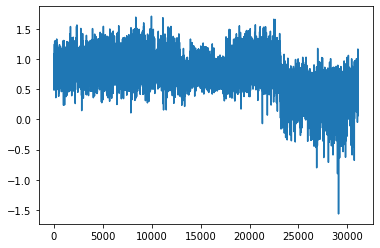

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
tf.compat.v1.disable_v2_behavior()

OT_books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',
            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',
            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',
            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',
            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi']

NT_books = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',
            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',
            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',
            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
            'Revelation']

# 1 for OT and 0 for NT
def encode(line):
    res_vec = np.zeros((1), dtype = int)
    if data.iloc[line]['book'] in OT_books:
        res_vec[0] = 1
    elif data.iloc[line]['book'] in NT_books:
        res_vec[0] = 0
    return res_vec

features = vocabulary_size
categories = 66 #number of books

suff_feat = np.array(range(1,features+1))
np.random.shuffle(suff_feat)
print(suff_feat)
def vecto(x):
    ret = []
    for i in suff_feat:
        ret.append(x**i)#(x**i/ 7.**i)
    return ret

x = tf.compat.v1.placeholder(tf.float32, [None, features])
y_ = tf.compat.v1.placeholder(tf.float32, [None, 1])
W = tf.compat.v1.Variable(tf.zeros([features,1]))
b = tf.compat.v1.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2)) # + 0.1*tf.nn.l2_loss(W)
update = tf.compat.v1.train.GradientDescentOptimizer(0.001).minimize(loss)

#[book,words]

data_x = np.array([convert2vec(data.iloc[i]['text']) for i in range(0,len(data['text']))])
data_y = np.array([encode(i) for i in range(0,len(data['text']))])

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())


def h(x,w,b):
    ans = 1 / (1+np.exp(-(np.dot(x,w) + b)))
    return ans

w = np.zeros(9421)

alpha = 0.001

for iteration in range(20000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if iteration % 1 == 0 :
        print('Iteration:' , iteration , ' W:' , sess.run(W) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

print('Prediction for 1,1:', np.matmul(np.array(convert2vec("In the beginning God created the heaven and the earth.")),sess.run(W)) + sess.run(b))

x_axis = np.arange(0,len(data['text']))#,0.1
x_data = np.array([convert2vec(data.iloc[i]['text']) for i in range(0,len(data['text']))])
print(x_data)
y_vals = np.matmul(x_data, sess.run(W)) + sess.run(b)
plt.plot(x_axis, y_vals)
plt.show()

the problem we solve here is a bit different from our main problem, instead of classify to a book we classify every verse to a testament.
it seems that here we have over fitting due to too many features,
so the linear regression is not the best model for our problem.

In [6]:
for i in range(0,len(y_vals)):
    if y_vals[i] < 0.5:
        y_vals[i] = 0;
    else:
        y_vals[i] = 1;
        
print("Accuracy: ", accuracy_score(y_vals,data_y))

Accuracy:  0.8733200437270915


In [7]:
print(classification_report(y_vals,data_y))

              precision    recall  f1-score   support

         0.0       0.55      0.92      0.69      4745
         1.0       0.98      0.86      0.92     26357

    accuracy                           0.87     31102
   macro avg       0.77      0.89      0.81     31102
weighted avg       0.92      0.87      0.89     31102



In [6]:
data_y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [7]:
data_x

array([[1, 3, 1, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])